In [699]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [700]:
# Import and load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import os
import re
import random
import sklearn
import string

from scipy import stats as st
from scipy.stats import skew, kurtosis

# Import libraries for visualisations
%matplotlib inline
import matplotlib as mpl # idk if needed
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Import libraries for model analysis
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import class_weight

from sklearn.compose import ColumnTransformer

# Import libraries for building and training ANNs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# Where to save figures
project_root_dir = "."
chapter_id = "customer_churn_project"
images_path = os.path.join(project_root_dir, "images", chapter_id)
os.makedirs(images_path, exist_ok = True)

# Define a function to save figures
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(images_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

# Set the random seed for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

## Table of contents
- [1. Introduction](#1-Introduction)
    - [1.1 Problem Statement: Business Understanding](#1.1-Problem-Statement:-Business-Understanding)
    - [1.2 Research Question](#1.2-Research-Question)
- [2. Data Understanding](#2-Data-Understanding)
    - [2.1 Obtain the dataset](#2.1-Obtain-the-dataset)
    - [2.2 Exploratory Data Analysis (EDA)](#2.2-Exploratory-Data-Analysis-(EDA))
- [3. Data Preparation](#3-Data-Preparation)
- [4. Model Exploration](#4-Model-Exploration)
    - [4.1 (Gaussian) Naive Bayes](#4.1-(Gaussian)-Naive-Bayes)
    - [4.2 Logistic Regression](#4.2-Logistic-Regression)
    - [4.3 Decision Tree Classifier](#4.3-Decision-Tree-Classifier)
    - [4.4 Random Forest Classifier](#4.4-Random-Forest-Classifier)
    - [4.5 XGBoost (Extreme Gradient Boosting Machines)](#4.5-XGBoost-(Extreme-Gradient-Boosting-Machines))
    - [4.6 Support Vector Classifier (SVC)](#4.6-Support-Vector-Classifier-(SVC))
    - [4.7 K-Nearest Neighbors (KNN)](#4.7-K-Nearest-Neighbors-(KNN))
    - [4.8 Artificial Neural Networks: MLPs](#4.8-Artificial-Neural-Networks:-(MLPs))
    - [4.9 Shortlist best models](#4.9-Shortlist-best-models)
- [5. Conclusion](#5-Conclusion)

# 1 Introduction

## 1.1 Problem Statement: Business Understanding

## 1.2 Research Question

# 2 Data Understanding

## 2.1 Obtain the dataset

In [701]:
# Define a path to the Kaggle dataset from the directory
path = "Customer-Churn-Records.csv"

# Read the dataset as a DataFrame
df_churn = pd.read_csv(path)

# Return the first 10 rows
df_churn.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   
5        149756.71       1         1                   5   DIAMOND   
6         10062.80       0         0                   2    SILVER   
7        119346.88       1         1                   2   DIAMOND   
8         74940.50       0         0                   3      GOLD   
9         71725.73       0         0                   3      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425  
5           484  
6           206  
7           282  
8           251  
9           342

In [1097]:
# Check the size of the DataFrame (10k rows, 18 attributes)
print(df_churn.shape)

(10000, 18)


In [703]:
# Provide a concise summary of the 18 attributes
df_churn.describe()

RowNumber  CustomerId  CreditScore         Age      Tenure  \
count  10000.0000  1.0000e+04   10000.0000  10000.0000  10000.0000   
mean    5000.5000  1.5691e+07     650.5288     38.9218      5.0128   
std     2886.8957  7.1936e+04      96.6533     10.4878      2.8922   
min        1.0000  1.5566e+07     350.0000     18.0000      0.0000   
25%     2500.7500  1.5629e+07     584.0000     32.0000      3.0000   
50%     5000.5000  1.5691e+07     652.0000     37.0000      5.0000   
75%     7500.2500  1.5753e+07     718.0000     44.0000      7.0000   
max    10000.0000  1.5816e+07     850.0000     92.0000     10.0000   

           Balance  NumOfProducts   HasCrCard  IsActiveMember  \
count   10000.0000     10000.0000  10000.0000      10000.0000   
mean    76485.8893         1.5302      0.7055          0.5151   
std     62397.4052         0.5817      0.4558          0.4998   
min         0.0000         1.0000      0.0000          0.0000   
25%         0.0000         1.0000      0.0000          0.0000   
50%     97198.5400         1.0000      1.0000          1.0000   
75%    127644.2400         2.0000      1.0000          1.0000   
max    250898.0900         4.0000      1.0000          1.0000   

       EstimatedSalary      Exited    Complain  Satisfaction Score  \
count       10000.0000  10000.0000  10000.0000          10000.0000   
mean       100090.2399      0.2038      0.2044              3.0138   
std         57510.4928      0.4028      0.4033              1.4059   
min            11.5800      0.0000      0.0000              1.0000   
25%         51002.1100      0.0000      0.0000              2.0000   
50%        100193.9150      0.0000      0.0000              3.0000   
75%        149388.2475      0.0000      0.0000              4.0000   
max        199992.4800      1.0000      1.0000              5.0000   

       Point Earned  
count    10000.0000  
mean       606.5151  
std        225.9248  
min        119.0000  
25%        410.0000  
50%        605.0000  
75%        801.0000  
max       1000.0000

## 2.2 Exploratory Data Analysis (EDA)

In [704]:
# Create a copy of the data for EDA
churn = df_churn.copy()
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [705]:
# Study each attribute's data type and sample size to identify future steps
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [706]:
# Check for missing values (null) in the DataFrame
churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [707]:
# Check the value count for each attribute to observe distribution
churn.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [708]:
# Check for duplicates in the DataFrame
churn.duplicated().sum()

0

In [709]:
# Double-check whether 2 or more customers share the same ID
id_duplicates = churn["CustomerId"].duplicated().sum()

# Display the number of duplicate CustomerId entries
print(id_duplicates)

0


Check the target variable class imbalance:

In [710]:
# Check for class imbalance for the target variable ('Exited')
churn["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

Saving figure Exited_class_distribution


/tmp/ipykernel_72/1520820462.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = labels,


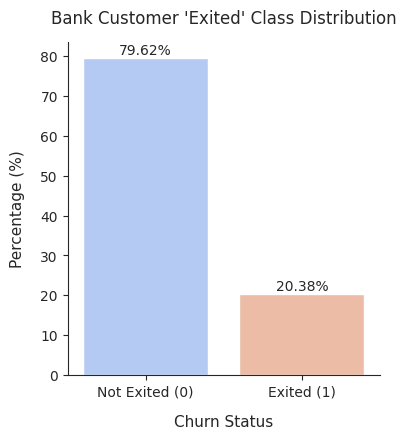

In [711]:
# Visualise the significant class imbalance for the target variable ('Exited')

# Calculate the percentage of counts for annotations
exited_no = churn["Exited"].value_counts(normalize = True) * 100

# Define the bar chart labels
labels = ["Not Exited (0)", "Exited (1)" if exited_no.index[0] == 0  else ["Exited (1)", "Not Exited (0)"] ]

# Define the figure size
plt.figure(figsize = (4,4.5))

# Define the bar chart
sns.barplot(x = labels,
            y = exited_no, 
            palette = "coolwarm")

# Add annotations to the bar chart
for index, value in enumerate(exited_no):
  plt.text(index,
           value,
           f"{value:.2f}%",
           ha = "center",
           va = "bottom"
           )

# Add a title and labels to the bar chart
plt.title("Bank Customer 'Exited' Class Distribution", fontsize = 12, y = 1.03)
plt.ylabel("Percentage (%)", fontsize = 11, labelpad = 11)
plt.xlabel("Churn Status", fontsize = 11, labelpad = 11)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("Exited_class_distribution")

# Display the pie chart
plt.show()

Check the 3 relevant nominal attributes:

Saving figure categorical_variable_distribution


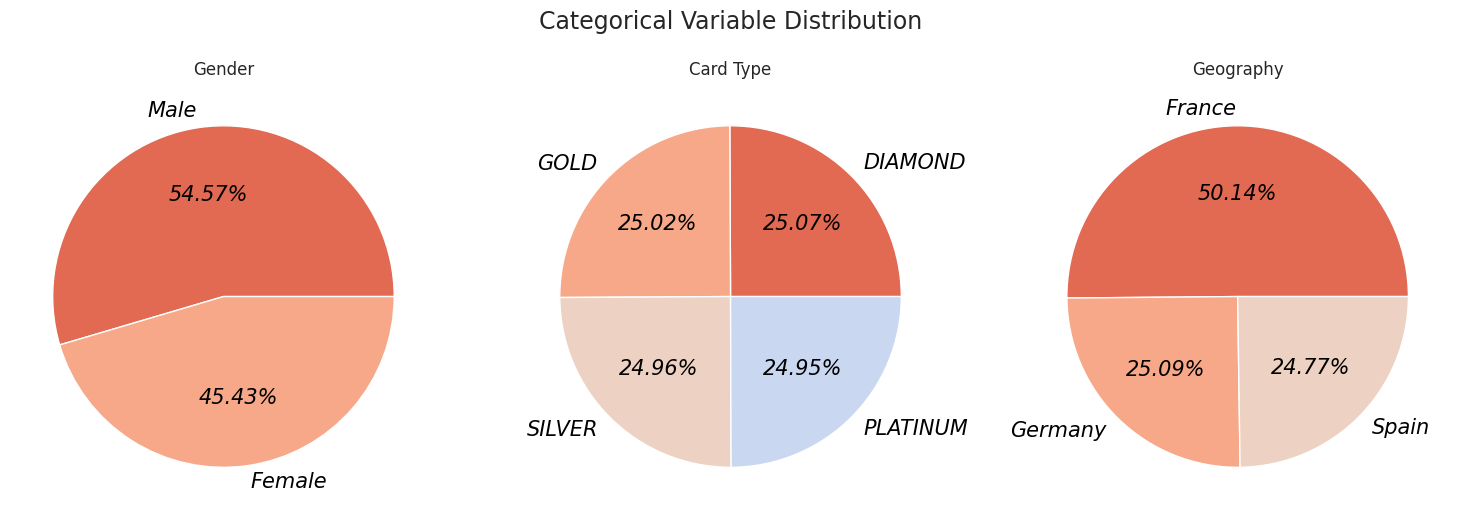

In [712]:
# Generate a figure showing all three relevant nominal attributes
# 'Surname' is not relevant because it will be dropped during data preparation
# due to data privacy concerns and lack of relevancy in predicting churn

# Define an empty variable to store categorical variables' names
categorical_columns = []

# Get all column names from the DataFrame
columns = churn[["Gender", "Card Type", "Geography"]]

# Search through each column to identify categorical variables
for col in columns:
  # Check whether the data type is 'object', and save its name if so
  if churn[col].dtype == "object":
    categorical_columns.append(col)

# Design a plot for each categorical variable type
num = len(categorical_columns)
fig, ax = plt.subplots(1,
                       num,
                       figsize = (15,5))

# Loop through the list of categorical variables
for i, col in enumerate(categorical_columns):
  # Find frequency count
  frequency = list(churn[col].value_counts().values)
  # Get the labels
  labels = churn[col].value_counts().index
  # Create the pie charts
  ax[i].pie(x = frequency,
            labels = labels,
            autopct = "%.2f%%",
            colors = sns.color_palette("coolwarm_r"),
            textprops = {"fontsize": 15, "color": "black", "style": "italic"})
  # Set a title for each subplot
  ax[i].set_title(col)

# Set the design and figure title
plt.tight_layout()
plt.suptitle("Categorical Variable Distribution", fontsize = 17, y = 1.03)

# Save the figure
save_fig("categorical_variable_distribution")

# Show the plot
plt.show()

In [713]:
# 'Geography' is the 1st relevant nominal attribute ('object')

# Check its individual value counts
print("Bank customer distribution by 'Geography': ")
print(churn["Geography"].value_counts())
print()

# Return the value count as a percentage
print("Customers' churn percentage by 'Geography': ")
geography_churn_r = churn.groupby("Geography")["Exited"].mean() * 100
print(geography_churn_r.round(2))

Bank customer distribution by 'Geography': 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Customers' churn percentage by 'Geography': 
Geography
France     16.17
Germany    32.44
Spain      16.67
Name: Exited, dtype: float64


Saving figure churn_geography


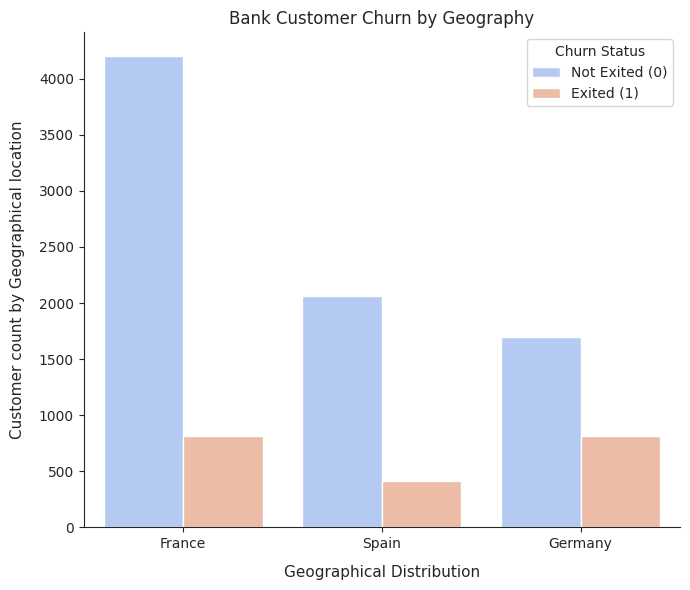

In [714]:
# Visualise Geographic distribution in relation to Churn

# Define the plot size
plt.figure(figsize = (7,6))

# Define the plot
sns.countplot(x = "Geography",
              hue = "Exited",
              data = churn,
              palette = "coolwarm")

# Add title, labels, and legend
plt.title("Bank Customer Churn by Geography", fontsize = 12)
plt.xlabel("Geographical Distribution", fontsize = 11, labelpad = 10)
plt.ylabel("Customer count by Geographical location", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("churn_geography")

# Show the figure
plt.show()

In [715]:
# 'Gender' is the 2nd relevant nominal attribute ('object')

# Check its individual value counts
print("Bank customer distribution by 'Gender': ")
# Return Female value counts first for cohesiveness
print(churn["Gender"].value_counts().sort_index(ascending = True))
print()

# Return the value count as a percentage
print("Customers' churn percentage by 'Gender': ")
gender_churn_r = churn.groupby("Gender")["Exited"].mean() * 100
print(gender_churn_r.round(2))

Bank customer distribution by 'Gender': 
Female    4543
Male      5457
Name: Gender, dtype: int64

Customers' churn percentage by 'Gender': 
Gender
Female    25.07
Male      16.47
Name: Exited, dtype: float64


Saving figure churn_gendre


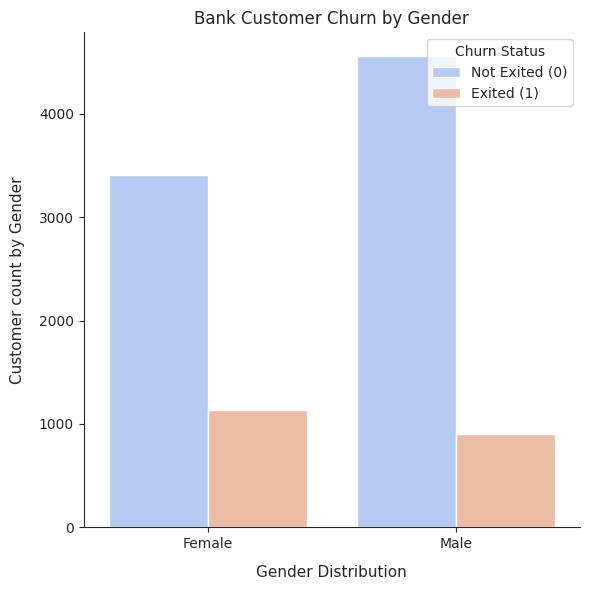

In [716]:
# Visualise Churn in relation to Gendre distribution

# Define the plot size
plt.figure(figsize = (6,6))

# Define the plot
sns.countplot(x = "Gender",
              hue = "Exited",
              data = churn,
              palette = "coolwarm")

# Add title, labels, and legend
plt.title("Bank Customer Churn by Gender", fontsize = 12)
plt.xlabel("Gender Distribution", fontsize = 11, labelpad = 10)
plt.ylabel("Customer count by Gender", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("churn_gendre")

# Show the figure
plt.show()

In [717]:
# 'Card Type' is the 3rd relevant nominal attribute ('object')

# Check its individual value counts
print("Bank customer distribution by 'Card Type': ")
print(churn["Card Type"].value_counts())
print()

# Return the value count as a percentage
print("Customers' churn percentage by 'Card Type': ")
card_churn_r = churn.groupby("Card Type")["Exited"].mean() * 100
print(card_churn_r.round(2))

# As opposed to the previous two attributes, these 4 independent variables are 
# more or less equal in size and associated churn rate 

Bank customer distribution by 'Card Type': 
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

Customers' churn percentage by 'Card Type': 
Card Type
DIAMOND     21.78
GOLD        19.26
PLATINUM    20.36
SILVER      20.11
Name: Exited, dtype: float64


Saving figure churn_card_type


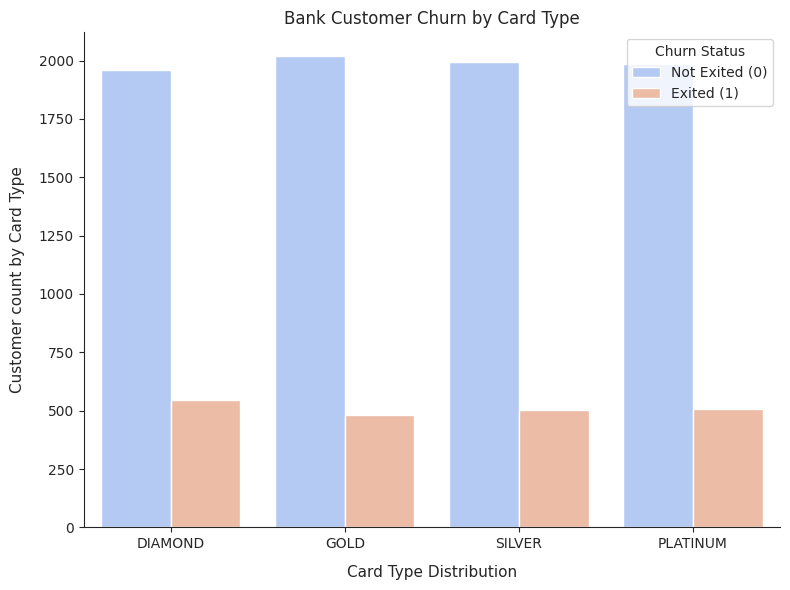

In [718]:
# Visualsie Churn by Card Type distribution

# Define the figure size
plt.figure(figsize = (8,6))

# Define the sns plot
sns.countplot(x = "Card Type",
              hue = "Exited",
              data = churn,
              palette = "coolwarm")

# Add title, labels, and legend
plt.title("Bank Customer Churn by Card Type", fontsize = 12)
plt.xlabel("Card Type Distribution", fontsize = 11, labelpad = 10)
plt.ylabel("Customer count by Card Type", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("churn_card_type")

# Show the figure
plt.show()

Now further explore the relation between other attributes and the target variable 'Exited':

Saving figure churn_numofproducts


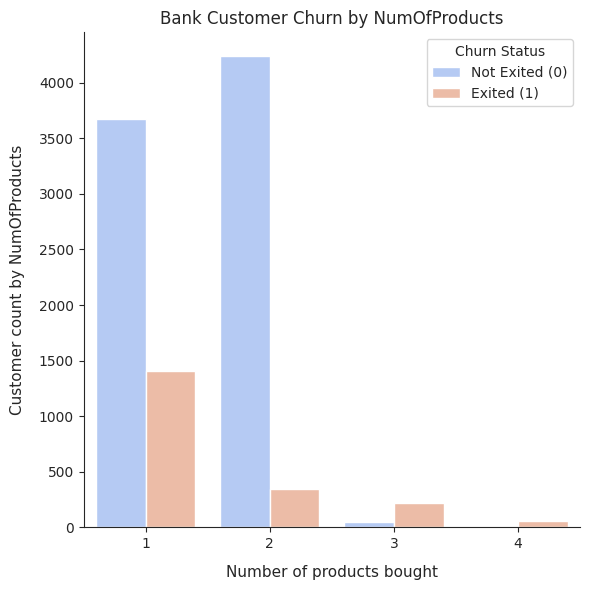

In [719]:
# Visualsie Churn by NumOfProducts distribution

# Define the figure size
plt.figure(figsize = (6,6))

# Define the plot
sns.countplot(x = "NumOfProducts",
              hue = "Exited",
              data = churn,
              palette = "coolwarm")

# Add title, labels, and legend
plt.title("Bank Customer Churn by NumOfProducts", fontsize = 12)
plt.xlabel("Number of products bought", fontsize = 11, labelpad = 10)
plt.ylabel("Customer count by NumOfProducts", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("churn_numofproducts")

# Show the figure
plt.show()

Saving figure churn_satisfaction


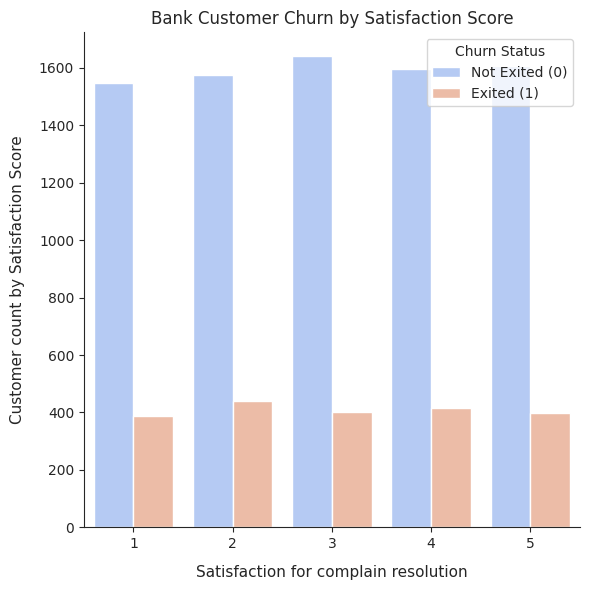

In [720]:
# Visualsie Churn by Satisfaction score distribution
# Satisfaction score refers to satisfaction regarding complaint mitigation

# Define figure size
plt.figure(figsize = (6,6))

# Define the plot
sns.countplot(x = "Satisfaction Score",
              hue = "Exited",
              data = churn,
              palette = "coolwarm")

# Add title, labels, and legend
plt.title("Bank Customer Churn by Satisfaction Score", fontsize = 12)
plt.xlabel("Satisfaction for complain resolution", fontsize = 11, labelpad = 10)
plt.ylabel("Customer count by Satisfaction Score", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("churn_satisfaction")

# Show the figure
plt.show()

Check the binary attributes in relation to 'Exited':

/tmp/ipykernel_72/3323734389.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "Complain_Exit_Status",


Saving figure churn_vs_complain


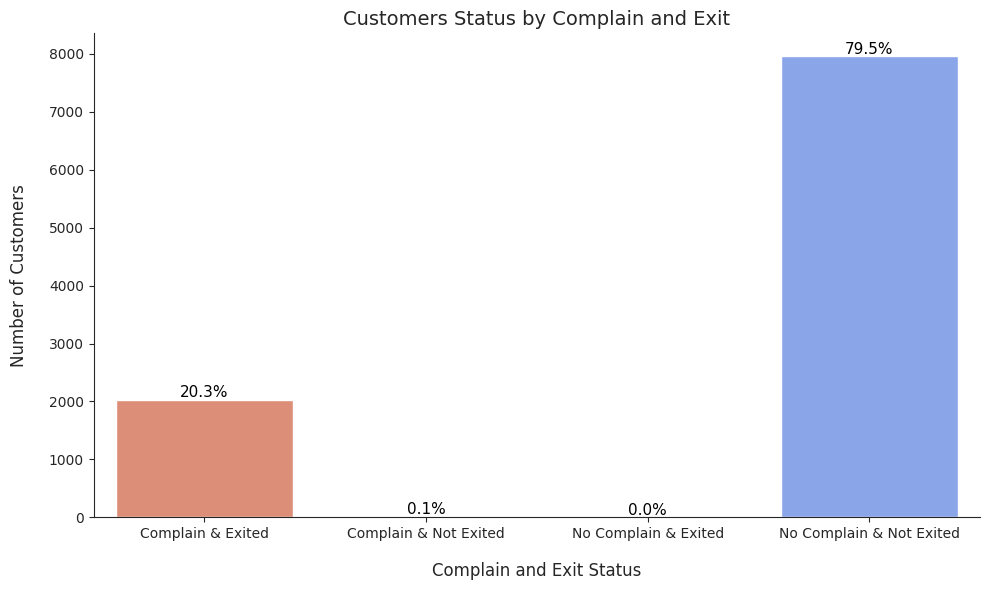

In [721]:
# Create a new variable combining 'Complain' with 'Exited'
# This helps check whether there's an overlap between complains and churn
conditions = [
    (churn["Complain"] == 1) & (churn["Exited"] == 1),
    (churn["Complain"] == 1) & (churn["Exited"] == 0),
    (churn["Complain"] == 0) & (churn["Exited"] == 1),
    (churn["Complain"] == 0) & (churn["Exited"] == 1)
]

# Define the labels for each combination
choices = ["Complain & Exited", "Complain & Not Exited", "No Complain & Exited", "No Complain & Not Exited"]

# Create a new column combining 'Complain' with 'Exited'
churn["Complain_Exit_Status"] = np.select(conditions, choices, default = "No Complain & Not Exited")

# Define the figure size and plot the count of each group
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "Complain_Exit_Status", 
                   data = churn, 
                   order = choices, 
                   palette = "coolwarm_r")

# Add title and labels
plt.title("Customers Status by Complain and Exit", fontsize = 14)
plt.xlabel("Complain and Exit Status", fontsize = 12, labelpad = 15)
plt.ylabel("Number of Customers", fontsize = 12, labelpad = 15)

# Calculate the total count for normalization
total_count = len(churn)

# Annotate the bars with the percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha ="center", 
                va ="center", 
                fontsize = 11, 
                color = "black", 
                xytext = (0, 5),
                textcoords = "offset points")

# Hide the top and right plot spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save the figure
save_fig("churn_vs_complain")

# Show the plot
plt.show()

/tmp/ipykernel_72/2438191557.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "HasCrCard_Exit_Status",


Saving figure hascrcard_vs_complain


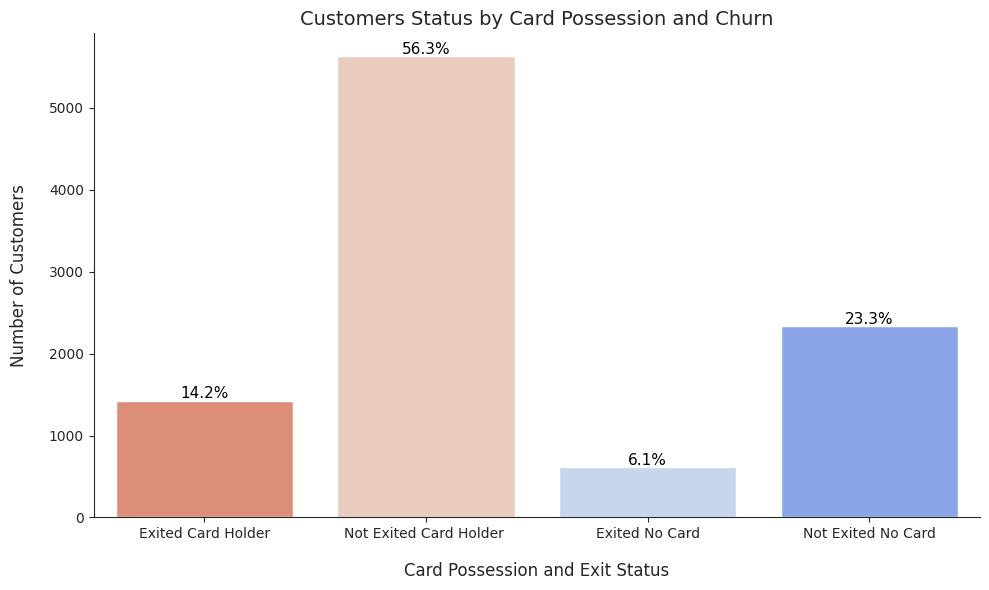

In [722]:
# Define a new variable combining 'HasCrCard' with 'Exited'
# This helps check whether card possession is overlapped with churn
conditions = [
    (churn["HasCrCard"] == 1) & (churn["Exited"] == 1),
    (churn["HasCrCard"] == 1) & (churn["Exited"] == 0),
    (churn["HasCrCard"] == 0) & (churn["Exited"] == 1),
    (churn["HasCrCard"] == 0) & (churn["Exited"] == 0)
]
# Define the labels
choices = ["Exited Card Holder", "Not Exited Card Holder ", "Exited No Card", "Not Exited No Card"]

# Create a new column that combines 'HasCrCard' and 'Exited'
churn["HasCrCard_Exit_Status"] = np.select(conditions, choices, default = "Not Exited No Card")

# Define the figure size and plot the count of each group
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "HasCrCard_Exit_Status", 
                   data = churn, 
                   order = choices, 
                   palette = "coolwarm_r")

# Add title and labels
plt.title("Customers Status by Card Possession and Churn", fontsize = 14)
plt.xlabel("Card Possession and Exit Status", fontsize = 12, labelpad = 15)
plt.ylabel("Number of Customers", fontsize = 12, labelpad = 15)

# Calculate the total count for normalization
total_count = len(churn)

# Annotate the bars with the percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha ='center', 
                va ='center', 
                fontsize = 11, 
                color = 'black', 
                xytext = (0, 5),
                textcoords = 'offset points')

# Hide the top and right plot spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save the figure
save_fig("hascrcard_vs_complain")

# Show the plot
plt.show()

/tmp/ipykernel_72/528321563.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "IsActiveMember_Exit_Status",


Saving figure active_vs_complain


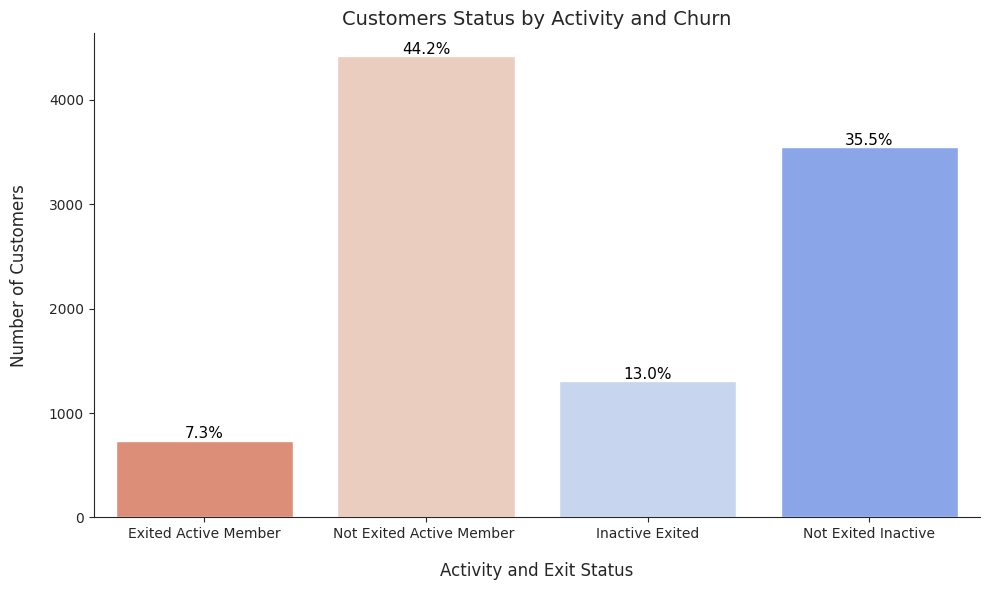

In [723]:
# Define a new variable combining 'IsActiveMember' with 'Exited'
# This helps check whether there's an overlap between inactive members and churn
conditions = [
    (churn["IsActiveMember"] == 1) & (churn["Exited"] == 1),
    (churn["IsActiveMember"] == 1) & (churn["Exited"] == 0),
    (churn["IsActiveMember"] == 0) & (churn["Exited"] == 1),
    (churn["IsActiveMember"] == 0) & (churn["Exited"] == 0)
]

# Define the labels
choices = ["Exited Active Member", "Not Exited Active Member ", "Inactive Exited", "Not Exited Inactive"]

# Create a new column that combines 'IsActiveMember' and 'Exited'
churn["IsActiveMember_Exit_Status"] = np.select(conditions, choices, default = "Not Exited Inactive")

# Plot the count of each group
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "IsActiveMember_Exit_Status", 
                   data = churn, 
                   order = choices, 
                   palette = "coolwarm_r")

# Add title and labels
plt.title("Customers Status by Activity and Churn", fontsize = 14)
plt.xlabel("Activity and Exit Status", fontsize = 12, labelpad = 15)
plt.ylabel("Number of Customers", fontsize = 12, labelpad = 15)

# Calculate the total count for normalization
total_count = len(churn)

# Annotate the bars with the percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha ='center', 
                va ='center', 
                fontsize = 11, 
                color = 'black', 
                xytext = (0, 5),
                textcoords = 'offset points')

# Hide the top and right plot spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Save the figure
save_fig("active_vs_complain")

# Show the plot
plt.show()

Check the histograms for a general overview of the data distribution, potential outliers, and future models ideas:

Saving figure attribute_histograms


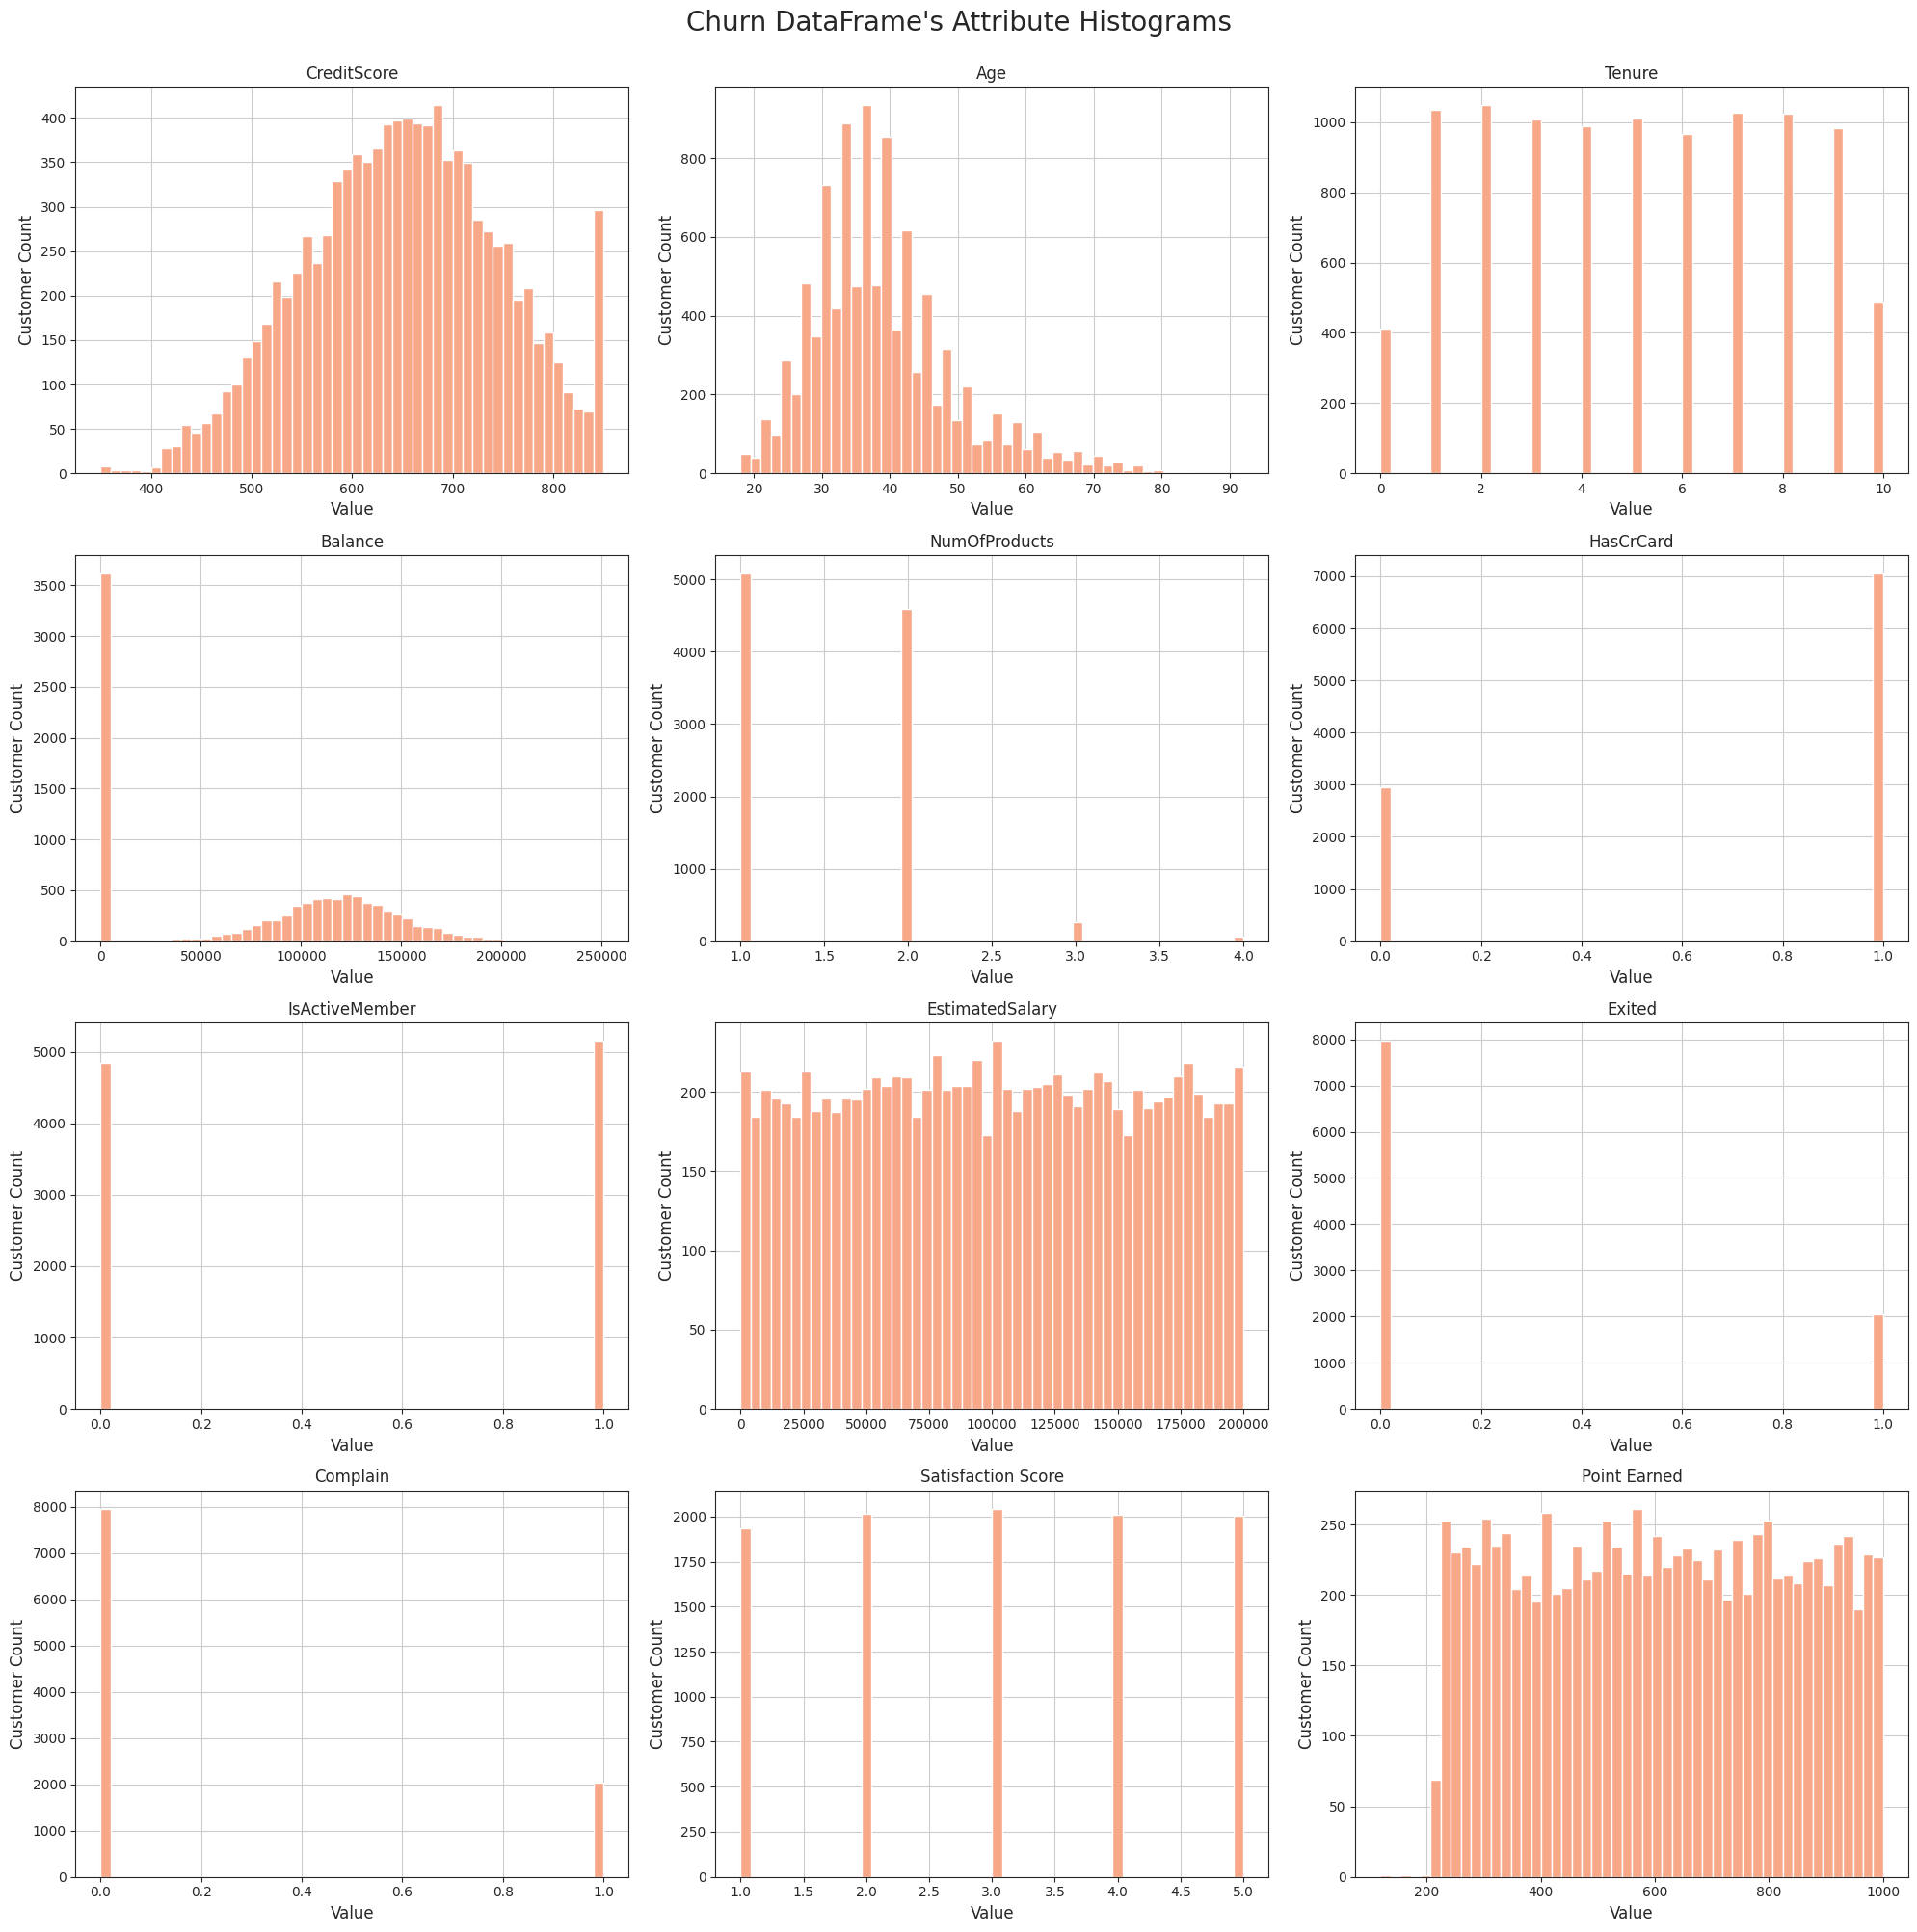

In [724]:
# Set the style of the plot
sns.set_style("ticks")

# Plot a histogram for each numerical attribute
axes = churn.drop(columns = ["RowNumber",
                             "CustomerId",
                             "Surname"]). hist (bins = 50,
                                                figsize = (20,20),
                                                color = sns.color_palette("coolwarm_r")[1])

# Set a figure title
plt.suptitle("Churn DataFrame's Attribute Histograms", 
             fontsize = 20, 
             y = 1)

# Loop through the array and set individual labels
for ax in axes.flatten():
  ax.set_xlabel("Value", fontsize = 12)
  ax.set_ylabel("Customer Count", fontsize = 12)

# Save the figure
save_fig("attribute_histograms")

# Show the histograms
plt.show()


Noisiness may be further explored with a Spearman correlation matrix, which identifies strong monotonic relationships between numerical features:

Saving figure Spearman_correlation_matrix


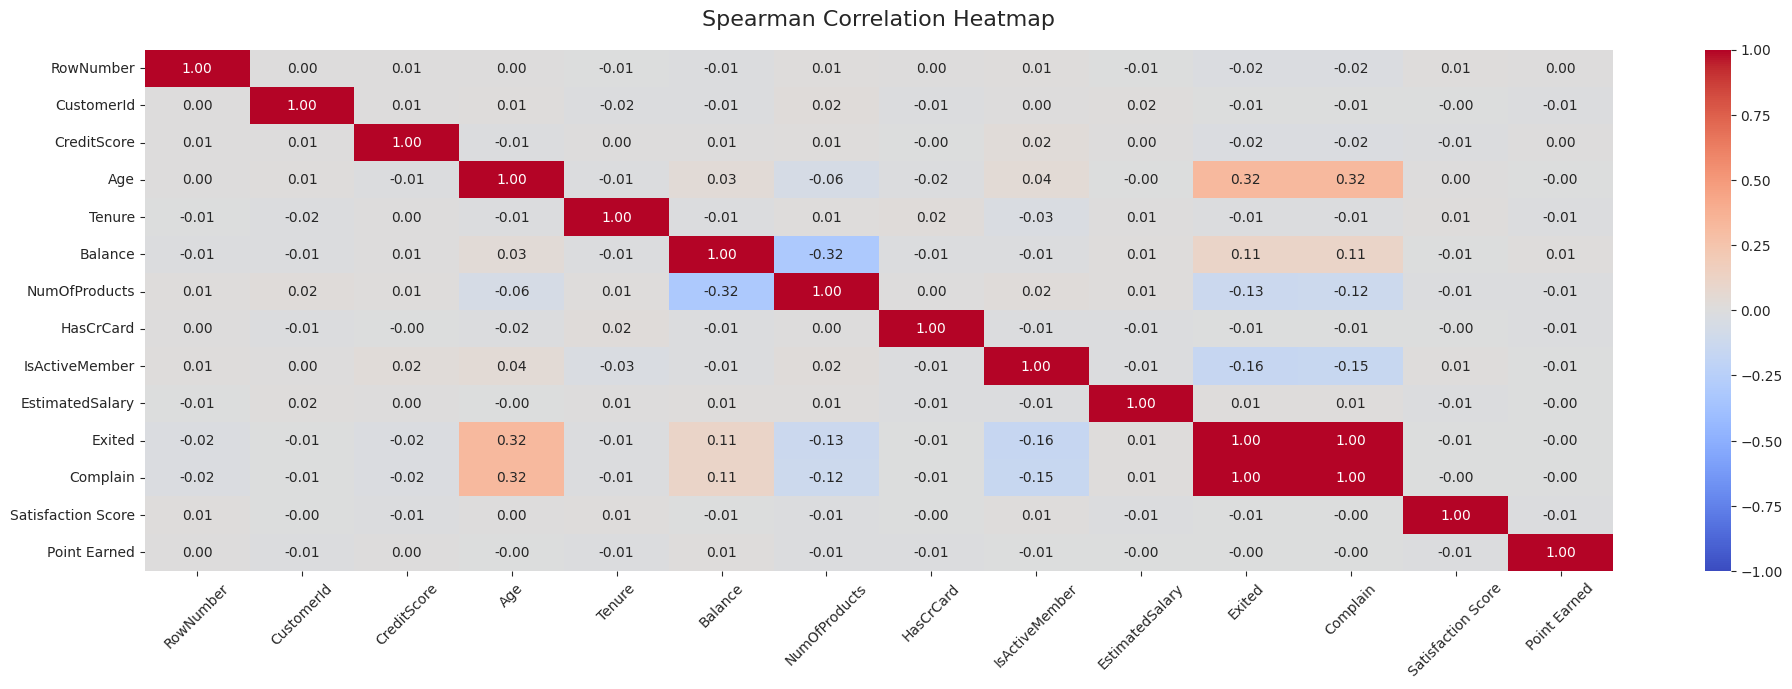

In [725]:
# Generate a Spearman Correlation Matrix

# Select numeric columns for correlation matrix
churn_numeric = churn.select_dtypes(include = ["number"])

# Compute the Spearman correlation matrix
corr_matrix = churn_numeric.corr(method = "spearman")

# Set the style
plt.figure(figsize = (20, 7))
sns.set_style("ticks")

# Generate the heatmap that visualises the correlation matrix
sns.heatmap(corr_matrix,
            annot = True,
            vmin = -1,
            vmax = 1,
            center = 0,
            fmt = ".2f",
            cmap = "coolwarm")

# Set the title
plt.title("Spearman Correlation Heatmap", fontsize = 16, y = 1.03)

# Incline the x-axis labels for ease of read
plt.xticks(rotation = 45)

# Save the figure
save_fig("Spearman_correlation_matrix")

# Show the heatmap
plt.show()

In [726]:
# Check the correlation values (with the target 'Exited' variable)
corr_matrix["Exited"].sort_values(ascending = False)

Exited                1.0000
Complain              0.9957
Age                   0.3240
Balance               0.1111
EstimatedSalary       0.0125
Point Earned         -0.0044
Satisfaction Score   -0.0059
CustomerId           -0.0062
HasCrCard            -0.0070
Tenure               -0.0136
RowNumber            -0.0161
CreditScore          -0.0229
NumOfProducts        -0.1250
IsActiveMember       -0.1564
Name: Exited, dtype: float64

 'Complain' showcases an unusually high correlation with 'Exited', and thus requires additional analysis to determine whether the attribute needs to be dropped to not skew the analysis:

In [727]:
# Explore 'Exited' and 'Complain' to see overlap

# Check the value count for bank customers who left
print("Customers churn:")
print(churn["Exited"].value_counts())
print()

# Check the value count for bank customers who complained
print("Customers complaining:")
print(churn["Complain"].value_counts())
print()

# Check the proportion of exited customers that complain
print("Average churn rate for customers that complained:")
print(churn.groupby("Complain")["Exited"].mean() * 100)

Customers churn:
0    7962
1    2038
Name: Exited, dtype: int64

Customers complaining:
0    7956
1    2044
Name: Complain, dtype: int64

Average churn rate for customers that complained:
Complain
0     0.0503
1    99.5108
Name: Exited, dtype: float64


Generate a Scatter matrix to visualise attributes' relationships:

Saving figure Scatter_matrix


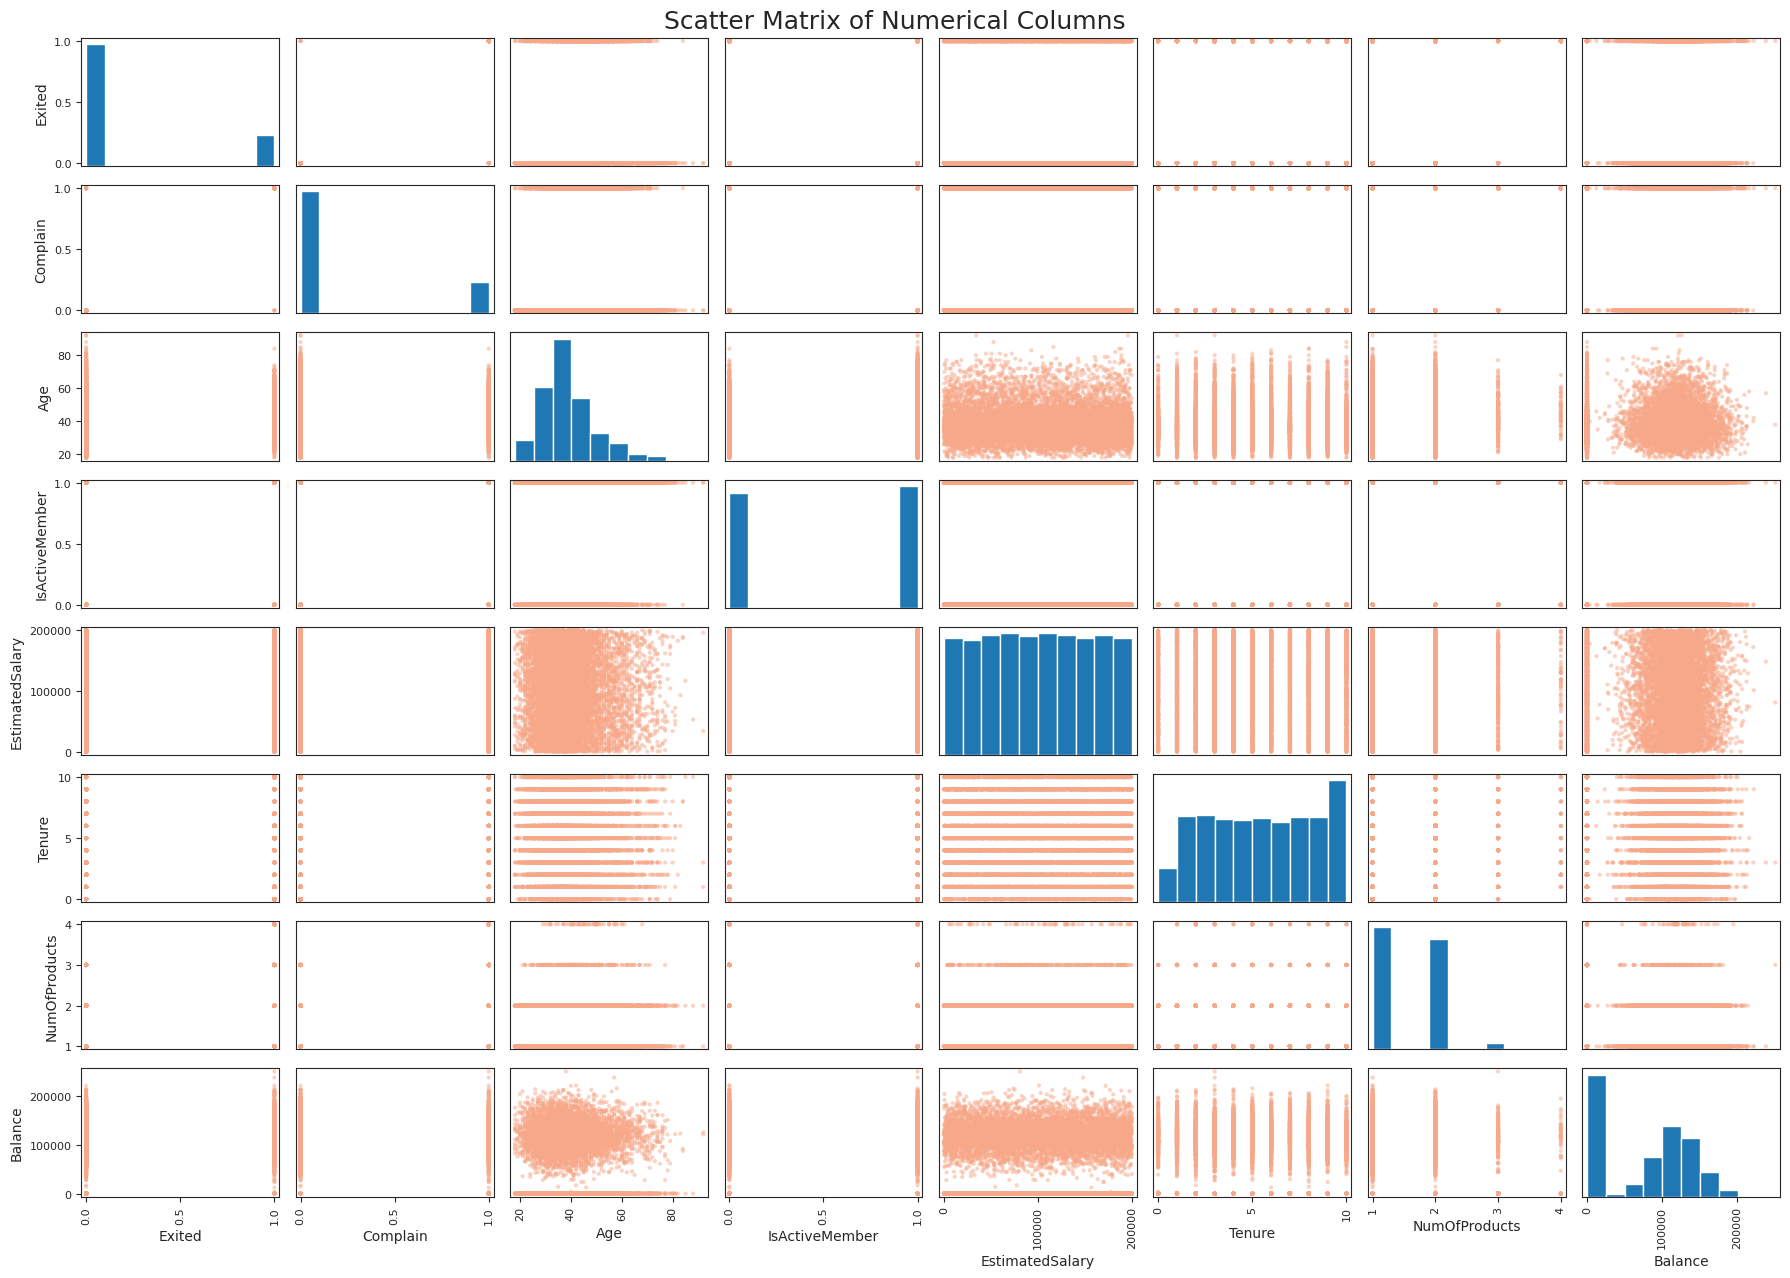

In [728]:
# Define the attributes for the scatter matrix
# Only use the numerical attributes with a medium to high correlation
# To the target variable 'Exited'
attributes = ["Exited", "Complain", "Age", "IsActiveMember", 
              "EstimatedSalary", "Tenure", "NumOfProducts", "Balance"]

# Create a scatter matrix containing the chosen attributes
scatter_matrix(churn[attributes],
               figsize = (18, 13),
               color = sns.color_palette("coolwarm_r")[1])

# Add a general title for the entire figure
plt.suptitle("Scatter Matrix of Numerical Columns", size = 18, y = 0.98)

# Save the figure
save_fig("Scatter_matrix")

# Show the figure
plt.show()

In [729]:
# Skewness measures the asymmetry of the probability distribution

# Iterate through the DataFrame to observe the skewness and kurtosis 
# of each numerical attribute
for column in churn.drop(["RowNumber", "CustomerId"], axis = 1).select_dtypes(include =["float64", "int64"]).columns:
    print(f"Skewness of {column}: {skew(churn[column])}")
    print(f"Kurtosis of {column}: {kurtosis(churn[column])}")
    print()

Skewness of CreditScore: -0.07159586676212397
Kurtosis of CreditScore: -0.42611279176518124

Skewness of Age: 1.0111685586628079
Kurtosis of Age: 1.3940495456392599

Skewness of Tenure: 0.010989809189781041
Kurtosis of Tenure: -1.1652426364413717

Skewness of Balance: -0.14108754375291138
Kurtosis of Balance: -1.489267106315331

Skewness of NumOfProducts: 0.745456048438949
Kurtosis of NumOfProducts: 0.5820893733639854

Skewness of HasCrCard: -0.9016763178640548
Kurtosis of HasCrCard: -1.18697981780312

Skewness of IsActiveMember: -0.06042756246298516
Kurtosis of IsActiveMember: -1.996348509694782

Skewness of EstimatedSalary: 0.0020850448448748848
Kurtosis of EstimatedSalary: -1.181527710874237

Skewness of Exited: 1.470624759136253
Kurtosis of Exited: 0.16273718218456112

Skewness of Complain: 1.4660426077319302
Kurtosis of Complain: 0.14928092768543788

Skewness of Satisfaction Score: -0.008934927846710327
Kurtosis of Satisfaction Score: -1.2850542627507517

Skewness of Point Earned:

Alternatively, one may plot histograms by customer churn with an overlayed Kernel Density Estimate to observe linear and non-linear distributions:

/tmp/ipykernel_72/3008867798.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["CreditScore"],
/tmp/ipykernel_72/3008867798.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["CreditScore"],


Saving figure churn_vs_creditscore


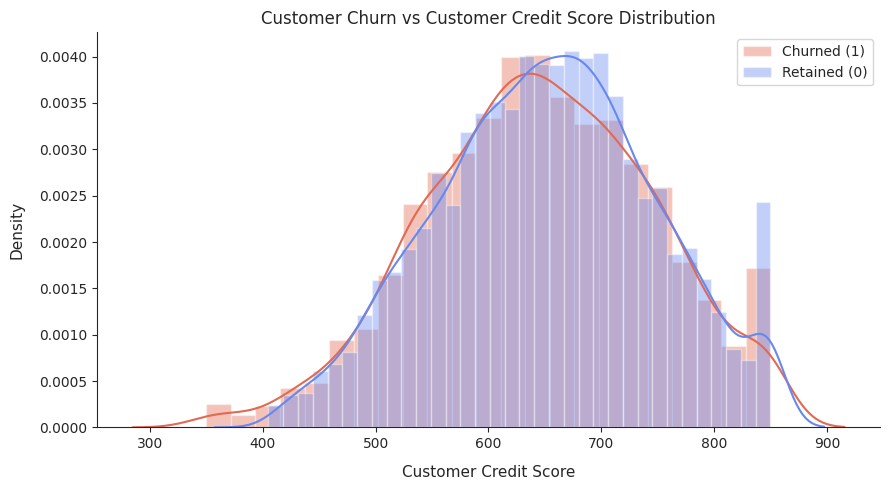

In [730]:
# Observe Churn rates with 'CreditScore'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (9,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["CreditScore"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["CreditScore"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Credit Score Distribution", fontsize = 12)
plt.xlabel("Customer Credit Score", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_creditscore")

# Show the plot
plt.show()

/tmp/ipykernel_72/2079700148.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["Age"],
/tmp/ipykernel_72/2079700148.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["Age"],


Saving figure churn_vs_age


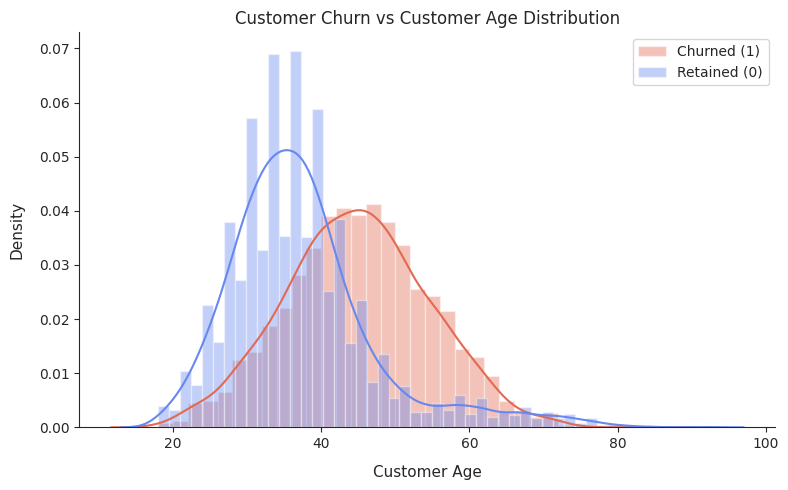

In [731]:
# Observe Churn rates with 'Age'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["Age"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["Age"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Age Distribution", fontsize = 12)
plt.xlabel("Customer Age", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_age")

# Show the plot
plt.show()

/tmp/ipykernel_72/3767810762.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["Tenure"],
/tmp/ipykernel_72/3767810762.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["Tenure"],


Saving figure churn_vs_tenure


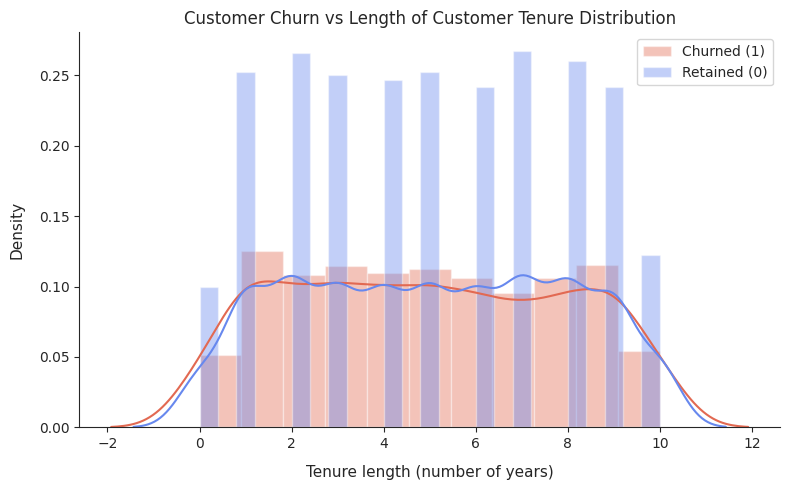

In [732]:
# Observe Churn rates with 'Tenure'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["Tenure"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["Tenure"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Length of Customer Tenure Distribution", fontsize = 12)
plt.xlabel("Tenure length (number of years)", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_tenure")

# Show the plot
plt.show()

/tmp/ipykernel_72/2169036111.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["Balance"],
/tmp/ipykernel_72/2169036111.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["Balance"],


Saving figure churn_vs_balance


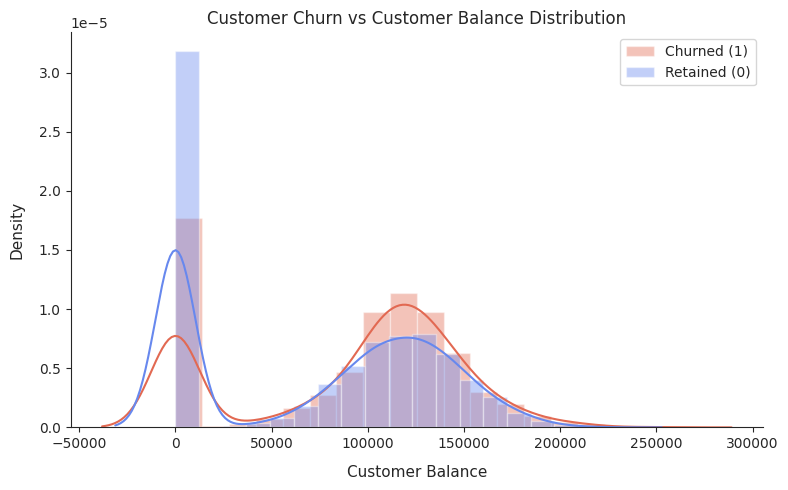

In [733]:
# Observe Churn rates with 'Balance'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["Balance"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["Balance"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Balance Distribution", fontsize = 12)
plt.xlabel("Customer Balance", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_balance")

# Show the plot
plt.show()

/tmp/ipykernel_72/2103463322.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["NumOfProducts"],
/tmp/ipykernel_72/2103463322.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["NumOfProducts"],


Saving figure churn_vs_number_products


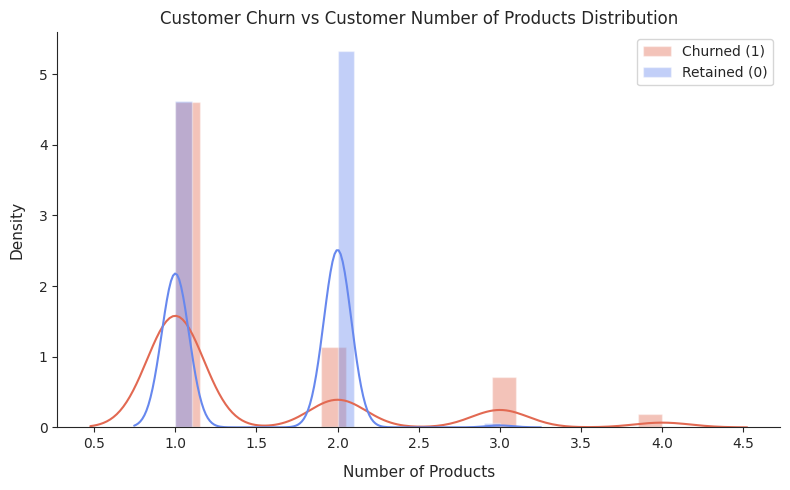

In [734]:
# Observe Churn rates with 'NumOfProducts'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["NumOfProducts"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["NumOfProducts"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Number of Products Distribution", fontsize = 12)
plt.xlabel("Number of Products", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_number_products")

# Show the plot
plt.show()

/tmp/ipykernel_72/2139353927.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["EstimatedSalary"],
/tmp/ipykernel_72/2139353927.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["EstimatedSalary"],


Saving figure churn_vs_salary


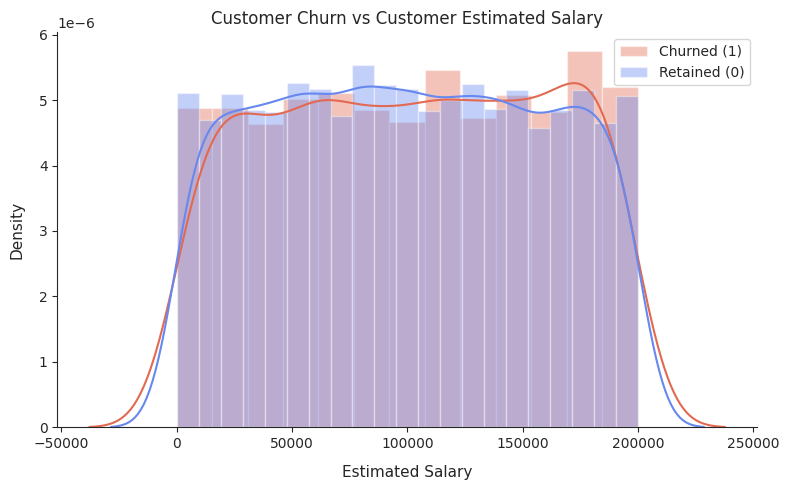

In [735]:
# Observe Churn rates with 'EstimatedSalary'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["EstimatedSalary"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["EstimatedSalary"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Estimated Salary", fontsize = 12)
plt.xlabel("Estimated Salary", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_salary")

# Show the plot
plt.show()

/tmp/ipykernel_72/69663305.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["Satisfaction Score"],
/tmp/ipykernel_72/69663305.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["Satisfaction Score"],


Saving figure churn_vs_satisfaction


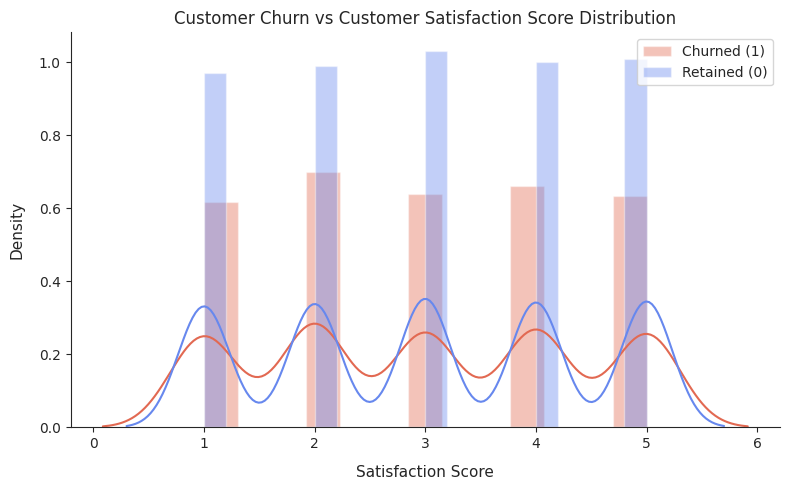

In [736]:
# Observe Churn rates with 'Satisfaction Score'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["Satisfaction Score"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["Satisfaction Score"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Satisfaction Score Distribution", fontsize = 12)
plt.xlabel("Satisfaction Score", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_satisfaction")

# Show the plot
plt.show()

/tmp/ipykernel_72/1600898595.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 1]["Point Earned"],
/tmp/ipykernel_72/1600898595.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn[churn["Exited"] == 0]["Point Earned"],


Saving figure churn_vs_points


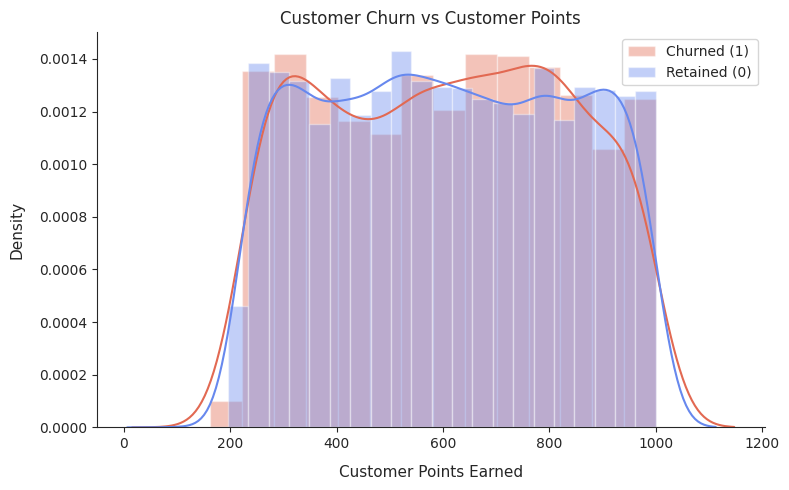

In [737]:
# Observe Churn rates with 'Points Earned'
# Kernel Density Estimate plot on top to show trends

# Set the figure size
plt.figure(figsize = (8,5))

# Define the plots with KDE
sns.distplot(churn[churn["Exited"] == 1]["Point Earned"],
             label = "Churned (1)",
             color = sns.color_palette("coolwarm_r")[0])
sns.distplot(churn[churn["Exited"] == 0]["Point Earned"],
             label = "Retained (0)",
             color = sns.color_palette("coolwarm_r")[-1])

# Set the title, labels, and legend
plt.title("Customer Churn vs Customer Points", fontsize = 12)
plt.xlabel("Customer Points Earned", fontsize = 11, labelpad = 10)
plt.ylabel("Density", fontsize = 11, labelpad = 10)
plt.legend(loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_points")

# Show the plot
plt.show()

Experiment with feature engineering:

In [738]:
# Experimenting with Feature engineering to represent feature interactions
zero_division_const = 1e-6

# Create a Balance per Number of Products attribute
churn["Balance_products_ratio"] = churn["Balance"]/ churn["NumOfProducts"]

# Create an Estimated Salary per Age attribute
churn["Salary_age_ratio"] = churn["EstimatedSalary"]/churn["Age"]

# Create a Balance per Age attribute
churn["Balance_age_ratio"] = churn["Balance"]/churn["Age"]

# Create a Number of Products per Tenure attribute
churn["Products_tenure_ratio"] = churn["NumOfProducts"]/churn["Tenure"] + zero_division_const

# View the updated DataFrame
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  ...  Satisfaction Score  Card Type  \
0       2       0.00              1  ...                   2    DIAMOND   
1       1   83807.86              1  ...                   3    DIAMOND   
2       8  159660.80              3  ...                   3    DIAMOND   
3       1       0.00              2  ...                   5       GOLD   
4       2  125510.82              1  ...                   5       GOLD   

   Point Earned      Complain_Exit_Status    HasCrCard_Exit_Status  \
0           464         Complain & Exited       Exited Card Holder   
1           456     Complain & Not Exited       Not Exited No Card   
2           377         Complain & Exited       Exited Card Holder   
3           350  No Complain & Not Exited       Not Exited No Card   
4           425  No Complain & Not Exited  Not Exited Card Holder    

   IsActiveMember_Exit_Status Balance_products_ratio  Salary_age_ratio  \
0        Exited Active Member                 0.0000         2413.0686   
1   Not Exited Active Member              83807.8600         2744.9410   
2             Inactive Exited             53220.2667         2712.6564   
3         Not Exited Inactive                 0.0000         2405.8110   
4   Not Exited Active Member             125510.8200         1839.1651   

  Balance_age_ratio Products_tenure_ratio  
0            0.0000                 0.500  
1         2044.0941                 1.000  
2         3801.4476                 0.375  
3            0.0000                 2.000  
4         2918.8563                 0.500  

[5 rows x 25 columns]

In [739]:
# Check the updated DataFrame
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowNumber                   10000 non-null  int64  
 1   CustomerId                  10000 non-null  int64  
 2   Surname                     10000 non-null  object 
 3   CreditScore                 10000 non-null  int64  
 4   Geography                   10000 non-null  object 
 5   Gender                      10000 non-null  object 
 6   Age                         10000 non-null  int64  
 7   Tenure                      10000 non-null  int64  
 8   Balance                     10000 non-null  float64
 9   NumOfProducts               10000 non-null  int64  
 10  HasCrCard                   10000 non-null  int64  
 11  IsActiveMember              10000 non-null  int64  
 12  EstimatedSalary             10000 non-null  float64
 13  Exited                      1000

In [740]:
# Check the new Spearman correlation values (with the target 'Exited' variable)

# Select updated numeric columns for correlation
churn_numeric = churn.select_dtypes(include = ["number"])

# Compute the Spearman correlation matrix
corr_matrix = churn_numeric.corr(method = "spearman")

# Show the correlations from 1 to -1, with 0 being no correlation
corr_matrix["Exited"].sort_values(ascending = False)

Exited                    1.0000
Complain                  0.9957
Age                       0.3240
Balance_products_ratio    0.1114
Balance                   0.1111
EstimatedSalary           0.0125
Balance_age_ratio         0.0089
Point Earned             -0.0044
Satisfaction Score       -0.0059
CustomerId               -0.0062
HasCrCard                -0.0070
Tenure                   -0.0136
RowNumber                -0.0161
CreditScore              -0.0229
Products_tenure_ratio    -0.0481
Salary_age_ratio         -0.0930
NumOfProducts            -0.1250
IsActiveMember           -0.1564
Name: Exited, dtype: float64

Despite attempting to feature engineer statistically significant attributes, only 'Balance_products_ratio' seems to be relevant for future steps.

Saving figure boxplot_balance_product


/tmp/ipykernel_72/1712840054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Exited",


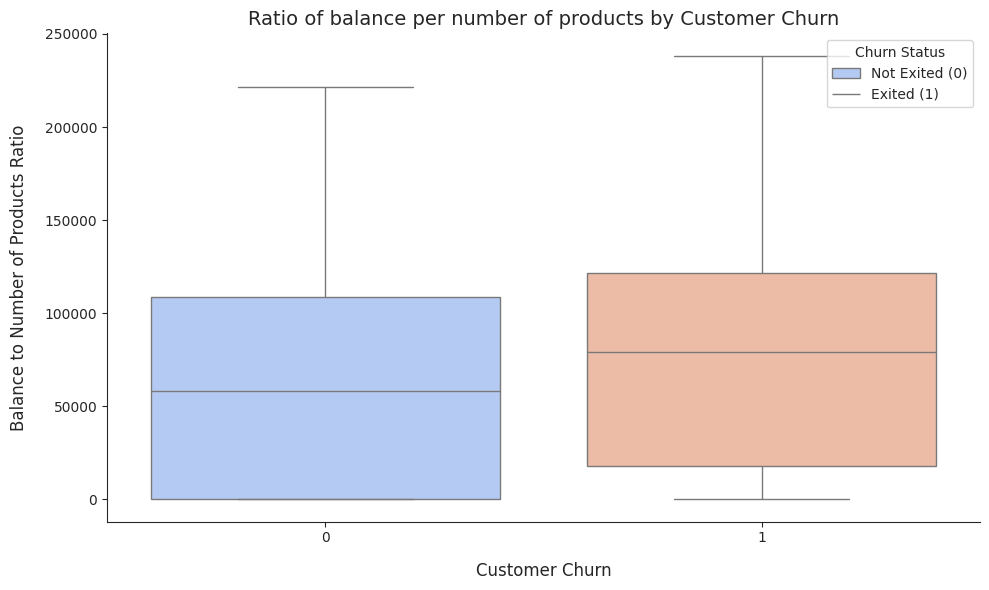

In [741]:
# Visualise the only statistically significant new feature

# Create a figure
plt.figure(figsize = (10, 6))

# Define the boxplot
sns.boxplot(x = "Exited",
            y = "Balance_products_ratio",
            data = churn,
            palette = "coolwarm")

# Add a title, labels, and legend to the plot
plt.title("Ratio of balance per number of products by Customer Churn", fontsize = 14)
plt.xlabel("Customer Churn", fontsize = 12, labelpad = 12)
plt.ylabel("Balance to Number of Products Ratio", fontsize = 12, labelpad = 12)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("boxplot_balance_product")

# Show the plot
plt.show()

/tmp/ipykernel_72/923449220.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "Exited",


Saving figure stipplot_balance_product


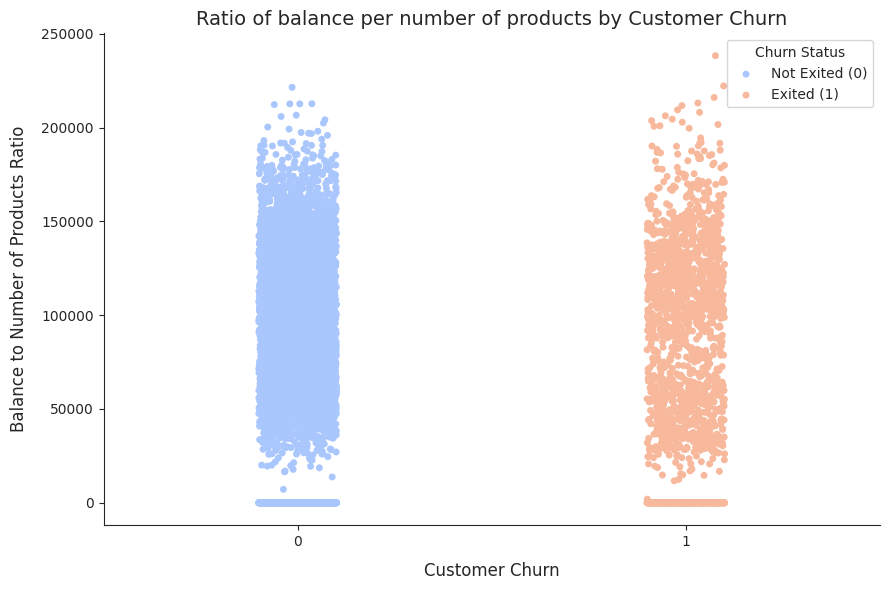

/tmp/ipykernel_72/923449220.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "Exited",


Saving figure stipplot_balance_age


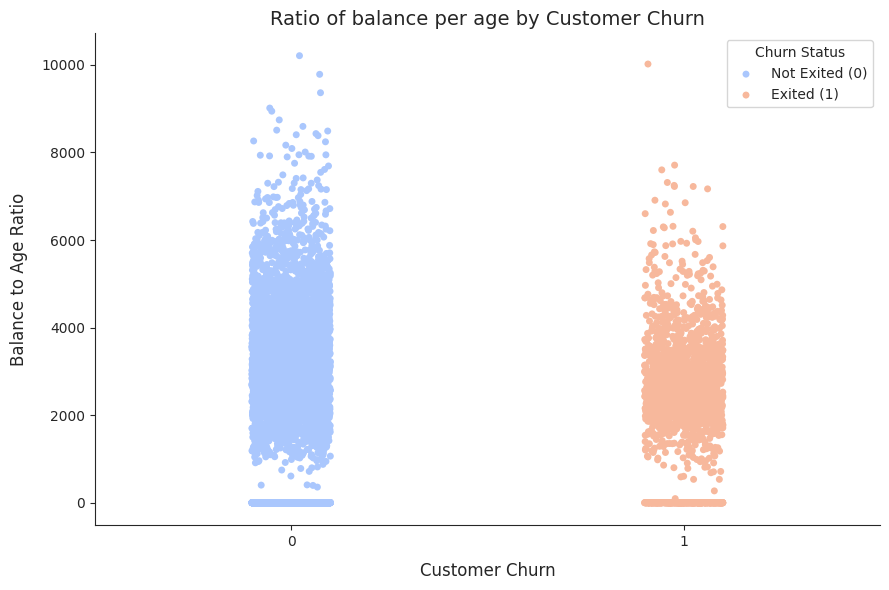

/tmp/ipykernel_72/923449220.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "Exited",


Saving figure stipplot_salary_age


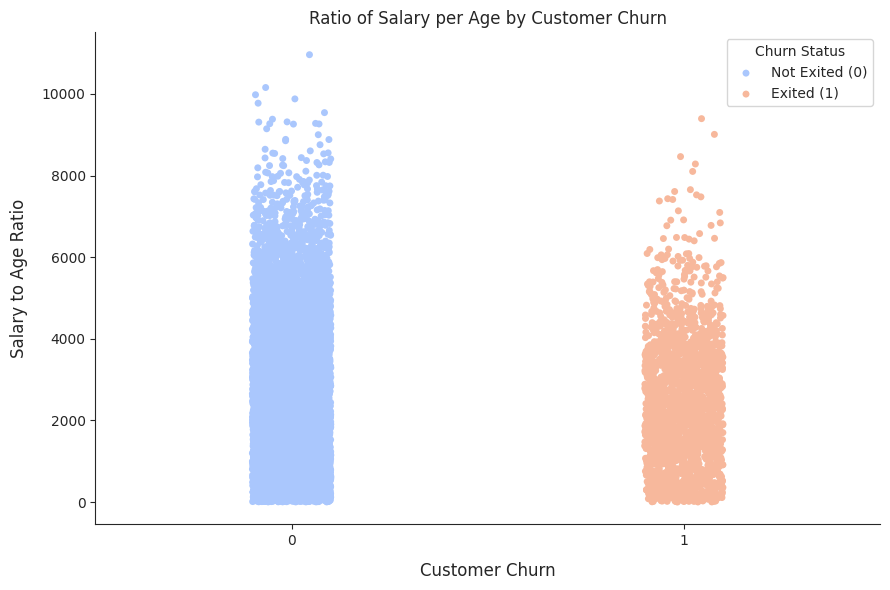

/tmp/ipykernel_72/923449220.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "Exited",


Saving figure stipplot_products_tenure


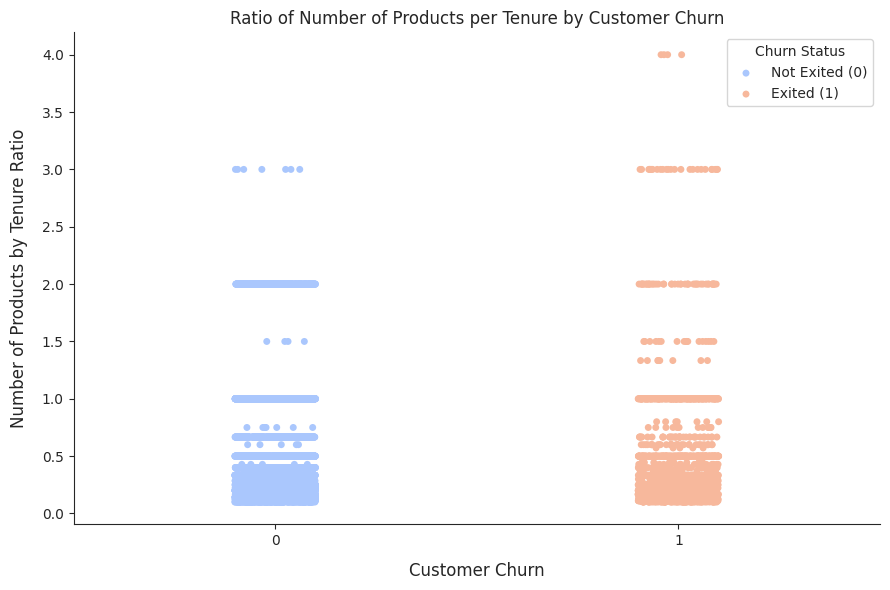

In [742]:
# Visualise the same information in a strip plot

# Define the figure
plt.figure(figsize = (9, 6))

# Define the strip plot
sns.stripplot(x = "Exited",
              y = "Balance_products_ratio",
              data = churn,
              palette = "coolwarm",
              jitter = True)

# Add a title, labels, and legend to the figure
plt.title("Ratio of balance per number of products by Customer Churn", fontsize = 14)
plt.xlabel("Customer Churn", fontsize = 12, labelpad = 9.5)
plt.ylabel("Balance to Number of Products Ratio", fontsize = 12, labelpad = 9.5)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("stipplot_balance_product")

# Show the plot
plt.show()

# Now visualise the other 3 new features that are not as correlated

# 1st discarded new feature
# Define the figure size
plt.figure(figsize = (9, 6))

# Define a strip plot
sns.stripplot(x = "Exited",
              y = "Balance_age_ratio",
              data = churn,
              palette = "coolwarm",
              jitter = True)

# Add a title and labels to the plot
plt.title("Ratio of balance per age by Customer Churn", fontsize = 14)
plt.xlabel("Customer Churn", fontsize = 12, labelpad = 9.5)
plt.ylabel("Balance to Age Ratio", fontsize = 12, labelpad = 9.5)
plt.legend(title = "Churn Status", labels = ["Not Exited (0)", "Exited (1)"], loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("stipplot_balance_age")

# Show a figure
plt.show()


# 2nd discarded new feature
# Define the figure size
plt.figure(figsize = (9, 6))

# Define the strip plot
sns.stripplot(x = "Exited",
              y = "Salary_age_ratio",
              data = churn,
              palette = "coolwarm",
              jitter = True)

# Add a title, labels, and a legend to the plot
plt.title("Ratio of Salary per Age by Customer Churn")
plt.xlabel("Customer Churn", fontsize = 12, labelpad = 10)
plt.ylabel("Salary to Age Ratio", fontsize = 12, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("stipplot_salary_age")

# Show the figure
plt.show()


# 3rd discarded new feature
# Define the figure size
plt.figure(figsize = (9, 6))

# Define the strip plot
sns.stripplot(x = "Exited",
              y = "Products_tenure_ratio",
              data = churn,
              palette = "coolwarm",
              jitter = True)

# Add a title, labels, and a legend to the plot
plt.title("Ratio of Number of Products per Tenure by Customer Churn")
plt.xlabel("Customer Churn", fontsize = 12, labelpad = 10)
plt.ylabel("Number of Products by Tenure Ratio", fontsize = 12, labelpad = 10)
plt.legend(title = "Churn Status", 
           labels = ["Not Exited (0)", "Exited (1)"], 
           loc = "upper right")

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("stipplot_products_tenure")

# Show the figure
plt.show()

In [743]:
# Remove irrelevant new attributes from DataFrame
churn.drop(["Balance_age_ratio", # does not help with churn rates
            "Salary_age_ratio", # does not help with churn rates
            "Products_tenure_ratio"], # does not help with churn rates
             axis = 1,
             inplace = True)

# Check the updates DataFrame info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowNumber                   10000 non-null  int64  
 1   CustomerId                  10000 non-null  int64  
 2   Surname                     10000 non-null  object 
 3   CreditScore                 10000 non-null  int64  
 4   Geography                   10000 non-null  object 
 5   Gender                      10000 non-null  object 
 6   Age                         10000 non-null  int64  
 7   Tenure                      10000 non-null  int64  
 8   Balance                     10000 non-null  float64
 9   NumOfProducts               10000 non-null  int64  
 10  HasCrCard                   10000 non-null  int64  
 11  IsActiveMember              10000 non-null  int64  
 12  EstimatedSalary             10000 non-null  float64
 13  Exited                      1000

# 3 Data Preparation

1. Data Cleaning:

In [744]:
# To clean the DataFrame, a new copy will be made to preserve the data
df_churn_copy = churn.copy()
df_churn_copy.head(10)

# However, as seen during EDA, no missing values or duplicates require preparation

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  ...  EstimatedSalary  Exited  Complain  \
0       2       0.00              1  ...        101348.88       1         1   
1       1   83807.86              1  ...        112542.58       0         1   
2       8  159660.80              3  ...        113931.57       1         1   
3       1       0.00              2  ...         93826.63       0         0   
4       2  125510.82              1  ...         79084.10       0         0   
5       8  113755.78              2  ...        149756.71       1         1   
6       7       0.00              2  ...         10062.80       0         0   
7       4  115046.74              4  ...        119346.88       1         1   
8       4  142051.07              2  ...         74940.50       0         0   
9       2  134603.88              1  ...         71725.73       0         0   

   Satisfaction Score  Card Type  Point Earned      Complain_Exit_Status  \
0                   2    DIAMOND           464         Complain & Exited   
1                   3    DIAMOND           456     Complain & Not Exited   
2                   3    DIAMOND           377         Complain & Exited   
3                   5       GOLD           350  No Complain & Not Exited   
4                   5       GOLD           425  No Complain & Not Exited   
5                   5    DIAMOND           484         Complain & Exited   
6                   2     SILVER           206  No Complain & Not Exited   
7                   2    DIAMOND           282         Complain & Exited   
8                   3       GOLD           251  No Complain & Not Exited   
9                   3       GOLD           342  No Complain & Not Exited   

     HasCrCard_Exit_Status IsActiveMember_Exit_Status Balance_products_ratio  
0       Exited Card Holder       Exited Active Member                 0.0000  
1       Not Exited No Card  Not Exited Active Member              83807.8600  
2       Exited Card Holder            Inactive Exited             53220.2667  
3       Not Exited No Card        Not Exited Inactive                 0.0000  
4  Not Exited Card Holder   Not Exited Active Member             125510.8200  
5       Exited Card Holder            Inactive Exited             56877.8900  
6  Not Exited Card Holder   Not Exited Active Member                  0.0000  
7       Exited Card Holder            Inactive Exited             28761.6850  
8       Not Exited No Card  Not Exited Active Member              71025.5350  
9  Not Exited Card Holder   Not Exited Active Member             134603.8800  

[10 rows x 22 columns]

2. Feature Selection:

In [745]:
# Remove irrelevant columns and those exploratory ones created during EDA from DataFrame
df_churn_copy.drop(["CustomerId", # does not help with churn + data privacy concerns
                    "RowNumber", # does not help with churn 
                    "Surname", # does not help with churn + data privacy concerns
                    "IsActiveMember_Exit_Status", # created solely for visualisation
                    "Complain_Exit_Status", # created solely for visualisation
                    "HasCrCard_Exit_Status" # created solely for visualisation
                   ],
                   axis = 1,
                   inplace = True)

# Check the updated DataFrame info
df_churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditScore             10000 non-null  int64  
 1   Geography               10000 non-null  object 
 2   Gender                  10000 non-null  object 
 3   Age                     10000 non-null  int64  
 4   Tenure                  10000 non-null  int64  
 5   Balance                 10000 non-null  float64
 6   NumOfProducts           10000 non-null  int64  
 7   HasCrCard               10000 non-null  int64  
 8   IsActiveMember          10000 non-null  int64  
 9   EstimatedSalary         10000 non-null  float64
 10  Exited                  10000 non-null  int64  
 11  Complain                10000 non-null  int64  
 12  Satisfaction Score      10000 non-null  int64  
 13  Card Type               10000 non-null  object 
 14  Point Earned            10000 non-null 

In [746]:
# Drop attributes as per the Spearman correlation with the target variable
df_churn_copy.drop(["Complain", # Highly correlated
                    "Point Earned", # Low to no correlation
                    "Satisfaction Score", # Low to no correlation
                    "HasCrCard", # Low to no correlation
                    "EstimatedSalary", # Low to no correlation
                    "Tenure"], # Low to no correlation
                   axis = 1,
                   inplace = True)

# Check the updated DataFrame
df_churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditScore             10000 non-null  int64  
 1   Geography               10000 non-null  object 
 2   Gender                  10000 non-null  object 
 3   Age                     10000 non-null  int64  
 4   Balance                 10000 non-null  float64
 5   NumOfProducts           10000 non-null  int64  
 6   IsActiveMember          10000 non-null  int64  
 7   Exited                  10000 non-null  int64  
 8   Card Type               10000 non-null  object 
 9   Balance_products_ratio  10000 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


Now that all numerical attributes negatively impacting the performance were dropped, one may turn to the categorical attributes and asses their significance before encoding:

In [747]:
# Perform a chi2 independency test

# Loop through each categorical column
for col in categorical_columns:
  # Create a contingency table for current categorical columns
  contingency_table = pd.crosstab(df_churn_copy[col], 
                                  df_churn_copy["Exited"])
  # Perform chi2 test which compares p-value with 0.05
  if st.chi2_contingency(contingency_table)[1] < 0.05:
      print(f"{col}: Significant")
  else:
      print(f"{col}: Not enough proof")

Gender: Significant
Card Type: Not enough proof
Geography: Significant


In [748]:
# Drop attribute with not enough statistical proof of significance
df_churn_copy.drop(["Card Type"],
                   axis = 1,
                   inplace = True)

# Check the updated DataFrame information
df_churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditScore             10000 non-null  int64  
 1   Geography               10000 non-null  object 
 2   Gender                  10000 non-null  object 
 3   Age                     10000 non-null  int64  
 4   Balance                 10000 non-null  float64
 5   NumOfProducts           10000 non-null  int64  
 6   IsActiveMember          10000 non-null  int64  
 7   Exited                  10000 non-null  int64  
 8   Balance_products_ratio  10000 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB


3. Feature engineering:

In [749]:
# As seen during EDA, one may process 'Age' into promising new features to reduce noise and handle outliers.

# Identify the value counts for 'Age'
df_churn_copy["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
84      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

Saving figure churn_vs_age_group


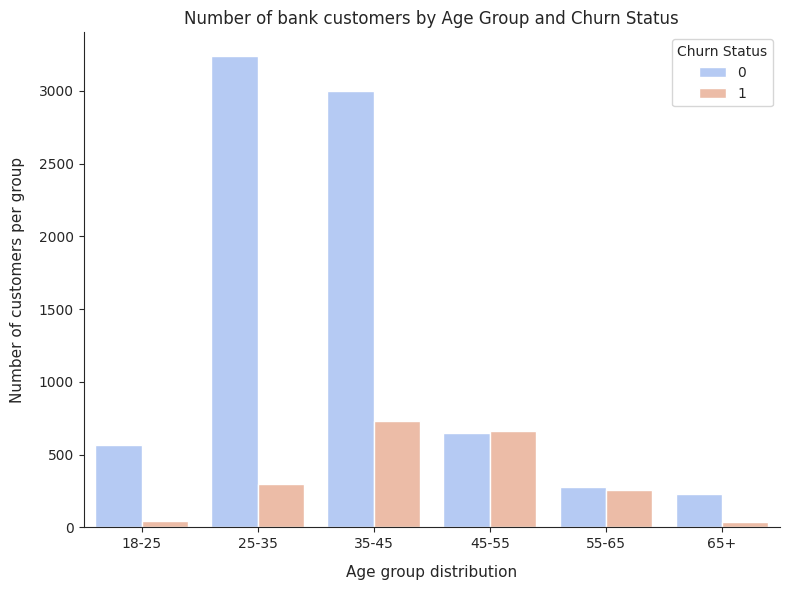

In [750]:
# Feature engineering: Binning (Adapted from Shajar, 2023)

# Attempt to smooth out noise and variability due to disproportionate data distribution

# Cut the existing data using bins and generate a new attribute
df_churn_copy["Age Group"] = pd.cut(df_churn_copy["Age"],
                                 bins = [0, 25, 35, 45, 55, 65, 95],
                                 labels = ["18-25", "25-35", "35-45", 
                                           "45-55", "55-65","65+"])

# Aggregate number of customers by Age group and Exit status
age_churned = df_churn_copy.groupby(["Age Group", "Exited"]).size().reset_index(name = "No. of customers")

# Define the size and create a figure
plt.figure(figsize = (8,6))
sns.barplot(data = age_churned,
            x = "Age Group",
            y = "No. of customers",
            hue = "Exited",
            palette = "coolwarm")

# Add labels, legend, and title
plt.xlabel("Age group distribution", fontsize = 11, labelpad = 10)
plt.ylabel("Number of customers per group", fontsize = 11, labelpad = 10)
plt.legend(title = "Churn Status",  loc = "upper right")
plt.title("Number of bank customers by Age Group and Churn Status", fontsize = 12)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save figure
save_fig("churn_vs_age_group")

# Show the figure
plt.tight_layout()
plt.show()

In [751]:
# Check the first 10 values of 'Age Group'
df_churn_copy["Age Group"].head(10)

0    35-45
1    35-45
2    35-45
3    35-45
4    35-45
5    35-45
6    45-55
7    25-35
8    35-45
9    25-35
Name: Age Group, dtype: category
Categories (6, object): ['18-25' < '25-35' < '35-45' < '45-55' < '55-65' < '65+']

In [752]:
# Check the value counts by age group
print("Bank customer distribution by 'Age Group': ")
print(df_churn_copy["Age Group"].value_counts().sort_index())

# Return the value count as a percentage
print("Customers' churn percentage by 'Age Group': ")
age_churn = df_churn_copy.groupby("Age Group")["Exited"].mean() * 100
print(age_churn.round(2))

Bank customer distribution by 'Age Group': 
18-25     611
25-35    3542
35-45    3736
45-55    1311
55-65     536
65+       264
Name: Age Group, dtype: int64
Customers' churn percentage by 'Age Group': 
Age Group
18-25     7.53
25-35     8.50
35-45    19.65
45-55    50.57
55-65    48.32
65+      13.26
Name: Exited, dtype: float64


In [753]:
# Check the updated information for the DataFrame
df_churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CreditScore             10000 non-null  int64   
 1   Geography               10000 non-null  object  
 2   Gender                  10000 non-null  object  
 3   Age                     10000 non-null  int64   
 4   Balance                 10000 non-null  float64 
 5   NumOfProducts           10000 non-null  int64   
 6   IsActiveMember          10000 non-null  int64   
 7   Exited                  10000 non-null  int64   
 8   Balance_products_ratio  10000 non-null  float64 
 9   Age Group               10000 non-null  category
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 713.2+ KB


The original 'Age' attribute will be saved to provide additional information for models capturing non-linear relationships.

In [754]:
# Create a new copy of the clean encoded DataFrame
df_clean = df_churn_copy.copy()

# Prepare x and y
y = df_clean["Exited"] # target variable
x = df_clean.drop("Exited", axis = 1)

# Step 1: Randomly split the data into training and testing (80/20)
# This prevents a model from overfitting and then performing badly on unseen data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Step 2: Randomly split the remaining training data into training and validating (75/25)
# Hence, validation contains approximately 20% of the original dataset
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.25,
                                                  random_state = 42)

# Preview x_train
x_train.head()

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
8588          712     Spain  Female   29   77919.78              1   
3178          542    France  Female   39  109949.39              2   
5200          512   Germany    Male   42   93955.83              2   
8889          580    France  Female   39  128362.59              1   
5789          689   Germany  Female   55   76296.81              1   

      IsActiveMember  Balance_products_ratio Age Group  
8588               0               77919.780     25-35  
3178               1               54974.695     35-45  
5200               0               46977.915     35-45  
8889               0              128362.590     35-45  
5789               0               76296.810     45-55

In [755]:
# Check the information of the training set
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 8588 to 6090
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CreditScore             6000 non-null   int64   
 1   Geography               6000 non-null   object  
 2   Gender                  6000 non-null   object  
 3   Age                     6000 non-null   int64   
 4   Balance                 6000 non-null   float64 
 5   NumOfProducts           6000 non-null   int64   
 6   IsActiveMember          6000 non-null   int64   
 7   Balance_products_ratio  6000 non-null   float64 
 8   Age Group               6000 non-null   category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 427.9+ KB


4. Add promising transformations to the data:

In [756]:
# Define a transformer for One-hot Encoding categorical variables and for scaling all numeric variables
# When encoding, drop the first variable to avoid multicollinearity
transformer_churn = ColumnTransformer([
    ("1he", OneHotEncoder(drop = "first", handle_unknown = "ignore"), ["Geography", "Gender", "Age Group"]), # transfrom categorical variables into binary form
    ("minmax_scaler", MinMaxScaler(), ["CreditScore", "Age", "Balance", "NumOfProducts", "IsActiveMember", "Balance_products_ratio"]) # normalise numerical variable
])

# Fit and apply transformer on the training data ONLY
x_train_encoded = transformer_churn.fit_transform(x_train)

# Transfrom validation and test data (but not fitting it)
x_val_encoded = transformer_churn.transform(x_val)
x_test_encoded = transformer_churn.transform(x_test)

# Get a list of feature names from one-hot encoding and normalizing
categories = transformer_churn.named_transformers_["1he"].get_feature_names_out(input_features = ["Geography", 
                                                                                                  "Gender", 
                                                                                                  "Age Group"])
num_feature_names = ["CreditScore", "Age", "Balance", "NumOfProducts", "IsActiveMember", "Balance_products_ratio"]

# Combine feature names to update labels
feature_names = list(categories) + num_feature_names

# Convert arrays back to DataFrame format and update column labels
x_train_encoded = pd.DataFrame(x_train_encoded, columns = feature_names)
x_val_encoded = pd.DataFrame(x_val_encoded, columns = feature_names)
x_test_encoded = pd.DataFrame(x_test_encoded, columns = feature_names)

# Show the encoded DataFrame
print(x_train_encoded)

      Geography_Germany  Geography_Spain  Gender_Male  Age Group_25-35  \
0                   0.0              1.0          0.0              1.0   
1                   0.0              0.0          0.0              0.0   
2                   1.0              0.0          1.0              0.0   
3                   0.0              0.0          0.0              0.0   
4                   1.0              0.0          0.0              0.0   
...                 ...              ...          ...              ...   
5995                0.0              0.0          0.0              1.0   
5996                0.0              1.0          0.0              0.0   
5997                0.0              0.0          1.0              1.0   
5998                0.0              1.0          1.0              1.0   
5999                0.0              0.0          1.0              1.0   

      Age Group_35-45  Age Group_45-55  Age Group_55-65  Age Group_65+  \
0                 0.0              0.

In [757]:
# Check the structure of the encoded x-train dataframe
x_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Geography_Germany       6000 non-null   float64
 1   Geography_Spain         6000 non-null   float64
 2   Gender_Male             6000 non-null   float64
 3   Age Group_25-35         6000 non-null   float64
 4   Age Group_35-45         6000 non-null   float64
 5   Age Group_45-55         6000 non-null   float64
 6   Age Group_55-65         6000 non-null   float64
 7   Age Group_65+           6000 non-null   float64
 8   CreditScore             6000 non-null   float64
 9   Age                     6000 non-null   float64
 10  Balance                 6000 non-null   float64
 11  NumOfProducts           6000 non-null   float64
 12  IsActiveMember          6000 non-null   float64
 13  Balance_products_ratio  6000 non-null   float64
dtypes: float64(14)
memory usage: 656.4 KB


In [758]:
# Inspect the head of the encoded training dataframe
x_train_encoded.head()

Geography_Germany  Geography_Spain  Gender_Male  Age Group_25-35  \
0                0.0              1.0          0.0              1.0   
1                0.0              0.0          0.0              0.0   
2                1.0              0.0          1.0              0.0   
3                0.0              0.0          0.0              0.0   
4                1.0              0.0          0.0              0.0   

   Age Group_35-45  Age Group_45-55  Age Group_55-65  Age Group_65+  \
0              0.0              0.0              0.0            0.0   
1              1.0              0.0              0.0            0.0   
2              1.0              0.0              0.0            0.0   
3              1.0              0.0              0.0            0.0   
4              0.0              1.0              0.0            0.0   

   CreditScore     Age  Balance  NumOfProducts  IsActiveMember  \
0        0.724  0.1692   0.3269         0.0000             0.0   
1        0.384  0.3231   0.4612         0.3333             1.0   
2        0.324  0.3692   0.3941         0.3333             0.0   
3        0.460  0.3231   0.5385         0.0000             0.0   
4        0.678  0.5692   0.3201         0.0000             0.0   

   Balance_products_ratio  
0                  0.3269  
1                  0.2306  
2                  0.1971  
3                  0.5385  
4                  0.3201

The encoded data may be also observed in a histogram form:

Saving figure encoded_attribute_histograms


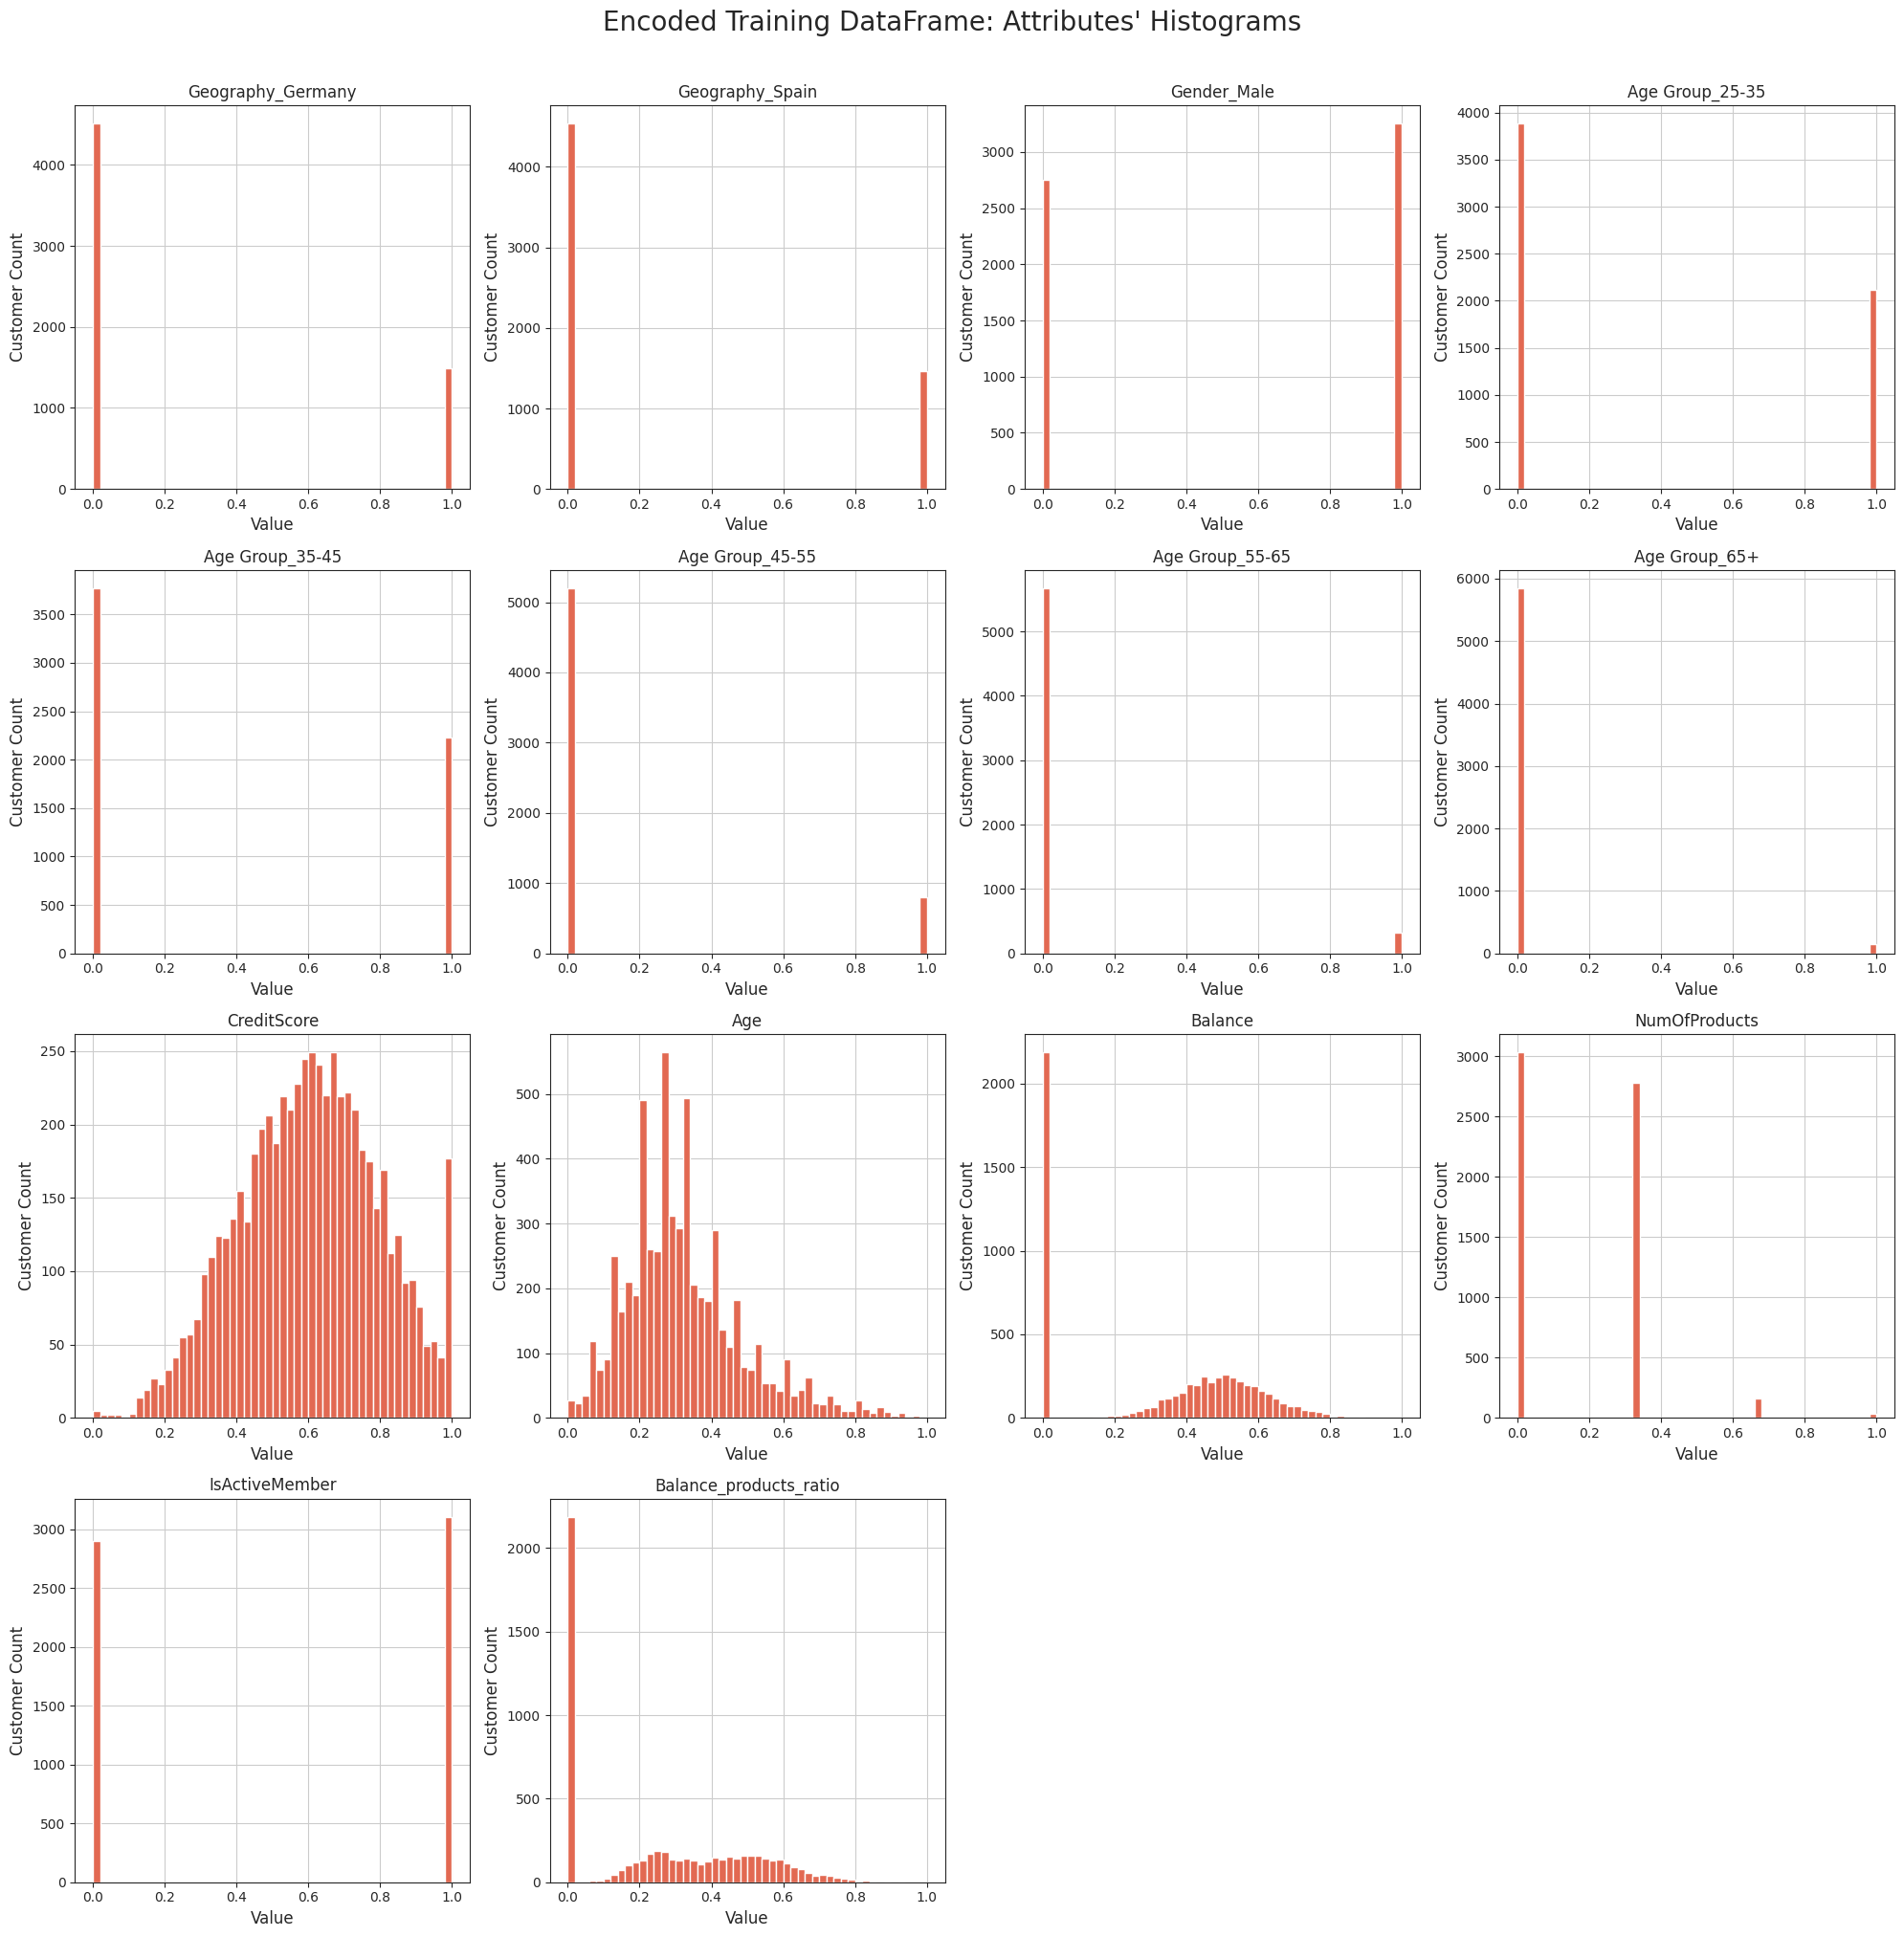

In [759]:
# Set the style of the plot
sns.set_style("ticks")

# Plot a series of histograms to show the encoded numerical attributes
axes = x_train_encoded.hist(bins = 50, figsize = (20,20), color = sns.color_palette("coolwarm_r")[0])

# Set a figure title
plt.suptitle("Encoded Training DataFrame: Attributes' Histograms", 
             fontsize = 20, 
             y = 1.01)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Loop through the axes array and set individual labels
for ax in axes.flatten():
  ax.set_xlabel("Value", fontsize = 12)
  ax.set_ylabel("Customer Count", fontsize = 12)

# Save the figure
save_fig("encoded_attribute_histograms")

# Show the histograms
plt.show()

Looking at the normalised histograms, one may see 'CreditScore' and 'Balance' appear to have outliers. However, in both cases, those values are representative of the people with perfect credit scores or customers with no money in their accounts and so they carry meaningful information.

In [760]:
# Set the precision to four decimal places for clarity
pd.set_option("display.precision", 4)

# Check the descriptive statistics of the encoded DataFrame for abnomalies 
x_train_encoded.describe()

Geography_Germany  Geography_Spain  Gender_Male  Age Group_25-35  \
count          6000.0000        6000.0000    6000.0000        6000.0000   
mean              0.2490           0.2443       0.5417           0.3532   
std               0.4325           0.4297       0.4983           0.4780   
min               0.0000           0.0000       0.0000           0.0000   
25%               0.0000           0.0000       0.0000           0.0000   
50%               0.0000           0.0000       1.0000           0.0000   
75%               0.0000           0.0000       1.0000           1.0000   
max               1.0000           1.0000       1.0000           1.0000   

       Age Group_35-45  Age Group_45-55  Age Group_55-65  Age Group_65+  \
count        6000.0000        6000.0000        6000.0000      6000.0000   
mean            0.3715           0.1335           0.0548         0.0255   
std             0.4832           0.3401           0.2277         0.1577   
min             0.0000           0.0000           0.0000         0.0000   
25%             0.0000           0.0000           0.0000         0.0000   
50%             0.0000           0.0000           0.0000         0.0000   
75%             1.0000           0.0000           0.0000         0.0000   
max             1.0000           1.0000           1.0000         1.0000   

       CreditScore        Age    Balance  NumOfProducts  IsActiveMember  \
count    6000.0000  6000.0000  6000.0000      6000.0000       6000.0000   
mean        0.6036     0.3220     0.3198         0.1776          0.5172   
std         0.1921     0.1611     0.2624         0.1931          0.4997   
min         0.0000     0.0000     0.0000         0.0000          0.0000   
25%         0.4700     0.2154     0.0000         0.0000          0.0000   
50%         0.6060     0.2923     0.4041         0.0000          1.0000   
75%         0.7360     0.4000     0.5354         0.3333          1.0000   
max         1.0000     1.0000     1.0000         1.0000          1.0000   

       Balance_products_ratio  
count               6000.0000  
mean                   0.2624  
std                    0.2384  
min                    0.0000  
25%                    0.0000  
50%                    0.2551  
75%                    0.4694  
max                    1.0000

5. Feature scaling: SMOTE vs RandomOverSampling

In [761]:
# Check target variable class distribution again
class_dis = y_train.value_counts(normalize = True)
print(class_dis)

# Because of the significant class imbalance, different scaling techniques may be tested on all models during modeling

0    0.7948
1    0.2052
Name: Exited, dtype: float64


In [762]:
# Initialise the SMOTE object
# SMOTE is synthetically generating samples for the minority class to address imbalance
smote = SMOTE(random_state = 42) # Set seed for reproducibility 

# Apply SMOTE to training data only
x_train_smote, y_train_smote = smote.fit_resample(x_train_encoded, y_train)

# Preview DataFrame info
x_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Geography_Germany       9538 non-null   float64
 1   Geography_Spain         9538 non-null   float64
 2   Gender_Male             9538 non-null   float64
 3   Age Group_25-35         9538 non-null   float64
 4   Age Group_35-45         9538 non-null   float64
 5   Age Group_45-55         9538 non-null   float64
 6   Age Group_55-65         9538 non-null   float64
 7   Age Group_65+           9538 non-null   float64
 8   CreditScore             9538 non-null   float64
 9   Age                     9538 non-null   float64
 10  Balance                 9538 non-null   float64
 11  NumOfProducts           9538 non-null   float64
 12  IsActiveMember          9538 non-null   float64
 13  Balance_products_ratio  9538 non-null   float64
dtypes: float64(14)
memory usage: 1.0 MB


In [763]:
# Check target variable class distribution again
# Now that the resampling technique has been applied, the training dataframe comprises 9538 entries that are equally distributed by 'Exited'
class_dis = y_train_smote.value_counts(normalize = True)
print(class_dis)

0    0.5
1    0.5
Name: Exited, dtype: float64


In [764]:
# Initialise the RandomOverSampler object
# This approach randomly takes instances from the minority class and replicates them to fix the class imbalance issue
ros = RandomOverSampler(random_state = 42) # Set seed for reproducibility

# Apply ros to Dataframe
x_train_ros, y_train_ros = ros.fit_resample(x_train_encoded, y_train)

# Preview DataFrame info
x_train_ros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Geography_Germany       9538 non-null   float64
 1   Geography_Spain         9538 non-null   float64
 2   Gender_Male             9538 non-null   float64
 3   Age Group_25-35         9538 non-null   float64
 4   Age Group_35-45         9538 non-null   float64
 5   Age Group_45-55         9538 non-null   float64
 6   Age Group_55-65         9538 non-null   float64
 7   Age Group_65+           9538 non-null   float64
 8   CreditScore             9538 non-null   float64
 9   Age                     9538 non-null   float64
 10  Balance                 9538 non-null   float64
 11  NumOfProducts           9538 non-null   float64
 12  IsActiveMember          9538 non-null   float64
 13  Balance_products_ratio  9538 non-null   float64
dtypes: float64(14)
memory usage: 1.0 MB


In [765]:
# Check target variable class distribution again
class_dis = y_train_ros.value_counts(normalize = True)
print(class_dis)

# Similarly, the ROS training set comprises 9538 entries that are now equally balanced

0    0.5
1    0.5
Name: Exited, dtype: float64


# 4 Model Exploration

Train each model on the original encoded dataset, the SMOTE resampled dataset, and then with RandomOverSampling to see which data processing step works best to successfully predict customer churn.

## 4.1 (Gaussian) Naive Bayes

In [766]:
# Try training the model with the imbalanced dataset

# Initialise and train a Naive Bayes classifier
model_gnb = GaussianNB()
model_gnb.fit(x_train_encoded, y_train)

# Make predictions on the training set and calculate accuracy
train_pred_gnb = model_gnb.predict(x_train_encoded)
train_accuracy_gnb = accuracy_score(y_train, train_pred_gnb)
print(f"Gaussian Naive Bayes Training accuracy: {100 * train_accuracy_gnb:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_gnb = model_gnb.predict(x_val_encoded)
validation_accuracy_gnb = accuracy_score(y_val, validation_pred_gnb)
print(f"Gaussian Naive Bayes Validation accuracy: {100 * validation_accuracy_gnb:.2f}%")


Gaussian Naive Bayes Training accuracy: 80.18%
Gaussian Naive Bayes Validation accuracy: 80.40%


In [767]:
# Try training the model with the SMOTE resampled data

# Initialise and train a Naive Bayes classifier
model_gnb_smote = GaussianNB()
model_gnb_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_gnb_smote = model_gnb_smote.predict(x_train_smote)
train_accuracy_gnb_smote = accuracy_score(y_train_smote, train_pred_gnb_smote)
print(f"Gaussian Naive Bayes Training accuracy: {100 * train_accuracy_gnb_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_gnb_smote = model_gnb_smote.predict(x_val_encoded)
validation_accuracy_gnb_smote = accuracy_score(y_val, validation_pred_gnb_smote)
print(f"Gaussian Naive Bayes Validation accuracy: {100 * validation_accuracy_gnb_smote:.2f}%")


Gaussian Naive Bayes Training accuracy: 72.81%
Gaussian Naive Bayes Validation accuracy: 77.05%


In [768]:
# Try training the model with the RandomOverSampling data

# Initialise and train a Naive Bayes classifier
model_gnb_ros = GaussianNB()
model_gnb_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_gnb_ros = model_gnb_ros.predict(x_train_ros)
train_accuracy_gnb_ros = accuracy_score(y_train_ros, train_pred_gnb_ros)
print(f"Gaussian Naive Bayes Training accuracy: {100 * train_accuracy_gnb_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_gnb_ros = model_gnb_ros.predict(x_val_encoded)
validation_accuracy_gnb_ros = accuracy_score(y_val, validation_pred_gnb_ros)
print(f"Gaussian Naive Bayes Validation accuracy: {100 * validation_accuracy_gnb_ros:.2f}%")

Gaussian Naive Bayes Training accuracy: 72.98%
Gaussian Naive Bayes Validation accuracy: 78.00%


Perform 10-fold cross-validation on all 3 models:

In [769]:
# Perform 10-fold cross-validation with the simple unbalanced Gaussian Naive Bayes model
CV_scores_gnb = cross_val_score(model_gnb,
                                x_train_encoded,
                                y_train,
                                cv = 10,
                                scoring = "accuracy")

# Find f1 score using 10-fold cross-validation
CV_scores_gnb_f1 = cross_val_score(model_gnb,
                                    x_train_encoded,
                                    y_train,
                                    cv = 10,
                                    scoring = "f1")

# Find recall using 10-fold cross-validation
CV_scores_gnb_recall = cross_val_score(model_gnb,
                                        x_train_encoded,
                                        y_train,
                                        cv = 10,
                                        scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_gnb = CV_scores_gnb.mean()
CV_sd_score_gnb = CV_scores_gnb.std()
CV_mean_score_gnb_f1 = CV_scores_gnb_f1.mean()
CV_sd_score_gnb_f1 = CV_scores_gnb_f1.std()
CV_mean_score_gnb_recall = CV_scores_gnb.mean()
CV_sd_score_gnb_recall = CV_scores_gnb.std()

# Print the results
print(f"Gaussian Naive Bayes CV scores:\n{CV_scores_gnb}")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy: {100 * CV_mean_score_gnb:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation: {100 * CV_sd_score_gnb:.2f}%")
print()
print(f"Gaussian Naive Bayes CV f1 scores:\n{CV_scores_gnb_f1}")
print(f"Gaussian Naive Bayes 10-fold CV mean f1 score: {100 * CV_mean_score_gnb_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation: {100 * CV_sd_score_gnb_f1:.2f}%")
print()
print(f"Gaussian Naive Bayes CV recall scores:\n{CV_scores_gnb_recall}")
print(f"Gaussian Naive Bayes 10-fold CV average recall: {100 * CV_mean_score_gnb_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation: {100 * CV_sd_score_gnb_recall:.2f}%")


Gaussian Naive Bayes CV scores:
[0.76833333 0.81666667 0.81333333 0.79666667 0.81       0.78833333
 0.79666667 0.81833333 0.79166667 0.82666667]
Gaussian Naive Bayes 10-fold CV mean accuracy: 80.27%
Gaussian Naive Bayes 10-fold CV standard deviation: 1.66%

Gaussian Naive Bayes CV f1 scores:
[0.45059289 0.5045045  0.5625     0.53787879 0.52892562 0.52075472
 0.49166667 0.53617021 0.50980392 0.55555556]
Gaussian Naive Bayes 10-fold CV mean f1 score: 51.98%
Gaussian Naive Bayes 10-fold CV standard deviation: 3.11%

Gaussian Naive Bayes CV recall scores:
[0.46341463 0.45528455 0.58536585 0.57723577 0.5203252  0.56097561
 0.4796748  0.51219512 0.52845528 0.52419355]
Gaussian Naive Bayes 10-fold CV average recall: 80.27%
Gaussian Naive Bayes 10-fold CV standard deviation: 1.66%


In [770]:
# Perform 10-fold cross-validation with Gaussian Naive Bayes model (SMOTE)
CV_scores_gnb_smote = cross_val_score(model_gnb_smote,
                                      x_train_smote,
                                      y_train_smote,
                                      cv = 10,
                                      scoring = "accuracy")

# Find F1 score using 10-fold cross-validation
CV_scores_gnb_smote_f1 = cross_val_score(model_gnb_smote,
                                          x_train_smote,
                                          y_train_smote,
                                          cv = 10,
                                          scoring = "f1")

# Find Recall using 10-fold cross-validation
CV_scores_gnb_smote_recall = cross_val_score(model_gnb_smote,
                                             x_train_smote,
                                             y_train_smote,
                                             cv = 10,
                                             scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_gnb_smote = CV_scores_gnb_smote.mean()
CV_sd_score_gnb_smote = CV_scores_gnb_smote.std()
CV_mean_score_gnb_smote_f1 = CV_scores_gnb_smote_f1.mean()
CV_sd_score_gnb_smote_f1 = CV_scores_gnb_smote_f1.std()
CV_mean_score_gnb_smote_recall = CV_scores_gnb_smote_recall.mean()
CV_sd_score_gnb_smote_recall = CV_scores_gnb_smote_recall.std()


# Print the results
print(f"Gaussian Naive Bayes CV scores:\n{CV_scores_gnb_smote}")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_gnb_smote:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): {100 * CV_sd_score_gnb_smote:.2f}%")
print()

print(f"Gaussian Naive Bayes CV f1 scores:\n{CV_scores_gnb_smote_f1}")
print(f"Gaussian Naive Bayes 10-fold CV mean f1 score (SMOTE): {100 * CV_mean_score_gnb_smote_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): {100 * CV_sd_score_gnb_smote_f1:.2f}%")
print()

print(f"Gaussian Naive Bayes CV recall scores:\n{CV_scores_gnb_smote_recall}")
print(f"Gaussian Naive Bayes 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_gnb_smote_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): {100 * CV_sd_score_gnb_smote_recall:.2f}%")

Gaussian Naive Bayes CV scores:
[0.71907757 0.74842767 0.72746331 0.72955975 0.71069182 0.70649895
 0.74109015 0.72746331 0.72298006 0.74501574]
Gaussian Naive Bayes 10-fold CV mean accuracy (SMOTE): 72.78%
Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): 1.32%

Gaussian Naive Bayes CV f1 scores:
[0.70222222 0.7235023  0.70319635 0.71895425 0.68988764 0.68819599
 0.71899886 0.70588235 0.70469799 0.72849162]
Gaussian Naive Bayes 10-fold CV mean f1 score (SMOTE): 70.84%
Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): 1.30%

Gaussian Naive Bayes CV recall scores:
[0.66247379 0.65828092 0.64570231 0.6918239  0.64360587 0.64779874
 0.66247379 0.65408805 0.66176471 0.68343816]
Gaussian Naive Bayes 10-fold CV mean recall (SMOTE): 66.11%
Gaussian Naive Bayes 10-fold CV standard deviation(SMOTE): 1.49%


In [771]:
# Perform 10-fold cross-validation with Gaussian Naive Bayes model (Random OverSampling)
CV_scores_gnb_ros = cross_val_score(model_gnb_ros,
                                    x_train_ros,
                                    y_train_ros,
                                    cv = 10,
                                    scoring = "accuracy")

# Find F1 score using 10-fold cross-validation
CV_scores_gnb_ros_f1 = cross_val_score(model_gnb_ros,
                                        x_train_ros,
                                        y_train_ros,
                                        cv = 10,
                                        scoring = "f1")

# Find Recall using 10-fold cross-validation
CV_scores_gnb_ros_recall = cross_val_score(model_gnb_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_gnb_ros = CV_scores_gnb_ros.mean()
CV_sd_score_gnb_ros = CV_scores_gnb_ros.std()
CV_mean_score_gnb_ros_f1 = CV_scores_gnb_ros_f1.mean()
CV_sd_score_gnb_ros_f1 = CV_scores_gnb_ros_f1.std()
CV_mean_score_gnb_ros_recall = CV_scores_gnb_ros_recall.mean()
CV_sd_score_gnb_ros_recall = CV_scores_gnb_ros_recall.std()

# Print the results
print(f"Gaussian Naive Bayes CV scores:\n{CV_scores_gnb_ros}")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_gnb_ros:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation (ROS): {100 * CV_sd_score_gnb_ros:.2f}%")
print()

print(f"Gaussian Naive Bayes CV f1 scores:\n{CV_scores_gnb_ros_f1}")
print(f"Gaussian Naive Bayes 10-fold CV mean f1 (ROS): {100 * CV_mean_score_gnb_ros_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation (ROS): {100 * CV_sd_score_gnb_ros_f1:.2f}%")
print()

print(f"Gaussian Naive Bayes CV recall:\n{CV_scores_gnb_ros_recall}")
print(f"Gaussian Naive Bayes 10-fold CV mean recall (ROS): {100 * CV_mean_score_gnb_ros_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV standard deviation (ROS): {100 * CV_sd_score_gnb_ros_recall:.2f}%")

Gaussian Naive Bayes CV scores:
[0.72012579 0.74737945 0.73165618 0.7148847  0.70859539 0.71593291
 0.72012579 0.74213836 0.73871983 0.74396642]
Gaussian Naive Bayes 10-fold CV mean accuracy (ROS): 72.84%
Gaussian Naive Bayes 10-fold CV standard deviation (ROS): 1.33%

Gaussian Naive Bayes CV f1 scores:
[0.70300334 0.72009292 0.70909091 0.69438202 0.68903803 0.69788183
 0.6869871  0.72234763 0.72607261 0.72209567]
Gaussian Naive Bayes 10-fold CV mean f1 (ROS): 70.71%
Gaussian Naive Bayes 10-fold CV standard deviation (ROS): 1.41%

Gaussian Naive Bayes CV recall:
[0.66247379 0.64989518 0.65408805 0.64779874 0.64570231 0.65618449
 0.61425577 0.67085954 0.69327731 0.66457023]
Gaussian Naive Bayes 10-fold CV mean recall (ROS): 65.59%
Gaussian Naive Bayes 10-fold CV standard deviation (ROS): 1.92%


Compare all relevant performance metrics:

In [772]:
# Get all relevant performance metrics to compare models

# Model 1: GNB with original imbalanced data
print(classification_report(y_val, validation_pred_gnb))

# Get the probability estimates of the positive class
y_scores = model_gnb.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores) # Measure of the area under the Receiver Operating Characteristic curve
print(f"ROC AUC score using encoded data: {roc_auc}\n")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy: {100 * CV_mean_score_gnb:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV accuracy standard deviation: {100 * CV_sd_score_gnb:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean f1: {100 * CV_mean_score_gnb_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV f1 standard deviation: {100 * CV_sd_score_gnb_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean recall: {100 * CV_mean_score_gnb_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_gnb_recall:.2f}%")
print()


# Model 2: GNB with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_gnb_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_gnb_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc}\n")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_gnb_smote:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV accuracy standard deviation (SMOTE): {100 * CV_sd_score_gnb_smote:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_gnb_smote_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_gnb_smote_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_gnb_smote_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_gnb_smote_recall:.2f}%")
print()

# Model 3: GNB with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_gnb_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_gnb_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data: {roc_auc}\n")
print(f"Gaussian Naive Bayes 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_gnb_ros:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV accuracy standard deviation (ROS): {100 * CV_sd_score_gnb_ros:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean f1 (ROS): {100 * CV_mean_score_gnb_ros_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_gnb_ros_f1:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV mean recall (ROS): {100 * CV_mean_score_gnb_ros_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_gnb_ros_recall:.2f}%")

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1586
           1       0.53      0.50      0.51       414

    accuracy                           0.80      2000
   macro avg       0.70      0.69      0.70      2000
weighted avg       0.80      0.80      0.80      2000

ROC AUC score using encoded data: 0.7887889808773629

Gaussian Naive Bayes 10-fold CV mean accuracy: 80.27%
Gaussian Naive Bayes 10-fold CV accuracy standard deviation: 1.66%
Gaussian Naive Bayes 10-fold CV mean f1: 51.98%
Gaussian Naive Bayes 10-fold CV f1 standard deviation: 3.11%
Gaussian Naive Bayes 10-fold CV mean recall: 80.27%
Gaussian Naive Bayes 10-fold CV recall standard deviation (SMOTE): 1.66%

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1586
           1       0.46      0.64      0.54       414

    accuracy                           0.77      2000
   macro avg       0.68      0.72      0.69  

Saving figure gnb_roc_curve


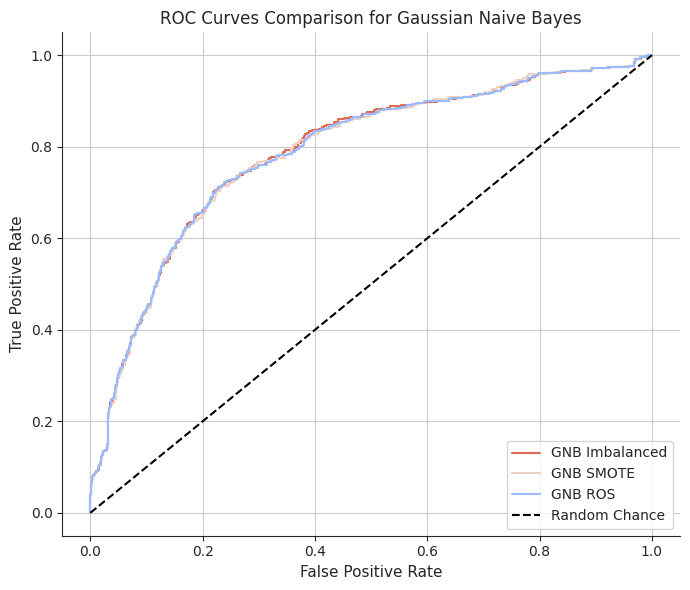

In [773]:
# Plot the ROC curev to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_gnb, tpr_gnb, _ = roc_curve(y_val, y_scores)
fpr_gnb_smote, tpr_gnb_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_gnb_ros, tpr_gnb_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_gnb, 
         tpr_gnb, 
         label ="GNB Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_gnb_smote, 
         tpr_gnb_smote, 
         label = "GNB SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_gnb_ros, 
         tpr_gnb_ros, 
         label = "GNB ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Gaussian Naive Bayes", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("gnb_roc_curve")

# Show the plot
plt.show()

Saving figure gnb_performance_metrics_class_imbalance_effect


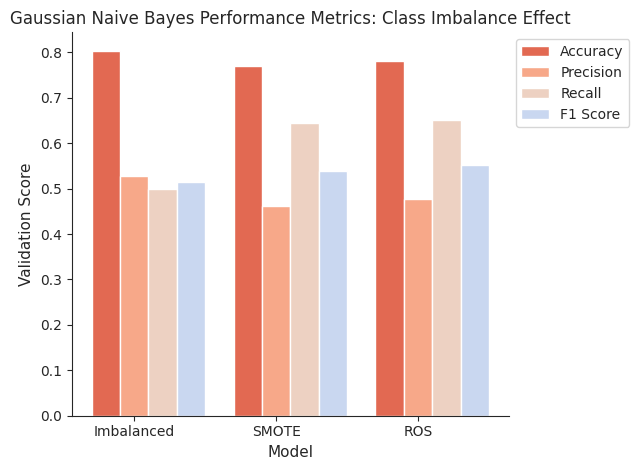

In [774]:
# While ROC curve indicates a good performance of all three models due to being near the left top corner (i.e., high TPR and low FPR)
# Plot the performance metrics of each model for comparison

# Save variables for accuracy, precision, recall, and f1 score: GNB with original imbalanced dataset
accuracy_score_gnb = accuracy_score(y_val, validation_pred_gnb).round(4)
precision_score_gnb = precision_score(y_val, validation_pred_gnb).round(4)
recall_score_gnb = recall_score(y_val, validation_pred_gnb).round(4)
f1_score_gnb = f1_score(y_val, validation_pred_gnb).round(4)

# Save variables for accuracy, precision, recall, and f1 score: GNB with SMOTE dataset
accuracy_score_gnb_smote = accuracy_score(y_val, validation_pred_gnb_smote).round(4)
precision_score_gnb_smote = precision_score(y_val, validation_pred_gnb_smote).round(4)
recall_score_gnb_smote = recall_score(y_val, validation_pred_gnb_smote).round(4)
f1_score_gnb_smote = f1_score(y_val, validation_pred_gnb_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: GNB with ROS dataset
accuracy_score_gnb_ros = accuracy_score(y_val, validation_pred_gnb_ros).round(4)
precision_score_gnb_ros = precision_score(y_val, validation_pred_gnb_ros).round(4)
recall_score_gnb_ros = recall_score(y_val, validation_pred_gnb_ros).round(4)
f1_score_gnb_ros = f1_score(y_val, validation_pred_gnb_ros).round(4)

# Visualise key metrics for Gaussian Naive Bayes models
accuracy_scores = [accuracy_score_gnb,
                   accuracy_score_gnb_smote,
                   accuracy_score_gnb_ros]
precision_scores = [precision_score_gnb,
                    precision_score_gnb_smote,
                    precision_score_gnb_ros]
recall_scores = [recall_score_gnb,
                 recall_score_gnb_smote,
                 recall_score_gnb_ros]
f1_scores = [f1_score_gnb,
             f1_score_gnb_smote,
             f1_score_gnb_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Gaussian Naive Bayes Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc ="upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("gnb_performance_metrics_class_imbalance_effect")

# Display the plot
plt.tight_layout()
plt.show()

Compare the confusion matrix for all three models:

In [775]:
# Check the confusion matrix to understand how the model performs on three versions of the same data

# Model 1: Gaussian Naive Bayes model with original imbalanced data
cm_gnb = confusion_matrix(y_val, validation_pred_gnb)
print("\n Validation Confusion Matrix Gaussian Naive Bayes (imbalanced): \n", cm_gnb)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Gaussian Naive Bayes (imbalanced): \n", confusion_matrix(y_val, validation_pred_gnb, normalize = "all"))

# Model 2: Gaussian Naive Bayes model SMOTE resample
cm_gnb_smote = confusion_matrix(y_val, validation_pred_gnb_smote)
print("\n Validation Confusion Matrix Gaussian Naive Bayes (SMOTE): \n", cm_gnb_smote)

# Normalise confusion matrix to explore percentages
print("\n Normalised validation confusion Matrix Gaussian Naive Bayes (SMOTE): \n", confusion_matrix(y_val, validation_pred_gnb_smote, normalize = "all"))

# Model 3: Gaussian Naive Bayes model RandomOverSampling
cm_gnb_ros = confusion_matrix(y_val, validation_pred_gnb_ros)
print("\n Validation Confusion Matrix Gaussian Naive Bayes (ROS): \n", cm_gnb_ros)

# Normalise confusion matrix to explore percentages
print("\n Normalised validation confusion Matrix Gaussian Naive Bayes (ROS): \n", confusion_matrix(y_val, validation_pred_gnb_ros, normalize = "all"))


 Validation Confusion Matrix Gaussian Naive Bayes (imbalanced): 
 [[1401  185]
 [ 207  207]]

 Normalised validation confusion Matrix Gaussian Naive Bayes (imbalanced): 
 [[0.7005 0.0925]
 [0.1035 0.1035]]

 Validation Confusion Matrix Gaussian Naive Bayes (SMOTE): 
 [[1274  312]
 [ 147  267]]

 Normalised validation confusion Matrix Gaussian Naive Bayes (SMOTE): 
 [[0.637  0.156 ]
 [0.0735 0.1335]]

 Validation Confusion Matrix Gaussian Naive Bayes (ROS): 
 [[1290  296]
 [ 144  270]]

 Normalised validation confusion Matrix Gaussian Naive Bayes (ROS): 
 [[0.645 0.148]
 [0.072 0.135]]


Saving figure gnb_confusion_matrix


/tmp/ipykernel_72/2644653531.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


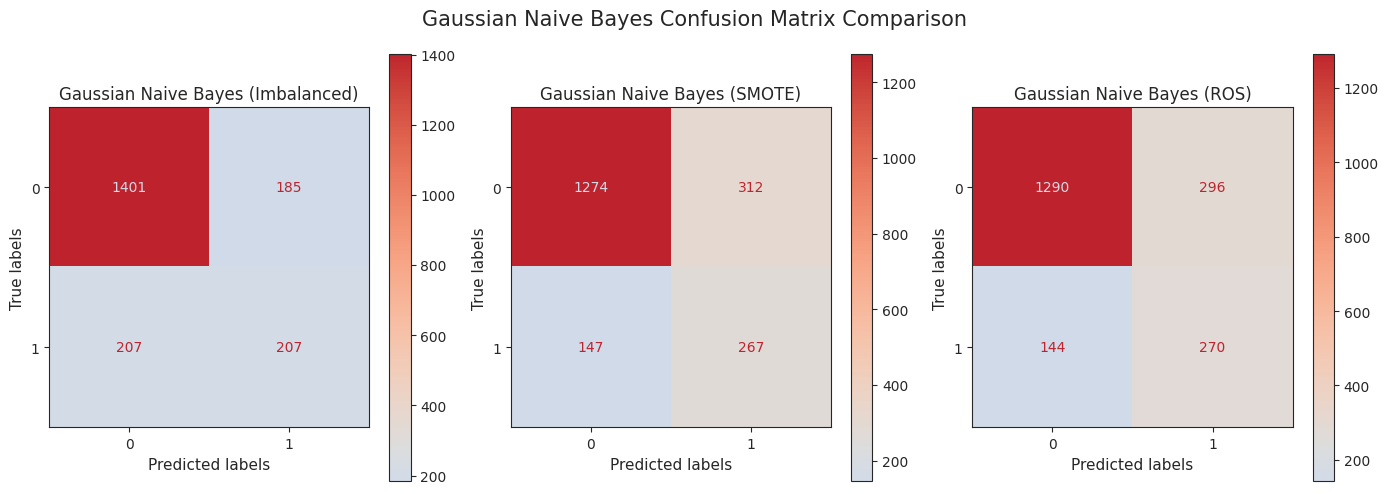

In [776]:
# Also show the confusion matrix as a plot for reproduction

# Create matplotlib figure and define the axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise the spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.46  
stop = 0.97
colors = coolwarm(np.linspace(start, stop, 256)) # Define the start and end of the colour palette for desired results
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix for imbalanced Gaussian Naive Bayes
cm_display_gnb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gnb)
cm_display_gnb.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("Gaussian Naive Bayes (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix for the SMOTE rebalanced Gaussian Naive Bayes
cm_display_gnb_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gnb_smote)
cm_display_gnb_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("Gaussian Naive Bayes (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix for the Random OverSampling Gaussian Naive Bayes
cm_display_gnb_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gnb_ros)
cm_display_gnb_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("Gaussian Naive Bayes (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set the main title
fig.suptitle("Gaussian Naive Bayes Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("gnb_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

Since we are looking to predict as many customers as possible, the SMOTE resampled data will be used as per the cross-validation results.

In [777]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_gnb = accuracy_score(y_val, validation_pred_gnb_smote)
precision_score_gnb = precision_score(y_val, validation_pred_gnb_smote).round(4)
recall_score_gnb = recall_score(y_val, validation_pred_gnb_smote).round(4)
f1_score_gnb = f1_score(y_val, validation_pred_gnb_smote).round(4)
roc_auc_gnb = roc_auc_score(y_val, y_scores_smote).round(4)

print(f"Accuracy Gaussian Naive Bayes (SMOTE): {accuracy_score_gnb}")
print(f"Precision Gaussian Naive Bayes (SMOTE): {precision_score_gnb}")
print(f"Recal Gaussian Naive Bayes (SMOTE): {recall_score_gnb}")
print(f"F1 score Gaussian Naive Bayes (SMOTE): {f1_score_gnb}")
print(f"ROC-AUC Gaussian Naive Bayes (SMOTE): {roc_auc_gnb}")

Accuracy Gaussian Naive Bayes (SMOTE): 0.7705
Precision Gaussian Naive Bayes (SMOTE): 0.4611
Recal Gaussian Naive Bayes (SMOTE): 0.6449
F1 score Gaussian Naive Bayes (SMOTE): 0.5378
ROC-AUC Gaussian Naive Bayes (SMOTE): 0.7871


In [778]:
# Now that GNB SMOTE was chosen as the baseline Gaussian Naibe Bayes model, one may now attempt to do feature selection and see whether reducing
# noise from insignificant attributes drives up performance

# Find the list of features' importance
# Calculate standardized mean differences
std_diff = (model_gnb_smote.theta_[1] - model_gnb_smote.theta_[0]) / np.sqrt((model_gnb_smote.var_[1] + model_gnb_smote.var_[0]) / 2)

# Sort features by their standardized mean differences
sorted_features = np.argsort(np.abs(std_diff))[::-1]

# Display feature importance
for idx in sorted_features:
    print(f"{feature_names[idx]}: Standardized Mean Diff. = {std_diff[idx]}")

# From the results, 'Age', 'Age Group_45-55' and 'Age Group_25-35:' are likely the most significant features
# In contrast, 'CreditScore' and 'Age Group_35-45' seem to be the least significant features and may be dropped in an attempt to increase performance

Age: Standardized Mean Diff. = 0.7691210613483845
Age Group_45-55: Standardized Mean Diff. = 0.687775429242116
Age Group_25-35: Standardized Mean Diff. = -0.5983277999161385
Geography_Germany: Standardized Mean Diff. = 0.3812231664564556
IsActiveMember: Standardized Mean Diff. = -0.37091931689167706
Age Group_55-65: Standardized Mean Diff. = 0.34271197729710584
Balance: Standardized Mean Diff. = 0.2732431479235698
Balance_products_ratio: Standardized Mean Diff. = 0.27020614662615167
Gender_Male: Standardized Mean Diff. = -0.22273960444034357
NumOfProducts: Standardized Mean Diff. = -0.17276027044509543
Age Group_65+: Standardized Mean Diff. = -0.12632282613090043
Geography_Spain: Standardized Mean Diff. = -0.08135704882862353
Age Group_35-45: Standardized Mean Diff. = -0.06762510623056857
CreditScore: Standardized Mean Diff. = -0.04636820141918603


In [779]:
# Confusion Matrix using SMOTE Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_val, validation_pred_gnb_smote)
print("\n Confusion Matrix Gaussian Naive Bayes (SMOTE): \n", cm_gnb)

# Normalise confusion matrix to explore percentages
print("\n Normalised confusion Matrix Gaussian Naive Bayes (SMOTE): \n", confusion_matrix(y_val, validation_pred_gnb_smote, normalize = "all"))


 Confusion Matrix Gaussian Naive Bayes (SMOTE): 
 [[1274  312]
 [ 147  267]]

 Normalised confusion Matrix Gaussian Naive Bayes (SMOTE): 
 [[0.637  0.156 ]
 [0.0735 0.1335]]


In [780]:
# Feature selection and engineering by dropping the two least significant attributes (i.e., 'CreditScore' and 'Age Group_35-45')

# Drop 'Age Group_35-45' and 'CreditScore' columns from training and validation sets
x_train_gnb_dropped = x_train_smote.drop(["Age Group_35-45", "CreditScore"], axis = 1)
x_val_gnb_dropped = x_val_encoded.drop(["Age Group_35-45", "CreditScore"], axis = 1)

# Initialise and train a new Naive Bayes classifier
model_gnb_smote_2 = GaussianNB()
model_gnb_smote_2.fit(x_train_gnb_dropped, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_gnb_smote_2 = model_gnb_smote_2.predict(x_train_gnb_dropped)
train_accuracy_gnb_smote_2 = accuracy_score(y_train_smote, train_pred_gnb_smote_2)
print(f"2nd Gaussian Naive Bayes Training accuracy (SMOTE): {100 * train_accuracy_gnb_smote_2:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_gnb_smote_2 = model_gnb_smote_2.predict(x_val_gnb_dropped)
validation_accuracy_gnb_smote_2 = accuracy_score(y_val, validation_pred_gnb_smote_2)
print(f"2nd Gaussian Naive Bayes Validation accuracy (SMOTE): {100 * validation_accuracy_gnb_smote_2:.2f}%")

2nd Gaussian Naive Bayes Training accuracy (SMOTE): 72.76%
2nd Gaussian Naive Bayes Validation accuracy (SMOTE): 76.35%


In [781]:
# After removing the two least significant variables the validation accuracy has gone down. 
# Hence, one may try and see whether only dropping the least significant variable has a positive impact on performance

# Feature selection and engineering by dropping only the least significant attribute (i.e., 'CreditScore')
# Drop 'CreditScore' column from training and validation sets
x_train_gnb_credit = x_train_smote.drop(["CreditScore"], axis = 1)
x_val_gnb_credit = x_val_encoded.drop(["CreditScore"], axis = 1)

# Initialise and train a Naive Bayes classifier
model_gnb_smote_3 = GaussianNB()
model_gnb_smote_3.fit(x_train_gnb_credit, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_gnb_smote_3 = model_gnb_smote_3.predict(x_train_gnb_credit)
train_accuracy_gnb_smote_3 = accuracy_score(y_train_smote, train_pred_gnb_smote_3)
print(f"3rd Gaussian Naive Bayes Training accuracy (SMOTE): {100 * train_accuracy_gnb_smote_3:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_gnb_smote_3 = model_gnb_smote_3.predict(x_val_gnb_credit)
validation_accuracy_gnb_smote_3 = accuracy_score(y_val, validation_pred_gnb_smote_3)
print(f"3rd Gaussian Naive Bayes Validation accuracy (SMOTE): {100 * validation_accuracy_gnb_smote_3:.2f}%")

3rd Gaussian Naive Bayes Training accuracy (SMOTE): 72.66%
3rd Gaussian Naive Bayes Validation accuracy (SMOTE): 76.95%


In [782]:
# Find Recall using 10-fold cross-validation for 2nd GNB model
CV_scores_gnb_smote_recall_2 = cross_val_score(model_gnb_smote_2,
                                                x_train_gnb_dropped,
                                                y_train_smote,
                                                cv = 10,
                                                scoring = "recall")

# Find Recall using 10-fold cross-validation for 3rd GNB model
CV_scores_gnb_smote_recall_3 = cross_val_score(model_gnb_smote_3,
                                                x_train_gnb_credit,
                                                y_train_smote,
                                                cv = 10,
                                                scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_gnb_smote_recall_2 = CV_scores_gnb_smote_recall_2.mean()
CV_sd_score_gnb_smote_recall_2 = CV_scores_gnb_smote_recall_2.std()
CV_mean_score_gnb_smote_recall_3 = CV_scores_gnb_smote_recall_3.mean()
CV_sd_score_gnb_smote_recall_3 = CV_scores_gnb_smote_recall_3.std()

# Print the results
print(f"2nd Gaussian Naive Bayes 10-fold CV mean recall: {100 * CV_mean_score_gnb_smote_recall_2:.2f}%")
print(f"2nd Gaussian Naive Bayes 10-fold CV recall standard deviation: {100 * CV_sd_score_gnb_smote_recall_2:.2f}%")
print()
print(f"3rd Gaussian Naive Bayes 10-fold CV mean recall: {100 * CV_mean_score_gnb_smote_recall_3:.2f}%")
print(f"3rd Gaussian Naive Bayes 10-fold CV recall standard deviation: {100 * CV_sd_score_gnb_smote_recall_3:.2f}%")

2nd Gaussian Naive Bayes 10-fold CV mean recall: 67.27%
2nd Gaussian Naive Bayes 10-fold CV recall standard deviation: 1.33%

3rd Gaussian Naive Bayes 10-fold CV mean recall: 66.05%
3rd Gaussian Naive Bayes 10-fold CV recall standard deviation: 1.45%


Performance comparison of two feature engineered models with original:

In [783]:
# Get all relevant performance metrics to compare models' predictive performance

# Model 1: GNB with SMOTE resampled data
print(classification_report(y_val, validation_pred_gnb_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_gnb_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc}\n")
print(f"Gaussian Naive Bayes 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_gnb_smote_recall:.2f}%")
print(f"Gaussian Naive Bayes 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_gnb_smote_recall:.2f}%\n")

# Model 2: GNB with SMOTE resampled data and 2 dropped attributes
print(classification_report(y_val, validation_pred_gnb_smote_2))

# Get the probability estimates of the positive class
y_scores_smote = model_gnb_smote_2.predict_proba(x_val_gnb_dropped)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc}\n")
print(f"2nd Gaussian Naive Bayes 10-fold CV mean recall: {100 * CV_mean_score_gnb_smote_recall_2:.2f}%")
print(f"2nd Gaussian Naive Bayes 10-fold CV recall standard deviation: {100 * CV_sd_score_gnb_smote_recall_2:.2f}%\n")

# Model 3: GNB with SMOTE resampled data and only 1 dropped attribute
print(classification_report(y_val, validation_pred_gnb_smote_3))

# Get the probability estimates of the positive class
y_scores_smote = model_gnb_smote_3.predict_proba(x_val_gnb_credit)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc}\n")
print(f"3rd Gaussian Naive Bayes 10-fold CV mean recall: {100 * CV_mean_score_gnb_smote_recall_3:.2f}%")
print(f"3rd Gaussian Naive Bayes 10-fold CV recall standard deviation: {100 * CV_sd_score_gnb_smote_recall_3:.2f}%")

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1586
           1       0.46      0.64      0.54       414

    accuracy                           0.77      2000
   macro avg       0.68      0.72      0.69      2000
weighted avg       0.81      0.77      0.78      2000

ROC AUC score using SMOTE data: 0.787084757327095

Gaussian Naive Bayes 10-fold CV mean recall (SMOTE): 66.11%
Gaussian Naive Bayes 10-fold CV recall standard deviation (SMOTE): 1.49%

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1586
           1       0.45      0.66      0.53       414

    accuracy                           0.76      2000
   macro avg       0.67      0.72      0.69      2000
weighted avg       0.81      0.76      0.78      2000

ROC AUC score using SMOTE data: 0.7860255191866026

2nd Gaussian Naive Bayes 10-fold CV mean recall: 67.27%
2nd Gaussian Naive Bayes 10-fold CV recall standard d

In [784]:
# Secod SMOTE Gaussian Naive Bayes is the best-performing model for predicting customer churn.
accuracy_score_gnb_smote_2 = accuracy_score(y_val, validation_pred_gnb_smote_2).round(4)
precision_score_gnb_smote_2 = precision_score(y_val, validation_pred_gnb_smote_2).round(4)
recall_score_gnb_smote_2 = recall_score(y_val, validation_pred_gnb_smote_2).round(4)
f1_score_gnb_smote_2 = f1_score(y_val, validation_pred_gnb_smote_2).round(4)

print(f"GNB 2 Accuracy score (SMOTE): {accuracy_score_gnb_smote_2}")
print(f"GNB 2 Precision score (SMOTE): {precision_score_gnb_smote_2}")
print(f"GNB 2 Recall score (SMOTE): {recall_score_gnb_smote_2}")
print(f"GNB 2 F1 score (SMOTE): {f1_score_gnb_smote_2}")

GNB 2 Accuracy score (SMOTE): 0.7635
GNB 2 Precision score (SMOTE): 0.4511
GNB 2 Recall score (SMOTE): 0.657
GNB 2 F1 score (SMOTE): 0.5349


Saving figure smote_gnb_performance_metrics


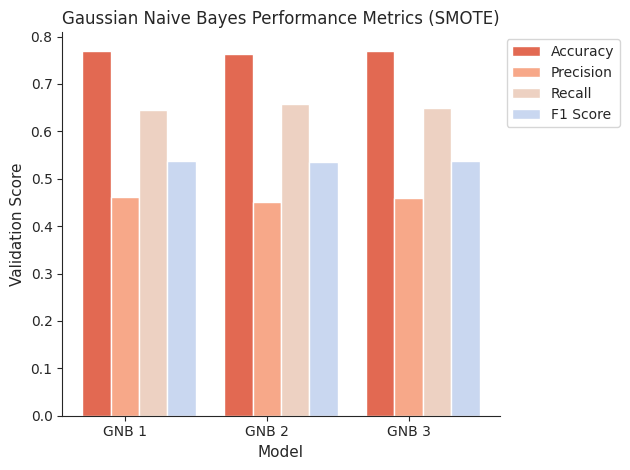

In [785]:
# Compare the two new models with the selected SMOTE Gaussian Naive Bayes one

# Save variables for SMOTE Gaussian Naive Bayes
accuracy_score_gnb_smote = accuracy_score(y_val, validation_pred_gnb_smote).round(4)
precision_score_gnb_smote = precision_score(y_val, validation_pred_gnb_smote).round(4)
recall_score_gnb_smote = recall_score(y_val, validation_pred_gnb_smote).round(4)
f1_score_gnb_smote = f1_score(y_val, validation_pred_gnb_smote).round(4)

# Save variables for SMOTE Gaussian Naive Bayes after dropping 2 variables
accuracy_score_gnb_smote_2 = accuracy_score(y_val, validation_pred_gnb_smote_2).round(4)
precision_score_gnb_smote_2 = precision_score(y_val, validation_pred_gnb_smote_2).round(4)
recall_score_gnb_smote_2 = recall_score(y_val, validation_pred_gnb_smote_2).round(4)
f1_score_gnb_smote_2 = f1_score(y_val, validation_pred_gnb_smote_2).round(4)

# Save variables for SMOTE Gaussian Naive Bayes after only dropping 1 variable
accuracy_score_gnb_smote_3 = accuracy_score(y_val, validation_pred_gnb_smote_3).round(4)
precision_score_gnb_smote_3 = precision_score(y_val, validation_pred_gnb_smote_3).round(4)
recall_score_gnb_smote_3 = recall_score(y_val, validation_pred_gnb_smote_3).round(4)
f1_score_gnb_smote_3 = f1_score(y_val, validation_pred_gnb_smote_3).round(4)

# Visualise key metrics for Gaussian Naive Bayes models
accuracy_scores = [accuracy_score_gnb_smote,
                   accuracy_score_gnb_smote_2,
                   accuracy_score_gnb_smote_3]
precision_scores = [precision_score_gnb_smote,
                    precision_score_gnb_smote_2,
                    precision_score_gnb_smote_3]
recall_scores = [recall_score_gnb_smote,
                 recall_score_gnb_smote_2,
                 recall_score_gnb_smote_3]
f1_scores = [f1_score_gnb_smote,
             f1_score_gnb_smote_2,
             f1_score_gnb_smote_3]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Gaussian Naive Bayes Performance Metrics (SMOTE)", fontsize = 12)
plt.xticks(index + bar_width, ["GNB 1", "GNB 2", "GNB 3"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("smote_gnb_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()

## 4.2 Logistic Regression


In [786]:
# Train a logistic regression on the original imbalanced data

# Initialise and train a Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(x_train_encoded, y_train)

# Make predictions on the training set and calculate accuracy
train_pred_lr = model_lr.predict(x_train_encoded)
train_accuracy_lr = accuracy_score(y_train, train_pred_lr)
print(f"Logistic Regression Training accuracy: {100 * train_accuracy_lr:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr = model_lr.predict(x_val_encoded)
validation_accuracy_lr = accuracy_score(y_val, validation_pred_lr)
print(f"Logistic Regression Validation accuracy: {100 * validation_accuracy_lr:.2f}%")

Logistic Regression Training accuracy: 83.47%
Logistic Regression Validation accuracy: 82.45%


In [787]:
# Train a logistic regression model with the SMOTE balanced data

# Initialise and train the Logistic Regression model
model_lr_smote = LogisticRegression()
model_lr_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_lr_smote = model_lr_smote.predict(x_train_smote)
train_accuracy_lr_smote = accuracy_score(y_train_smote, train_pred_lr_smote)
print(f"Logistic Regression Training accuracy: {100 * train_accuracy_lr_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr_smote = model_lr_smote.predict(x_val_encoded)
validation_accuracy_lr_smote = accuracy_score(y_val, validation_pred_lr_smote)
print(f"Logistic Regression Validation accuracy: {100 * validation_accuracy_lr_smote:.2f}%")

Logistic Regression Training accuracy: 72.22%
Logistic Regression Validation accuracy: 74.45%


In [788]:
# Train a logistic regression model with Random Oversampling data

# Initialise and train the Logistic Regression model
model_lr_ros = LogisticRegression()
model_lr_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_lr_ros = model_lr_ros.predict(x_train_ros)
train_accuracy_lr_ros = accuracy_score(y_train_ros, train_pred_lr_ros)
print(f"Logistic Regression Training accuracy: {100 * train_accuracy_lr_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr_ros = model_lr_ros.predict(x_val_encoded)
validation_accuracy_lr_ros = accuracy_score(y_val, validation_pred_lr_ros)
print(f"Logistic Regression Validation accuracy: {100 * validation_accuracy_lr_ros:.2f}%")

Logistic Regression Training accuracy: 71.99%
Logistic Regression Validation accuracy: 74.85%


10-fold Cross-Validation:

In [789]:
# Perform 10-fold cross-validation with the imbalanced Logistic Regression model
CV_scores_lr = cross_val_score(model_lr,
                                x_train_encoded,
                                y_train,
                                cv = 10,
                                scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_lr_f1 = cross_val_score(model_lr,
                                  x_train_encoded,
                                  y_train,
                                  cv = 10, 
                                  scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_lr_recall = cross_val_score(model_lr,
                                    x_train_encoded,
                                    y_train,
                                    cv = 10, 
                                    scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_lr = CV_scores_lr.mean()
CV_sd_score_lr = CV_scores_lr.std()
CV_mean_score_lr_f1 = CV_scores_lr_f1.mean()
CV_sd_score_lr_f1 = CV_scores_lr_f1.std()
CV_mean_score_lr_recall = CV_scores_lr_recall.mean()
CV_sd_score_lr_recall = CV_scores_lr_recall.std()

# Print the results
print(f"Logistic Regression 10-fold CV mean accuracy: {100 * CV_mean_score_lr:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation: {100 * CV_sd_score_lr:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1: {100 * CV_mean_score_lr_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation: {100 * CV_sd_score_lr_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall: {100 * CV_mean_score_lr_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation: {100 * CV_sd_score_lr_recall:.2f}%")

Logistic Regression 10-fold CV mean accuracy: 83.32%
Logistic Regression 10-fold CV standard deviation: 0.93%
Logistic Regression 10-fold CV mean f1: 44.83%
Logistic Regression 10-fold CV f1 standard deviation: 3.68%
Logistic Regression 10-fold CV mean recall: 33.14%
Logistic Regression 10-fold CV recall standard deviation: 3.58%


In [790]:
# Perform 10-fold cross-validation with SMOTE Logistic Regression model
CV_scores_lr_smote = cross_val_score(model_lr_smote,
                                    x_train_smote,
                                    y_train_smote,
                                    cv = 10,
                                    scoring = "accuracy")

# Find f1 score using 10-fold cross-validation
CV_scores_lr_smote_f1 = cross_val_score(model_lr_smote,
                                        x_train_smote,
                                        y_train_smote,
                                        cv = 10,
                                        scoring = "f1")

# Find recall using 10-fold cross-validation
CV_scores_lr_smote_recall = cross_val_score(model_lr_smote,
                                            x_train_smote,
                                            y_train_smote,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_lr_smote = CV_scores_lr_smote.mean()
CV_sd_score_lr_smote = CV_scores_lr_smote.std()
CV_mean_score_lr_smote_f1 = CV_scores_lr_smote_f1.mean()
CV_sd_score_lr_smote_f1 = CV_scores_lr_smote_f1.std()
CV_mean_score_lr_smote_recall = CV_scores_lr_smote_recall.mean()
CV_sd_score_lr_smote_recall = CV_scores_lr_smote_recall.std()

# Print the results
print(f"Logistic Regression 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_lr_smote:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_lr_smote:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_lr_smote_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_lr_smote_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_lr_smote_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_lr_smote_recall:.2f}%")

Logistic Regression 10-fold CV mean accuracy (SMOTE): 72.20%
Logistic Regression 10-fold CV standard deviation (SMOTE): 1.15%
Logistic Regression 10-fold CV mean f1 (SMOTE): 71.56%
Logistic Regression 10-fold CV f1 standard deviation (SMOTE): 1.05%
Logistic Regression 10-fold CV mean recall (SMOTE): 69.95%
Logistic Regression 10-fold CV recall standard deviation (SMOTE): 1.74%


In [791]:
# Perform 10-fold cross-validation with Random OverSampling Logistic Regression model
CV_scores_lr_ros = cross_val_score(model_lr_ros,
                                    x_train_ros,
                                    y_train_ros,
                                    cv = 10,
                                    scoring = "accuracy")

# Find f1 score using 10-fold cross-validation
CV_scores_lr_ros_f1 = cross_val_score(model_lr_ros,
                                      x_train_ros,
                                      y_train_ros,
                                      cv = 10,
                                      scoring = "f1")

# Find Recall using 10-fold cross-validation
CV_scores_lr_ros_recall = cross_val_score(model_lr_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_lr_ros = CV_scores_lr_ros.mean()
CV_sd_score_lr_ros = CV_scores_lr_ros.std()
CV_mean_score_lr_ros_f1 = CV_scores_lr_ros_f1.mean()
CV_sd_score_lr_ros_f1 = CV_scores_lr_ros_f1.std()
CV_mean_score_lr_ros_recall = CV_scores_lr_ros_recall.mean()
CV_sd_score_lr_ros_recall = CV_scores_lr_ros_recall.std()

# Print the results
print(f"Logistic Regression 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_lr_ros:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation (ROS): {100 * CV_sd_score_lr_ros:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1 (ROS): {100 * CV_mean_score_lr_ros_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_lr_ros_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall (ROS): {100 * CV_mean_score_lr_ros_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_lr_ros_recall:.2f}%")

Logistic Regression 10-fold CV mean accuracy (ROS): 71.92%
Logistic Regression 10-fold CV standard deviation (ROS): 0.98%
Logistic Regression 10-fold CV mean f1 (ROS): 71.37%
Logistic Regression 10-fold CV f1 standard deviation (ROS): 0.73%
Logistic Regression 10-fold CV mean recall (ROS): 69.99%
Logistic Regression 10-fold CV recall standard deviation (ROS): 1.31%


In [792]:
# Get all relevant performance metrics to compare models

# Model 1: Logistic Regression with imbalanced data
print(classification_report(y_val, validation_pred_lr))

# Get the probability estimates of the positive class
y_scores = model_lr.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score and print results
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using imbalanced data (logistic regression): {roc_auc}\n")
print(f"Logistic Regression 10-fold CV mean accuracy: {100 * CV_mean_score_lr:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation: {100 * CV_sd_score_lr:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1: {100 * CV_mean_score_lr_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation: {100 * CV_sd_score_lr_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall: {100 * CV_mean_score_lr_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation: {100 * CV_sd_score_lr_recall:.2f}%")
print()

# Model 2: Logistic Regression with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_lr_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_lr_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score and print results
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data (logistic regression): {roc_auc}\n")
print(f"Logistic Regression 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_lr_smote:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_lr_smote:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_lr_smote_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_lr_smote_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_lr_smote_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_lr_smote_recall:.2f}%")
print()

# Model 3: Logistic Regression with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_lr_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_lr_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score and print results
roc_auc = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data (logistic regression): {roc_auc}\n")
print(f"Logistic Regression 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_lr_ros:.2f}%")
print(f"Logistic Regression 10-fold CV standard deviation (ROS): {100 * CV_sd_score_lr_ros:.2f}%")
print(f"Logistic Regression 10-fold CV mean f1 (ROS): {100 * CV_mean_score_lr_ros_f1:.2f}%")
print(f"Logistic Regression 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_lr_ros_f1:.2f}%")
print(f"Logistic Regression 10-fold CV mean recall (ROS): {100 * CV_mean_score_lr_ros_recall:.2f}%")
print(f"Logistic Regression 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_lr_ros_recall:.2f}%")

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1586
           1       0.67      0.29      0.41       414

    accuracy                           0.82      2000
   macro avg       0.76      0.63      0.65      2000
weighted avg       0.81      0.82      0.80      2000

ROC AUC score using imbalanced data (logistic regression): 0.803207108089503

Logistic Regression 10-fold CV mean accuracy: 83.32%
Logistic Regression 10-fold CV standard deviation: 0.93%
Logistic Regression 10-fold CV mean f1: 44.83%
Logistic Regression 10-fold CV f1 standard deviation: 3.68%
Logistic Regression 10-fold CV mean recall: 33.14%
Logistic Regression 10-fold CV recall standard deviation: 3.58%

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1586
           1       0.43      0.69      0.53       414

    accuracy                           0.74      2000
   macro avg       0.67      0.72      0.68 

Saving figure lr_roc_curve


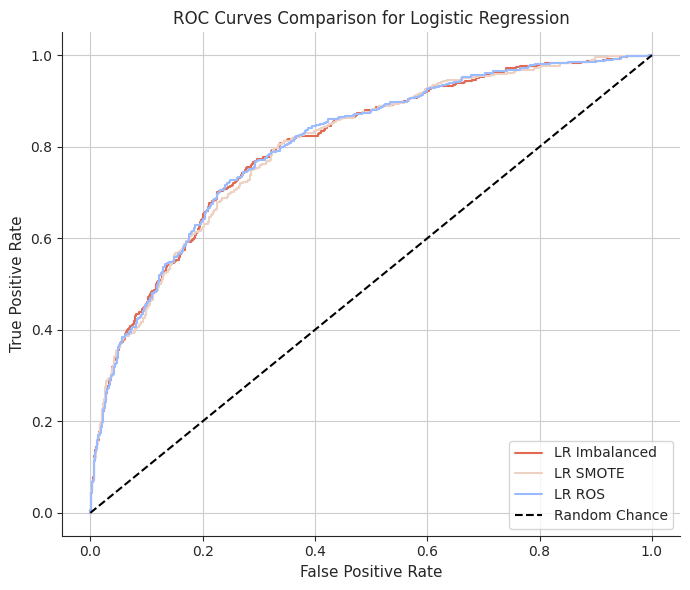

In [793]:
# Plot the ROC curve to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_scores)
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_lr_ros, tpr_lr_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_lr, 
         tpr_lr, 
         label ="LR Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_lr_smote, 
         tpr_lr_smote, 
         label = "LR SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_lr_ros, 
         tpr_lr_ros, 
         label = "LR ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Logistic Regression", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("lr_roc_curve")

# Show the plot
plt.show()

In [794]:
# Check the accuracy, precision, recall, and f1 score for best performing model
# ROS Logistic Regression model
accuracy_score_lr_ros = accuracy_score(y_val, validation_pred_lr_ros)
precision_score_lr_ros = precision_score(y_val, validation_pred_lr_ros).round(4)
recall_score_lr_ros = recall_score(y_val, validation_pred_lr_ros).round(4)
f1_score_lr_ros = f1_score(y_val, validation_pred_lr_ros).round(4)
roc_auc_lr_ros = roc_auc_score(y_val, y_scores_ros).round(4)

print(f"Accuracy Logistic Regression (ROS): {accuracy_score_lr_ros}")
print(f"Precision Logistic Regression (ROS): {precision_score_lr_ros}")
print(f"Recal Logistic Regression (ROS):{recall_score_lr_ros}")
print(f"F1 score Logistic Regression (ROS): {f1_score_lr_ros}")
print(f"ROC-AUC Logistic Regression (ROS): {roc_auc_lr_ros}")

Accuracy Logistic Regression (ROS): 0.7485
Precision Logistic Regression (ROS): 0.4348
Recal Logistic Regression (ROS):0.7174
F1 score Logistic Regression (ROS): 0.5415
ROC-AUC Logistic Regression (ROS): 0.804


Saving figure lr_performance_class_imbalance


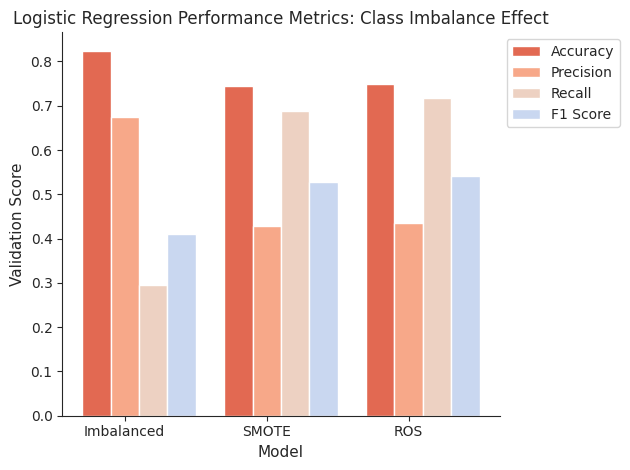

In [795]:
# Save variables for accuracy, precision, recall, and f1 score (LR with original imbalanced set)
accuracy_score_lr = accuracy_score(y_val, validation_pred_lr).round(4)
precision_score_lr = precision_score(y_val, validation_pred_lr).round(4)
recall_score_lr = recall_score(y_val, validation_pred_lr).round(4)
f1_score_lr = f1_score(y_val, validation_pred_lr).round(4)

# Save variables for accuracy, precision, recall, and f1 score (LR with SMOTE dataset)
accuracy_score_lr_smote = accuracy_score(y_val, validation_pred_lr_smote).round(4)
precision_score_lr_smote = precision_score(y_val, validation_pred_lr_smote).round(4)
recall_score_lr_smote = recall_score(y_val, validation_pred_lr_smote).round(4)
f1_score_lr_smote = f1_score(y_val, validation_pred_lr_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score (LR with ROS dataset)
accuracy_score_lr_ros = accuracy_score(y_val, validation_pred_lr_ros).round(4)
precision_score_lr_ros = precision_score(y_val, validation_pred_lr_ros).round(4)
recall_score_lr_ros = recall_score(y_val, validation_pred_lr_ros).round(4)
f1_score_lr_ros = f1_score(y_val, validation_pred_lr_ros).round(4)

# Visualise key metrics for Logistic Regression models
accuracy_scores = [accuracy_score_lr,
                   accuracy_score_lr_smote,
                   accuracy_score_lr_ros]
precision_scores = [precision_score_lr,
                    precision_score_lr_smote,
                    precision_score_lr_ros]
recall_scores = [recall_score_lr,
                 recall_score_lr_smote,
                 recall_score_lr_ros]
f1_scores = [f1_score_lr,
             f1_score_lr_smote,
             f1_score_lr_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Logistic Regression Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("lr_performance_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

In [796]:
# Check confusion matrix for model comparison

# Model 1: Original imbalanced Logistic Regression model
cm_lr = confusion_matrix(y_val, validation_pred_lr)
print("\n Validation Confusion Matrix Logistic Regression (imbalanced): \n", cm_lr)
# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Logistic Regression (imbalanced): \n", confusion_matrix(y_val, validation_pred_lr, normalize = "all"))

# Model 2: SMOTE resampled Logistic Regression model
cm_lr_smote = confusion_matrix(y_val, validation_pred_lr_smote)
print("\n Validation Confusion Matrix Logistic Regression (SMOTE): \n", cm_lr_smote)
# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Logistic Regression (SMOTE): \n", confusion_matrix(y_val, validation_pred_lr_smote, normalize = "all"))

# Model 3: RandomOverSampled Logistic Regression model
cm_lr_ros = confusion_matrix(y_val, validation_pred_lr_ros)
print("\n Validation Confusion Matrix Logistic Regression (ROS): \n", cm_lr_ros)
# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Logistic Regression (ROS): \n", confusion_matrix(y_val, validation_pred_lr_ros, normalize = "all"))


 Validation Confusion Matrix Logistic Regression (imbalanced): 
 [[1527   59]
 [ 292  122]]

 Normalised validation confusion Matrix Logistic Regression (imbalanced): 
 [[0.7635 0.0295]
 [0.146  0.061 ]]

 Validation Confusion Matrix Logistic Regression (SMOTE): 
 [[1204  382]
 [ 129  285]]

 Normalised validation confusion Matrix Logistic Regression (SMOTE): 
 [[0.602  0.191 ]
 [0.0645 0.1425]]

 Validation Confusion Matrix Logistic Regression (ROS): 
 [[1200  386]
 [ 117  297]]

 Normalised validation confusion Matrix Logistic Regression (ROS): 
 [[0.6    0.193 ]
 [0.0585 0.1485]]


Saving figure lr_confusion_matrix


/tmp/ipykernel_72/1145086340.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


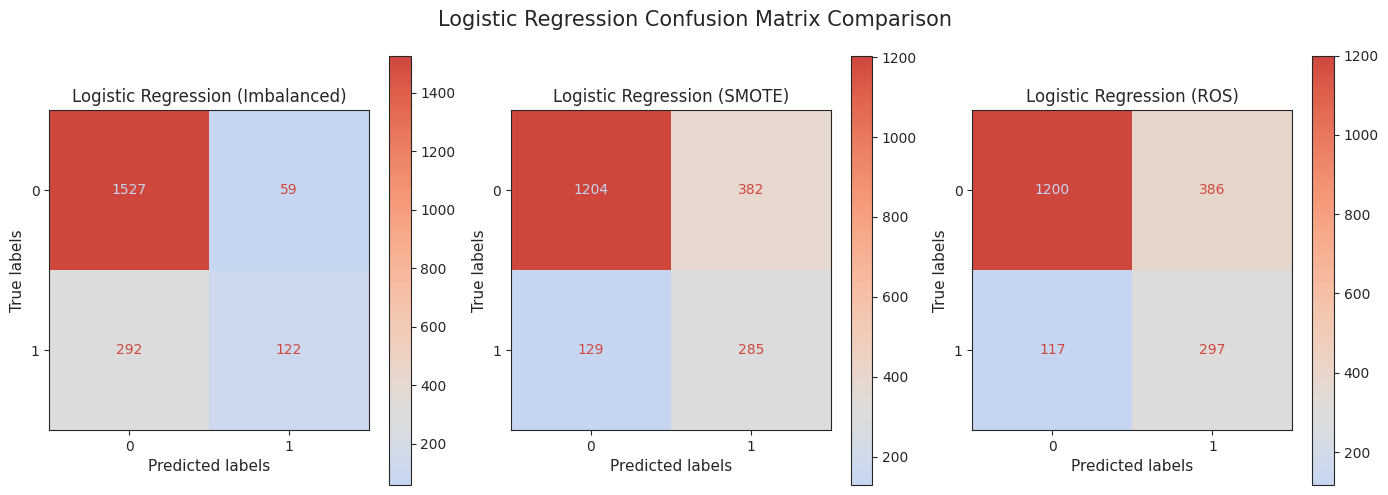

In [797]:
# Also show the confusion matrix in a plot for reproducibility 

# Create figure and define axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise the spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.42 
stop = 0.92
colors = coolwarm(np.linspace(start, stop, 256)) # Define a start and end for the colour palette to transmit desired results
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix for the Logistic Regression imbalanced model
cm_display_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr)
cm_display_lr.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("Logistic Regression (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix for the SMOTE Logistic Regression
cm_display_lr_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr_smote)
cm_display_lr_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("Logistic Regression (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix for the Random OverSampling Logistic Regression
cm_display_lr_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr_ros)
cm_display_lr_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("Logistic Regression (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set main title
fig.suptitle("Logistic Regression Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("lr_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

For optimal results, from now on, everything is using the ROS resampled data:

In [798]:
# Find the importance of features for possible feature selection steps

# After fitting a Logistic Regression model
feature_importances_lr = abs(model_lr_ros.coef_[0])

# Sort and print feature importance
print("Most significant variables for ROS Logistic Regression:")
sorted_idx_lr = np.argsort(feature_importances_lr)[::-1]
for index in sorted_idx_lr:
    print(f"{x_train_ros.columns[index]}: {feature_importances_lr[index]:.4f}")

Most significant variables for ROS Logistic Regression:
Age: 3.7873
Age Group_65+: 2.1073
Age Group_45-55: 0.9783
IsActiveMember: 0.8179
Geography_Germany: 0.7407
Balance: 0.6010
Gender_Male: 0.5053
Age Group_25-35: 0.4573
Age Group_55-65: 0.3351
CreditScore: 0.2300
NumOfProducts: 0.2036
Geography_Spain: 0.1774
Balance_products_ratio: 0.0266
Age Group_35-45: 0.0085


Age has the highest coefficient, and so is the strongest predictor; in contrast, 'Age Group_35-45' has the smallest positive association with the target variable, and may be removed during feature selection and engineering.

Feature selection and engineering: dropping 'Age Group_35-45':

In [799]:
# Feature selection and engineering (dropping 'Age Group_35-45' due to having the smallest positive association with the target variable)

# Drop 'Age Group_35-45' column from trainig and validation sets
x_train_ros_35_45 = x_train_ros.drop(["Age Group_35-45"], axis = 1)
x_val_ros_35_45 = x_val_encoded.drop(["Age Group_35-45"], axis = 1)

# Initialise and train a Logistic Regression model
model_lr_2 = LogisticRegression()
model_lr_2.fit(x_train_ros_35_45, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_lr_2 = model_lr_2.predict(x_train_ros_35_45)
train_accuracy_lr_2 = accuracy_score(y_train_ros, train_pred_lr_2)
print(f"2nd Logistic Regression Training accuracy (ROS): {100 * train_accuracy_lr_2:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr_2 = model_lr_2.predict(x_val_ros_35_45)
validation_accuracy_lr_2 = accuracy_score(y_val, validation_pred_lr_2)
print(f"2nd Logistic Regression Validation accuracy (ROS): {100 * validation_accuracy_lr_2:.2f}%")

2nd Logistic Regression Training accuracy (ROS): 71.99%
2nd Logistic Regression Validation accuracy (ROS): 74.85%


In [800]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_lr_2))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1586
           1       0.43      0.72      0.54       414

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.75      0.77      2000



In [801]:
# Since MSE and MAE are not useful metrics for binary classifications
# Check the accuracy, precision, recall, and f1 score
accuracy_score_lr_2 = accuracy_score(y_val, validation_pred_lr_2).round(4)
precision_score_lr_2 = precision_score(y_val, validation_pred_lr_2).round(4)
recall_score_lr_2 = recall_score(y_val, validation_pred_lr_2).round(4)
f1_score_lr_2 = f1_score(y_val, validation_pred_lr_2).round(4)

print(f"Accuracy 2nd Logistic Regression (ROS): {accuracy_score_lr_2}")
print(f"Precision 2nd Logistic Regression (ROS): {precision_score_lr_2}")
print(f"Recal 2nd Logistic Regression (ROS): {recall_score_lr_2}")
print(f"F1 score 2nd Logistic Regression (ROS): {f1_score_lr_2}")
# Interestingly, dropping the attribute made no changes in a single evaluation

Accuracy 2nd Logistic Regression (ROS): 0.7485
Precision 2nd Logistic Regression (ROS): 0.4348
Recal 2nd Logistic Regression (ROS): 0.7174
F1 score 2nd Logistic Regression (ROS): 0.5415


In [802]:
# Perform 10-fold cross-validation with 2nd Logistic Regression model (ROS)
CV_scores_lr_2 = cross_val_score(model_lr_2,
                                x_train_ros_35_45,
                                y_train_ros,
                                cv = 10,
                                scoring = "recall")

# Get the mean Recall and sd of the 10-fold cross-validation
CV_mean_score_lr_2 = CV_scores_lr_2.mean()
CV_sd_score_lr_2 = CV_scores_lr_2.std()

# Print the results
print(f"2nd Logistic Regression 10-fold CV mean recall: {100 * CV_mean_score_lr_2:.2f}%")
print(f"2nd Logistic Regression 10-fold CV recall standard deviation: {100 * CV_sd_score_lr_2:.2f}%")
# While no changes were seen in the single evaluation, one may see Recall is slightly smaller following a 10-fold cross-validation

2nd Logistic Regression 10-fold CV mean recall: 69.93%
2nd Logistic Regression 10-fold CV recall standard deviation: 1.37%


In [803]:
# Confusion Matrix using Feature-engineered Logistic Regression
cm_lr_2 = confusion_matrix(y_val, validation_pred_lr_2)
print("\n Confusion Matrix 2nd Logistic Regression (ROS): \n", cm_lr_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 2nd Logistic Regression (ROS): \n", confusion_matrix(y_val, validation_pred_lr_2, normalize = "all"))


 Confusion Matrix 2nd Logistic Regression (ROS): 
 [[1200  386]
 [ 117  297]]

 Normalised confusion Matrix 2nd Logistic Regression (ROS): 
 [[0.6    0.193 ]
 [0.0585 0.1485]]


In [804]:
# Check the new feature importance after removing features
feature_importances_lr_2 = abs(model_lr_2.coef_[0])

# Sort and print feature importance
print("Most significant variables for 2nd Logistic Regression (ROS):")
sorted_idx_lr_2 = np.argsort(feature_importances_lr_2)[::-1]
for index in sorted_idx_lr_2:
    print(f"{x_train_ros_35_45.columns[index]}: {feature_importances_lr_2[index]:.4f}")

Most significant variables for 2nd Logistic Regression (ROS):
Age: 3.8021
Age Group_65+: 2.1215
Age Group_45-55: 0.9682
IsActiveMember: 0.8181
Geography_Germany: 0.7406
Balance: 0.6008
Gender_Male: 0.5053
Age Group_25-35: 0.4635
Age Group_55-65: 0.3226
CreditScore: 0.2299
NumOfProducts: 0.2032
Geography_Spain: 0.1774
Balance_products_ratio: 0.0270


Feature selection and engineering attempt 2:

In [805]:
# Try to perform a second round of feature selection and engineering (dropping 'Balance_products_ratio' despite being over 0.02)

# Drop 'Balance_products_ratio' column from training and validation sets
x_train_ros_ratio = x_train_ros_35_45.drop(["Balance_products_ratio"], axis = 1)
x_val_ros_ratio = x_val_ros_35_45.drop(["Balance_products_ratio"], axis = 1)

# Initialise and train a 3rd ROS Logistic Regression model
model_lr_3 = LogisticRegression()
model_lr_3.fit(x_train_ros_ratio, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_lr_3 = model_lr_3.predict(x_train_ros_ratio)
train_accuracy_lr_3 = accuracy_score(y_train_ros, train_pred_lr_3)
print(f"3rd Logistic Regression Training accuracy (ROS): {100 * train_accuracy_lr_3:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr_3 = model_lr_3.predict(x_val_ros_ratio)
validation_accuracy_lr_3 = accuracy_score(y_val, validation_pred_lr_3)
print(f"3rd Logistic Regression Validation accuracy (ROS): {100 * validation_accuracy_lr_3:.2f}%")

3rd Logistic Regression Training accuracy (ROS): 72.01%
3rd Logistic Regression Validation accuracy (ROS): 74.95%


In [806]:
# Since MSE and MAE are not useful metrics for binary classifications
# Check the accuracy, precision, recall, and f1 score
accuracy_score_lr_3 = accuracy_score(y_val, validation_pred_lr_3).round(4)
precision_score_lr_3 = precision_score(y_val, validation_pred_lr_3).round(4)
recall_score_lr_3 = recall_score(y_val, validation_pred_lr_3).round(4)
f1_score_lr_3 = f1_score(y_val, validation_pred_lr_3).round(4)

print(f"Accuracy 3rd Logistic Regression (ROS): {accuracy_score_lr_3}")
print(f"Precision 3rd Logistic Regression (ROS): {precision_score_lr_3}")
print(f"Recal 3rd Logistic Regression (ROS): {recall_score_lr_3}")
print(f"F1 score 3rd Logistic Regression (ROS): {f1_score_lr_3}")

Accuracy 3rd Logistic Regression (ROS): 0.7495
Precision 3rd Logistic Regression (ROS): 0.4363
Recal 3rd Logistic Regression (ROS): 0.7198
F1 score 3rd Logistic Regression (ROS): 0.5433


In [807]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_lr_3))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1586
           1       0.44      0.72      0.54       414

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.69      2000
weighted avg       0.81      0.75      0.77      2000



In [808]:
# Confusion Matrix using Feature-engineered Logistic Regression
cm_lr_3 = confusion_matrix(y_val, validation_pred_lr_3)
print("\n Confusion Matrix 3rd Logistic Regression (ROS): \n", cm_lr_3)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 3rd Logistic Regression (ROS): \n", confusion_matrix(y_val, validation_pred_lr_3, normalize = "all"))


 Confusion Matrix 3rd Logistic Regression (ROS): 
 [[1201  385]
 [ 116  298]]

 Normalised confusion Matrix 3rd Logistic Regression (ROS): 
 [[0.6005 0.1925]
 [0.058  0.149 ]]


In [809]:
# Check again the feature importance to observe changes after removing features
feature_importances_lr_3 = abs(model_lr_3.coef_[0])

# Sort and print feature importance
print("Most significant variables for 3rd Logistic Regression:")
sorted_idx_lr_3 = np.argsort(feature_importances_lr_3)[::-1]
for index in sorted_idx_lr_3:
    print(f"{x_train_ros_ratio.columns[index]}: {feature_importances_lr_3[index]:.4f}")

Most significant variables for 3rd Logistic Regression:
Age: 3.8023
Age Group_65+: 2.1212
Age Group_45-55: 0.9682
IsActiveMember: 0.8181
Geography_Germany: 0.7404
Balance: 0.6211
Gender_Male: 0.5055
Age Group_25-35: 0.4635
Age Group_55-65: 0.3227
CreditScore: 0.2300
NumOfProducts: 0.2138
Geography_Spain: 0.1775


In [810]:
# 3rd attempt at feature selection and engineering (dropping 'Geography_Spain' since <0.02)

# Drop 'Geography_Spain' column from training and validation sets
x_train_ros_spain = x_train_ros_ratio.drop(["Geography_Spain"], axis = 1)
x_val_ros_spain = x_val_ros_ratio.drop(["Geography_Spain"], axis = 1)

# Initialise and train the 4th Logistic Regression model
model_lr_4 = LogisticRegression()
model_lr_4.fit(x_train_ros_spain, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_lr_4 = model_lr_4.predict(x_train_ros_spain)
train_accuracy_lr_4 = accuracy_score(y_train_ros, train_pred_lr_4)
print(f"4th Logistic Regression Training accuracy (ROS): {100 * train_accuracy_lr_4:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_lr_4 = model_lr_4.predict(x_val_ros_spain)
validation_accuracy_lr_4 = accuracy_score(y_val, validation_pred_lr_4)
print(f"4th Logistic Regression Validation accuracy (ROS): {100 * validation_accuracy_lr_4:.2f}%")

4th Logistic Regression Training accuracy (ROS): 72.21%
4th Logistic Regression Validation accuracy (ROS): 74.90%


In [811]:
# Since MSE and MAE are not useful metrics for binary classifications
# Check the accuracy, precision, recall, and f1 score
accuracy_score_lr_4 = accuracy_score(y_val, validation_pred_lr_4).round(4)
precision_score_lr_4 = precision_score(y_val, validation_pred_lr_4).round(4)
recall_score_lr_4 = recall_score(y_val, validation_pred_lr_4).round(4)
f1_score_lr_4 = f1_score(y_val, validation_pred_lr_4).round(4)

print(f"Accuracy 4th Logistic Regression (ROS): {accuracy_score_lr_4}")
print(f"Precision 4th Logistic Regression (ROS): {precision_score_lr_4}")
print(f"Recal 4th Logistic Regression (ROS): {recall_score_lr_4}")
print(f"F1 score 4th Logistic Regression (ROS): {f1_score_lr_4}")

Accuracy 4th Logistic Regression (ROS): 0.749
Precision 4th Logistic Regression (ROS): 0.4351
Recal 4th Logistic Regression (ROS): 0.7126
F1 score 4th Logistic Regression (ROS): 0.5403


In [812]:
# Get the confusion matrix
cm_lr_4 = confusion_matrix(y_val, validation_pred_lr_4)
print("\n Confusion Matrix 4th Logistic Regression (ROS): \n", cm_lr_4)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 4th Logistic Regression (ROS): \n", confusion_matrix(y_val, validation_pred_lr_4, normalize = "all"))


 Confusion Matrix 4th Logistic Regression (ROS): 
 [[1203  383]
 [ 119  295]]

 Normalised confusion Matrix 4th Logistic Regression (ROS): 
 [[0.6015 0.1915]
 [0.0595 0.1475]]


In [813]:
# Observe key Logistic Regression metrics side-by-side
print(f"Accuracy Logistic Regression (ROS): {accuracy_score_lr_ros}")
print(f"Precision Logistic Regression (ROS): {precision_score_lr_ros}")
print(f"Recal Logistic Regression (ROS): {recall_score_lr_ros}")
print(f"F1 score Logistic Regression (ROS): {f1_score_lr_ros}")
print()

print(f"Accuracy 2nd Logistic Regression (ROS): {accuracy_score_lr_2}")
print(f"Precision 2nd Logistic Regression (ROS): {precision_score_lr_2}")
print(f"Recal 2nd Logistic Regression (ROS): {recall_score_lr_2}")
print(f"F1 score 2nd Logistic Regression (ROS): {f1_score_lr_2}")
print()

print(f"Accuracy 3rd Logistic Regression (ROS): {accuracy_score_lr_3}")
print(f"Precision 3rd Logistic Regression (ROS): {precision_score_lr_3}")
print(f"Recal 3rd Logistic Regression (ROS): {recall_score_lr_3}")
print(f"F1 score 3rd Logistic Regression (ROS): {f1_score_lr_3}")
print()

print(f"Accuracy 4th Logistic Regression (ROS): {accuracy_score_lr_4}")
print(f"Precision 4th Logistic Regression (ROS): {precision_score_lr_4}")
print(f"Recal 4th Logistic Regression (ROS): {recall_score_lr_4}")
print(f"F1 score 4th Logistic Regression (ROS): {f1_score_lr_4}")
print()

Accuracy Logistic Regression (ROS): 0.7485
Precision Logistic Regression (ROS): 0.4348
Recal Logistic Regression (ROS): 0.7174
F1 score Logistic Regression (ROS): 0.5415

Accuracy 2nd Logistic Regression (ROS): 0.7485
Precision 2nd Logistic Regression (ROS): 0.4348
Recal 2nd Logistic Regression (ROS): 0.7174
F1 score 2nd Logistic Regression (ROS): 0.5415

Accuracy 3rd Logistic Regression (ROS): 0.7495
Precision 3rd Logistic Regression (ROS): 0.4363
Recal 3rd Logistic Regression (ROS): 0.7198
F1 score 3rd Logistic Regression (ROS): 0.5433

Accuracy 4th Logistic Regression (ROS): 0.749
Precision 4th Logistic Regression (ROS): 0.4351
Recal 4th Logistic Regression (ROS): 0.7126
F1 score 4th Logistic Regression (ROS): 0.5403



The four logistic regression models have very similar performance metrics; the performance decrease from the 3rd to the 4th model indicates no further feature selection and engineering steps are required following the 3rd model.

In [814]:
# Confusion Matrix Comparison
print("\n Confusion Matrix: 1st ROS Logistic Regression: \n", cm_lr_ros)
print("\n Normalised confusion Matrix: 1st ROS Logistic Regression: \n", confusion_matrix(y_val, validation_pred_lr_ros, normalize = "all"))

print("\n Confusion Matrix: 2nd ROS Logistic Regression: \n", cm_lr_2)
print("\n Normalised confusion Matrix: 2nd ROS Logistic Regression: \n", confusion_matrix(y_val, validation_pred_lr_2, normalize = "all"))

print("\n Confusion Matrix: 3rd ROS Logistic Regression: \n", cm_lr_3)
print("\n Normalised confusion Matrix: 3rd ROS Logistic Regression: \n", confusion_matrix(y_val, validation_pred_lr_3, normalize = "all"))

print("\n Confusion Matrix: 4th ROS Logistic Regression: \n", cm_lr_4)
print("\n Normalised confusion Matrix: 4th ROS Logistic Regression: \n", confusion_matrix(y_val, validation_pred_lr_4, normalize = "all"))


 Confusion Matrix: 1st ROS Logistic Regression: 
 [[1200  386]
 [ 117  297]]

 Normalised confusion Matrix: 1st ROS Logistic Regression: 
 [[0.6    0.193 ]
 [0.0585 0.1485]]

 Confusion Matrix: 2nd ROS Logistic Regression: 
 [[1200  386]
 [ 117  297]]

 Normalised confusion Matrix: 2nd ROS Logistic Regression: 
 [[0.6    0.193 ]
 [0.0585 0.1485]]

 Confusion Matrix: 3rd ROS Logistic Regression: 
 [[1201  385]
 [ 116  298]]

 Normalised confusion Matrix: 3rd ROS Logistic Regression: 
 [[0.6005 0.1925]
 [0.058  0.149 ]]

 Confusion Matrix: 4th ROS Logistic Regression: 
 [[1203  383]
 [ 119  295]]

 Normalised confusion Matrix: 4th ROS Logistic Regression: 
 [[0.6015 0.1915]
 [0.0595 0.1475]]


Saving figure logistic_regression_performance_metrics


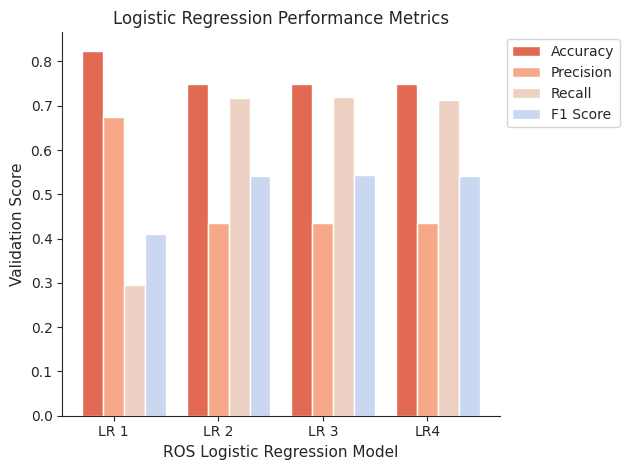

In [815]:
# Visualise key metrics for Logistic Regression models
accuracy_scores = [accuracy_score_lr,
                   accuracy_score_lr_2,
                   accuracy_score_lr_3,
                   accuracy_score_lr_4]
precision_scores = [precision_score_lr,
                    precision_score_lr_2,
                    precision_score_lr_3,
                    precision_score_lr_4]
recall_scores = [recall_score_lr,
                 recall_score_lr_2,
                 recall_score_lr_3,
                 recall_score_lr_4]
f1_scores = [f1_score_lr,
             f1_score_lr_2,
             f1_score_lr_3,
             f1_score_lr_4]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("ROS Logistic Regression Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Logistic Regression Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["LR 1", "LR 2", "LR 3", "LR4"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("logistic_regression_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()


## 4.3 Decision Tree Classifier

In [816]:
# Train a Decision Tree with the imbalanced data

# Initialise and fit a Decision Tree model
model_tree = DecisionTreeClassifier(criterion = "gini",
                                    splitter = "best",
                                    max_depth = None,
                                    random_state = 42)
model_tree.fit(x_train_encoded, y_train)

# Make predictions on the training set and calculate accuracy
train_pred_tree = model_tree.predict(x_train_encoded)
train_accuracy_tree = accuracy_score(y_train, train_pred_tree)
print(f"Decision Tree Training accuracy (imbalanced): {100 * train_accuracy_tree:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree = model_tree.predict(x_val_encoded)
validation_accuracy_tree = accuracy_score(y_val, validation_pred_tree)
print(f"Decision Tree Validation accuracy (imbalanced): {100 * validation_accuracy_tree:.2f}%")

Decision Tree Training accuracy (imbalanced): 99.97%
Decision Tree Validation accuracy (imbalanced): 78.90%


In [817]:
# Train a Decision Tree with SMOTE data

# Initialise and train a Decision Tree model
model_tree_smote = DecisionTreeClassifier(criterion = "gini",
                                          splitter = "best",
                                          max_depth = None,
                                          random_state = 42)
model_tree_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_tree_smote = model_tree_smote.predict(x_train_smote)
train_accuracy_tree_smote = accuracy_score(y_train_smote, train_pred_tree_smote)
print(f"Decision Tree Training accuracy (SMOTE): {100 * train_accuracy_tree_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree_smote = model_tree_smote.predict(x_val_encoded)
validation_accuracy_tree_smote = accuracy_score(y_val, validation_pred_tree_smote)
print(f"Decision Tree Validation accuracy (SMOTE): {100 * validation_accuracy_tree_smote:.2f}%")

Decision Tree Training accuracy (SMOTE): 99.98%
Decision Tree Validation accuracy (SMOTE): 78.25%


In [818]:
# Train a Decision Tree model with RandomOverSampling data

# Initialise and train a Decision Tree model
model_tree_ros = DecisionTreeClassifier(criterion = "gini",
                                          splitter = "best",
                                          max_depth = None,
                                          random_state = 42)
model_tree_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_tree_ros = model_tree_ros.predict(x_train_ros)
train_accuracy_tree_ros = accuracy_score(y_train_ros, train_pred_tree_ros)
print(f"Decision Tree Training accuracy (ROS): {100 * train_accuracy_tree_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree_ros = model_tree_ros.predict(x_val_encoded)
validation_accuracy_tree_ros = accuracy_score(y_val, validation_pred_tree_ros)
print(f"Decision Tree Validation accuracy (ROS): {100 * validation_accuracy_tree_ros:.2f}%")

Decision Tree Training accuracy (ROS): 99.98%
Decision Tree Validation accuracy (ROS): 80.00%


Perform 10-fold Cross-Validation:

In [819]:
# Perfrom 10-fold Cross-Validation for original Decision Tree model
CV_scores_tree = cross_val_score(model_tree,
                                x_train_encoded,
                                y_train,
                                cv = 10,
                                scoring = "accuracy")

# Get the f1 score from 10-fold cross-validation
CV_scores_tree_f1 = cross_val_score(model_tree,
                                    x_train_encoded,
                                    y_train,
                                    cv = 10,
                                    scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_tree_recall = cross_val_score(model_tree,
                                        x_train_encoded,
                                        y_train,
                                        cv = 10,
                                        scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_tree = CV_scores_tree.mean()
CV_sd_score_tree = CV_scores_tree.std()
CV_mean_score_tree_f1 = CV_scores_tree_f1.mean()
CV_sd_score_tree_f1 = CV_scores_tree_f1.std()
CV_mean_score_tree_recall = CV_scores_tree_recall.mean()
CV_sd_score_tree_recall = CV_scores_tree_recall.std()

# Print the results
print(f"Decision Tree 10-fold CV mean accuracy: {100 * CV_mean_score_tree:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation: {100 * CV_sd_score_tree:.2f}%")
print(f"Decision Tree 10-fold CV mean f1: {100 * CV_mean_score_tree_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation: {100 * CV_sd_score_tree_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall: {100 * CV_mean_score_tree_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation: {100 * CV_sd_score_tree_recall:.2f}%")

Decision Tree 10-fold CV mean accuracy: 78.95%
Decision Tree 10-fold CV standard deviation: 1.29%
Decision Tree 10-fold CV mean f1: 49.27%
Decision Tree 10-fold CV f1 standard deviation: 2.26%
Decision Tree 10-fold CV mean recall: 49.80%
Decision Tree 10-fold CV recall standard deviation: 2.62%


In [820]:
# Perform 10-fold cross-validation with SMOTE Decision Tree model
CV_scores_tree_smote = cross_val_score(model_tree_smote,
                                        x_train_smote,
                                        y_train_smote,
                                        cv = 10,
                                        scoring = "accuracy")

# Get F1 scores from 10-fold cross-validation
CV_scores_tree_smote_f1 = cross_val_score(model_tree_smote,
                                        x_train_smote,
                                        y_train_smote,
                                        cv = 10,
                                        scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_tree_smote_recall = cross_val_score(model_tree_smote,
                                            x_train_smote,
                                            y_train_smote,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_tree_smote = CV_scores_tree_smote.mean()
CV_sd_score_tree_smote = CV_scores_tree_smote.std()
CV_mean_score_tree_smote_f1 = CV_scores_tree_smote_f1.mean()
CV_sd_score_tree_smote_f1 = CV_scores_tree_smote_f1.std()
CV_mean_score_tree_smote_recall = CV_scores_tree_smote_recall.mean()
CV_sd_score_tree_smote_recall = CV_scores_tree_smote_recall.std()

# Print the results
print(f"Decision Tree 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_tree_smote:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_tree_smote:.2f}%")
print(f"Decision Tree 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_tree_smote_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_tree_smote_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_tree_smote_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_tree_smote_recall:.2f}%")

Decision Tree 10-fold CV mean accuracy (SMOTE): 83.44%
Decision Tree 10-fold CV standard deviation (SMOTE): 4.60%
Decision Tree 10-fold CV mean f1 (SMOTE): 83.22%
Decision Tree 10-fold CV f1 standard deviation (SMOTE): 5.79%
Decision Tree 10-fold CV mean recall (SMOTE): 83.96%
Decision Tree 10-fold CV recall standard deviation (SMOTE): 10.02%


In [821]:
# Perform 10-fold cross-validation with Random OverSampling Decision Tree model
CV_scores_tree_ros = cross_val_score(model_tree_ros,
                                    x_train_ros,
                                    y_train_ros,
                                    cv = 10,
                                    scoring = "accuracy")

# Get F1 scores from 10-fold cross-validation
CV_scores_tree_ros_f1 = cross_val_score(model_tree_ros,
                                        x_train_ros,
                                        y_train_ros,
                                        cv = 10,
                                        scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_tree_ros_recall = cross_val_score(model_tree_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_tree_ros = CV_scores_tree_ros.mean()
CV_sd_score_tree_ros = CV_scores_tree_ros.std()
CV_mean_score_tree_ros_f1 = CV_scores_tree_ros_f1.mean()
CV_sd_score_tree_ros_f1 = CV_scores_tree_ros_f1.std()
CV_mean_score_tree_ros_recall = CV_scores_tree_ros_recall.mean()
CV_sd_score_tree_ros_recall = CV_scores_tree_ros_recall.std()

# Print the results
print(f"Decision Tree 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_tree_ros:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation (ROS): {100 * CV_sd_score_tree_ros:.2f}%")
print(f"Decision Tree 10-fold CV mean f1 (ROS): {100 * CV_mean_score_tree_ros_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_tree_ros_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall (ROS): {100 * CV_mean_score_tree_ros_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_tree_ros_recall:.2f}%")

Decision Tree 10-fold CV mean accuracy (ROS): 92.67%
Decision Tree 10-fold CV standard deviation (ROS): 1.01%
Decision Tree 10-fold CV mean f1 (ROS): 93.09%
Decision Tree 10-fold CV f1 standard deviation (ROS): 0.98%
Decision Tree 10-fold CV mean recall (ROS): 98.78%
Decision Tree 10-fold CV recall standard deviation (ROS): 1.86%


In [822]:
# Get all relevant performance metrics for model evaluation

# Model 1: Decision Tree with imbalanced data
print(classification_report(y_val, validation_pred_tree))

# Get the probability estimates of the positive class
y_scores = model_tree.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score and print results
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using imbalanced data (Decision Tree): {roc_auc}\n")
print(f"Decision Tree 10-fold CV mean accuracy: {100 * CV_mean_score_tree:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation: {100 * CV_sd_score_tree:.2f}%")
print(f"Decision Tree 10-fold CV mean f1: {100 * CV_mean_score_tree_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation: {100 * CV_sd_score_tree_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall: {100 * CV_mean_score_tree_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation: {100 * CV_sd_score_tree_recall:.2f}%")
print()

# Model 2: Decision Tree with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_tree_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_tree_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score and print results
roc_auc = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data (Decision Tree): {roc_auc}\n")
print(f"Decision Tree 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_tree_smote:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_tree_smote:.2f}%")
print(f"Decision Tree 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_tree_smote_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_tree_smote_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_tree_smote_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_tree_smote_recall:.2f}%")
print()

# Model 3: Decision Tree with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_tree_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_tree_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data (Decision Tree): {roc_auc}\n")
print(f"Decision Tree 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_tree_ros:.2f}%")
print(f"Decision Tree 10-fold CV standard deviation (ROS): {100 * CV_sd_score_tree_ros:.2f}%")
print(f"Decision Tree 10-fold CV mean f1 (ROS): {100 * CV_mean_score_tree_ros_f1:.2f}%")
print(f"Decision Tree 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_tree_ros_f1:.2f}%")
print(f"Decision Tree 10-fold CV mean recall (ROS): {100 * CV_mean_score_tree_ros_recall:.2f}%")
print(f"Decision Tree 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_tree_ros_recall:.2f}%")

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1586
           1       0.49      0.50      0.50       414

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000

ROC AUC score using imbalanced data (Decision Tree): 0.6819041614123582

Decision Tree 10-fold CV mean accuracy: 78.95%
Decision Tree 10-fold CV standard deviation: 1.29%
Decision Tree 10-fold CV mean f1: 49.27%
Decision Tree 10-fold CV f1 standard deviation: 2.26%
Decision Tree 10-fold CV mean recall: 49.80%
Decision Tree 10-fold CV recall standard deviation: 2.62%

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1586
           1       0.48      0.56      0.51       414

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.

Saving figure decision_tree_roc_curve


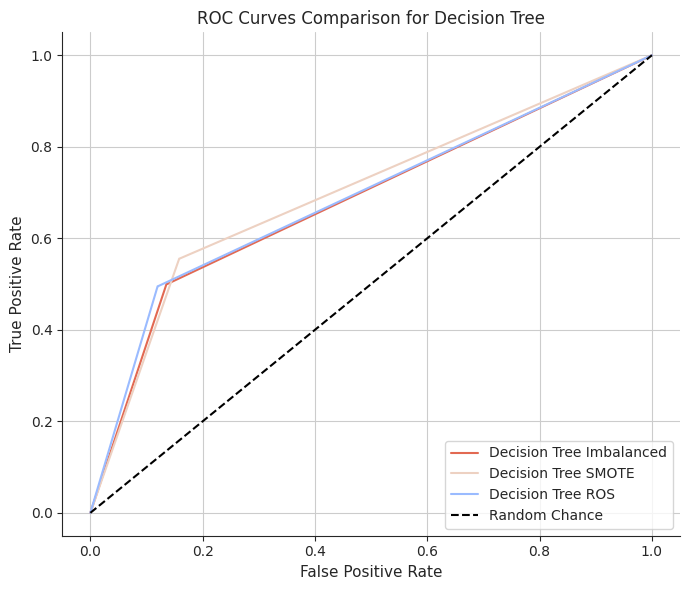

In [823]:
# Plot the ROC curve to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_tree, tpr_tree, _ = roc_curve(y_val, y_scores)
fpr_tree_smote, tpr_tree_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_tree_ros, tpr_tree_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_tree, 
         tpr_tree, 
         label ="Decision Tree Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_tree_smote, 
         tpr_tree_smote, 
         label = "Decision Tree SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_tree_ros, 
         tpr_tree_ros, 
         label = "Decision Tree ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Decision Tree", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("decision_tree_roc_curve")

# Show the plot
plt.show()

Saving figure tree_performance_metrics_class_imbalance


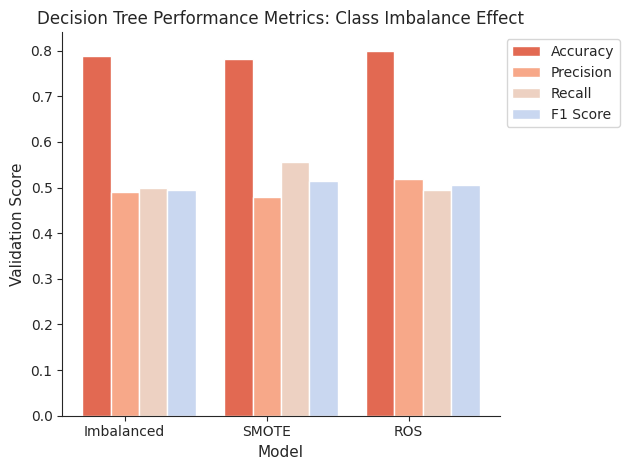

In [824]:
# Save variables for accuracy, precision, recall, and f1 score: Decision Tree with original imbalanced data
accuracy_score_tree = accuracy_score(y_val, validation_pred_tree).round(4)
precision_score_tree = precision_score(y_val, validation_pred_tree).round(4)
recall_score_tree = recall_score(y_val, validation_pred_tree).round(4)
f1_score_tree = f1_score(y_val, validation_pred_tree).round(4)

# Save variables for accuracy, precision, recall, and f1 score: Decision Tree with SMOTE dataset
accuracy_score_tree_smote = accuracy_score(y_val, validation_pred_tree_smote).round(4)
precision_score_tree_smote = precision_score(y_val, validation_pred_tree_smote).round(4)
recall_score_tree_smote = recall_score(y_val, validation_pred_tree_smote).round(4)
f1_score_tree_smote = f1_score(y_val, validation_pred_tree_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: Decision Tree with ROS dataset
accuracy_score_tree_ros = accuracy_score(y_val, validation_pred_tree_ros).round(4)
precision_score_tree_ros = precision_score(y_val, validation_pred_tree_ros).round(4)
recall_score_tree_ros = recall_score(y_val, validation_pred_tree_ros).round(4)
f1_score_tree_ros = f1_score(y_val, validation_pred_tree_ros).round(4)

# Visualise key metrics for Logistic Regression models
accuracy_scores = [accuracy_score_tree,
                   accuracy_score_tree_smote,
                   accuracy_score_tree_ros]
precision_scores = [precision_score_tree,
                    precision_score_tree_smote,
                    precision_score_tree_ros]
recall_scores = [recall_score_tree,
                 recall_score_tree_smote,
                 recall_score_tree_ros]
f1_scores = [f1_score_tree,
             f1_score_tree_smote,
             f1_score_tree_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Decision Tree Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("tree_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

Comparison of Confusion Matrixes:

In [825]:
# Model 1: Original imbalanced Decision Tree model
cm_tree = confusion_matrix(y_val, validation_pred_tree)
print("\n Validation Confusion Matrix Decision Tree (imbalanced): \n", cm_tree)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Decision Tree (imbalanced): \n", confusion_matrix(y_val, validation_pred_tree, normalize = "all"))

# Model 2: SMOTE resampled Decision Tree model
cm_tree_smote = confusion_matrix(y_val, validation_pred_tree_smote)
print("\n Validation Confusion Matrix Decision Tree (SMOTE): \n", cm_tree_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Decision Tree (SMOTE): \n", confusion_matrix(y_val, validation_pred_tree_smote, normalize = "all"))

# Model 3: RandomOverSampled Decision Tree model
cm_tree_ros = confusion_matrix(y_val, validation_pred_tree_ros)
print("\n Validation Confusion Matrix Decision Tree (ROS): \n", cm_tree_ros)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Decision Tree (ROS): \n", confusion_matrix(y_val, validation_pred_tree_ros, normalize = "all"))



 Validation Confusion Matrix Decision Tree (imbalanced): 
 [[1371  215]
 [ 207  207]]

 Normalised validation confusion Matrix Decision Tree (imbalanced): 
 [[0.6855 0.1075]
 [0.1035 0.1035]]

 Validation Confusion Matrix Decision Tree (SMOTE): 
 [[1335  251]
 [ 184  230]]

 Normalised validation confusion Matrix Decision Tree (SMOTE): 
 [[0.6675 0.1255]
 [0.092  0.115 ]]

 Validation Confusion Matrix Decision Tree (ROS): 
 [[1395  191]
 [ 209  205]]

 Normalised validation confusion Matrix Decision Tree (ROS): 
 [[0.6975 0.0955]
 [0.1045 0.1025]]


Saving figure decision_tree_confusion_matrix


/tmp/ipykernel_72/1830122627.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


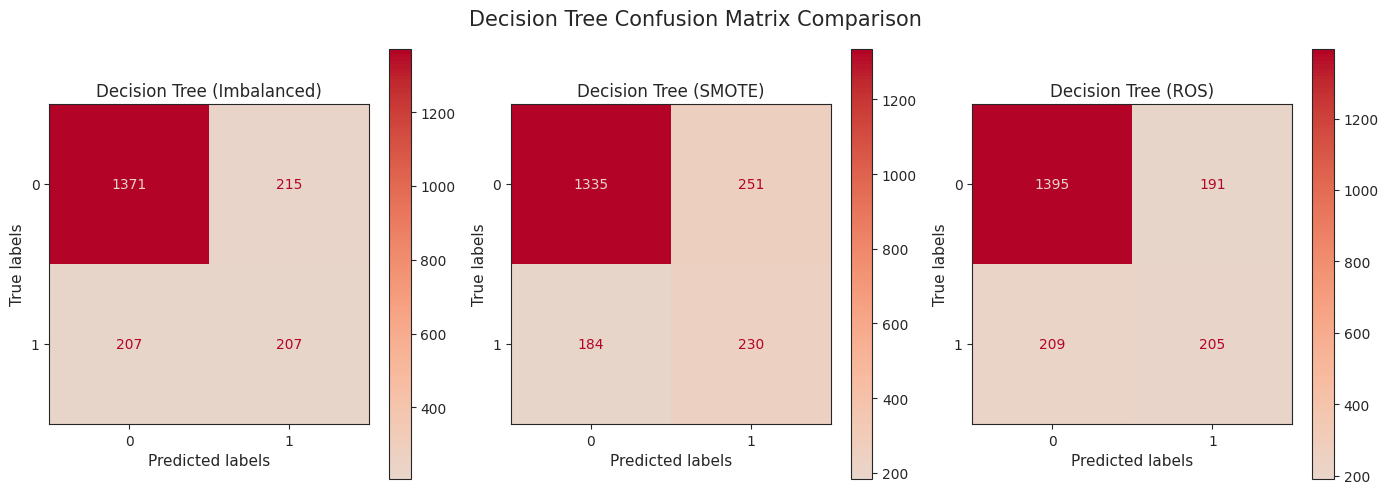

In [826]:
# Also visualise confusion matrix in a plot format for reproducibility

# Create matplotlib figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise the spectrum for readability
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.55 
stop = 1.0 
colors = coolwarm(np.linspace(start, stop, 256)) # define the best start and stop for the data
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix using the original imbalanced data
cm_display_tree = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree)
cm_display_tree.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("Decision Tree (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the SMOTE resampled data
cm_display_tree_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree_smote)
cm_display_tree_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("Decision Tree (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the ROS resampled data
cm_display_tree_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_tree_ros)
cm_display_tree_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("Decision Tree (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set main title
fig.suptitle("Decision Tree Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("decision_tree_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

In [827]:
# Check the depth of the tree to see whether the model is too complex or overfitting
tree_depth = model_tree.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

# This tree may have to be pruned during hyperparameter tuning

Depth of the Decision Tree: 26


To find as many customers that may churn, from now one, the SMOTE dataset will be used to train the decision trees.

In [828]:
accuracy_score_tree_smote = accuracy_score(y_val, validation_pred_tree_smote).round(4)
precision_score_tree_smote = precision_score(y_val, validation_pred_tree_smote).round(4)
recall_score_tree_smote = recall_score(y_val, validation_pred_tree_smote).round(4)
f1_score_tree_smote = f1_score(y_val, validation_pred_tree_smote).round(4)

print(f"Accuracy Score Decision Tree (SMOTE):{accuracy_score_tree_smote}")
print(f"Precision Score Decision Tree (SMOTE):{precision_score_tree_smote}")
print(f"Recall Score Decision Tree (SMOTE):{recall_score_tree_smote}")
print(f"F1 Score Decision Tree (SMOTE):{f1_score_tree_smote}")

Accuracy Score Decision Tree (SMOTE):0.7825
Precision Score Decision Tree (SMOTE):0.4782
Recall Score Decision Tree (SMOTE):0.5556
F1 Score Decision Tree (SMOTE):0.514


In [829]:
# Find the most significant variables for the SMOTE Decision Tree
feature_importances_tree = model_tree_smote.feature_importances_

# Sort the feature importance in descending order
sorted_idx_tree = np.argsort(feature_importances_tree)[::-1]

# Show results
print("Most significant variables for Decision Tree (SMOTE):")
for index in sorted_idx_tree:
  print(f"{x_train_smote.columns[index]}: {feature_importances_tree[index]:4f}")

Most significant variables for Decision Tree (SMOTE):
Age: 0.344835
NumOfProducts: 0.208511
CreditScore: 0.153150
Balance_products_ratio: 0.105223
Balance: 0.079099
IsActiveMember: 0.035595
Gender_Male: 0.023852
Geography_Germany: 0.021855
Geography_Spain: 0.013313
Age Group_45-55: 0.004825
Age Group_35-45: 0.004204
Age Group_25-35: 0.004084
Age Group_55-65: 0.001245
Age Group_65+: 0.000210


In [830]:
# Since all 'Age Group' variables reported a significance that is under 0.01, experiment to see whether dropping 'Age' changes performance significantly 
# Feature selection and engineering: attempt 1 (dropping 'Age')

# Drop the 'Age' column from training and validation sets
x_train_smote_age = x_train_smote.drop("Age", axis = 1)
x_val_smote_age = x_val_encoded.drop("Age", axis = 1)

# Initialise and fit a Decision Tree model
model_tree_2 = DecisionTreeClassifier(criterion = "gini",
                                     splitter = "best",
                                     max_depth = None,
                                     random_state = 42)
model_tree_2.fit(x_train_smote_age, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_tree_2 = model_tree_2.predict(x_train_smote_age)
train_accuracy_tree_2 = accuracy_score(y_train_smote, train_pred_tree_2)
print(f"2nd Decision Tree Training accuracy (SMOTE): {100 * train_accuracy_tree_2:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree_2 = model_tree_2.predict(x_val_smote_age)
validation_accuracy_tree_2 = accuracy_score(y_val, validation_pred_tree_2)
print(f"2nd Decision Tree Validation accuracy (SMOTE): {100 * validation_accuracy_tree_2:.2f}%")

2nd Decision Tree Training accuracy (SMOTE): 99.87%
2nd Decision Tree Validation accuracy (SMOTE): 75.65%


In [831]:
# Get Recall from 10-fold cross-validation
CV_scores_tree_smote_recall_2 = cross_val_score(model_tree_2,
                                                x_train_smote_age,
                                                y_train_smote,
                                                cv = 10,
                                                scoring = "recall")

# Get the mean Recall and sd of the 10-fold cross-validation scores
CV_mean_score_tree_smote_recall_2 = CV_scores_tree_smote_recall_2.mean()
CV_sd_score_tree_smote_recall_2 = CV_scores_tree_smote_recall_2.std()

# Print the results
print(f"2nd Decision Tree 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_tree_smote_recall_2:.2f}%")
print(f"2nd Decision Tree 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_tree_smote_recall_2:.2f}%")

2nd Decision Tree 10-fold CV mean recall (SMOTE): 81.17%
2nd Decision Tree 10-fold CV recall standard deviation (SMOTE): 5.18%


In [832]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_tree_2 = accuracy_score(y_val, validation_pred_tree_2).round(4)
precision_score_tree_2 = precision_score(y_val, validation_pred_tree_2).round(4)
recall_score_tree_2 = recall_score(y_val, validation_pred_tree_2).round(4)
f1_score_tree_2 = f1_score(y_val, validation_pred_tree_2).round(4)

print(f"Accuracy 2nd Decision Tree (SMOTE): {accuracy_score_tree_2}")
print(f"Precision 2nd Decision Tree (SMOTE): {precision_score_tree_2}")
print(f"Recal 2nd Decision Tree (SMOTE): {recall_score_tree_2}")
print(f"Recall 10f CV 2nd Decision Tree (SMOTE): {CV_mean_score_tree_smote_recall_2:.4f}")
print(f"Recall sd 10f CV 2nd Decision Tree (SMOTE): {CV_sd_score_tree_smote_recall_2:.4f}")
print(f"F1 score 2nd Decision Tree (SMOTE): {f1_score_tree_2}")

Accuracy 2nd Decision Tree (SMOTE): 0.7565
Precision 2nd Decision Tree (SMOTE): 0.4354
Recal 2nd Decision Tree (SMOTE): 0.5942
Recall 10f CV 2nd Decision Tree (SMOTE): 0.8117
Recall sd 10f CV 2nd Decision Tree (SMOTE): 0.0518
F1 score 2nd Decision Tree (SMOTE): 0.5026


In [833]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_tree_2))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1586
           1       0.44      0.59      0.50       414

    accuracy                           0.76      2000
   macro avg       0.66      0.70      0.67      2000
weighted avg       0.79      0.76      0.77      2000



In [834]:
# Confusion Matrix using Decision Tree
cm_tree_2 = confusion_matrix(y_val, validation_pred_tree_2)
print("\n Confusion Matrix Decision Tree: \n", cm_tree_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix Decision Tree: \n", confusion_matrix(y_val, validation_pred_tree_2, normalize = "all"))


 Confusion Matrix Decision Tree: 
 [[1267  319]
 [ 168  246]]

 Normalised confusion Matrix Decision Tree: 
 [[0.6335 0.1595]
 [0.084  0.123 ]]


In [835]:
# Find the most significant variables for the 2nd Decision Tree (SMOTE)
feature_importances_tree_2 = model_tree_2.feature_importances_

# Sort the feature importance in descending order
sorted_idx_tree_2 = np.argsort(feature_importances_tree_2)[::-1]

# Show results
print("Most significant variables for 2nd Decision Tree (SMOTE):")
for index in sorted_idx_tree_2:
  print(f"{x_train_smote_age.columns[index]}: {feature_importances_tree_2[index]:4f}")

Most significant variables for 2nd Decision Tree (SMOTE):
CreditScore: 0.243295
NumOfProducts: 0.230567
Balance_products_ratio: 0.137623
Balance: 0.113136
Age Group_45-55: 0.106031
IsActiveMember: 0.033117
Gender_Male: 0.025125
Geography_Germany: 0.024867
Age Group_25-35: 0.024418
Age Group_55-65: 0.023965
Geography_Spain: 0.020713
Age Group_35-45: 0.012336
Age Group_65+: 0.004808


only 2 'Age Group' attributes still have a significance that is under 0.02.

In [836]:
# Second attempt at feature selection and engineering 
# Dropping all 'Age Group' attributes due to having a significance lower than 0.02

# Drop all 'Age Group' columns from training and validation sets
x_train_smote_age_groups = x_train_smote.drop(["Age Group_65+", "Age Group_45-55", "Age Group_35-45", "Age Group_25-35", "Age Group_55-65"], axis = 1)
x_val_smote_age_groups = x_val_encoded.drop(["Age Group_65+", "Age Group_45-55", "Age Group_35-45", "Age Group_25-35", "Age Group_55-65"], axis = 1)

# Initialise and fit a 3rd Decision Tree model
model_tree_3 = DecisionTreeClassifier(criterion = "gini",
                                     splitter = "best",
                                     max_depth = None,
                                     random_state = 42)
model_tree_3.fit(x_train_smote_age_groups, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_tree_3 = model_tree_3.predict(x_train_smote_age_groups)
train_accuracy_tree_3 = accuracy_score(y_train_smote, train_pred_tree_3)
print(f"3rd Decision Tree Training accuracy (SMOTE): {100 * train_accuracy_tree_3:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree_3 = model_tree_3.predict(x_val_smote_age_groups)
validation_accuracy_tree_3 = accuracy_score(y_val, validation_pred_tree_3)
print(f"3rd Decision Tree Validation accuracy (SMOTE): {100 * validation_accuracy_tree_3:.2f}%")

3rd Decision Tree Training accuracy (SMOTE): 99.98%
3rd Decision Tree Validation accuracy (SMOTE): 78.45%


In [837]:
# Use 10-fold Cross-Validation to get Recall
CV_scores_tree_3 = cross_val_score(model_tree_3,
                                    x_train_smote_age_groups,
                                    y_train_smote,
                                    cv = 10,
                                    scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_tree_3 = CV_scores_tree_3.mean()
CV_sd_score_tree_3 = CV_scores_tree_3.std()

# Print the results
print(f"3rd Decision Tree 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_tree_3:.2f}%")
print(f"3rd Decision Tree 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_tree_3:.2f}%")

3rd Decision Tree 10-fold CV mean recall (SMOTE): 83.65%
3rd Decision Tree 10-fold CV recall standard deviation (SMOTE): 10.06%


In [838]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_tree_3 = accuracy_score(y_val, validation_pred_tree_3).round(4)
precision_score_tree_3 = precision_score(y_val, validation_pred_tree_3).round(4)
recall_score_tree_3 = recall_score(y_val, validation_pred_tree_3).round(4)
f1_score_tree_3 = f1_score(y_val, validation_pred_tree_3).round(4)

print(f"Accuracy 3rd Decision Tree (SMOTE): {accuracy_score_tree_3}")
print(f"Precision 3rd Decision Tree (SMOTE): {precision_score_tree_3}")
print(f"Recal 3rd Decision Tree (SMOTE): {recall_score_tree_3}")
print(f"Recall 10-f CV 3rd Decision Tree (SMOTE): {CV_mean_score_tree_3:.4f}")
print(f"Recall 10-f sd CV 3rd Decision Tree (SMOTE): {CV_sd_score_tree_3:.4f}")
print(f"F1 score 3rd Decision Tree (SMOTE): {f1_score_tree_3}")

Accuracy 3rd Decision Tree (SMOTE): 0.7845
Precision 3rd Decision Tree (SMOTE): 0.4825
Recal 3rd Decision Tree (SMOTE): 0.5652
Recall 10-f CV 3rd Decision Tree (SMOTE): 0.8365
Recall 10-f sd CV 3rd Decision Tree (SMOTE): 0.1006
F1 score 3rd Decision Tree (SMOTE): 0.5206


In [839]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_tree_3))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1586
           1       0.48      0.57      0.52       414

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.78      0.79      2000



In [840]:
# Confusion Matrix using 3rd Decision Tree (SMOTE)
cm_tree_3 = confusion_matrix(y_val, validation_pred_tree_3)
print("\n Confusion Matrix 3rd Decision Tree (SMOTE): \n", cm_tree_3)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 3rd Decision Tree (SMOTE): \n", confusion_matrix(y_val, validation_pred_tree_3, normalize = "all"))


 Confusion Matrix 3rd Decision Tree (SMOTE): 
 [[1335  251]
 [ 180  234]]

 Normalised confusion Matrix 3rd Decision Tree (SMOTE): 
 [[0.6675 0.1255]
 [0.09   0.117 ]]


In [841]:
# Find the most significant variables for the 3rd Decision Tree to see if further feature selection steps are needed
feature_importances_tree_3 = model_tree_3.feature_importances_

# Sort the feature importance in descending order
sorted_idx_tree_3 = np.argsort(feature_importances_tree_3)[::-1]

# Show results
print("Most significant variables for 3rd Decision Tree (SMOTE):")
for index in sorted_idx_tree_3:
  print(f"{x_train_smote_age_groups.columns[index]}: {feature_importances_tree_3[index]:4f}")

Most significant variables for 3rd Decision Tree (SMOTE):
Age: 0.351639
NumOfProducts: 0.209457
CreditScore: 0.153034
Balance_products_ratio: 0.102194
Balance: 0.090457
IsActiveMember: 0.034837
Gender_Male: 0.025133
Geography_Germany: 0.020256
Geography_Spain: 0.012993


In [842]:
# Attempt 3 feature selection and engineering (dropping 'Geography_Spain <0.02)

# Drop 'Geography_Spain' columns from trainig and validation sets
x_train_smote_spain = x_train_smote_age_groups.drop("Geography_Spain", axis = 1)
x_val_smote_spain = x_val_smote_age_groups.drop("Geography_Spain", axis = 1)

# Initialise and fit a 4th Decision Tree model
model_tree_4 = DecisionTreeClassifier(criterion = "gini",
                                     splitter = "best",
                                     max_depth = None,
                                     random_state = 42)
model_tree_4.fit(x_train_smote_spain, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_tree_4 = model_tree_4.predict(x_train_smote_spain)
train_accuracy_tree_4 = accuracy_score(y_train_smote, train_pred_tree_4)
print(f"4th Decision Tree Training accuracy (SMOTE): {100 * train_accuracy_tree_4:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_tree_4 = model_tree_4.predict(x_val_smote_spain)
validation_accuracy_tree_4 = accuracy_score(y_val, validation_pred_tree_4)
print(f"4th Decision Tree Validation accuracy (SMOTE): {100 * validation_accuracy_tree_4:.2f}%")

4th Decision Tree Training accuracy (SMOTE): 99.98%
4th Decision Tree Validation accuracy (SMOTE): 78.05%


In [843]:
# Use 10-fold Cross-Validation to get Recall
CV_scores_tree_4 = cross_val_score(model_tree_4,
                                    x_train_smote_spain,
                                    y_train_smote,
                                    cv = 10,
                                    scoring = "recall")

# Get the mean Recall and sd of the cross-validation scores
CV_mean_score_tree_4 = CV_scores_tree_4.mean()
CV_sd_score_tree_4 = CV_scores_tree_4.std()

# Print the results
print(f"4th Decision Tree 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_tree_4:.2f}%")
print(f"4th Decision Tree 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_tree_4:.2f}%")

4th Decision Tree 10-fold CV mean recall (SMOTE): 82.97%
4th Decision Tree 10-fold CV recall standard deviation (SMOTE): 10.11%


In [844]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_tree_4 = accuracy_score(y_val, validation_pred_tree_4).round(4)
precision_score_tree_4 = precision_score(y_val, validation_pred_tree_4).round(4)
recall_score_tree_4 = recall_score(y_val, validation_pred_tree_4).round(4)
f1_score_tree_4 = f1_score(y_val, validation_pred_tree_4).round(4)

print(f"Accuracy 4th Decision Tree (SMOTE): {accuracy_score_tree_4}")
print(f"Precision 4th Decision Tree (SMOTE): {precision_score_tree_4}")
print(f"Recal 4th Decision Tree (SMOTE): {recall_score_tree_4}")
print(f"Recall 10f CV 4th Decision Tree (SMOTE): {CV_mean_score_tree_4:.4f}")
print(f"Recall 10f sd CV 4th Decision Tree (SMOTE): {CV_sd_score_tree_4:.4f}")
print(f"F1 score 4th Decision Tree (SMOTE): {f1_score_tree_4}")

Accuracy 4th Decision Tree (SMOTE): 0.7805
Precision 4th Decision Tree (SMOTE): 0.4741
Recal 4th Decision Tree (SMOTE): 0.5531
Recall 10f CV 4th Decision Tree (SMOTE): 0.8297
Recall 10f sd CV 4th Decision Tree (SMOTE): 0.1011
F1 score 4th Decision Tree (SMOTE): 0.5106


In [845]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_tree_4))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1586
           1       0.47      0.55      0.51       414

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.68      2000
weighted avg       0.79      0.78      0.79      2000



In [846]:
# Confusion Matrix using Feature-engineered Logistic Regression
cm_tree_4 = confusion_matrix(y_val, validation_pred_tree_4)
print("\n Confusion Matrix 4th Decision Tree (SMOTE): \n", cm_tree_4)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 4th Decision Tree (SMOTE): \n", confusion_matrix(y_val, validation_pred_tree_4, normalize = "all"))


 Confusion Matrix 4th Decision Tree (SMOTE): 
 [[1332  254]
 [ 185  229]]

 Normalised confusion Matrix 4th Decision Tree (SMOTE): 
 [[0.666  0.127 ]
 [0.0925 0.1145]]


In [847]:
# Observe key Decision Tree metrics side-by-side
print(f"Accuracy 1st Decision Tree (SMOTE): {accuracy_score_tree_smote}")
print(f"Precision 1st Decision Tree (SMOTE): {precision_score_tree_smote}")
print(f"Recal 1st Decision Tree (SMOTE): {recall_score_tree_smote}")
print(f"CV Recall 1st Decision Tree (SMOTE): {CV_mean_score_tree_smote_recall}")
print(f"CV Recall sd 1st Decision Tree (SMOTE): {CV_sd_score_tree_smote_recall}")
print(f"F1 score 1st Decision Tree (SMOTE): {f1_score_tree_smote}")
print()

print(f"Accuracy 2nd Decision Tree (SMOTE): {accuracy_score_tree_2}")
print(f"Precision 2nd Decision Tree (SMOTE): {precision_score_tree_2}")
print(f"Recal 2nd Decision Tree (SMOTE): {recall_score_tree_2}")
print(f"CV Recall 2nd Decision Tree (SMOTE): {CV_mean_score_tree_2}")
print(f"CV Recall sd 2nd Decision Tree (SMOTE): {CV_sd_score_tree_2}")
print(f"F1 score 2nd Decision Tree (SMOTE): {f1_score_tree_2}")
print()

print(f"Accuracy 3rd Decision Tree (SMOTE): {accuracy_score_tree_3}")
print(f"Precision 3rd Decision Tree (SMOTE): {precision_score_tree_3}")
print(f"Recal 3rd Decision Tree (SMOTE): {recall_score_tree_3}")
print(f"CV Recall 3rd Decision Tree (SMOTE): {CV_mean_score_tree_3}")
print(f"CV Recall sd 3rd Decision Tree (SMOTE): {CV_sd_score_tree_4}")
print(f"F1 score 3rd Decision Tree (SMOTE): {f1_score_tree_3}")
print()

print(f"Accuracy 4th Decision Tree (SMOTE): {accuracy_score_tree_4}")
print(f"Precision 4th Decision Tree (SMOTE): {precision_score_tree_4}")
print(f"Recal 4th Decision Tree (SMOTE): {recall_score_tree_4}")
print(f"CV Recall 4th Decision Tree (SMOTE): {CV_mean_score_tree_4}")
print(f"CV Recall sd 4th Decision Tree (SMOTE): {CV_sd_score_tree_4}")
print(f"F1 score 4th Decision Tree (SMOTE): {f1_score_tree_4}")
print()

Accuracy 1st Decision Tree (SMOTE): 0.7825
Precision 1st Decision Tree (SMOTE): 0.4782
Recal 1st Decision Tree (SMOTE): 0.5556
CV Recall 1st Decision Tree (SMOTE): 0.8396015009777497
CV Recall sd 1st Decision Tree (SMOTE): 0.10015340398110605
F1 score 1st Decision Tree (SMOTE): 0.514

Accuracy 2nd Decision Tree (SMOTE): 0.7565
Precision 2nd Decision Tree (SMOTE): 0.4354
Recal 2nd Decision Tree (SMOTE): 0.5942
CV Recall 2nd Decision Tree (SMOTE): 0.8117118545531421
CV Recall sd 2nd Decision Tree (SMOTE): 0.051789517502789296
F1 score 2nd Decision Tree (SMOTE): 0.5026

Accuracy 3rd Decision Tree (SMOTE): 0.7845
Precision 3rd Decision Tree (SMOTE): 0.4825
Recal 3rd Decision Tree (SMOTE): 0.5652
CV Recall 3rd Decision Tree (SMOTE): 0.836456406461956
CV Recall sd 3rd Decision Tree (SMOTE): 0.1011322478030151
F1 score 3rd Decision Tree (SMOTE): 0.5206

Accuracy 4th Decision Tree (SMOTE): 0.7805
Precision 4th Decision Tree (SMOTE): 0.4741
Recal 4th Decision Tree (SMOTE): 0.5531
CV Recall 4th 

In [848]:
# Confusion Matrix comparison
print("\n Confusion Matrix: 1st SMOTE Decision Tree: \n", cm_tree)
print("\n Normalised confusion Matrix: 1st SMOTE Decision Tree: \n", confusion_matrix(y_val, validation_pred_tree_smote, normalize = "all"))

print("\n Confusion Matrix: 2nd SMOTE Decision Tree: \n", cm_tree_2)
print("\n Normalised confusion Matrix: 2nd SMOTE Decision Tree: \n", confusion_matrix(y_val, validation_pred_tree_2, normalize = "all"))

print("\n Confusion Matrix: 3rd SMOTE Decision Tree: \n", cm_tree_3)
print("\n Normalised confusion Matrix: 3rd SMOTE Decision Tree: \n", confusion_matrix(y_val, validation_pred_tree_3, normalize = "all"))

print("\n Confusion Matrix: 4th SMOTE Decision Tree: \n", cm_tree_4)
print("\n Normalised confusion Matrix: 4th SMOTE Decision Tree: \n", confusion_matrix(y_val, validation_pred_tree_4, normalize = "all"))


 Confusion Matrix: 1st SMOTE Decision Tree: 
 [[1371  215]
 [ 207  207]]

 Normalised confusion Matrix: 1st SMOTE Decision Tree: 
 [[0.6675 0.1255]
 [0.092  0.115 ]]

 Confusion Matrix: 2nd SMOTE Decision Tree: 
 [[1267  319]
 [ 168  246]]

 Normalised confusion Matrix: 2nd SMOTE Decision Tree: 
 [[0.6335 0.1595]
 [0.084  0.123 ]]

 Confusion Matrix: 3rd SMOTE Decision Tree: 
 [[1335  251]
 [ 180  234]]

 Normalised confusion Matrix: 3rd SMOTE Decision Tree: 
 [[0.6675 0.1255]
 [0.09   0.117 ]]

 Confusion Matrix: 4th SMOTE Decision Tree: 
 [[1332  254]
 [ 185  229]]

 Normalised confusion Matrix: 4th SMOTE Decision Tree: 
 [[0.666  0.127 ]
 [0.0925 0.1145]]


Saving figure decision_tree_performance_metrics


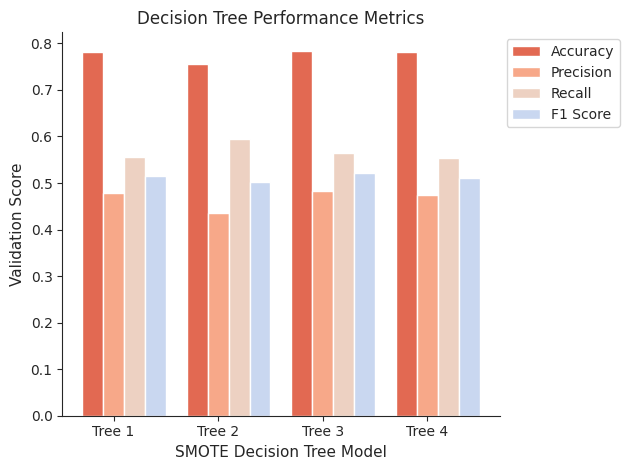

In [849]:
# Visualise key metrics for the 4 Decision Tree models following the feature selection analysis
accuracy_scores = [accuracy_score_tree_smote,
                   accuracy_score_tree_2,
                   accuracy_score_tree_3,
                   accuracy_score_tree_4]
precision_scores = [precision_score_tree_smote,
                    precision_score_tree_2,
                    precision_score_tree_3,
                    precision_score_tree_4]
recall_scores = [recall_score_tree_smote,
                 recall_score_tree_2,
                 recall_score_tree_3,
                 recall_score_tree_4]
f1_scores = [f1_score_tree_smote,
             f1_score_tree_2,
             f1_score_tree_3,
             f1_score_tree_4]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("SMOTE Decision Tree Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Decision Tree Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["Tree 1", "Tree 2", "Tree 3", "Tree 4"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("decision_tree_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()

2nd Decision Tree model is chosen as the best model for the problem

## 4.4 Random Forest Classifier

In [850]:
# Train a Random Forest with the original imbalanced data

# Initialise and fit a Random Forest model
model_forest = RandomForestClassifier(n_estimators = 100,
                                      criterion = "gini",
                                      max_depth = None,
                                      random_state = 42)
model_forest.fit(x_train_encoded, y_train)

# # Make predictions on the training set and calculate accuracy
train_pred_forest = model_forest.predict(x_train_encoded)
train_accuracy_forest = accuracy_score(y_train, train_pred_forest)
print(f"Random Forest Training accuracy (imbalanced): {100 * train_accuracy_forest:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_forest = model_forest.predict(x_val_encoded)
validation_accuracy_forest = accuracy_score(y_val, validation_pred_forest)
print(f"Random Forest Validation accuracy (imbalanced): {100 * validation_accuracy_forest:.2f}%")

Random Forest Training accuracy (imbalanced): 99.95%
Random Forest Validation accuracy (imbalanced): 85.45%


In [851]:
# Train a Random Forest model with the SMOTE data

# Initialise and fit a Random Forest model
model_forest_smote = RandomForestClassifier(n_estimators = 100,
                                            criterion = "gini",
                                            max_depth = None,
                                            random_state = 42)
model_forest_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_forest_smote = model_forest_smote.predict(x_train_smote)
train_accuracy_forest_smote = accuracy_score(y_train_smote, train_pred_forest_smote)
print(f"Random Forest Training accuracy (SMOTE): {100 * train_accuracy_forest_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_forest_smote = model_forest_smote.predict(x_val_encoded)
validation_accuracy_forest_smote = accuracy_score(y_val, validation_pred_forest_smote)
print(f"Random Forest Validation accuracy (SMOTE): {100 * validation_accuracy_forest_smote:.2f}%")

Random Forest Training accuracy (SMOTE): 99.97%
Random Forest Validation accuracy (SMOTE): 82.60%


In [852]:
# Train a Random Forest model with the RandomOverSampling data

# Initialise and fit a Random Forest model
model_forest_ros = RandomForestClassifier(n_estimators = 100,
                                          criterion = "gini",
                                          max_depth = None,
                                          random_state = 42)
model_forest_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_forest_ros = model_forest_ros.predict(x_train_ros)
train_accuracy_forest_ros = accuracy_score(y_train_ros, train_pred_forest_ros)
print(f"Random Forest Training accuracy (ROS): {100 * train_accuracy_forest_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_forest_ros = model_forest_ros.predict(x_val_encoded)
validation_accuracy_forest_ros = accuracy_score(y_val, validation_pred_forest_ros)
print(f"Random Forest Validation accuracy (ROS): {100 * validation_accuracy_forest_ros:.2f}%")

Random Forest Training accuracy (ROS): 99.98%
Random Forest Validation accuracy (ROS): 84.15%


Perform 10-fold Cross-Validation:

In [853]:
# Use 10-fold Cross-Validation for Imbalanced Random Forest model
CV_scores_forest = cross_val_score(model_forest,
                                  x_train_encoded,
                                  y_train,
                                  cv = 10,
                                  scoring = "accuracy")

# Get F1 score using 10-fold cross-validation
CV_scores_forest_f1 = cross_val_score(model_forest,
                                      x_train_encoded,
                                      y_train,
                                      cv = 10,
                                      scoring = "f1")

# Get Recall using 10-fold cross-validation
CV_scores_forest_recall = cross_val_score(model_forest,
                                          x_train_encoded,
                                          y_train,
                                          cv = 10,
                                          scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_forest = CV_scores_forest.mean()
CV_sd_score_forest = CV_scores_forest.std()
CV_mean_score_forest_f1 = CV_scores_forest_f1.mean()
CV_sd_score_forest_f1 = CV_scores_forest_f1.std()
CV_mean_score_forest_recall = CV_scores_forest_recall.mean()
CV_sd_score_forest_recall = CV_scores_forest_recall.std()

# Print the results
print(f"Random Forest 10-fold CV mean accuracy: {100 * CV_mean_score_forest:.2f}%")
print(f"Random Forest 10-fold CV standard deviation: {100 * CV_sd_score_forest:.2f}%")
print(f"Random Forest 10-fold CV mean f1: {100 * CV_mean_score_forest_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation: {100 * CV_sd_score_forest_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall: {100 * CV_mean_score_forest_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation: {100 * CV_sd_score_forest_recall:.2f}%")

Random Forest 10-fold CV mean accuracy: 85.38%
Random Forest 10-fold CV standard deviation: 1.01%
Random Forest 10-fold CV mean f1: 57.58%
Random Forest 10-fold CV f1 standard deviation: 3.23%
Random Forest 10-fold CV mean recall: 48.41%
Random Forest 10-fold CV recall standard deviation: 3.17%


In [854]:
# Perform 10-fold cross-validation with SMOTE Random Forest model
CV_scores_forest_smote = cross_val_score(model_forest_smote,
                                          x_train_smote,
                                          y_train_smote,
                                          cv = 10,
                                          scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_forest_smote_f1 = cross_val_score(model_forest_smote,
                                              x_train_smote,
                                              y_train_smote,
                                              cv = 10,
                                              scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_forest_smote_recall = cross_val_score(model_forest_smote,
                                                x_train_smote,
                                                y_train_smote,
                                                cv = 10,
                                                scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_forest_smote = CV_scores_forest_smote.mean()
CV_sd_score_forest_smote = CV_scores_forest_smote.std()
CV_mean_score_forest_smote_f1 = CV_scores_forest_smote_f1.mean()
CV_sd_score_forest_smote_f1 = CV_scores_forest_smote_f1.std()
CV_mean_score_forest_smote_recall = CV_scores_forest_smote_recall.mean()
CV_sd_score_forest_smote_recall = CV_scores_forest_smote_recall.std()

# Print the results
print(f"Random Forest 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_forest_smote:.2f}%")
print(f"Random Forest 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_forest_smote:.2f}%")
print(f"Random Forest 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_forest_smote_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_forest_smote_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_forest_smote_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_forest_smote_recall:.2f}%")

Random Forest 10-fold CV mean accuracy (SMOTE): 88.46%
Random Forest 10-fold CV standard deviation (SMOTE): 3.63%
Random Forest 10-fold CV mean f1 (SMOTE): 88.30%
Random Forest 10-fold CV f1 standard deviation (SMOTE): 4.29%
Random Forest 10-fold CV mean recall (SMOTE): 88.70%
Random Forest 10-fold CV recall standard deviation (SMOTE): 7.94%


In [855]:
# Perform 10-fold cross-validation with Random OverSampling Random Forest model
CV_scores_forest_ros = cross_val_score(model_forest_ros,
                                      x_train_ros,
                                      y_train_ros,
                                      cv = 10,
                                      scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_forest_ros_f1 = cross_val_score(model_forest_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10,
                                            scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_forest_ros_recall = cross_val_score(model_forest_ros,
                                                x_train_ros,
                                                y_train_ros,
                                                cv = 10,
                                                scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_forest_ros = CV_scores_forest_ros.mean()
CV_sd_score_forest_ros = CV_scores_forest_ros.std()
CV_mean_score_forest_ros_f1 = CV_scores_forest_ros_f1.mean()
CV_sd_score_forest_ros_f1 = CV_scores_forest_ros_f1.std()
CV_mean_score_forest_ros_recall = CV_scores_forest_ros_recall.mean()
CV_sd_score_forest_ros_recall = CV_scores_forest_ros_recall.std()

# Print the results
print(f"Random Forest 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_forest_ros:.2f}%")
print(f"Random Forest 10-fold CV standard deviation (ROS): {100 * CV_sd_score_forest_ros:.2f}%")
print(f"Random Forest 10-fold CV mean f1 (ROS): {100 * CV_mean_score_forest_ros_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_forest_ros_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall (ROS): {100 * CV_mean_score_forest_ros_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_forest_ros_recall:.2f}%")

Random Forest 10-fold CV mean accuracy (ROS): 94.43%
Random Forest 10-fold CV standard deviation (ROS): 1.15%
Random Forest 10-fold CV mean f1 (ROS): 94.67%
Random Forest 10-fold CV f1 standard deviation (ROS): 1.12%
Random Forest 10-fold CV mean recall (ROS): 98.91%
Random Forest 10-fold CV recall standard deviation (ROS): 1.69%


In [856]:
# Get all relevant performance metrics for model evaluation

# Model 1: Random Forest with imbalanced data
print(classification_report(y_val, validation_pred_forest))

# Get the probability estimates of the positive class
y_scores = model_forest.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using imbalanced data: {roc_auc}\n")
print(f"Random Forest 10-fold CV mean accuracy: {100 * CV_mean_score_forest:.2f}%")
print(f"Random Forest 10-fold CV standard deviation: {100 * CV_sd_score_forest:.2f}%")
print(f"Random Forest 10-fold CV mean f1: {100 * CV_mean_score_forest_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation: {100 * CV_sd_score_forest_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall: {100 * CV_mean_score_forest_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation: {100 * CV_sd_score_forest_recall:.2f}%")
print()

# Model 2: Random Forest with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_forest_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_forest_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_smote = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc_smote}\n")
print(f"Random Forest 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_forest_smote:.2f}%")
print(f"Random Forest 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_forest_smote:.2f}%")
print(f"Random Forest 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_forest_smote_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_forest_smote_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_forest_smote_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_forest_smote_recall:.2f}%")
print()

# Model 3: Random Forest with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_forest_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_forest_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_ros = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data: {roc_auc_ros}\n")
print(f"Random Forest 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_forest_ros:.2f}%")
print(f"Random Forest 10-fold CV standard deviation (ROS): {100 * CV_sd_score_forest_ros:.2f}%")
print(f"Random Forest 10-fold CV mean f1 (ROS): {100 * CV_mean_score_forest_ros_f1:.2f}%")
print(f"Random Forest 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_forest_ros_f1:.2f}%")
print(f"Random Forest 10-fold CV mean recall (ROS): {100 * CV_mean_score_forest_ros_recall:.2f}%")
print(f"Random Forest 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_forest_ros_recall:.2f}%")

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1586
           1       0.72      0.49      0.58       414

    accuracy                           0.85      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000

ROC AUC score using imbalanced data: 0.8502780976052537

Random Forest 10-fold CV mean accuracy: 85.38%
Random Forest 10-fold CV standard deviation: 1.01%
Random Forest 10-fold CV mean f1: 57.58%
Random Forest 10-fold CV f1 standard deviation: 3.23%
Random Forest 10-fold CV mean recall: 48.41%
Random Forest 10-fold CV recall standard deviation: 3.17%

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1586
           1       0.58      0.61      0.59       414

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.83      0.83      0.83    

Saving figure random_forest_roc_curve


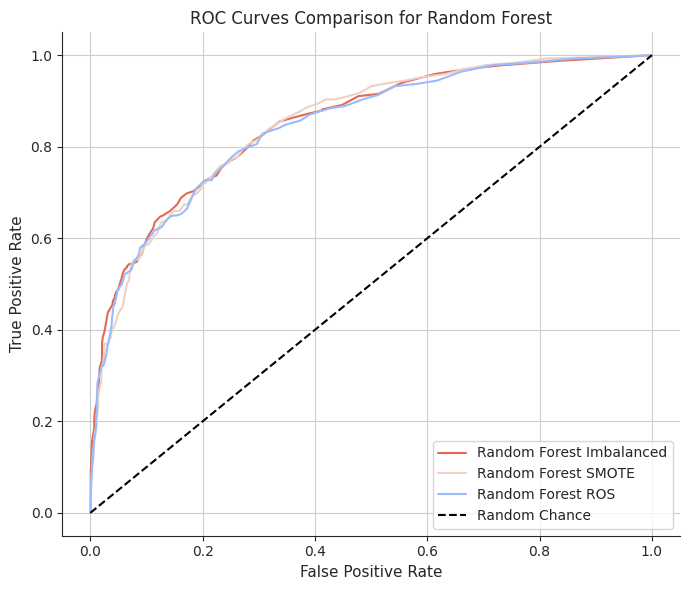

In [857]:
# Plot the ROC curve to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_forest, tpr_forest, _ = roc_curve(y_val, y_scores)
fpr_forest_smote, tpr_forest_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_forest_ros, tpr_forest_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_forest, 
         tpr_forest, 
         label = "Random Forest Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_forest_smote, 
         tpr_forest_smote, 
         label = "Random Forest SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_forest_ros, 
         tpr_forest_ros, 
         label = "Random Forest ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Random Forest", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("random_forest_roc_curve")

# Show the plot
plt.show()

Saving figure forest_performance_metrics_class_imbalance


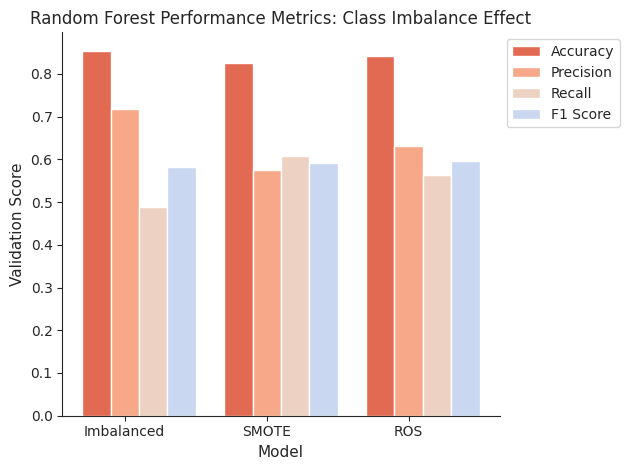

In [858]:
# Save variables for accuracy, precision, recall, and f1 score: Random Forest with original imbalanced dataset
accuracy_score_forest = accuracy_score(y_val, validation_pred_forest).round(4)
precision_score_forest = precision_score(y_val, validation_pred_forest).round(4)
recall_score_forest = recall_score(y_val, validation_pred_forest).round(4)
f1_score_forest = f1_score(y_val, validation_pred_forest).round(4)

# Save variables for accuracy, precision, recall, and f1 score: Random Forest with SMOTE dataset
accuracy_score_forest_smote = accuracy_score(y_val, validation_pred_forest_smote).round(4)
precision_score_forest_smote = precision_score(y_val, validation_pred_forest_smote).round(4)
recall_score_forest_smote = recall_score(y_val, validation_pred_forest_smote).round(4)
f1_score_forest_smote = f1_score(y_val, validation_pred_forest_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: Random Forest with ROS dataset
accuracy_score_forest_ros = accuracy_score(y_val, validation_pred_forest_ros).round(4)
precision_score_forest_ros = precision_score(y_val, validation_pred_forest_ros).round(4)
recall_score_forest_ros = recall_score(y_val, validation_pred_forest_ros).round(4)
f1_score_forest_ros = f1_score(y_val, validation_pred_forest_ros).round(4)

# Visualise key metrics for Random Forest models
accuracy_scores = [accuracy_score_forest,
                   accuracy_score_forest_smote,
                   accuracy_score_forest_ros]
precision_scores = [precision_score_forest,
                    precision_score_forest_smote,
                    precision_score_forest_ros]
recall_scores = [recall_score_forest,
                 recall_score_forest_smote,
                 recall_score_forest_ros]
f1_scores = [f1_score_forest,
             f1_score_forest_smote,
             f1_score_forest_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Random Forest Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("forest_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

In [859]:
# Model 1: Original imbalanced Random Forest model
cm_forest = confusion_matrix(y_val, validation_pred_forest)
print("\n Validation Confusion Matrix Random Forest (imbalanced): \n", cm_forest)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Random Forest (imbalanced): \n", confusion_matrix(y_val, validation_pred_forest, normalize = "all"))

# Model 2: SMOTE resampled Random Forest model
cm_forest_smote = confusion_matrix(y_val, validation_pred_forest_smote)
print("\n Validation Confusion Matrix Decision Tree (SMOTE): \n", cm_forest_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Random Forest (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest_smote, normalize = "all"))

# Model 3: RandomOverSampled Random Forest model
cm_forest_ros = confusion_matrix(y_val, validation_pred_tree_ros)
print("\n Validation Confusion Matrix Decision Tree (ROS): \n", cm_forest_ros)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix Random Forest (ROS): \n", confusion_matrix(y_val, validation_pred_forest_ros, normalize = "all"))


 Validation Confusion Matrix Random Forest (imbalanced): 
 [[1507   79]
 [ 212  202]]

 Normalised validation confusion Matrix Random Forest (imbalanced): 
 [[0.7535 0.0395]
 [0.106  0.101 ]]

 Validation Confusion Matrix Decision Tree (SMOTE): 
 [[1400  186]
 [ 162  252]]

 Normalised validation confusion Matrix Random Forest (SMOTE): 
 [[0.7   0.093]
 [0.081 0.126]]

 Validation Confusion Matrix Decision Tree (ROS): 
 [[1395  191]
 [ 209  205]]

 Normalised validation confusion Matrix Random Forest (ROS): 
 [[0.725  0.068 ]
 [0.0905 0.1165]]


Saving figure random_forest_confusion_matrix


/tmp/ipykernel_72/3598275141.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


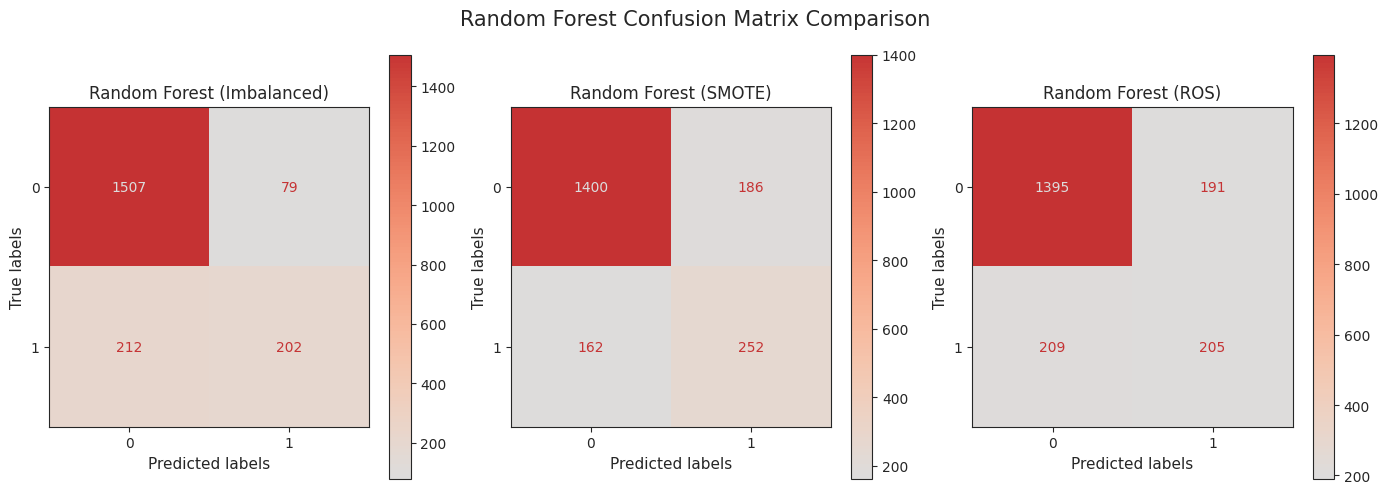

In [860]:
# Also visualise confusion matrix in a plot format for reproductibility

# Create matplotlib figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise he spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.50 
stop = 0.95
colors = coolwarm(np.linspace(start, stop, 256)) # define start and end of palette for readability
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix using the original imbalanced data
cm_display_forest = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_forest)
cm_display_forest.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("Random Forest (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the SMOTE resampled data
cm_display_forest_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_forest_smote)
cm_display_forest_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("Random Forest (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the ROS resampled data
cm_display_forest_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_forest_ros)
cm_display_forest_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("Random Forest (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set main title
fig.suptitle("Random Forest Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("random_forest_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

Considering initial performance, from now on, the SMOTE dataset will be used to train the Random Forest models:

In [861]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_forest_smote = accuracy_score(y_val, validation_pred_forest_smote).round(4)
precision_score_forest_smote = precision_score(y_val, validation_pred_forest_smote).round(4)
recall_score_forest_smote = recall_score(y_val, validation_pred_forest_smote).round(4)
f1_score_forest_smote = f1_score(y_val, validation_pred_forest_smote).round(4)

print(f"Accuracy Random Forest (SMOTE): {accuracy_score_forest_smote}")
print(f"Precision Random Forest (SMOTE): {precision_score_forest_smote}")
print(f"Recal Random Forest (SMOTE): {recall_score_forest_smote}")
print(f"F1 score Random Forest (SMOTE): {f1_score_forest_smote}")

Accuracy Random Forest (SMOTE): 0.826
Precision Random Forest (SMOTE): 0.5753
Recal Random Forest (SMOTE): 0.6087
F1 score Random Forest (SMOTE): 0.5915


In [862]:
# Confusion Matrix using Random Forest (SMOTE)
cm_forest_smote = confusion_matrix(y_val, validation_pred_forest_smote)
print("\n Confusion Matrix Random Forest (SMOTE): \n", cm_forest_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix Decision Tree (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest_smote, normalize = "all"))


 Confusion Matrix Random Forest (SMOTE): 
 [[1400  186]
 [ 162  252]]

 Normalised confusion Matrix Decision Tree (SMOTE): 
 [[0.7   0.093]
 [0.081 0.126]]


In [863]:
# Check the depth of the Random Forest to see whether the model is too complex or overfitting

# Access each decision tree within the Random Forest
tree_depths = [tree.get_depth() for tree in model_forest_smote.estimators_]

# Calculate the average depth of the trees
forest_depth = sum(tree_depths) / len(model_forest_smote.estimators_)
print(f"Average depth in the Random Forest: {forest_depth}")

Average depth in the Random Forest: 25.24


In [864]:
# Find the most significant variables for Random Forest SMOTE
feature_importances_forest = model_forest_smote.feature_importances_

# Sort the feature importance in descending order
sorted_idx_forest = np.argsort(feature_importances_forest)[::-1]

# Show results
print("Most significant variables for Random Forest (SMOTE):")
for index in sorted_idx_forest:
  print(f"{x_train_smote.columns[index]}: {feature_importances_forest[index]:4f}")

Most significant variables for Random Forest (SMOTE):
Age: 0.238091
NumOfProducts: 0.165771
CreditScore: 0.151745
Balance_products_ratio: 0.130708
Balance: 0.117170
Age Group_45-55: 0.043963
IsActiveMember: 0.033955
Geography_Germany: 0.027270
Age Group_25-35: 0.023014
Gender_Male: 0.022497
Geography_Spain: 0.015787
Age Group_55-65: 0.012454
Age Group_35-45: 0.011893
Age Group_65+: 0.005681


Perform feature selection and engineering:

In [865]:
# 1st attempt at Feature selection and engineering (dropping "Age Group_65+", "Age Group_55-65", "Age Group_35-45" due to significance <0.02)

# Drop 'Age Group_65+', 'Age Group_35-45', and 'Age Group_55-65' columns from training and validation sets
x_train_forest_age = x_train_smote.drop(["Age Group_65+", "Age Group_55-65", "Age Group_35-45"], axis = 1)
x_val_forest_age = x_val_encoded.drop(["Age Group_65+", "Age Group_55-65", "Age Group_35-45"], axis = 1)

# Initialise and fit the Random Forest model
model_forest_2 = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_depth = None,
                                       random_state = 42)
model_forest_2.fit(x_train_forest_age, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_forest_2 = model_forest_2.predict(x_train_forest_age)
train_accuracy_forest_2 = accuracy_score(y_train_smote, train_pred_forest_2)
print(f"2nd Random Forest Training accuracy (SMOTE): {100 * train_accuracy_forest_2:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_forest_2 = model_forest_2.predict(x_val_forest_age)
validation_accuracy_forest_2 = accuracy_score(y_val, validation_pred_forest_2)
print(f"2nd Random Forest Validation accuracy (SMOTE): {100 * validation_accuracy_forest_2:.2f}%")

2nd Random Forest Training accuracy (SMOTE): 99.97%
2nd Random Forest Validation accuracy (SMOTE): 82.40%


In [866]:
# Use 10-fold Cross-Validation to get Recall
CV_scores_forest_2 = cross_val_score(model_forest_2,
                                    x_train_forest_age,
                                    y_train_smote,
                                    cv = 10,
                                    scoring = "recall")

# Get the mean Recall and sd of the cross-validation scores
CV_mean_score_forest_2 = CV_scores_forest_2.mean()
CV_sd_score_forest_2 = CV_scores_forest_2.std()

# Print the results
print(f"2nd Random Forest 10-fold CV mean recall: {100 * CV_mean_score_forest_2:.2f}%")
print(f"2nd Random Forest 10-fold CV recall standard deviation: {100 * CV_sd_score_forest_2:.2f}%")

2nd Random Forest 10-fold CV mean recall: 88.36%
2nd Random Forest 10-fold CV recall standard deviation: 8.13%


In [867]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_forest_2))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1586
           1       0.57      0.61      0.59       414

    accuracy                           0.82      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.83      0.82      0.83      2000



In [868]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_forest_2 = accuracy_score(y_val, validation_pred_forest_2).round(4)
precision_score_forest_2 = precision_score(y_val, validation_pred_forest_2).round(4)
recall_score_forest_2 = recall_score(y_val, validation_pred_forest_2).round(4)
f1_score_forest_2 = f1_score(y_val, validation_pred_forest_2).round(4)

print(f"Accuracy 2nd Random Forest (SMOTE): {accuracy_score_forest_2}")
print(f"Precision 2nd Random Forest (SMOTE): {precision_score_forest_2}")
print(f"Recal 2nd Random Forest (SMOTE): {recall_score_forest_2}")
print(f"F1 score 2nd Random Forest (SMOTE): {f1_score_forest_2}")

Accuracy 2nd Random Forest (SMOTE): 0.824
Precision 2nd Random Forest (SMOTE): 0.5701
Recal 2nd Random Forest (SMOTE): 0.6087
F1 score 2nd Random Forest (SMOTE): 0.5888


In [869]:
# Confusion Matrix using 2nd Random Forest (SMOTE)
cm_forest_2 = confusion_matrix(y_val, validation_pred_forest_2)
print("\n Confusion Matrix 2nd Random Forest (SMOTE): \n", cm_forest_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 2nd Random Forest (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest_2, normalize = "all"))


 Confusion Matrix 2nd Random Forest (SMOTE): 
 [[1396  190]
 [ 162  252]]

 Normalised confusion Matrix 2nd Random Forest (SMOTE): 
 [[0.698 0.095]
 [0.081 0.126]]


In [870]:
# Find the most significant variables for the 2nd Random Forest model (SMOTE) after dropping 3 variables
feature_importances_forest = model_forest_2.feature_importances_

# Sort the feature importance in descending order
sorted_idx_forest = np.argsort(feature_importances_forest)[::-1]

# Show results
print("Most significant variables for 2nd Random Forest (SMOTE):")
for index in sorted_idx_forest:
  print(f"{x_train_forest_age.columns[index]}: {feature_importances_forest[index]:4f}")

Most significant variables for 2nd Random Forest (SMOTE):
Age: 0.259446
NumOfProducts: 0.177140
CreditScore: 0.150537
Balance_products_ratio: 0.123191
Balance: 0.119774
Age Group_45-55: 0.041059
IsActiveMember: 0.034307
Age Group_25-35: 0.029599
Geography_Germany: 0.026783
Gender_Male: 0.021845
Geography_Spain: 0.016319


Second attempt at feature engineering.

In [871]:
# 2nd Feature selection and engineering attempt (dropping 'Geography_Spain' < 0.02 significance)

# Drop 'Geography_Spain' from training and validation sets
x_train_forest_spain = x_train_forest_age.drop(["Geography_Spain"], axis = 1)
x_val_forest_spain = x_val_forest_age.drop(["Geography_Spain"], axis = 1)

# Initialise and fit a 3rd SMOTE Random Forest model
model_forest_3 = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_depth = None,
                                       random_state = 42)
model_forest_3.fit(x_train_forest_spain, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_forest_3 = model_forest_3.predict(x_train_forest_spain)
train_accuracy_forest_3 = accuracy_score(y_train_smote, train_pred_forest_3)
print(f"3rd Random Forest Training accuracy (SMOTE): {100 * train_accuracy_forest_3:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_forest_3 = model_forest_3.predict(x_val_forest_spain)
validation_accuracy_forest_3 = accuracy_score(y_val, validation_pred_forest_3)
print(f"3rd Random Forest Validation accuracy (SMOTE): {100 * validation_accuracy_forest_3:.2f}%")

3rd Random Forest Training accuracy (SMOTE): 99.97%
3rd Random Forest Validation accuracy (SMOTE): 81.75%


In [872]:
# Use 10-fold Cross-Validation to get Recall
CV_scores_forest_3 = cross_val_score(model_forest_3,
                                    x_train_forest_spain,
                                    y_train_smote,
                                    cv = 10,
                                    scoring = "recall")

# Get the mean recall and sd of the 10-fol cross-validation scores
CV_mean_score_forest_3 = CV_scores_forest_3.mean()
CV_sd_score_forest_3 = CV_scores_forest_3.std()

# Print the results
print(f"3rd Random Forest 10-fold CV mean recall: {100 * CV_mean_score_forest_3:.2f}%")
print(f"3rd Random Forest 10-fold CV recall standard deviation: {100 * CV_sd_score_forest_3:.2f}%")

3rd Random Forest 10-fold CV mean recall: 87.80%
3rd Random Forest 10-fold CV recall standard deviation: 7.78%


In [873]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_forest_3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1586
           1       0.55      0.61      0.58       414

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.82      0.82      0.82      2000



In [874]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_forest_3 = accuracy_score(y_val, validation_pred_forest_3).round(4)
precision_score_forest_3 = precision_score(y_val, validation_pred_forest_3).round(4)
recall_score_forest_3 = recall_score(y_val, validation_pred_forest_3).round(4)
f1_score_forest_3 = f1_score(y_val, validation_pred_forest_3).round(4)

print(f"Accuracy 3rd Random Forest (SMOTE): {accuracy_score_forest_3}")
print(f"Precision 3rd Random Forest (SMOTE): {precision_score_forest_3}")
print(f"Recal 3rd Random Forest (SMOTE): {recall_score_forest_3}")
print(f"Recall 10-fold CV 3rd Random Forest (SMOTE): {CV_mean_score_forest_3:.4f}")
print(f"Recall 10-fold sd CV 3rd Random Forest (SMOTE): {CV_sd_score_forest_3:.4f}")
print(f"F1 score 3rd Random Forest (SMOTE): {f1_score_forest_3}")

Accuracy 3rd Random Forest (SMOTE): 0.8175
Precision 3rd Random Forest (SMOTE): 0.5541
Recal 3rd Random Forest (SMOTE): 0.6063
Recall 10-fold CV 3rd Random Forest (SMOTE): 0.8780
Recall 10-fold sd CV 3rd Random Forest (SMOTE): 0.0778
F1 score 3rd Random Forest (SMOTE): 0.579


In [875]:
# Confusion Matrix using 3rd Random Forest (SMOTE)
cm_forest_3 = confusion_matrix(y_val, validation_pred_forest_3)
print("\n Confusion Matrix 3rd Random Forest: \n", cm_forest_3)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 3rd Random Forest: \n", confusion_matrix(y_val, validation_pred_forest_3, normalize = "all"))


 Confusion Matrix 3rd Random Forest: 
 [[1384  202]
 [ 163  251]]

 Normalised confusion Matrix 3rd Random Forest: 
 [[0.692  0.101 ]
 [0.0815 0.1255]]


In [876]:
# Find the most significant variables for 3rd Random Forest model after dropping 4 attributes from the original model
feature_importances_forest = model_forest_3.feature_importances_

# Sort the feature importance in descending order
sorted_idx_forest = np.argsort(feature_importances_forest)[::-1]

# Show results
print("Most significant variables for 3rd Random Forest (SMOTE):")
for index in sorted_idx_forest:
  print(f"{x_train_forest_spain.columns[index]}: {feature_importances_forest[index]:4f}")

Most significant variables for 3rd Random Forest (SMOTE):
Age: 0.257454
NumOfProducts: 0.180310
CreditScore: 0.157014
Balance_products_ratio: 0.124135
Balance: 0.123596
Age Group_45-55: 0.044551
IsActiveMember: 0.034488
Age Group_25-35: 0.029766
Geography_Germany: 0.027554
Gender_Male: 0.021133


In [877]:
# Observe key Random Forest metrics side-by-side
print(f"Accuracy Random Forest (SMOTE): {accuracy_score_forest_smote}")
print(f"Precision Random Forest (SMOTE): {precision_score_forest_smote}")
print(f"Recal Random Forest (SMOTE): {recall_score_forest_smote}")
print(f"Recall 10-fold CV Random Forest (SMOTE): {CV_mean_score_forest_smote_recall:.4f}")
print(f"Recall 10-fold sd CV Random Forest (SMOTE): {CV_sd_score_forest_smote_recall:.4f}")
print(f"F1 score Random Forest (SMOTE): {f1_score_forest_smote}")
print()

print(f"Accuracy 2nd Random Forest (SMOTE): {accuracy_score_forest_2}")
print(f"Precision 2nd Random Forest (SMOTE): {precision_score_forest_2}")
print(f"Recal 2nd Random Forest (SMOTE): {recall_score_forest_2}")
print(f"Recall 10-fold CV 2nd Random Forest (SMOTE): {CV_mean_score_forest_2:.4f}")
print(f"Recall 10-fols sd CV 2nd Random Forest (SMOTE): {CV_sd_score_forest_2:.4f}")
print(f"F1 score 2nd Random Forest (SMOTE): {f1_score_forest_2}")
print()

print(f"Accuracy 3rd Random Forest (SMOTE): {accuracy_score_forest_3}")
print(f"Precision 3rd Random Forest (SMOTE): {precision_score_forest_3}")
print(f"Recal 3rd Random Forest (SMOTE): {recall_score_forest_3}")
print(f"Recall 10-fold CV 3rd Random Forest (SMOTE): {CV_mean_score_forest_3:.4f}")
print(f"Recall 10-fold sd CV 3rd Random Forest (SMOTE): {CV_sd_score_forest_3:.4f}")
print(f"F1 score 3rd Random Forest (SMOTE): {f1_score_forest_3}")
print()

Accuracy Random Forest (SMOTE): 0.826
Precision Random Forest (SMOTE): 0.5753
Recal Random Forest (SMOTE): 0.6087
Recall 10-fold CV Random Forest (SMOTE): 0.8870
Recall 10-fold sd CV Random Forest (SMOTE): 0.0794
F1 score Random Forest (SMOTE): 0.5915

Accuracy 2nd Random Forest (SMOTE): 0.824
Precision 2nd Random Forest (SMOTE): 0.5701
Recal 2nd Random Forest (SMOTE): 0.6087
Recall 10-fold CV 2nd Random Forest (SMOTE): 0.8836
Recall 10-fols sd CV 2nd Random Forest (SMOTE): 0.0813
F1 score 2nd Random Forest (SMOTE): 0.5888

Accuracy 3rd Random Forest (SMOTE): 0.8175
Precision 3rd Random Forest (SMOTE): 0.5541
Recal 3rd Random Forest (SMOTE): 0.6063
Recall 10-fold CV 3rd Random Forest (SMOTE): 0.8780
Recall 10-fold sd CV 3rd Random Forest (SMOTE): 0.0778
F1 score 3rd Random Forest (SMOTE): 0.579



The original SMOTE Random Forest has the best prefictive perfomance

In [878]:
# Observe all Confusion Matrixes
print("\n Confusion Matrix: 1st Random Forest (SMOTE): \n", cm_forest_smote)
print("\n Normalised confusion Matrix: 1st Random Forest (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest, normalize = "all"))

print("\n Confusion Matrix: 2nd Random Forest (SMOTE): \n", cm_forest_2)
print("\n Normalised confusion Matrix: 2nd Random Forest (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest_2, normalize = "all"))

print("\n Confusion Matrix: 3rd Random Forest (SMOTE): \n", cm_forest_3)
print("\n Normalised confusion Matrix: 3rd Random Forest (SMOTE): \n", confusion_matrix(y_val, validation_pred_forest_3, normalize = "all"))


 Confusion Matrix: 1st Random Forest (SMOTE): 
 [[1400  186]
 [ 162  252]]

 Normalised confusion Matrix: 1st Random Forest (SMOTE): 
 [[0.7535 0.0395]
 [0.106  0.101 ]]

 Confusion Matrix: 2nd Random Forest (SMOTE): 
 [[1396  190]
 [ 162  252]]

 Normalised confusion Matrix: 2nd Random Forest (SMOTE): 
 [[0.698 0.095]
 [0.081 0.126]]

 Confusion Matrix: 3rd Random Forest (SMOTE): 
 [[1384  202]
 [ 163  251]]

 Normalised confusion Matrix: 3rd Random Forest (SMOTE): 
 [[0.692  0.101 ]
 [0.0815 0.1255]]


Saving figure random_forest_performance_metrics


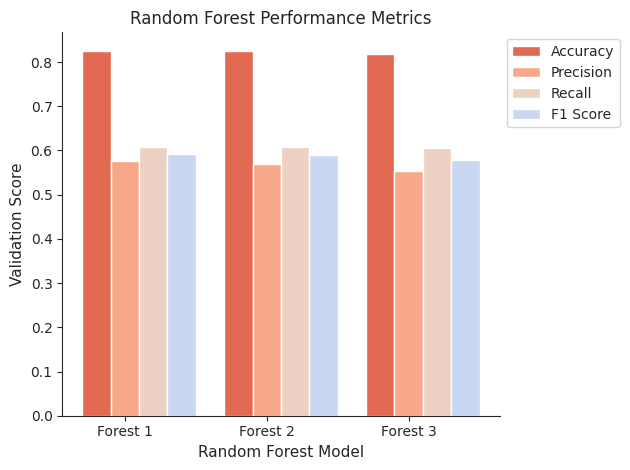

In [879]:
# Visualise key metrics for Random Forest models
accuracy_scores = [accuracy_score_forest_smote,
                   accuracy_score_forest_2,
                   accuracy_score_forest_3]
precision_scores = [precision_score_forest_smote,
                    precision_score_forest_2,
                    precision_score_forest_3]
recall_scores = [recall_score_forest_smote,
                 recall_score_forest_2,
                 recall_score_forest_3]
f1_scores = [f1_score_forest_smote,
             f1_score_forest_2,
             f1_score_forest_3]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart format
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Random Forest Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Random Forest Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["Forest 1", "Forest 2", "Forest 3"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("random_forest_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()

## 4.5 XGBoost (Extreme Gradient Boosting Machines)

In [880]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [881]:
import xgboost as xgb

# Train an XGBoost model with imbalanced data

# Initialise and fit an XGBoost Classifier model
model_xgb = xgb.XGBClassifier(random_state = 42)
model_xgb.fit(x_train_encoded, y_train)

# Make predictions on training set and calculate accuracy
train_pred_xgb = model_xgb.predict(x_train_encoded)
train_accuracy_xgb = accuracy_score(y_train, train_pred_xgb)
print(f"XGBoost Training accuracy: {100 * train_accuracy_xgb:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_xgb = model_xgb.predict(x_val_encoded)
validation_accuracy_xgb = accuracy_score(y_val, validation_pred_xgb)
print(f"XGBoost Validation accuracy: {100 * validation_accuracy_xgb:.2f}%")


XGBoost Training accuracy: 94.98%
XGBoost Validation accuracy: 85.00%


In [882]:
# Train an XGBoost model with SMOTE

# Initialise and train an extreme gradient-boosting model
model_xgb_smote = xgb.XGBClassifier(random_state = 42)
model_xgb_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_xgb_smote = model_xgb_smote.predict(x_train_smote)
train_accuracy_xgb_smote = accuracy_score(y_train_smote, train_pred_xgb_smote)
print(f"XGBoost Training accuracy (SMOTE): {100 * train_accuracy_xgb_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_xgb_smote = model_xgb_smote.predict(x_val_encoded)
validation_accuracy_xgb_smote = accuracy_score(y_val, validation_pred_xgb_smote)
print(f"XGBoost Validation accuracy (SMOTE): {100 * validation_accuracy_xgb_smote:.2f}%")

XGBoost Training accuracy (SMOTE): 95.17%
XGBoost Validation accuracy (SMOTE): 83.45%


In [883]:
# Train an XGBoost model with RandomOverSampling

# Initialise and train an Extreme Gradient Boosting model
model_xgb_ros = xgb.XGBClassifier(random_state = 42)
model_xgb_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_xgb_ros = model_xgb_ros.predict(x_train_ros)
train_accuracy_xgb_ros = accuracy_score(y_train_ros, train_pred_xgb_ros)
print(f"XGBoost Training accuracy (ROS): {100 * train_accuracy_xgb_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_xgb_ros = model_xgb_ros.predict(x_val_encoded)
validation_accuracy_xgb_ros = accuracy_score(y_val, validation_pred_xgb_ros)
print(f"XGBoost Validation accuracy (ROS): {100 * validation_accuracy_xgb_ros:.2f}%")

XGBoost Training accuracy (ROS): 95.65%
XGBoost Validation accuracy (ROS): 82.70%


Perform 10-fold Cross-Validation:

In [884]:
# Use 10-fold Cross-Validation for imbalanced XGBoost model
CV_scores_xgb = cross_val_score(model_xgb,
                                x_train_encoded,
                                y_train,
                                cv = 10,
                                scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_xgb_f1 = cross_val_score(model_xgb,
                                    x_train_encoded,
                                    y_train,
                                    cv = 10,
                                    scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_xgb_recall = cross_val_score(model_xgb,
                                        x_train_encoded,
                                        y_train,
                                        cv = 10,
                                        scoring = "recall")


# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_xgb = CV_scores_xgb.mean()
CV_sd_score_xgb = CV_scores_xgb.std()
CV_mean_score_xgb_f1 = CV_scores_xgb_f1.mean()
CV_sd_score_xgb_f1 = CV_scores_xgb_f1.std()
CV_mean_score_xgb_recall = CV_scores_xgb_recall.mean()
CV_sd_score_xgb_recall = CV_scores_xgb_recall.std()

# Print the results
print(f"XGBoost 10-fold CV mean accuracy: {100 * CV_mean_score_xgb:.4f}%")
print(f"XGBoost 10-fold CV standard deviation: {100 * CV_sd_score_xgb:.4f}%")
print(f"XGBoost 10-fold CV mean f1: {100 * CV_mean_score_xgb_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation: {100 * CV_sd_score_xgb_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall: {100 * CV_mean_score_xgb_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation: {100 * CV_sd_score_xgb_recall:.4f}%")

XGBoost 10-fold CV mean accuracy: 84.9500%
XGBoost 10-fold CV standard deviation: 1.2158%
XGBoost 10-fold CV mean f1: 57.0788%
XGBoost 10-fold CV f1 standard deviation: 3.6163%
XGBoost 10-fold CV mean recall: 48.8238%
XGBoost 10-fold CV recall standard deviation: 3.5723%


In [885]:
# Use 10-fold Cross-Validation for SMOTE XGBoost model
CV_scores_xgb_smote = cross_val_score(model_xgb_smote,
                                      x_train_smote,
                                      y_train_smote,
                                      cv = 10,
                                      scoring = "accuracy")

# Get F1 score
CV_scores_xgb_smote_f1 = cross_val_score(model_xgb_smote,
                                        x_train_smote,
                                        y_train_smote,
                                        cv = 10,
                                        scoring = "f1")

# Get Recall
CV_scores_xgb_smote_recall = cross_val_score(model_xgb_smote,
                                            x_train_smote,
                                            y_train_smote,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_xgb_smote = CV_scores_xgb_smote.mean()
CV_sd_score_xgb_smote = CV_scores_xgb_smote.std()
CV_mean_score_xgb_smote_f1 = CV_scores_xgb_smote_f1.mean()
CV_sd_score_xgb_smote_f1 = CV_scores_xgb_smote_f1.std()
CV_mean_score_xgb_smote_recall = CV_scores_xgb_smote_recall.mean()
CV_sd_score_xgb_smote_recall = CV_scores_xgb_smote_recall.std()

# Print the results
print(f"XGBoost 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_xgb_smote:.4f}%")
print(f"XGBoost 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote:.4f}%")
print(f"XGBoost 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_xgb_smote_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_xgb_smote_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote_recall:.4f}%")

XGBoost 10-fold CV mean accuracy (SMOTE): 87.7760%
XGBoost 10-fold CV standard deviation (SMOTE): 5.3959%
XGBoost 10-fold CV mean f1 (SMOTE): 87.1895%
XGBoost 10-fold CV f1 standard deviation (SMOTE): 6.7119%
XGBoost 10-fold CV mean recall (SMOTE): 86.4980%
XGBoost 10-fold CV recall standard deviation (SMOTE): 11.7229%


In [886]:
# Use 10-fold Cross-Validation for Random OverSampled XGBoost 
CV_scores_xgb_ros = cross_val_score(model_xgb_ros,
                                    x_train_ros,
                                    y_train_ros,
                                    cv = 10,
                                    scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_xgb_ros_f1 = cross_val_score(model_xgb_ros,
                                        x_train_ros,
                                        y_train_ros,
                                        cv = 10,
                                        scoring = "f1")

# Get Recall from 10-fold cross-validation
CV_scores_xgb_ros_recall = cross_val_score(model_xgb_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10,
                                            scoring = "recall")

# Get the mean and sd of the 1o-fold cross-validation scores
CV_mean_score_xgb_ros = CV_scores_xgb_ros.mean()
CV_sd_score_xgb_ros = CV_scores_xgb_ros.std()
CV_mean_score_xgb_ros_f1 = CV_scores_xgb_ros_f1.mean()
CV_sd_score_xgb_ros_f1 = CV_scores_xgb_ros_f1.std()
CV_mean_score_xgb_ros_recall = CV_scores_xgb_ros_recall.mean()
CV_sd_score_xgb_ros_recall = CV_scores_xgb_ros_recall.std()

# Print the results
print(f"XGBoost 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_xgb_ros:.4f}%")
print(f"XGBoost 10-fold CV standard deviation (ROS): {100 * CV_sd_score_xgb_ros:.4f}%")
print(f"XGBoost 10-fold CV mean f1 (ROS): {100 * CV_mean_score_xgb_ros_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_xgb_ros_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall (ROS): {100 * CV_mean_score_xgb_ros_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_xgb_ros_recall:.4f}%")

XGBoost 10-fold CV mean accuracy (ROS): 90.5538%
XGBoost 10-fold CV standard deviation (ROS): 1.2578%
XGBoost 10-fold CV mean f1 (ROS): 90.8854%
XGBoost 10-fold CV f1 standard deviation (ROS): 1.2557%
XGBoost 10-fold CV mean recall (ROS): 94.2551%
XGBoost 10-fold CV recall standard deviation (ROS): 1.8840%


Compare relevant performance metrics:

In [887]:
# Get all relevant performance metrics for model evaluation

# Model 1: Extreme Gradient Boosting with imbalanced data
print(classification_report(y_val, validation_pred_xgb))

# Get the probability estimates of the positive class
y_scores = model_xgb.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using imbalanced data (XGB): {roc_auc}\n")
print(f"XGBoost 10-fold CV mean accuracy: {100 * CV_mean_score_xgb:.4f}%")
print(f"XGBoost 10-fold CV standard deviation: {100 * CV_sd_score_xgb:.4f}%")
print(f"XGBoost 10-fold CV mean f1: {100 * CV_mean_score_xgb_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation: {100 * CV_sd_score_xgb_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall: {100 * CV_mean_score_xgb_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation: {100 * CV_sd_score_xgb_recall:.4f}%")
print()

# Model 2: Extreme Gradient Boosting with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_xgb_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_xgb_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_smote = roc_auc_score(y_val, y_scores_smote)
print(f"ROC score using SMOTE data: {roc_auc_smote}\n")
print(f"XGBoost 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_xgb_smote:.4f}%")
print(f"XGBoost 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote:.4f}%")
print(f"XGBoost 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_xgb_smote_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_xgb_smote_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_xgb_smote_recall:.4f}%")
print()

# Model 3: Extreme Gradient Boosting with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_xgb_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_xgb_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_ros = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data: {roc_auc_ros}\n")
print(f"XGBoost 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_xgb_ros:.4f}%")
print(f"XGBoost 10-fold CV standard deviation (ROS): {100 * CV_sd_score_xgb_ros:.4f}%")
print(f"XGBoost 10-fold CV mean f1 (ROS): {100 * CV_mean_score_xgb_ros_f1:.4f}%")
print(f"XGBoost 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_xgb_ros_f1:.4f}%")
print(f"XGBoost 10-fold CV mean recall (ROS): {100 * CV_mean_score_xgb_ros_recall:.4f}%")
print(f"XGBoost 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_xgb_ros_recall:.4f}%")

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1586
           1       0.69      0.50      0.58       414

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

ROC AUC score using imbalanced data (XGB): 0.846290153578108

XGBoost 10-fold CV mean accuracy: 84.9500%
XGBoost 10-fold CV standard deviation: 1.2158%
XGBoost 10-fold CV mean f1: 57.0788%
XGBoost 10-fold CV f1 standard deviation: 3.6163%
XGBoost 10-fold CV mean recall: 48.8238%
XGBoost 10-fold CV recall standard deviation: 3.5723%

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1586
           1       0.60      0.63      0.61       414

    accuracy                           0.83      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000

ROC score u

Saving figure xgb_roc_curve


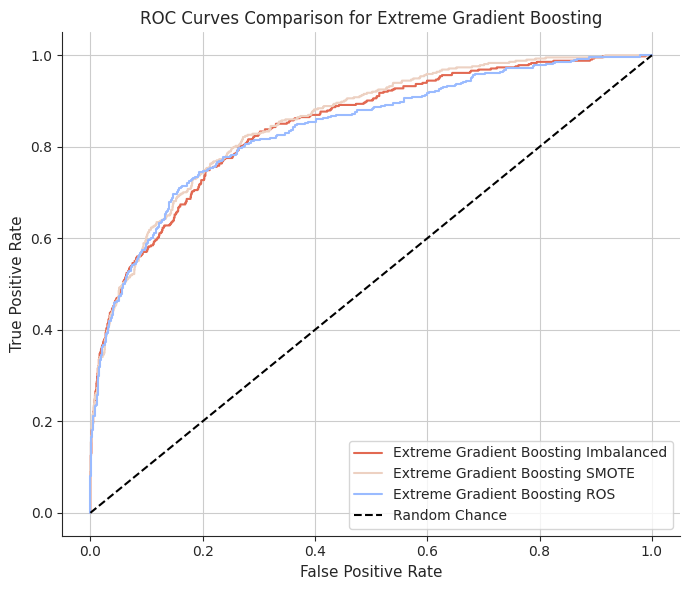

In [888]:
# Plot the ROC curve to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_scores)
fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_xgb_ros, tpr_xgb_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_xgb, 
         tpr_xgb, 
         label = "Extreme Gradient Boosting Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_xgb_smote, 
         tpr_xgb_smote, 
         label = "Extreme Gradient Boosting SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_xgb_ros, 
         tpr_xgb_ros, 
         label = "Extreme Gradient Boosting ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Extreme Gradient Boosting", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("xgb_roc_curve")

# Show the plot
plt.show()

Saving figure xgb_performance_metrics_class_imbalance


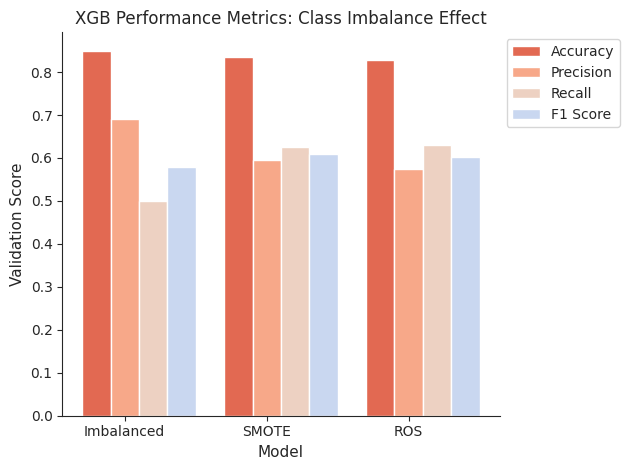

In [889]:
# Save variables for accuracy, precision, recall, and f1 score: XGB with original imbalanced data
accuracy_score_xgb = accuracy_score(y_val, validation_pred_xgb).round(4)
precision_score_xgb = precision_score(y_val, validation_pred_xgb).round(4)
recall_score_xgb = recall_score(y_val, validation_pred_xgb).round(4)
f1_score_xgb = f1_score(y_val, validation_pred_xgb).round(4)

# Save variables for accuracy, precision, recall, and f1 score: XGB with SMOTE dataset
accuracy_score_xgb_smote = accuracy_score(y_val, validation_pred_xgb_smote).round(4)
precision_score_xgb_smote = precision_score(y_val, validation_pred_xgb_smote).round(4)
recall_score_xgb_smote = recall_score(y_val, validation_pred_xgb_smote).round(4)
f1_score_xgb_smote = f1_score(y_val, validation_pred_xgb_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: XGB with ROS dataset
accuracy_score_xgb_ros = accuracy_score(y_val, validation_pred_xgb_ros).round(4)
precision_score_xgb_ros = precision_score(y_val, validation_pred_xgb_ros).round(4)
recall_score_xgb_ros = recall_score(y_val, validation_pred_xgb_ros).round(4)
f1_score_xgb_ros = f1_score(y_val, validation_pred_xgb_ros).round(4)

# Visualise key metrics for Extreme Gradient Boosting models
accuracy_scores = [accuracy_score_xgb,
                   accuracy_score_xgb_smote,
                   accuracy_score_xgb_ros]
precision_scores = [precision_score_xgb,
                    precision_score_xgb_smote,
                    precision_score_xgb_ros]
recall_scores = [recall_score_xgb,
                 recall_score_xgb_smote,
                 recall_score_xgb_ros]
f1_scores = [f1_score_xgb,
             f1_score_xgb_smote,
             f1_score_xgb_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("XGB Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("xgb_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

Comparison of confusion matrixes:

In [890]:
# Model 1: Original imbalanced Extreme Gradient Boosting model
cm_xgb = confusion_matrix(y_val, validation_pred_xgb)
print("\n Validation Confusion Matrix XGB (imbalanced): \n", cm_xgb)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix XGB (imbalanced): \n", confusion_matrix(y_val, validation_pred_xgb, normalize = "all"))

# Model 2: SMOTE resampled Extreme Gradient Boosting model
cm_xgb_smote = confusion_matrix(y_val, validation_pred_xgb_smote)
print("\n Validation Confusion Matrix XGB (SMOTE): \n", cm_xgb_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix XGB (SMOTE): \n", confusion_matrix(y_val, validation_pred_xgb_smote, normalize = "all"))

# Model 3: RandomOverSampled Extreme Gradient Boosting model
cm_xgb_ros = confusion_matrix(y_val, validation_pred_xgb_ros)
print("\n Validation Confusion Matrix XGB (ROS): \n", cm_xgb_ros)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised validation confusion Matrix XGB (ROS): \n", confusion_matrix(y_val, validation_pred_xgb_ros, normalize = "all"))


 Validation Confusion Matrix XGB (imbalanced): 
 [[1493   93]
 [ 207  207]]

 Normalised validation confusion Matrix XGB (imbalanced): 
 [[0.7465 0.0465]
 [0.1035 0.1035]]

 Validation Confusion Matrix XGB (SMOTE): 
 [[1410  176]
 [ 155  259]]

 Normalised validation confusion Matrix XGB (SMOTE): 
 [[0.705  0.088 ]
 [0.0775 0.1295]]

 Validation Confusion Matrix XGB (ROS): 
 [[1393  193]
 [ 153  261]]

 Normalised validation confusion Matrix XGB (ROS): 
 [[0.6965 0.0965]
 [0.0765 0.1305]]


/tmp/ipykernel_72/4159783223.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


Saving figure xgb_confusion_matrix


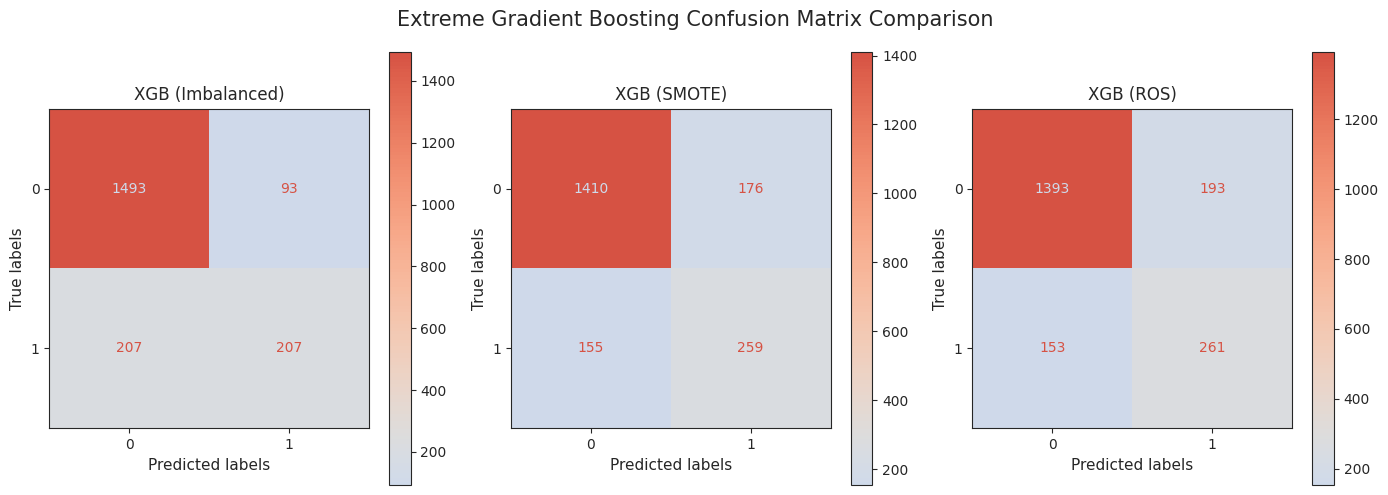

In [891]:
# Also visualise confusion matrix in a plot format for reproductibility 

# Create matplotlib figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise the spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.45 
stop = 0.90 
colors = coolwarm(np.linspace(start, stop, 256)) # define the end and the start of the palette to better represent the data
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix using the original encoded data
cm_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb)
cm_display_xgb.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("XGB (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the SMOTE resampled data
cm_display_xgb_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb_smote)
cm_display_xgb_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("XGB (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the ROS resampled data
cm_display_xgb_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb_ros)
cm_display_xgb_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("XGB (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set main title
fig.suptitle("Extreme Gradient Boosting Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("xgb_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

As a result of the balanced vs imbalanced performance analysis, the ROS dataset will be further used to train the models:

In [892]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_xgb_ros = accuracy_score(y_val, validation_pred_xgb_ros).round(4)
precision_score_xgb_ros = precision_score(y_val, validation_pred_xgb_ros).round(4)
recall_score_xgb_ros= recall_score(y_val, validation_pred_xgb_ros).round(4)
f1_score_xgb_ros = f1_score(y_val, validation_pred_xgb_ros).round(4)

print(f"Accuracy XGBoost (ROS): {accuracy_score_xgb_ros}")
print(f"Precision XGBoost (ROS): {precision_score_xgb_ros}")
print(f"Recal XGBoost (ROS): {recall_score_xgb_ros}")
print(f"F1 score XGBoost (ROS): {f1_score_xgb_ros}")

Accuracy XGBoost (ROS): 0.827
Precision XGBoost (ROS): 0.5749
Recal XGBoost (ROS): 0.6304
F1 score XGBoost (ROS): 0.6014


In [893]:
# Find the most significant variables for the ROS XGBoost
feature_importances_xgb = model_xgb_ros.feature_importances_

# Sort the feature importance in descending order
sorted_idx_xgb = np.argsort(feature_importances_xgb)[::-1]

# Show results
print("Most significant variables for XGBoost (ROS):")
for index in sorted_idx_xgb:
  print(f"{x_train_ros.columns[index]}: {feature_importances_xgb[index]:4f}")

Most significant variables for XGBoost (ROS):
NumOfProducts: 0.255451
Age Group_65+: 0.138403
Age: 0.093568
IsActiveMember: 0.088162
Age Group_45-55: 0.084147
Geography_Germany: 0.066050
Balance: 0.046628
Balance_products_ratio: 0.044042
Geography_Spain: 0.041364
CreditScore: 0.034715
Gender_Male: 0.033724
Age Group_35-45: 0.027425
Age Group_55-65: 0.025160
Age Group_25-35: 0.021163


In [894]:
# While no attributes have a significance of under 0.02, attempt to check if performance changes from feature selection

# Drop the 'Age_Group_25_35' column from trainig and validation sets
x_train_ros_25age = x_train_ros.drop("Age Group_25-35", axis = 1)
x_val_ros_25age = x_val_encoded.drop("Age Group_25-35", axis = 1)

# Initialise and fit an XGBoost Classifier model
model_xgb_2 = xgb.XGBClassifier(learning_rate = 0.3, 
                                n_estimators = 100,
                                max_depth = 6,
                                random_state = 42
                                )
model_xgb_2.fit(x_train_ros_25age, y_train_ros)

# Make predictions on training set and calculate accuracy
train_pred_xgb_2 = model_xgb_2.predict(x_train_ros_25age)
train_accuracy_xgb_2 = accuracy_score(y_train_ros, train_pred_xgb_2)
print(f"2nd XGBoost Training accuracy (ROS): {100 * train_accuracy_xgb_2:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_xgb_2 = model_xgb_2.predict(x_val_ros_25age)
validation_accuracy_xgb_2 = accuracy_score(y_val, validation_pred_xgb_2)
print(f"2nd XGBoost Validation accuracy (ROS): {100 * validation_accuracy_xgb_2:.2f}%")

2nd XGBoost Training accuracy (ROS): 95.54%
2nd XGBoost Validation accuracy (ROS): 82.25%


In [895]:
# Use N-fold Cross-Validation
CV_scores_xgb_2 = cross_val_score(model_xgb_2,
                                  x_train_ros_25age,
                                  y_train_ros,
                                  cv = 10,
                                  scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_xgb_2 = CV_scores_xgb_2.mean()
CV_sd_score_xgb_2 = CV_scores_xgb_2.std()

# Print the results
print(f"2nd XGBoost 10-fold CV mean recall (ROS): {100 * CV_mean_score_xgb_2:.4f}%")
print(f"2nd XGBoost 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_xgb_2:.4f}%")

2nd XGBoost 10-fold CV mean recall (ROS): 93.8775%
2nd XGBoost 10-fold CV recall standard deviation (ROS): 2.2096%


In [896]:
# Check the accuracy, precision, recall, and f1 score
accuracy_score_xgb_2 = accuracy_score(y_val, validation_pred_xgb_2).round(4)
precision_score_xgb_2 = precision_score(y_val, validation_pred_xgb_2).round(4)
recall_score_xgb_2 = recall_score(y_val, validation_pred_xgb_2).round(4)
f1_score_xgb_2 = f1_score(y_val, validation_pred_xgb_2).round(4)

print(f"Accuracy 2nd XGBoost (ROS): {accuracy_score_xgb_2}")
print(f"Precision 2nd XGBoost (ROS): {precision_score_xgb_2}")
print(f"Recal 2nd XGBoost (ROS): {recall_score_xgb_2}")
print(f"Recall 10f CV 2nd XGBoost (ROS): {CV_mean_score_xgb_2:.4f}")
print(f"Recall sd 10f CV 2nd XGBoost (ROS): {CV_sd_score_xgb_2:.4f}")
print(f"F1 score 2nd XGBoost (ROS): {f1_score_xgb_2}")

Accuracy 2nd XGBoost (ROS): 0.8225
Precision 2nd XGBoost (ROS): 0.564
Recal 2nd XGBoost (ROS): 0.628
Recall 10f CV 2nd XGBoost (ROS): 0.9388
Recall sd 10f CV 2nd XGBoost (ROS): 0.0221
F1 score 2nd XGBoost (ROS): 0.5943


In [897]:
# Evaluate the model on validation set
print(classification_report(y_val, validation_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1586
           1       0.56      0.63      0.59       414

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000



In [898]:
# Confusion Matrix for 2nd XGBoost model
cm_xgb_2 = confusion_matrix(y_val, validation_pred_xgb_2)
print("\n Confusion Matrix 2nd XGBoost (ROS): \n", cm_xgb_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 2nd XGBoost (ROS): \n", confusion_matrix(y_val, validation_pred_xgb_2, normalize = "all"))


 Confusion Matrix 2nd XGBoost (ROS): 
 [[1385  201]
 [ 154  260]]

 Normalised confusion Matrix 2nd XGBoost (ROS): 
 [[0.6925 0.1005]
 [0.077  0.13  ]]


In [899]:
# Observe key XGBoost metrics side-by-side to decide whether to continue with feature selection and engineering
print(f"Accuracy 1st XGBoost (ROS): {accuracy_score_xgb_ros}")
print(f"Precision 1st XGBoost (ROS): {precision_score_xgb_ros}")
print(f"Recal 1st XGBoost (ROS): {recall_score_xgb_ros}")
print(f"Recall 10f CV 1st XGBoost (ROS): {CV_mean_score_xgb_ros_recall:.4f}")
print(f"Recall sd 10f CV 1st XGBoost (ROS): {CV_sd_score_xgb_ros_recall:.4f}")
print(f"F1 score 1st XGBoost (ROS): {f1_score_xgb_ros}")
print()

print(f"Accuracy 2nd XGBoost (ROS): {accuracy_score_xgb_2}")
print(f"Precision 2nd XGBoost (ROS): {precision_score_xgb_2}")
print(f"Recal 2nd XGBoost (ROS): {recall_score_xgb_2}")
print(f"Recall 10f CV 2nd XGBoost (ROS): {CV_mean_score_xgb_2:.4f}")
print(f"Recall sd 10f CV 2nd XGBoost (ROS): {CV_sd_score_xgb_2:.4f}")
print(f"F1 score 2nd XGBoost (ROS): {f1_score_xgb_2}")
print()

Accuracy 1st XGBoost (ROS): 0.827
Precision 1st XGBoost (ROS): 0.5749
Recal 1st XGBoost (ROS): 0.6304
Recall 10f CV 1st XGBoost (ROS): 0.9426
Recall sd 10f CV 1st XGBoost (ROS): 0.0188
F1 score 1st XGBoost (ROS): 0.6014

Accuracy 2nd XGBoost (ROS): 0.8225
Precision 2nd XGBoost (ROS): 0.564
Recal 2nd XGBoost (ROS): 0.628
Recall 10f CV 2nd XGBoost (ROS): 0.9388
Recall sd 10f CV 2nd XGBoost (ROS): 0.0221
F1 score 2nd XGBoost (ROS): 0.5943



In [900]:
# Confusion Matrix Observations
print("\n Confusion Matrix: 1st XGB (ROS): \n", cm_xgb_ros)
print("\n Normalised confusion Matrix: 1st XGB: \n", confusion_matrix(y_val, validation_pred_xgb, normalize = "all"))

print("\n Confusion Matrix: 2nd XGB (ROS): \n", cm_xgb_2)
print("\n Normalised confusion Matrix: 2nd XGB: \n", confusion_matrix(y_val, validation_pred_xgb_2, normalize = "all"))


 Confusion Matrix: 1st XGB (ROS): 
 [[1393  193]
 [ 153  261]]

 Normalised confusion Matrix: 1st XGB: 
 [[0.7465 0.0465]
 [0.1035 0.1035]]

 Confusion Matrix: 2nd XGB (ROS): 
 [[1385  201]
 [ 154  260]]

 Normalised confusion Matrix: 2nd XGB: 
 [[0.6925 0.1005]
 [0.077  0.13  ]]


Saving figure best_xgb_performance_metrics


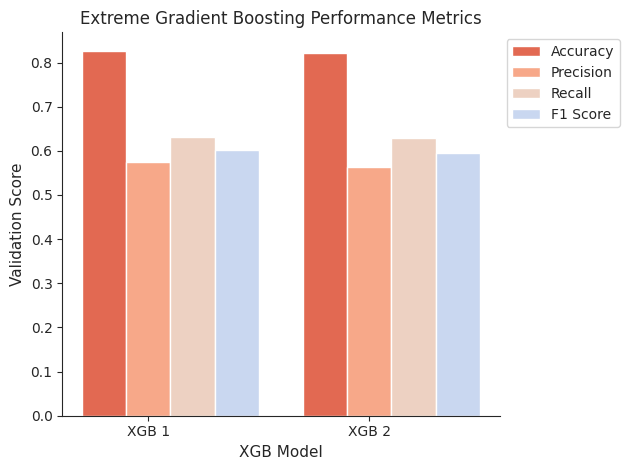

In [901]:
# Visualise key metrics for the two ROS Extreme Gradient Boosting models
accuracy_scores = [accuracy_score_xgb_ros,
                   accuracy_score_xgb_2]
precision_scores = [precision_score_xgb_ros,
                    precision_score_xgb_2]
recall_scores = [recall_score_xgb_ros,
                 recall_score_xgb_2]
f1_scores = [f1_score_xgb_ros,
             f1_score_xgb_2]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("XGB Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Extreme Gradient Boosting Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["XGB 1", "XGB 2"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("best_xgb_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()

## 4.6 Support Vector Classifier (SVC)

In [902]:
# Train and fit a Support Vector Machine model on imbalanced data
model_svc = SVC(probability = True)
model_svc.fit(x_train_encoded, y_train)

# Make predictions on the training set and calculate accuracy
train_pred_svc = model_svc.predict(x_train_encoded)
train_accuracy_svc = accuracy_score(y_train, train_pred_svc)
print(f"SVC Training accuracy: {100 * train_accuracy_svc:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_svc = model_svc.predict(x_val_encoded)
validation_accuracy_svc = accuracy_score(y_val, validation_pred_svc)
print(f"SVC Validation accuracy: {100 * validation_accuracy_svc:.2f}%")

SVC Training accuracy: 84.20%
SVC Validation accuracy: 83.55%


In [903]:
# Try training SVC model on SMOTE data

# Initialise and train a Support Vector Classifier model
model_svc_smote = SVC(probability = True)
model_svc_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_svc_smote = model_svc_smote.predict(x_train_smote)
train_accuracy_svc_smote = accuracy_score(y_train_smote, train_pred_svc_smote)
print(f"SVC Training accuracy (SMOTE): {100 * train_accuracy_svc_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_svc_smote = model_svc_smote.predict(x_val_encoded)
validation_accuracy_svc_smote = accuracy_score(y_val, validation_pred_svc_smote)
print(f"SVC Validation accuracy (SMOTE): {100 * validation_accuracy_svc_smote:.2f}%")

SVC Training accuracy (SMOTE): 77.30%
SVC Validation accuracy (SMOTE): 77.75%


In [904]:
# Try training SVC model on Random OverSampling data

# Initialise and train a Support Vector Classifier model
model_svc_ros = SVC(probability = True)
model_svc_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_svc_ros = model_svc_smote.predict(x_train_ros)
train_accuracy_svc_ros = accuracy_score(y_train_ros, train_pred_svc_ros)
print(f"SVC Training accuracy (ROS): {100 * train_accuracy_svc_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_svc_ros = model_svc_ros.predict(x_val_encoded)
validation_accuracy_svc_ros = accuracy_score(y_val, validation_pred_svc_ros)
print(f"SVC Validation accuracy (ROS): {100 * validation_accuracy_svc_ros:.2f}%")

SVC Training accuracy (ROS): 77.24%
SVC Validation accuracy (ROS): 78.45%


Perform 10-fold Cross Valdiation:

In [905]:
# Use 10-fold Cross-Validation for Imbalanced SVC model
CV_scores_svc = cross_val_score(model_svc,
                                x_train_encoded,
                                y_train,
                                cv = 10, 
                                scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_svc_f1 = cross_val_score(model_svc,
                                    x_train_encoded,
                                    y_train,
                                    cv = 10, 
                                    scoring = "f1")

# Ger Recall from 10-fold cross-validation
CV_scores_svc_recall = cross_val_score(model_svc,
                                        x_train_encoded,
                                        y_train,
                                        cv = 10, 
                                        scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_svc = CV_scores_svc.mean()
CV_sd_score_svc = CV_scores_svc.std()
CV_mean_score_svc_f1 = CV_scores_svc_f1.mean()
CV_sd_score_svc_f1 = CV_scores_svc_f1.std()
CV_mean_score_svc_recall = CV_scores_svc_recall.mean()
CV_sd_score_svc_recall = CV_scores_svc_recall.std()

# Print the results
print(f"SVC 10-fold CV mean accuracy: {100 * CV_mean_score_svc:.4f}%")
print(f"SVC 10-fold CV standard deviation: {100 * CV_sd_score_svc:.4f}%")
print(f"SVC 10-fold CV mean f1: {100 * CV_mean_score_svc_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation: {100 * CV_sd_score_svc_f1:.4f}%")
print(f"SVC 10-fold CV mean recall: {100 * CV_mean_score_svc_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation: {100 * CV_sd_score_svc_recall:.4f}%")

SVC 10-fold CV mean accuracy: 83.5333%
SVC 10-fold CV standard deviation: 0.9713%
SVC 10-fold CV mean f1: 43.7282%
SVC 10-fold CV f1 standard deviation: 3.8946%
SVC 10-fold CV mean recall: 31.2733%
SVC 10-fold CV recall standard deviation: 3.4515%


In [906]:
# Use 10-fold Cross-Validation for SMOTE SVC
CV_scores_svc_smote = cross_val_score(model_svc_smote,
                                      x_train_smote,
                                      y_train_smote,
                                      cv = 10,
                                      scoring = "accuracy")

# Get F1 score from 10-fold cross-validation
CV_scores_svc_smote_f1 = cross_val_score(model_svc_smote,
                                        x_train_smote,
                                        y_train_smote,
                                        cv = 10, 
                                        scoring = "f1")

# Ger Recall from 10-fold cross-validation
CV_scores_svc_smote_recall = cross_val_score(model_svc_smote,
                                            x_train_smote,
                                            y_train_smote,
                                            cv = 10, 
                                            scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_svc_smote = CV_scores_svc_smote.mean()
CV_sd_score_svc_smote = CV_scores_svc_smote.std()
CV_mean_score_svc_smote_f1 = CV_scores_svc_smote_f1.mean()
CV_sd_score_svc_smote_f1 = CV_scores_svc_smote_f1.std()
CV_mean_score_svc_smote_recall = CV_scores_svc_smote_recall.mean()
CV_sd_score_svc_smote_recall = CV_scores_svc_smote_recall.std()

# Print the results
print(f"SVC 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_svc_smote:.4f}%")
print(f"SVC 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_svc_smote:.4f}%")
print(f"SVC 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_svc_smote_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_svc_smote_f1:.4f}%")
print(f"SVC 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_svc_smote_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_svc_smote_recall:.4f}%")

SVC 10-fold CV mean accuracy (SMOTE): 75.9908%
SVC 10-fold CV standard deviation (SMOTE): 1.3309%
SVC 10-fold CV mean f1 (SMOTE): 75.0101%
SVC 10-fold CV f1 standard deviation (SMOTE): 1.2549%
SVC 10-fold CV mean recall (SMOTE): 72.0488%
SVC 10-fold CV recall standard deviation (SMOTE): 1.4224%


In [907]:
# Perform 10-fold Cross-Validation for Random OverSampled SVC
CV_scores_svc_ros = cross_val_score(model_svc_ros,
                                    x_train_ros,
                                    y_train_ros,
                                    cv = 10, 
                                    scoring = "accuracy")

# Get F1 score for 10-fold cross-validation
CV_scores_svc_ros_f1 = cross_val_score(model_svc_ros,
                                        x_train_ros,
                                        y_train_ros,
                                        cv = 10, 
                                        scoring = "f1")

# Ger Recall for 10-fold cross-validation
CV_scores_svc_ros_recall = cross_val_score(model_svc_ros,
                                            x_train_ros,
                                            y_train_ros,
                                            cv = 10, 
                                            scoring = "recall")

# Get the mean and sd of the 10-fold cross-validation scores
CV_mean_score_svc_ros = CV_scores_svc_ros.mean()
CV_sd_score_svc_ros = CV_scores_svc_ros.std()
CV_mean_score_svc_ros_f1 = CV_scores_svc_ros_f1.mean()
CV_sd_score_svc_ros_f1 = CV_scores_svc_ros_f1.std()
CV_mean_score_svc_ros_recall = CV_scores_svc_ros_recall.mean()
CV_sd_score_svc_ros_recall = CV_scores_svc_ros_recall.std()

# Print the results
print(f"SVC 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_svc_ros:.4f}%")
print(f"SVC 10-fold CV standard deviation (ROS): {100 * CV_sd_score_svc_ros:.4f}%")
print(f"SVC 10-fold CV mean f1 (ROS): {100 * CV_mean_score_svc_ros_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_svc_ros_f1:.4f}%")
print(f"SVC 10-fold CV mean recall (ROS): {100 * CV_mean_score_svc_ros_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_svc_ros_recall:.4f}%")

SVC 10-fold CV mean accuracy (ROS): 76.8927%
SVC 10-fold CV standard deviation (ROS): 1.0508%
SVC 10-fold CV mean f1 (ROS): 76.0030%
SVC 10-fold CV f1 standard deviation (ROS): 1.2287%
SVC 10-fold CV mean recall (ROS): 73.2234%
SVC 10-fold CV recall standard deviation (ROS): 2.0249%


Compare most relevant performance metrics:

In [908]:
# Get all relevant performance metrics for model evaluation

# Model 1: Support Vector Classifier with imbalanced data
print(classification_report(y_val, validation_pred_svc))

# Get the probability estimates of the positive class
y_scores = model_svc.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using imbalanced data: {roc_auc}\n")
print(f"SVC 10-fold CV mean accuracy: {100 * CV_mean_score_svc:.4f}%")
print(f"SVC 10-fold CV standard deviation: {100 * CV_sd_score_svc:.4f}%")
print(f"SVC 10-fold CV mean f1: {100 * CV_mean_score_svc_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation: {100 * CV_sd_score_svc_f1:.4f}%")
print(f"SVC 10-fold CV mean recall: {100 * CV_mean_score_svc_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation: {100 * CV_sd_score_svc_recall:.4f}%")
print()

# Model 2: Support Vector Classifier with SMOTE resampled data
# Evaluate the model trained with SMOTE data on validation set
print(classification_report(y_val, validation_pred_svc_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_svc_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_smote = roc_auc_score(y_val, y_scores_smote)
print(f"ROC AUC score using SMOTE data: {roc_auc}\n")
print(f"SVC 10-fold CV mean accuracy (SMOTE): {100 * CV_mean_score_svc_smote:.4f}%")
print(f"SVC 10-fold CV standard deviation (SMOTE): {100 * CV_sd_score_svc_smote:.4f}%")
print(f"SVC 10-fold CV mean f1 (SMOTE): {100 * CV_mean_score_svc_smote_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation (SMOTE): {100 * CV_sd_score_svc_smote_f1:.4f}%")
print(f"SVC 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_svc_smote_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_svc_smote_recall:.4f}%")
print()

# Model 3: Support Vector Classifier with RandomOverSampling resampled data
# Evaluate the model trained with ros data on validation set
print(classification_report(y_val, validation_pred_svc_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_svc_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_ros = roc_auc_score(y_val, y_scores_ros)
print(f"ROC AUC score using ROS data: {roc_auc_ros}\n")
print(f"SVC 10-fold CV mean accuracy (ROS): {100 * CV_mean_score_svc_ros:.4f}%")
print(f"SVC 10-fold CV standard deviation (ROS): {100 * CV_sd_score_svc_ros:.4f}%")
print(f"SVC 10-fold CV mean f1 (ROS): {100 * CV_mean_score_svc_ros_f1:.4f}%")
print(f"SVC 10-fold CV f1 standard deviation (ROS): {100 * CV_sd_score_svc_ros_f1:.4f}%")
print(f"SVC 10-fold CV mean recall (ROS): {100 * CV_mean_score_svc_ros_recall:.4f}%")
print(f"SVC 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_svc_ros_recall:.4f}%")

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1586
           1       0.74      0.32      0.44       414

    accuracy                           0.84      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000

ROC AUC score using imbalanced data: 0.8325170117757432

SVC 10-fold CV mean accuracy: 83.5333%
SVC 10-fold CV standard deviation: 0.9713%
SVC 10-fold CV mean f1: 43.7282%
SVC 10-fold CV f1 standard deviation: 3.8946%
SVC 10-fold CV mean recall: 31.2733%
SVC 10-fold CV recall standard deviation: 3.4515%

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1586
           1       0.47      0.68      0.56       414

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.79      2000

ROC AUC score using SMOTE data: 0.832517

Saving figure svc_roc_curve


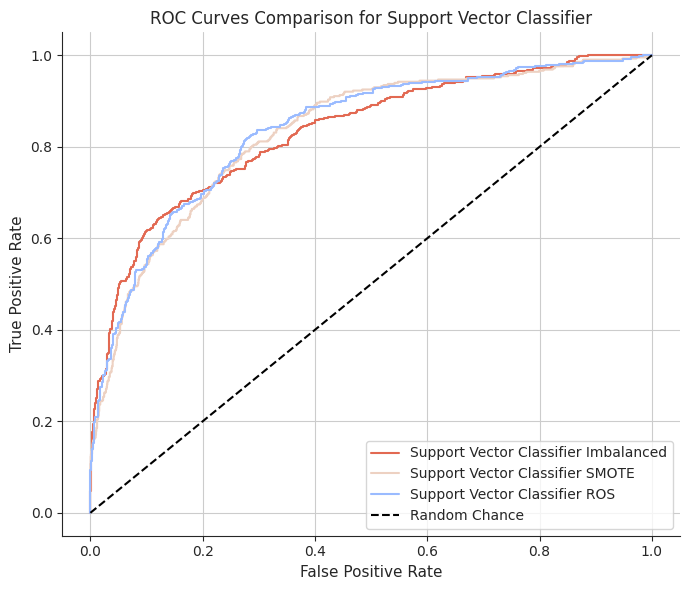

In [909]:
# Plot the ROC curve to observe true positive rate (TP) and false positive rate (FP)

# Calculate the ROC curves by false positives and true positives for all three models
fpr_svc, tpr_svc, _ = roc_curve(y_val, y_scores)
fpr_svc_smote, tpr_svc_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_svc_ros, tpr_svc_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_svc, 
         tpr_svc, 
         label = "Support Vector Classifier Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_svc_smote, 
         tpr_svc_smote, 
         label = "Support Vector Classifier SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_svc_ros, 
         tpr_svc_ros, 
         label = "Support Vector Classifier ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for Support Vector Classifier", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("svc_roc_curve")

# Show the plot
plt.show()

In [910]:
# Compare Confusion Matrix

# Confusion Matrix for imbalaned SVC model
cm_svc = confusion_matrix(y_val, validation_pred_svc)
print("\n Confusion Matrix SVC: \n", cm_svc)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix SVC: \n", confusion_matrix(y_val, validation_pred_svc, normalize = "all"))

# Confusion Matrix for SMOTE trained model
cm_svc_smote = confusion_matrix(y_val, validation_pred_svc_smote)
print("\n Confusion Matrix SVC (SMOTE): \n", cm_svc_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix SVC (SMOTE): \n", confusion_matrix(y_val, validation_pred_svc_smote, normalize = "all"))

# Confusion Matrix for ROS trained model
cm_svc_ros = confusion_matrix(y_val, validation_pred_svc_ros)
print("\n Confusion Matrix SVC (ROS): \n", cm_svc_ros)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix SVC (ROS): \n", confusion_matrix(y_val, validation_pred_svc_ros, normalize = "all"))


 Confusion Matrix SVC: 
 [[1540   46]
 [ 283  131]]

 Normalised confusion Matrix SVC: 
 [[0.77   0.023 ]
 [0.1415 0.0655]]

 Confusion Matrix SVC (SMOTE): 
 [[1274  312]
 [ 133  281]]

 Normalised confusion Matrix SVC (SMOTE): 
 [[0.637  0.156 ]
 [0.0665 0.1405]]

 Confusion Matrix SVC (ROS): 
 [[1286  300]
 [ 131  283]]

 Normalised confusion Matrix SVC (ROS): 
 [[0.643  0.15  ]
 [0.0655 0.1415]]


Saving figure svc_confusion_matrix


/tmp/ipykernel_72/3034032463.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


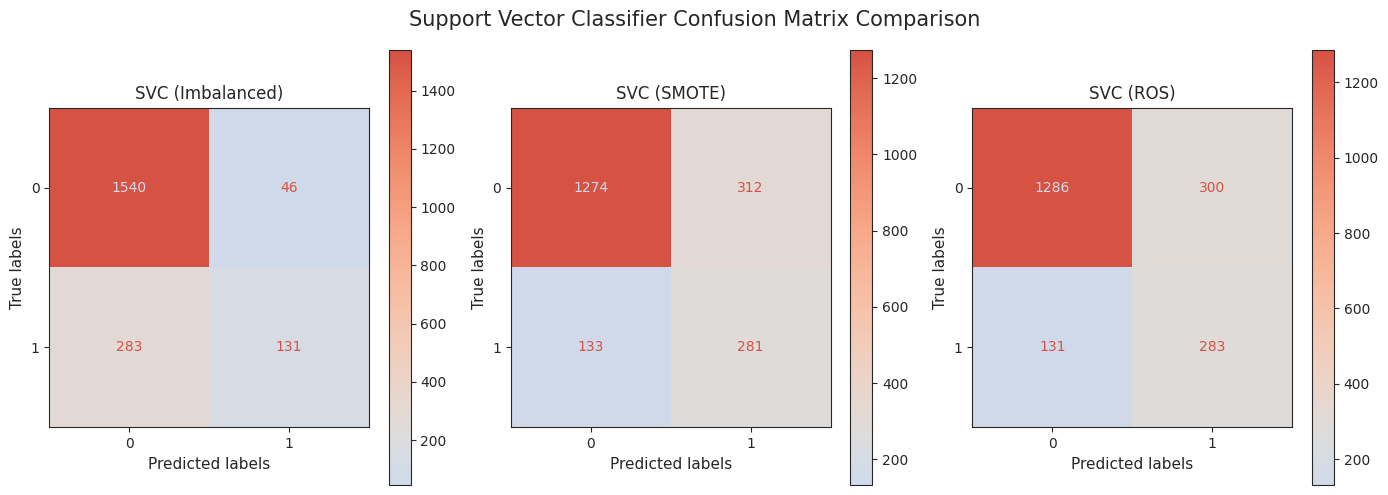

In [911]:
# Also visualise confusion matrix in a plot for reproductibility

# Create matplotlib figure and define the axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise the spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.45 
stop = 0.90
colors = coolwarm(np.linspace(start, stop, 256)) # define start and end of palette for maximum readability based on datat
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix using the imbalanced data
cm_display_svc = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svc)
cm_display_svc.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("SVC (Imbalanced)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the SMOTE resampled data
cm_display_svc_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svc_smote)
cm_display_svc_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("SVC (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the ROS resampled data
cm_display_svc_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svc_ros)
cm_display_svc_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("SVC (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set the main title
fig.suptitle("Support Vector Classifier Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("svc_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

Saving figure svc_performance_metrics_class_imbalance


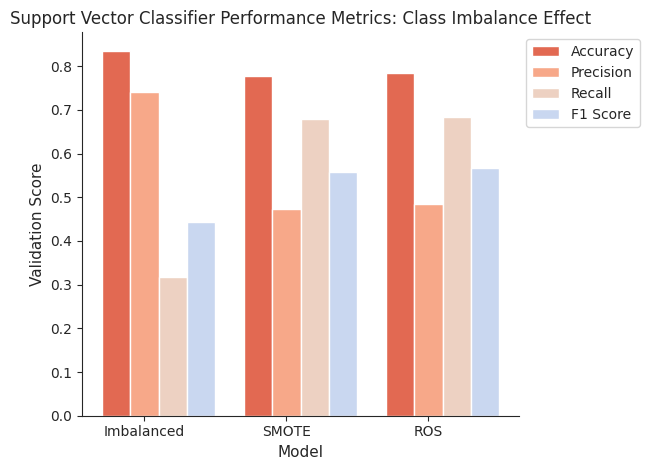

In [912]:
# Save variables for accuracy, precision, recall, and f1 score: SVC with original imbalanced data
accuracy_score_svc = accuracy_score(y_val, validation_pred_svc).round(4)
precision_score_svc = precision_score(y_val, validation_pred_svc).round(4)
recall_score_svc = recall_score(y_val, validation_pred_svc).round(4)
f1_score_svc = f1_score(y_val, validation_pred_svc).round(4)

# Save variables for accuracy, precision, recall, and f1 score: SVC with SMOTE dataset
accuracy_score_svc_smote = accuracy_score(y_val, validation_pred_svc_smote).round(4)
precision_score_svc_smote = precision_score(y_val, validation_pred_svc_smote).round(4)
recall_score_svc_smote = recall_score(y_val, validation_pred_svc_smote).round(4)
f1_score_svc_smote = f1_score(y_val, validation_pred_svc_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: SVC with ROS dataset
accuracy_score_svc_ros = accuracy_score(y_val, validation_pred_svc_ros).round(4)
precision_score_svc_ros = precision_score(y_val, validation_pred_svc_ros).round(4)
recall_score_svc_ros = recall_score(y_val, validation_pred_svc_ros).round(4)
f1_score_svc_ros = f1_score(y_val, validation_pred_svc_ros).round(4)

# Visualise key metrics for SVC models
accuracy_scores = [accuracy_score_svc,
                   accuracy_score_svc_smote,
                   accuracy_score_svc_ros]
precision_scores = [precision_score_svc,
                    precision_score_svc_smote,
                    precision_score_svc_ros]
recall_scores = [recall_score_svc,
                 recall_score_svc_smote,
                 recall_score_svc_ros]
f1_scores = [f1_score_svc,
             f1_score_svc_smote,
             f1_score_svc_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Support Vector Classifier Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("svc_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

From this analysis, one may see the ROS-trained SVC returns the best results in terms of predicting customer churn

In [913]:
# Check the performance metrics for the best performing SVC model
accuracy_score_svc_ros = accuracy_score(y_val, validation_pred_svc_ros).round(4)
precision_score_svc_ros = precision_score(y_val, validation_pred_svc_ros).round(4)
recall_score_svc_ros = recall_score(y_val, validation_pred_svc_ros).round(4)
f1_score_svc_ros = f1_score(y_val, validation_pred_svc_ros).round(4)

print(f"Accuracy score SVC (ROS): {accuracy_score_svc_ros}")
print(f"Precision score SVC (ROS): {precision_score_svc_ros}")
print(f"Recall score SVC (ROS): {recall_score_svc_ros}")
print(f"F1 score SVC (ROS): {f1_score_svc_ros}")

Accuracy score SVC (ROS): 0.7845
Precision score SVC (ROS): 0.4854
Recall score SVC (ROS): 0.6836
F1 score SVC (ROS): 0.5677


In [914]:
# Perform permutation feature importance to see which features are most and least important for SVC ROC
# This may help decide whether to perform feature selection
result = permutation_importance(model_svc_ros, 
                                x_val_encoded,
                                y_val,
                                scoring = 'recall',
                                n_repeats = 30,
                                random_state = 42
                                )

# Get importance and their standard deviations
importances = result.importances_mean
importance_stds = result.importances_std

# Get the feature names
feature_names = x_val_encoded.columns.tolist()

# Print SVC's feature importances
for i, (importance, std, name) in enumerate(zip(importances, importance_stds, feature_names)):
  print(f'SVC Feature {name} Importance = {importance:.3f} +/- {std:.3f}')

SVC Feature Geography_Germany Importance = 0.029 +/- 0.009
SVC Feature Geography_Spain Importance = -0.025 +/- 0.008
SVC Feature Gender_Male Importance = -0.006 +/- 0.009
SVC Feature Age Group_25-35 Importance = -0.021 +/- 0.008
SVC Feature Age Group_35-45 Importance = 0.062 +/- 0.012
SVC Feature Age Group_45-55 Importance = 0.175 +/- 0.012
SVC Feature Age Group_55-65 Importance = 0.067 +/- 0.005
SVC Feature Age Group_65+ Importance = -0.004 +/- 0.004
SVC Feature CreditScore Importance = -0.001 +/- 0.004
SVC Feature Age Importance = -0.013 +/- 0.008
SVC Feature Balance Importance = -0.043 +/- 0.008
SVC Feature NumOfProducts Importance = 0.049 +/- 0.013
SVC Feature IsActiveMember Importance = 0.021 +/- 0.010
SVC Feature Balance_products_ratio Importance = 0.022 +/- 0.010


In [915]:
# Attempt to perform feature selection by dropping the least significant attributes

# Drop the 'CreditScore' and 'Age Group_65+' columns from trainig and validation sets
x_train_ros_credit65 = x_train_ros.drop(["Age Group_65+", "CreditScore"], axis = 1)
x_val_ros_credit65 = x_val_encoded.drop(["Age Group_65+", "CreditScore"], axis = 1)

# Initialise and fit an SVC model
model_svc_2 = SVC(probability = True)
model_svc_2.fit(x_train_ros_credit65, y_train_ros)

# Make predictions on training set and calculate accuracy
train_pred_svc_2 = model_svc_2.predict(x_train_ros_credit65)
train_accuracy_svc_2 = accuracy_score(y_train_ros, train_pred_svc_2)
print(f"2nd SVC Training accuracy (ROS): {100 * train_accuracy_svc_2:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_svc_2 = model_svc_2.predict(x_val_ros_credit65)
validation_accuracy_svc_2 = accuracy_score(y_val, validation_pred_svc_2)
print(f"2nd SVC Validation accuracy (ROS): {100 * validation_accuracy_svc_2:.2f}%")

2nd SVC Training accuracy (ROS): 77.61%
2nd SVC Validation accuracy (ROS): 78.45%


In [916]:
# Check the performance metrics after performing feature selection to observe changes
accuracy_score_svc_ros_2 = accuracy_score(y_val, validation_pred_svc_2).round(4)
precision_score_svc_ros_2 = precision_score(y_val, validation_pred_svc_2).round(4)
recall_score_svc_ros_2 = recall_score(y_val, validation_pred_svc_2).round(4)
f1_score_svc_ros_2 = f1_score(y_val, validation_pred_svc_2).round(4)

print(f"Accuracy score 2nd SVC (ROC): {accuracy_score_svc_ros_2}")
print(f"Precision score 2nd SVC (ROC): {precision_score_svc_ros_2}")
print(f"Recall score 2nd SVC (ROC): {recall_score_svc_ros_2}")
print(f"F1 score 2nd SVC (ROC): {f1_score_svc_ros_2}")

Accuracy score 2nd SVC (ROC): 0.7845
Precision score 2nd SVC (ROC): 0.4856
Recall score 2nd SVC (ROC): 0.6908
F1 score 2nd SVC (ROC): 0.5703


In [917]:
# Confusion Matrix for SVC ROC model after dropping 2 features
cm_svc_2 = confusion_matrix(y_val, validation_pred_svc_2)
print("\n Confusion Matrix 2nd SVC (ROC): \n", cm_svc_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 2nd SVC (ROC): \n", confusion_matrix(y_val, validation_pred_svc_2, normalize = "all"))


 Confusion Matrix 2nd SVC (ROC): 
 [[1283  303]
 [ 128  286]]

 Normalised confusion Matrix 2nd SVC (ROC): 
 [[0.6415 0.1515]
 [0.064  0.143 ]]


In [918]:
# Second attempt at feature selection: dropping the next least significant variables

# Drop the 'Gender_Male' columns from trainig and validation sets
x_train_ros_male = x_train_ros.drop(["Gender_Male"], axis = 1)
x_val_ros_male = x_val_encoded.drop(["Gender_Male"], axis = 1)

# Initialise and fit an SVC model
model_svc_3 = SVC(probability = True)
model_svc_3.fit(x_train_ros_male, y_train_ros)

# Make predictions on training set and calculate accuracy
train_pred_svc_3 = model_svc_3.predict(x_train_ros_male)
train_accuracy_svc_3 = accuracy_score(y_train_ros, train_pred_svc_3)
print(f"3rd SVC Training accuracy (ROS): {100 * train_accuracy_svc_3:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_svc_3 = model_svc_3.predict(x_val_ros_male)
validation_accuracy_svc_3 = accuracy_score(y_val, validation_pred_svc_3)
print(f"3rd SVC Validation accuracy (ROS): {100 * validation_accuracy_svc_3:.2f}%")

3rd SVC Training accuracy (ROS): 77.42%
3rd SVC Validation accuracy (ROS): 77.45%


In [919]:
# Check the performance metrics after performing feature selection to observe changes
accuracy_score_svc_ros_3 = accuracy_score(y_val, validation_pred_svc_3).round(4)
precision_score_svc_ros_3 = precision_score(y_val, validation_pred_svc_3).round(4)
recall_score_svc_ros_3 = recall_score(y_val, validation_pred_svc_3).round(4)
f1_score_svc_ros_3 = f1_score(y_val, validation_pred_svc_3).round(4)

print(f"Accuracy score 3rd SVC (ROS): {accuracy_score_svc_ros_3}")
print(f"Precision score 3rd SVC (ROS): {precision_score_svc_ros_3}")
print(f"Recall score 3rd SVC (ROS): {recall_score_svc_ros_3}")
print(f"F1 score 2nd 3rd (ROS): {f1_score_svc_ros_3}")

Accuracy score 3rd SVC (ROS): 0.7745
Precision score 3rd SVC (ROS): 0.4715
Recall score 3rd SVC (ROS): 0.7391
F1 score 2nd 3rd (ROS): 0.5757


In [920]:
# Confusion Matrix for SVC ROC model after dropping 2 features
cm_svc_3 = confusion_matrix(y_val, validation_pred_svc_3)
print("\n Confusion Matrix 3rd SVC (ROs): \n", cm_svc_3)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 3rd SVC (ROS): \n", confusion_matrix(y_val, validation_pred_svc_3, normalize = "all"))


 Confusion Matrix 3rd SVC (ROs): 
 [[1243  343]
 [ 108  306]]

 Normalised confusion Matrix 3rd SVC (ROS): 
 [[0.6215 0.1715]
 [0.054  0.153 ]]


Saving figure svc_performance_metrics_class_imbalance


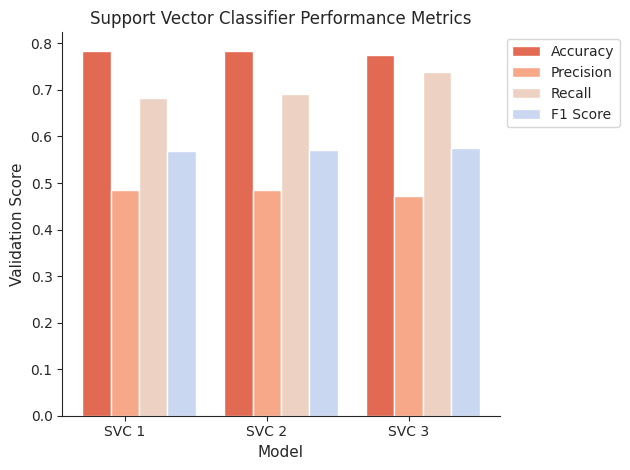

In [921]:
# Visualise key metrics for SVC models
accuracy_scores = [accuracy_score_svc_ros,
                   accuracy_score_svc_ros_2,
                   accuracy_score_svc_ros_3]
precision_scores = [precision_score_svc_ros,
                    precision_score_svc_ros_2,
                    precision_score_svc_ros_3]
recall_scores = [recall_score_svc_ros,
                 recall_score_svc_ros_2,
                 recall_score_svc_ros_3]
f1_scores = [f1_score_svc_ros,
             f1_score_svc_ros_2,
             f1_score_svc_ros_3]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("Support Vector Classifier Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["SVC 1", "SVC 2", "SVC 3"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("svc_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

SVC 3 is the best performing SVC model in terms of predicting customer churn

## 4.7 K-Nearest Neighbors (KNN)

In [922]:
from sklearn.neighbors import KNeighborsClassifier

# Initialise and train a KNN model on imbalanced data
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_encoded, y_train)

# Make predictions on training set and calculate accuracy
train_pred_knn = model_knn.predict(x_train_encoded)
train_accuracy_knn = accuracy_score(y_train, train_pred_knn)
print(f"KNN Training accuracy: {100 * train_accuracy_knn:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_knn = model_knn.predict(x_val_encoded)
validation_accuracy_knn = accuracy_score(y_val, validation_pred_knn)
print(f"KNN Validation accuracy: {100 * validation_accuracy_knn:.2f}%")

KNN Training accuracy: 87.87%
KNN Validation accuracy: 83.85%


In [923]:
# Train a KNN model on the SMOTE data

# Initialise and train a K-Nearest Neighbors model
model_knn_smote = KNeighborsClassifier()
model_knn_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the training set and calculate accuracy
train_pred_knn_smote = model_knn_smote.predict(x_train_smote)
train_accuracy_knn_smote = accuracy_score(y_train_smote, train_pred_knn_smote)
print(f"K-Nearest Neighbors Training accuracy (SMOTE): {100 * train_accuracy_knn_smote:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_knn_smote = model_knn_smote.predict(x_val_encoded)
validation_accuracy_knn_smote = accuracy_score(y_val, validation_pred_knn_smote)
print(f"K-Nearest Neighbors Validation accuracy (SMOTE): {100 * validation_accuracy_knn_smote:.2f}%")

K-Nearest Neighbors Training accuracy (SMOTE): 89.14%
K-Nearest Neighbors Validation accuracy (SMOTE): 77.55%


In [924]:
# Train a KNN model on the Random Oversampling data

# Initialise and train a K-Nearest Neighbors model
model_knn_ros = KNeighborsClassifier()
model_knn_ros.fit(x_train_ros, y_train_ros)

# Make predictions on the training set and calculate accuracy
train_pred_knn_ros = model_knn_ros.predict(x_train_ros)
train_accuracy_knn_ros = accuracy_score(y_train_ros, train_pred_knn_ros)
print(f"K-Nearest Neighbors Training accuracy (ROS): {100 * train_accuracy_knn_ros:.2f}%")

# Make predictions on the validation set and calculate accuracy
validation_pred_knn_ros = model_knn_ros.predict(x_val_encoded)
validation_accuracy_knn_ros = accuracy_score(y_val, validation_pred_knn_ros)
print(f"K-Nearest Neighbors Validation accuracy (SMOTE): {100 * validation_accuracy_knn_ros:.2f}%")

K-Nearest Neighbors Training accuracy (ROS): 89.75%
K-Nearest Neighbors Validation accuracy (SMOTE): 75.10%


Check for 10-fold Cross-Validation:

In [925]:
# Use 10-fold Cross-Validation for Imbalanced KNN
CV_scores_knn = cross_val_score(model_knn,
                                x_train_encoded,
                                y_train,
                                cv = 10, 
                                scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_recall_score_knn = CV_scores_knn.mean()
CV_sd_recall_score_knn = CV_scores_knn.std()

# Print the results
print(f"KNN 10-fold CV mean recall: {100 * CV_mean_recall_score_knn:.4f}%")
print(f"KNN 10-fold CV recall standard deviation: {100 * CV_sd_recall_score_knn:.4f}%")

KNN 10-fold CV mean recall: 42.3230%
KNN 10-fold CV recall standard deviation: 5.1180%


In [926]:
# Use 10-fold Cross-Validation on SMOTE KNN
CV_scores_knn_smote = cross_val_score(model_knn_smote,
                                      x_train_smote,
                                      y_train_smote,
                                      cv = 10,
                                      scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_knn_smote = CV_scores_knn_smote.mean()
CV_sd_score_knn_smote = CV_scores_knn_smote.std()

# Print the results
print(f"KNN 10-fold CV mean recall (SMOTE): {100 * CV_mean_score_knn_smote:.4f}%")
print(f"KNN 10-fold CV recall standard deviation (SMOTE): {100 * CV_sd_score_knn_smote:.4f}%")

KNN 10-fold CV mean recall (SMOTE): 86.9997%
KNN 10-fold CV recall standard deviation (SMOTE): 2.5865%


In [927]:
# Use 10-fold Cross-Validation on Random Oversampling KNN
CV_scores_knn_ros = cross_val_score(model_knn_ros,
                                      x_train_ros,
                                      y_train_ros,
                                      cv = 10,
                                      scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_knn_ros = CV_scores_knn_ros.mean()
CV_sd_score_knn_ros = CV_scores_knn_ros.std()

# Print the results
print(f"KNN 10-fold CV mean recall (ROS): {100 * CV_mean_score_knn_ros:.4f}%")
print(f"KNN 10-fold CV recall standard deviation (ROS): {100 * CV_sd_score_knn_ros:.4f}%")

KNN 10-fold CV mean recall (ROS): 91.6124%
KNN 10-fold CV recall standard deviation (ROS): 2.3007%


Compare relevant performance metrics:

In [928]:
# Get all relevant performance metrics for model evaluation

# Model 1: K-Nearest Neighbors with imbalanced data
print(classification_report(y_val, validation_pred_knn))

# Get the probability estimates of the positive class
y_scores = model_knn.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_val, y_scores)
print(f"ROC AUC score using encoded data KNN): {roc_auc}\n")
print(f"KNN 10-fold CV mean recall: {CV_mean_recall_score_knn:.4f}")
print(f"KNN 10-fold CV recall standard deviation: {CV_sd_recall_score_knn:.4f}")
print()

# Model 2: K-Nearest Neighbors with SMOTE resampled data
print(classification_report(y_val, validation_pred_knn_smote))

# Get the probability estimates of the positive class
y_scores_smote = model_knn_smote.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_smote = roc_auc_score(y_val, y_scores_smote)
print(f"ROC-AUC score using SMOTE data (KNN): {roc_auc_smote}\n")
print(f"KNN 10-fold CV mean recall (SMOTE): {CV_mean_score_knn_smote:.4f}")
print(f"KNN 10-fold CV recall standard deviation (SMOTE): {CV_sd_score_knn_smote:.4f}")
print()

# Model 3: K-Nearest Neighbors with RandomOverSampling resampled data
print(classification_report(y_val, validation_pred_knn_ros))

# Get the probability estimates of the positive class
y_scores_ros = model_knn_ros.predict_proba(x_val_encoded)[:,1]

# Compute the ROC-AUC score
roc_auc_ros = roc_auc_score(y_val, y_scores_ros)
print(f"ROC-AUC score using ROS data (SVC): {roc_auc_ros}\n")
print(f"KNN 10-fold CV mean recall (ROS): {CV_mean_score_knn_ros:.4f}")
print(f"KNN 10-fold CV recall standard deviation (ROS): {CV_sd_score_knn_ros:.4f}")

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1586
           1       0.66      0.45      0.54       414

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.82      0.84      0.83      2000

ROC AUC score using encoded data KNN): 0.8039137745124916

KNN 10-fold CV mean recall: 0.4232
KNN 10-fold CV recall standard deviation: 0.0512

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1586
           1       0.47      0.68      0.56       414

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.79      2000

ROC-AUC score using SMOTE data (KNN): 0.8034858148899489

KNN 10-fold CV mean recall (SMOTE): 0.8700
KNN 10-fold CV recall standard deviation (SMOTE): 0.0259

              precision    recall  f1-score

Saving figure knn_roc_curve


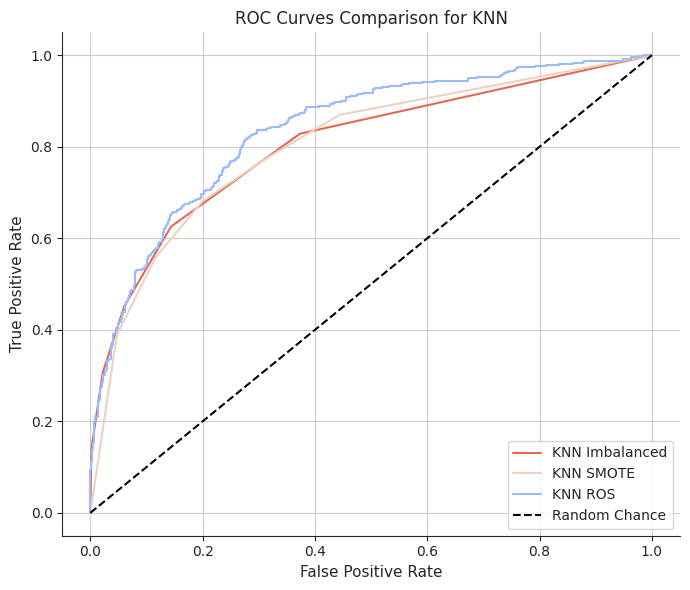

In [929]:
# Calculate the ROC curves by false positives and true positives for all three models
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_scores)
fpr_knn_smote, tpr_knn_smote, _ = roc_curve(y_val, y_scores_smote)
fpr_knn_ros, tpr_knn_ros, _ = roc_curve(y_val, y_scores_ros)

# Plot the ROC curves which show the trade-off between TP and FP
plt.figure(figsize = (7, 6)) # Define the figure size
plt.plot(fpr_knn, 
         tpr_knn, 
         label = "KNN Imbalanced", 
         color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_knn_smote, 
         tpr_knn_smote, 
         label = "KNN SMOTE", 
         color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_svc_ros, 
         tpr_svc_ros, 
         label = "KNN ROS", 
         color = sns.color_palette("coolwarm_r")[4])
plt.plot([0, 1], [0, 1], "k--", label = "Random Chance")

# Set the title, labels, and legend
plt.title("ROC Curves Comparison for KNN", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.grid(True)

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("knn_roc_curve")

# Show the plot
plt.show()

Saving figure knn_performance_metrics_class_imbalance


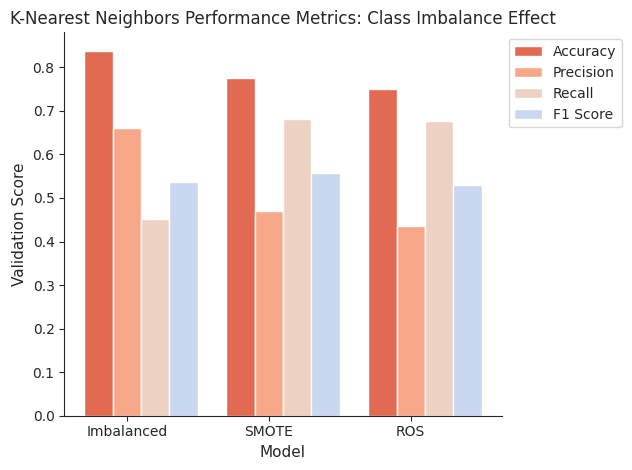

In [930]:
# Save variables for accuracy, precision, recall, and f1 score: KNN with original encoded dataset
accuracy_score_knn = accuracy_score(y_val, validation_pred_knn).round(4)
precision_score_knn = precision_score(y_val, validation_pred_knn).round(4)
recall_score_knn = recall_score(y_val, validation_pred_knn).round(4)
f1_score_knn = f1_score(y_val, validation_pred_knn).round(4)

# Save variables for accuracy, precision, recall, and f1 score: KNN with SMOTE dataset
accuracy_score_knn_smote = accuracy_score(y_val, validation_pred_knn_smote).round(4)
precision_score_knn_smote = precision_score(y_val, validation_pred_knn_smote).round(4)
recall_score_knn_smote = recall_score(y_val, validation_pred_knn_smote).round(4)
f1_score_knn_smote = f1_score(y_val, validation_pred_knn_smote).round(4)

# Save variables for accuracy, precision, recall, and f1 score: KNN with ROS dataset
accuracy_score_knn_ros = accuracy_score(y_val, validation_pred_knn_ros).round(4)
precision_score_knn_ros = precision_score(y_val, validation_pred_knn_ros).round(4)
recall_score_knn_ros = recall_score(y_val, validation_pred_knn_ros).round(4)
f1_score_knn_ros = f1_score(y_val, validation_pred_knn_ros).round(4)

# Visualise key metrics for K-Nearest Neighbors models
accuracy_scores = [accuracy_score_knn,
                   accuracy_score_knn_smote,
                   accuracy_score_knn_ros]
precision_scores = [precision_score_knn,
                    precision_score_knn_smote,
                    precision_score_knn_ros]
recall_scores = [recall_score_knn,
                 recall_score_knn_smote,
                 recall_score_knn_ros]
f1_scores = [f1_score_knn,
             f1_score_knn_smote,
             f1_score_knn_ros]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("K-Nearest Neighbors Performance Metrics: Class Imbalance Effect", fontsize = 12)
plt.xticks(index + bar_width, ["Imbalanced", "SMOTE", "ROS"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("knn_performance_metrics_class_imbalance")

# Display the plot
plt.tight_layout()
plt.show()

In [931]:
# Model 1: Confusion matrix KNN with imbalanced data
cm_knn = confusion_matrix(y_val, validation_pred_knn)
print("\n Confusion Matrix KNN: \n", cm_knn)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix KNN: \n", confusion_matrix(y_val, validation_pred_knn, normalize = "all"))

# Model 2: KNN with SMOTE resampled data
# Confusion Matrix
cm_knn_smote = confusion_matrix(y_val, validation_pred_knn_smote)
print("\n Confusion Matrix KNN (SMOTE): \n", cm_knn_smote)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix KNN (SMOTE): \n", confusion_matrix(y_val, validation_pred_knn_smote, normalize = "all"))

# Model 3: KNN with RandomOverSampled data
# Confusion Matrix
cm_knn_ros = confusion_matrix(y_val, validation_pred_knn_ros)
print("\n Confusion Matrix KNN (ROS): \n", cm_knn_ros)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix KNN (ROS): \n", confusion_matrix(y_val, validation_pred_knn_ros, normalize = "all"))


 Confusion Matrix KNN: 
 [[1490   96]
 [ 227  187]]

 Normalised confusion Matrix KNN: 
 [[0.745  0.048 ]
 [0.1135 0.0935]]

 Confusion Matrix KNN (SMOTE): 
 [[1269  317]
 [ 132  282]]

 Normalised confusion Matrix KNN (SMOTE): 
 [[0.6345 0.1585]
 [0.066  0.141 ]]

 Confusion Matrix KNN (ROS): 
 [[1222  364]
 [ 134  280]]

 Normalised confusion Matrix KNN (ROS): 
 [[0.611 0.182]
 [0.067 0.14 ]]


Saving figure knn_confusion_matrix


/tmp/ipykernel_72/2522323005.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap("coolwarm")


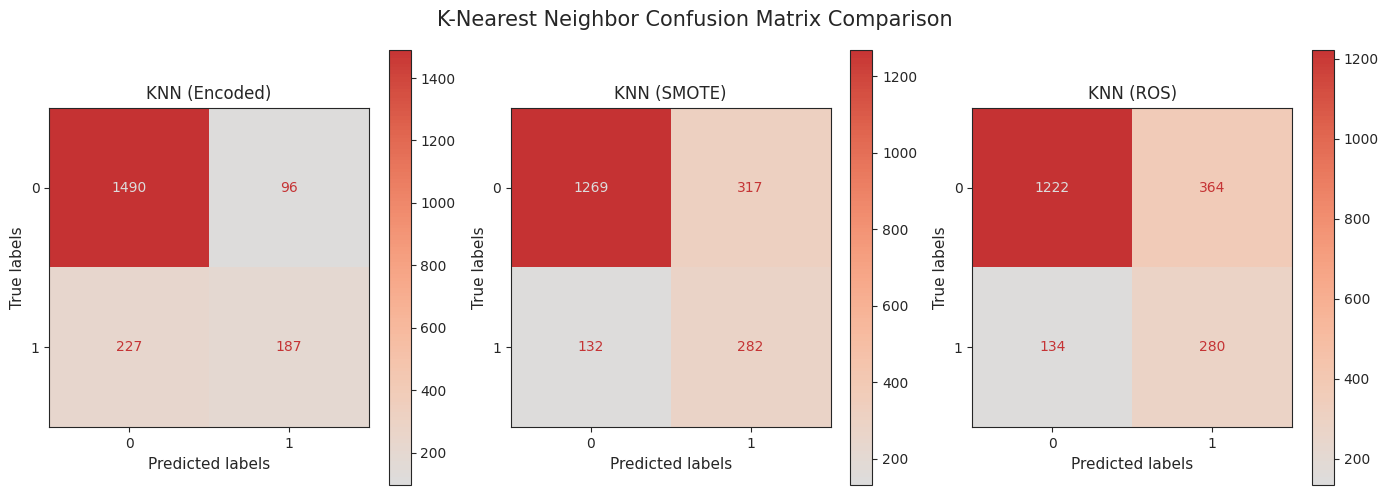

In [932]:
# Also create a plot for confusion matrix for reproductibility

# Create matplotlib figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))

# Get the 'coolwarm' colormap and customise he spectrum
coolwarm = plt.cm.get_cmap("coolwarm")
start = 0.50 
stop = 0.95
colors = coolwarm(np.linspace(start, stop, 256)) # define the start and end of colour palette so that it reads well
new_cmap = mcolors.LinearSegmentedColormap.from_list("upper_coolwarm", colors)

# Plot the confusion matrix using the original imbalanced data
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
cm_display_knn.plot(ax = ax1, cmap = new_cmap)
ax1.set_title("KNN (Encoded)", fontsize = 12)
ax1.set_xlabel("Predicted labels", fontsize = 11)
ax1.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the SMOTE resampled data
cm_display_knn_smote = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_smote)
cm_display_knn_smote.plot(ax = ax2, cmap = new_cmap)
ax2.set_title("KNN (SMOTE)", fontsize = 12)
ax2.set_xlabel("Predicted labels", fontsize = 11)
ax2.set_ylabel("True labels", fontsize = 11)

# Plot the confusion matrix using the ROS resampled data
cm_display_knn_ros = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_ros)
cm_display_knn_ros.plot(ax = ax3, cmap = new_cmap)
ax3.set_title("KNN (ROS)", fontsize = 12)
ax3.set_xlabel("Predicted labels", fontsize = 11)
ax3.set_ylabel("True labels", fontsize = 11)

# Set main title
fig.suptitle("K-Nearest Neighbor Confusion Matrix Comparison", fontsize = 15)

# Save the figure
save_fig("knn_confusion_matrix")

# Display the plot
plt.tight_layout()
plt.show()

Hence, from this analysis, one may see the ROS trained KNN model slighly outperforms SMOTE and is thus the optimal choice for predicting churn.

In [933]:
# Check the performance metrics for the best performing simple KNN model
accuracy_score_knn_ros = accuracy_score(y_val, validation_pred_knn_ros).round(4)
precision_score_knn_ros = precision_score(y_val, validation_pred_knn_ros).round(4)
recall_score_knn_ros = recall_score(y_val, validation_pred_knn_ros).round(4)
f1_score_knn_ros = f1_score(y_val, validation_pred_knn_ros).round(4)

print(f"Accuracy score KNN (ROS): {accuracy_score_knn_ros}")
print(f"Precision score KNN (ROS): {precision_score_knn_ros}")
print(f"Recall score KNN (ROS): {recall_score_knn_ros}")
print(f"F1 score score KNN (ROS): {f1_score_knn_ros}")

Accuracy score KNN (ROS): 0.751
Precision score KNN (ROS): 0.4348
Recall score KNN (ROS): 0.6763
F1 score score KNN (ROS): 0.5293


In [934]:
# Perform permutation feature importance to see which features are most and least important
result = permutation_importance(model_knn_ros,
                                x_val_encoded,
                                y_val,
                                scoring = "recall",
                                n_repeats = 30, 
                                random_state = 42
                                )

# Get the importances and their standard deviations
importances = result.importances_mean
importance_stds = result.importances_std

# Get the feature names
feature_names = x_val_encoded.columns.tolist()

# Print the feature importances
for i, (importance, std, name) in enumerate(zip(importances, importance_stds, feature_names)):
  print(f'KNN Feature {name} Importance = {importance:.3f} +/- {std:.3f}')


KNN Feature Geography_Germany Importance = 0.053 +/- 0.009
KNN Feature Geography_Spain Importance = 0.016 +/- 0.009
KNN Feature Gender_Male Importance = 0.021 +/- 0.013
KNN Feature Age Group_25-35 Importance = -0.003 +/- 0.009
KNN Feature Age Group_35-45 Importance = 0.079 +/- 0.011
KNN Feature Age Group_45-55 Importance = 0.162 +/- 0.007
KNN Feature Age Group_55-65 Importance = 0.066 +/- 0.004
KNN Feature Age Group_65+ Importance = 0.006 +/- 0.001
KNN Feature CreditScore Importance = -0.018 +/- 0.014
KNN Feature Age Importance = -0.012 +/- 0.012
KNN Feature Balance Importance = 0.024 +/- 0.014
KNN Feature NumOfProducts Importance = 0.132 +/- 0.018
KNN Feature IsActiveMember Importance = 0.015 +/- 0.011
KNN Feature Balance_products_ratio Importance = 0.014 +/- 0.016


In [935]:
# Perform feature selection by dropping the two least significant features i.e., 'Age Group_25-35' and 'Age'

# Drop the columns from training and validation sets
x_train_ros_25age = x_train_ros.drop(["Age", "Age Group_25-35"], axis = 1)
x_val_ros_25age = x_val_encoded.drop(["Age", "Age Group_25-35"], axis = 1)

# Initialise and fit a KNN model
model_knn_2 = KNeighborsClassifier()
model_knn_2.fit(x_train_ros_25age, y_train_ros)

# Make predictions on training set and calculate accuracy
train_pred_knn_2 = model_knn_2.predict(x_train_ros_25age)
train_accuracy_knn_2 = accuracy_score(y_train_ros, train_pred_knn_2)
print(f"2nd KNN Training accuracy (ROS): {100 * train_accuracy_knn_2:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_knn_2 = model_knn_2.predict(x_val_ros_25age)
validation_accuracy_knn_2 = accuracy_score(y_val, validation_pred_knn_2)
print(f"2nd KNN Validation accuracy (ROS): {100 * validation_accuracy_knn_2:.2f}%")

2nd KNN Training accuracy (ROS): 89.64%
2nd KNN Validation accuracy (ROS): 75.30%


In [936]:
# Get the key performance metrics for model comparison
accuracy_score_knn_ros_2 = accuracy_score(y_val, validation_pred_knn_2).round(4)
precision_score_knn_ros_2 = precision_score(y_val, validation_pred_knn_2).round(4)
recall_score_knn_ros_2 = recall_score(y_val, validation_pred_knn_2).round(4)
f1_score_knn_ros_2 = f1_score(y_val, validation_pred_knn_2).round(4)

print(f"Accuracy score 2nd KNN (ROS): {accuracy_score_knn_ros_2}")
print(f"Precision score 2nd KNN (ROS): {precision_score_knn_ros_2}")
print(f"Recall score 2nd KNN (ROS): {recall_score_knn_ros_2}")
print(f"F1 score 2nd KNN (ROS): {f1_score_knn_ros_2}")

Accuracy score 2nd KNN (ROS): 0.753
Precision score 2nd KNN (ROS): 0.4392
Recall score 2nd KNN (ROS): 0.6981
F1 score 2nd KNN (ROS): 0.5392


In [937]:
# Confusion Matrix
cm_knn_ros_2 = confusion_matrix(y_val, validation_pred_knn_2)
print("\n Confusion Matrix 2nd KNN (ROS): \n", cm_knn_ros_2)

# Normalise confusion matrix to explore percentages (adapted from Murel, 2024)
print("\n Normalised confusion Matrix 2nd KNN (ROS): \n", confusion_matrix(y_val, validation_pred_knn_2, normalize = "all"))



 Confusion Matrix 2nd KNN (ROS): 
 [[1217  369]
 [ 125  289]]

 Normalised confusion Matrix 2nd KNN (ROS): 
 [[0.6085 0.1845]
 [0.0625 0.1445]]


In [938]:
# Second attempt at feature selection by also dropping the 3rd least significant attribute i.e., 'CreditScore'

# Drop the 'CreditScore' from training and validation sets
x_train_ros_credit = x_train_ros_25age.drop("CreditScore", axis = 1)
x_val_ros_credit = x_val_ros_25age.drop("CreditScore", axis = 1)

# Initialise and fit a 3rd KNN model
model_knn_3 = KNeighborsClassifier()
model_knn_3.fit(x_train_ros_credit, y_train_ros)

# Make predictions on training set and calculate accuracy
train_pred_knn_3 = model_knn_3.predict(x_train_ros_credit)
train_accuracy_knn_3 = accuracy_score(y_train_ros, train_pred_knn_3)
print(f"3rd KNN Training accuracy (ROS): {100 * train_accuracy_knn_3:.2f}%")

# Make predictions on validation set and calculate accuracy
validation_pred_knn_3 = model_knn_3.predict(x_val_ros_credit)
validation_accuracy_knn_3 = accuracy_score(y_val, validation_pred_knn_3)
print(f"3rd KNN Validation accuracy (ROS): {100 * validation_accuracy_knn_3:.2f}%")

3rd KNN Training accuracy (ROS): 85.63%
3rd KNN Validation accuracy (ROS): 78.05%


In [939]:
# Get the most relevant performance metrics to compare models
accuracy_score_knn_ros_3 = accuracy_score(y_val, validation_pred_knn_3).round(4)
precision_score_knn_ros_3 = precision_score(y_val, validation_pred_knn_3).round(4)
recall_score_knn_ros_3 = recall_score(y_val, validation_pred_knn_3).round(4)
f1_score_knn_ros_3 = f1_score(y_val, validation_pred_knn_3).round(4)

print(f"Accuracy score 3rd KNN (ROS): {accuracy_score_knn_ros_3}")
print(f"Precision score 3rd KNN (ROS): {precision_score_knn_ros_3}")
print(f"Recall score 3rd KNN (ROS): {recall_score_knn_ros_3}")
print(f"F1 score 3rd KNN (ROS): {f1_score_knn_ros_3}")

Accuracy score 3rd KNN (ROS): 0.7805
Precision score 3rd KNN (ROS): 0.4782
Recall score 3rd KNN (ROS): 0.6618
F1 score 3rd KNN (ROS): 0.5552


In [940]:
# Use 10-fold Cross Validation to analyse Recall for 2nd KNN
CV_scores_knn_ros_recall_2 = cross_val_score(model_knn_2,
                                            x_train_ros_25age,
                                            y_train_ros,
                                            cv = 10, 
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_knn_ros_recall_2 = CV_scores_knn_ros_recall_2.mean()
CV_sd_score_knn_ros_recall_2 = CV_scores_knn_ros_recall_2.std()
print(f"Accuracy score 2nd KNN (ROS): {accuracy_score_knn_ros_2}")
print(f"Precision score 2nd KNN (ROS): {precision_score_knn_ros_2}")
print(f"Recall score 2nd KNN (ROS): {recall_score_knn_ros_2}")
print(f"F1 score 2nd KNN (ROS): {f1_score_knn_ros_2}")
print(f"CV Recall 2nd KNN (ROS): {CV_mean_score_knn_ros_recall_2}")
print(f"CV sd Recall 2nd KNN (ROS): {CV_sd_score_knn_ros_recall_2}")
print()

# Use 10-fold Cross Validation to analyse Recall for 3rd KNN
CV_scores_knn_ros_recall_3 = cross_val_score(model_knn_3,
                                            x_train_ros_credit,
                                            y_train_ros,
                                            cv = 10, 
                                            scoring = "recall")

# Get the mean and sd of the cross-validation scores
CV_mean_score_knn_ros_recall_3 = CV_scores_knn_ros_recall_3.mean()
CV_sd_score_knn_ros_recall_3 = CV_scores_knn_ros_recall_3.std()

print(f"Accuracy score 3rd KNN (ROS): {accuracy_score_knn_ros_3}")
print(f"Precision score 3rd KNN (ROS): {precision_score_knn_ros_3}")
print(f"Recall score 3rd KNN (ROS): {recall_score_knn_ros_3}")
print(f"F1 score 3rd KNN (ROS): {f1_score_knn_ros_3}")
print(f"CV Recall 3rd KNN (ROS): {CV_mean_score_knn_ros_recall_3}")
print(f"CV sd Recall 3rd KNN (ROS): {CV_sd_score_knn_ros_recall_3}")

Accuracy score 2nd KNN (ROS): 0.753
Precision score 2nd KNN (ROS): 0.4392
Recall score 2nd KNN (ROS): 0.6981
F1 score 2nd KNN (ROS): 0.5392
CV Recall 2nd KNN (ROS): 0.9245150890544898
CV sd Recall 2nd KNN (ROS): 0.022396053550571424

Accuracy score 3rd KNN (ROS): 0.7805
Precision score 3rd KNN (ROS): 0.4782
Recall score 3rd KNN (ROS): 0.6618
F1 score 3rd KNN (ROS): 0.5552
CV Recall 3rd KNN (ROS): 0.8085605940489403
CV sd Recall 3rd KNN (ROS): 0.028111339431192314


Saving figure knn_performance_metrics


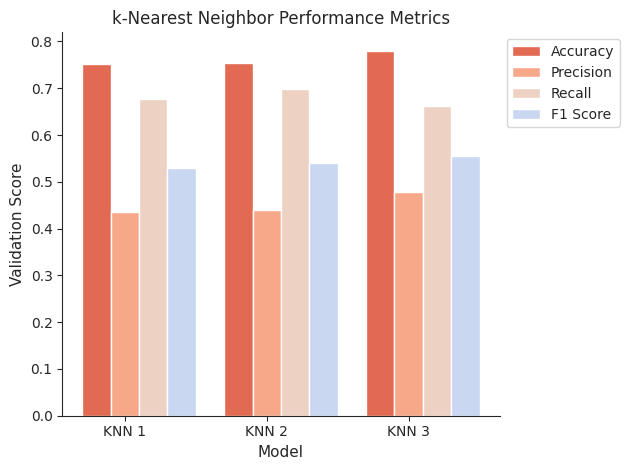

In [941]:
# Visualise key metrics for feature selection KNN models
accuracy_scores = [accuracy_score_knn_ros,
                   accuracy_score_knn_ros_2,
                   accuracy_score_knn_ros_3]
precision_scores = [precision_score_knn_ros,
                    precision_score_knn_ros_2,
                    precision_score_knn_ros_3]
recall_scores = [recall_score_knn_ros,
                 recall_score_knn_ros_2,
                 recall_score_knn_ros_3]
f1_scores = [f1_score_knn_ros,
             f1_score_knn_ros_2,
             f1_score_knn_ros_3]

# Set up bar graph position
bar_width = 0.2
index = np.arange(len(accuracy_scores))

# Plotting each metric in a bar chart
plt.bar(index, accuracy_scores, bar_width, color = sns.color_palette("coolwarm_r")[0], label = "Accuracy")
plt.bar(index + bar_width, precision_scores, bar_width, color = sns.color_palette("coolwarm_r")[1], label = "Precision")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, color = sns.color_palette("coolwarm_r")[2], label = "Recall")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, color = sns.color_palette("coolwarm_r")[3], label = "F1 Score")

# Adding labels, legend, and title
plt.xlabel("Model", fontsize = 11)
plt.ylabel("Validation Score", fontsize = 11)
plt.title("k-Nearest Neighbor Performance Metrics", fontsize = 12)
plt.xticks(index + bar_width, ["KNN 1", "KNN 2", "KNN 3"])
plt.legend()

# Modified legend placement
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("knn_performance_metrics")

# Display the plot
plt.tight_layout()
plt.show()

Hence, KNN 2 is the best performing model

## 4.8 Artificial Neural Networks: MLPs

In [942]:
# Attempt to recreate the same evaluation method by training the same simple MLP on the three data types

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_imbalanced = Sequential([ # Use a linear stack of layers
                Dense(6, activation = "relu", input_shape = (x_train_encoded.shape[1],)),
                Dense(6, activation = "relu"), # introduce non-linearity
                Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_imbalanced.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 6)                 90        
                                                                 
 dense_52 (Dense)            (None, 6)                 42        
                                                                 
 dense_53 (Dense)            (None, 1)                 7         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [943]:
# Compile the model
optimizer = SGD(learning_rate = 0.01) # Stochastic Gradient Descent optimizer for updating weights
model_MLP_imbalanced.compile(optimizer = optimizer, 
                    loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                    metrics = ["accuracy", Precision(), Recall()]) # Check for recall and precision since looking for churn

In [944]:
# Fit the model on the training data
history_MLP_imbalanced = model_MLP_imbalanced.fit(x_train_encoded,
                                                y_train,
                                                batch_size = 32, # No. of samples per gradient update
                                                epochs = 200, # No. of times to iterate over entire dataset
                                                validation_data = (x_val_encoded, y_val))

Epoch 1/200
188/188 [==============================] - 2s 5ms/step - loss: 0.5492 - accuracy: 0.7845 - precision_13: 0.3953 - recall_13: 0.0950 - val_loss: 0.5094 - val_accuracy: 0.7930 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/200
188/188 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.7948 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - val_loss: 0.4938 - val_accuracy: 0.7930 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 3/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.7948 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - val_loss: 0.4822 - val_accuracy: 0.7930 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 4/200
188/188 [==============================] - 1s 3ms/step - loss: 0.4772 - accuracy: 0.7968 - precision_13: 0.8000 - recall_13: 0.0130 - val_loss: 0.4729 - val_accuracy: 0.7945 - val_precision_13: 0.6667 - val_recall_13: 0.0145
Epoch 5/200


In [945]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_imbalanced = model_MLP_imbalanced.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_imbalanced = evaluation_results_imbalanced[0] # Accessing the loss
val_accuracy_MLP_imbalanced = evaluation_results_imbalanced[1] # Accessing the accuracy
val_precision_MLP_imbalanced = evaluation_results_imbalanced[2] # Accessing the precision
val_recall_MLP_imbalanced = evaluation_results_imbalanced[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_imbalanced = 2 * (val_precision_MLP_imbalanced * val_recall_MLP_imbalanced) / (val_precision_MLP_imbalanced + val_recall_MLP_imbalanced)

# Print performance metrics
print(f"MLP Imbalanced Validation Loss: {val_loss_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Accuracy: {val_accuracy_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Precision: {val_precision_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Recall: {val_recall_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation F1 Score: {val_f1_MLP_imbalanced:.4f}")

MLP Imbalanced Validation Loss: 0.3458
MLP Imbalanced Validation Accuracy: 0.8540
MLP Imbalanced Validation Precision: 0.7075
MLP Imbalanced Validation Recall: 0.5024
MLP Imbalanced Validation F1 Score: 0.5876


Saving figure mlp_imbalanced_accuracyloss


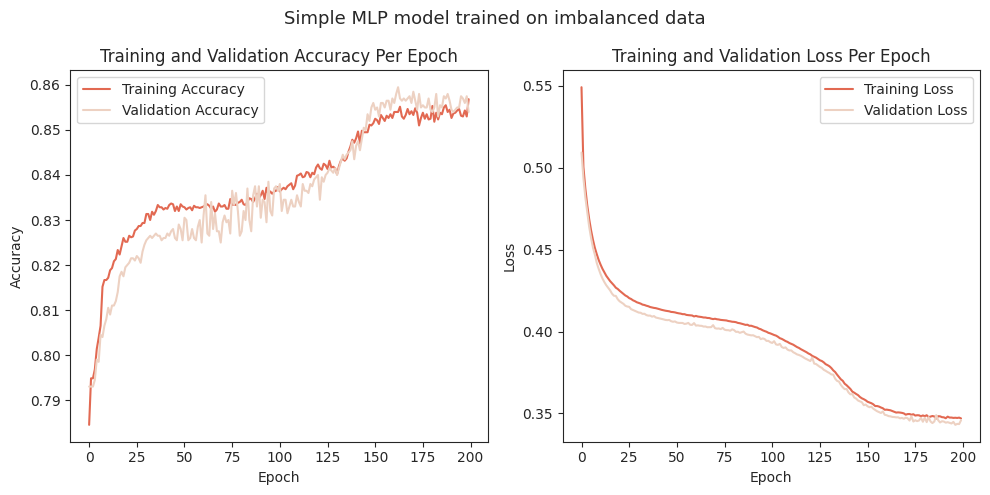

In [946]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_imbalanced.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_imbalanced.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_imbalanced.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_imbalanced.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP model trained on imbalanced data", fontsize = 13)

# Save the figure
save_fig("mlp_imbalanced_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [947]:
# MLP 1 shows a steady improvement in accuracy and a similar decrease in loss
# there are small fluctuations in accuracy but almost non in loss

In [948]:
# Make predictions on the test set (unseen data that was not used in training or valdiation)
y_pred_mlp_val_imbalanced = model_MLP_imbalanced.predict(x_val_encoded)
y_pred_mlp_val_classes_imbalanced = np.round(y_pred_mlp_val_imbalanced).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_imbalanced = confusion_matrix(y_val, y_pred_mlp_val_classes_imbalanced)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_imbalanced)

63/63 [==============================] - 0s 4ms/step
Confusion Matrix:
[[1500   86]
 [ 206  208]]


In [949]:
# Recreate the same training method but using the SMOTE dataset

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_smote = Sequential([ # Use a linear stack of layers
                Dense(6, activation = "relu", input_shape = (x_train_smote.shape[1],)),
                Dense(6, activation = "relu"), # introduce non-linearity
                Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_smote.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 6)                 90        
                                                                 
 dense_55 (Dense)            (None, 6)                 42        
                                                                 
 dense_56 (Dense)            (None, 1)                 7         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [950]:
# Compile the model
optimizer = SGD(learning_rate = 0.01) # Stochastic Gradient Descent optimizer for updating weights
model_MLP_smote.compile(optimizer = optimizer, 
                    loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                    metrics = ["accuracy", Precision(), Recall()]) # Check for recall and precision since looking for churn

In [951]:
# Fit the model on the training data
history_MLP_smote = model_MLP_smote.fit(x_train_smote,
                                        y_train_smote,
                                        batch_size = 32, # No. of samples per gradient update
                                        epochs = 200, # No. of times to iterate over entire dataset
                                        validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 2s 4ms/step - loss: 0.6781 - accuracy: 0.5763 - precision_14: 0.5796 - recall_14: 0.5557 - val_loss: 0.6692 - val_accuracy: 0.5945 - val_precision_14: 0.2747 - val_recall_14: 0.5845
Epoch 2/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6475 - accuracy: 0.6174 - precision_14: 0.6129 - recall_14: 0.6375 - val_loss: 0.6301 - val_accuracy: 0.6885 - val_precision_14: 0.3461 - val_recall_14: 0.5676
Epoch 3/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6232 - accuracy: 0.6674 - precision_14: 0.6832 - recall_14: 0.6244 - val_loss: 0.6117 - val_accuracy: 0.7195 - val_precision_14: 0.3895 - val_recall_14: 0.6256
Epoch 4/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6043 - accuracy: 0.6888 - precision_14: 0.7056 - recall_14: 0.6479 - val_loss: 0.6098 - val_accuracy: 0.7125 - val_precision_14: 0.3914 - val_recall_14: 0.7005
Epoch 5/200
299/299 [==============================]

In [952]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_smote = model_MLP_smote.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_smote = evaluation_results_smote[0] # Accessing the loss
val_accuracy_MLP_smote = evaluation_results_smote[1] # Accessing the accuracy
val_precision_MLP_smote = evaluation_results_smote[2] # Accessing the precision
val_recall_MLP_smote = evaluation_results_smote[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_smote = 2 * (val_precision_MLP_smote * val_recall_MLP_smote) / (val_precision_MLP_smote + val_recall_MLP_smote)

# Print performance metrics
print(f"MLP SMOTE Validation Loss: {val_loss_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Accuracy: {val_accuracy_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Precision: {val_precision_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Recall: {val_recall_MLP_smote:.4f}")
print(f"MLP SMOTE Validation F1 Score: {val_f1_MLP_smote:.4f}")

MLP SMOTE Validation Loss: 0.4452
MLP SMOTE Validation Accuracy: 0.7950
MLP SMOTE Validation Precision: 0.5033
MLP SMOTE Validation Recall: 0.7343
MLP SMOTE Validation F1 Score: 0.5972


Saving figure mlp_smote_accuracyloss


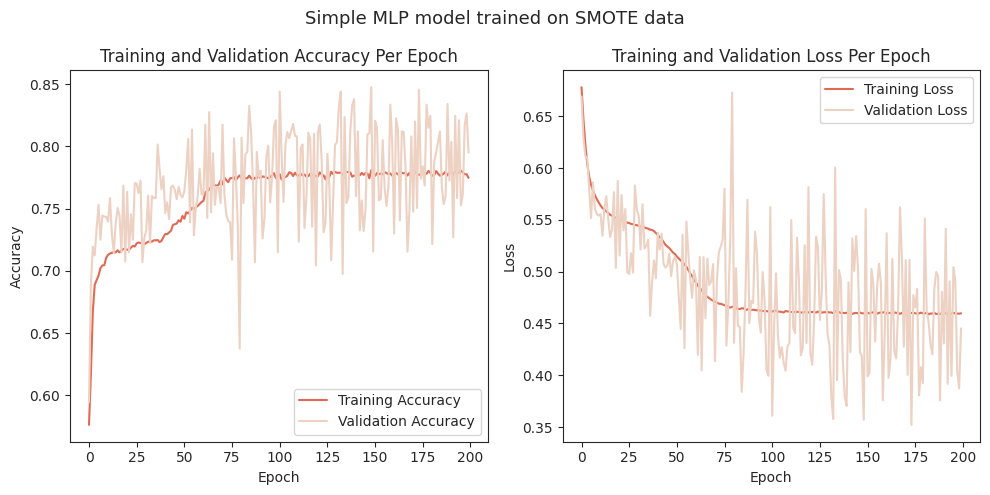

In [953]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_smote.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_smote.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_smote.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_smote.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP model trained on SMOTE data", fontsize = 13)

# Save the figure
save_fig("mlp_smote_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [954]:
# MLP 2 presents signs of overfitting in the variability of loss 
# (inconsistent performance)
# the still growing accuracy may be a sign the MLP has not reached plateau

In [955]:
# Make predictions on the test set (unseen data that was not used in training or valdiation)
y_pred_mlp_val_smote = model_MLP_smote.predict(x_val_encoded)
y_pred_mlp_val_classes_smote = np.round(y_pred_mlp_val_smote).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_smote = confusion_matrix(y_val, y_pred_mlp_val_classes_smote)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_imbalanced)

63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1500   86]
 [ 206  208]]


In [1076]:
# Lastly, recreate training the same simple MLP on the Random OverSampling data

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_ros = Sequential([ # Use a linear stack of layers
                Dense(6, activation = "relu", input_shape = (x_train_ros.shape[1],)),
                Dense(6, activation = "relu"), # introduce non-linearity
                Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_ros.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 6)                 90        
                                                                 
 dense_94 (Dense)            (None, 6)                 42        
                                                                 
 dense_95 (Dense)            (None, 1)                 7         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1077]:
# Compile the model
optimizer = SGD(learning_rate = 0.01) # Stochastic Gradient Descent optimizer for updating weights
model_MLP_ros.compile(optimizer = optimizer, 
                    loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                    metrics = ["accuracy", Precision(), Recall()]) # Check for recall and precision since looking for churn

In [958]:
# Fit the model on the training data
history_MLP_ros = model_MLP_ros.fit(x_train_ros,
                                    y_train_ros,
                                    batch_size = 32, # No. of samples per gradient update
                                    epochs = 200, # No. of times to iterate over entire dataset
                                    validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 2s 4ms/step - loss: 0.6787 - accuracy: 0.5677 - precision_15: 0.5717 - recall_15: 0.5402 - val_loss: 0.6742 - val_accuracy: 0.5840 - val_precision_15: 0.2748 - val_recall_15: 0.6159
Epoch 2/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6480 - accuracy: 0.6150 - precision_15: 0.6084 - recall_15: 0.6456 - val_loss: 0.6320 - val_accuracy: 0.6800 - val_precision_15: 0.3404 - val_recall_15: 0.5821
Epoch 3/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6234 - accuracy: 0.6687 - precision_15: 0.6807 - recall_15: 0.6354 - val_loss: 0.6152 - val_accuracy: 0.7155 - val_precision_15: 0.3872 - val_recall_15: 0.6425
Epoch 4/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6046 - accuracy: 0.6873 - precision_15: 0.7017 - recall_15: 0.6515 - val_loss: 0.6199 - val_accuracy: 0.6965 - val_precision_15: 0.3777 - val_recall_15: 0.7198
Epoch 5/200
299/299 [==============================]

In [959]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_ros = model_MLP_ros.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_ros = evaluation_results_ros[0] # Accessing the loss
val_accuracy_MLP_ros = evaluation_results_ros[1] # Accessing the accuracy
val_precision_MLP_ros = evaluation_results_ros[2] # Accessing the precision
val_recall_MLP_ros = evaluation_results_ros[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_ros = 2 * (val_precision_MLP_ros * val_recall_MLP_ros) / (val_precision_MLP_ros + val_recall_MLP_ros)

# Print performance metrics
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")

MLP ROS Validation Loss: 0.4540
MLP ROS Validation Accuracy: 0.7910
MLP ROS Validation Precision: 0.4969
MLP ROS Validation Recall: 0.7729
MLP ROS Validation F1 Score: 0.6049


Saving figure mlp_ros_accuracyloss


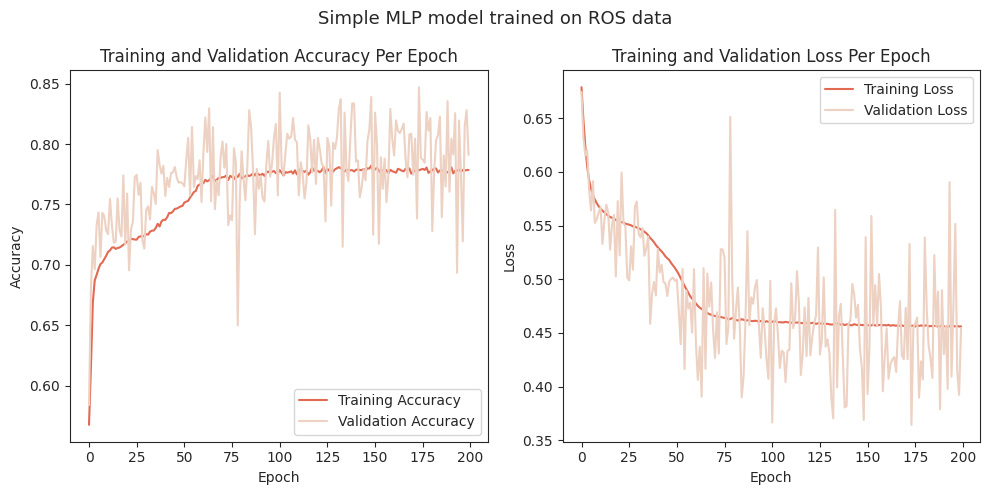

In [960]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_ros.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_ros.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_ros.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_ros.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP model trained on ROS data", fontsize = 13)

# Save the figure
save_fig("mlp_ros_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# both accuracy and loss appear to reach plateau after about 75 to 100 epochs
# huge variance may be an indicator of overfitting, especially with the validation loss

In [962]:
# Make predictions on the validation set to construct confusion matrix
y_pred_mlp_val_ros = model_MLP_ros.predict(x_val_encoded)
y_pred_mlp_val_classes_ros = np.round(y_pred_mlp_val_ros).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_ros = confusion_matrix(y_val, y_pred_mlp_val_classes_ros)

# Print the confusion matrix
print("Confusion Matrix MLP ROS:")
print(conf_matrix_ros)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix MLP ROS:
[[1262  324]
 [  94  320]]


In [963]:
# To determine which data structure worked best for neural networks, one may compare performance metrics and CF
print(f"MLP Imbalanced Validation Loss: {val_loss_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Accuracy: {val_accuracy_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Precision: {val_precision_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation Recall: {val_recall_MLP_imbalanced:.4f}")
print(f"MLP Imbalanced Validation F1 Score: {val_f1_MLP_imbalanced:.4f}")
print()
print(f"MLP SMOTE Validation Loss: {val_loss_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Accuracy: {val_accuracy_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Precision: {val_precision_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Recall: {val_recall_MLP_smote:.4f}")
print(f"MLP SMOTE Validation F1 Score: {val_f1_MLP_smote:.4f}")
print()
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")
print()

# Calculate AUC for the three MLP models
fpr_mlp_imbalanced, tpr_mlp_imbalanced, _ = roc_curve(y_val, y_pred_mlp_val_imbalanced)
auc_mlp_imbalanced = auc(fpr_mlp_imbalanced, tpr_mlp_imbalanced)
print(f"MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced:.4f}")

fpr_mlp_smote, tpr_mlp_smote, _ = roc_curve(y_val, y_pred_mlp_val_smote)
auc_mlp_smote = auc(fpr_mlp_smote, tpr_mlp_smote)
print(f"MLP SMOTE Validation ROC AUC: {auc_mlp_smote:.4f}")

fpr_mlp_ros, tpr_mlp_ros, _ = roc_curve(y_val, y_pred_mlp_val_ros)
auc_mlp_ros = auc(fpr_mlp_ros, tpr_mlp_ros)
print(f"MLP ROS Validation ROC AUC: {auc_mlp_ros:.4f}")
print()

# Confusion Matrix Comparison 
print("Confusion Matrix MLP imbalanced:")
print(conf_matrix_imbalanced)

print("Confusion Matrix MLP SMOTE:")
print(conf_matrix_smote)

print("Confusion Matrix MLP ROS:")
print(conf_matrix_ros)

# By comparing performance metrics and CF, the neural network trained on the Random OverSampling data appears
# to generate best results in terms of predicting cutsomer churn

MLP Imbalanced Validation Loss: 0.3458
MLP Imbalanced Validation Accuracy: 0.8540
MLP Imbalanced Validation Precision: 0.7075
MLP Imbalanced Validation Recall: 0.5024
MLP Imbalanced Validation F1 Score: 0.5876

MLP SMOTE Validation Loss: 0.4452
MLP SMOTE Validation Accuracy: 0.7950
MLP SMOTE Validation Precision: 0.5033
MLP SMOTE Validation Recall: 0.7343
MLP SMOTE Validation F1 Score: 0.5972

MLP ROS Validation Loss: 0.4540
MLP ROS Validation Accuracy: 0.7910
MLP ROS Validation Precision: 0.4969
MLP ROS Validation Recall: 0.7729
MLP ROS Validation F1 Score: 0.6049

MLP Imbalanced Validation ROC AUC: 0.8601
MLP SMOTE Validation ROC AUC: 0.8540
MLP ROS Validation ROC AUC: 0.8599

Confusion Matrix MLP imbalanced:
[[1500   86]
 [ 206  208]]
Confusion Matrix MLP SMOTE:
[[1286  300]
 [ 110  304]]
Confusion Matrix MLP ROS:
[[1262  324]
 [  94  320]]


In [964]:
# Attempt 2: Same simple MLP but with enough neurons to match the number of features in the dataset

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_2_imbalanced = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_encoded.shape[1],)),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_2_imbalanced.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 14)                210       
                                                                 
 dense_61 (Dense)            (None, 14)                210       
                                                                 
 dense_62 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [965]:
# Compile the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_2_imbalanced.compile(optimizer = optimizer,
                                loss = 'binary_crossentropy', # Use 'binary_crossentropy' for binary classification
                                metrics = ['accuracy', Precision(), Recall()]) # Check for additional metrics

In [966]:
# Fit the model on the training data
history_MLP_2_imbalanced = model_MLP_2_imbalanced.fit(x_train_encoded,
                                                    y_train,
                                                    batch_size = 32, # No. of samples per gradient update
                                                    epochs = 200, # No. of times to iterate over entire dataset
                                                    validation_data = (x_val_encoded, y_val))

Epoch 1/200
188/188 [==============================] - 2s 6ms/step - loss: 0.4763 - accuracy: 0.7997 - precision_16: 0.5838 - recall_16: 0.0820 - val_loss: 0.4378 - val_accuracy: 0.8100 - val_precision_16: 0.6635 - val_recall_16: 0.1667
Epoch 2/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8237 - precision_16: 0.6747 - recall_16: 0.2713 - val_loss: 0.4163 - val_accuracy: 0.8235 - val_precision_16: 0.6871 - val_recall_16: 0.2705
Epoch 3/200
188/188 [==============================] - 1s 5ms/step - loss: 0.4171 - accuracy: 0.8293 - precision_16: 0.6949 - recall_16: 0.2998 - val_loss: 0.4139 - val_accuracy: 0.8230 - val_precision_16: 0.7143 - val_recall_16: 0.2415
Epoch 4/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4126 - accuracy: 0.8300 - precision_16: 0.6848 - recall_16: 0.3176 - val_loss: 0.4399 - val_accuracy: 0.8205 - val_precision_16: 0.7570 - val_recall_16: 0.1957
Epoch 5/200
188/188 [==============================]

In [967]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_2_imbalanced = model_MLP_2_imbalanced.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_2_imbalanced = evaluation_results_2_imbalanced[0] # Accessing the loss
val_accuracy_MLP_2_imbalanced = evaluation_results_2_imbalanced[1] # Accessing the accuracy
val_precision_MLP_2_imbalanced = evaluation_results_2_imbalanced[2] # Accessing the precision
val_recall_MLP_2_imbalanced = evaluation_results_2_imbalanced[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_2_imbalanced = 2 * (val_precision_MLP_2_imbalanced * val_recall_MLP_2_imbalanced) / (val_precision_MLP_2_imbalanced + val_recall_MLP_2_imbalanced)

# Print performance metrics
print(f"2nd MLP ROS Validation Loss: {val_loss_MLP_2_imbalanced:.4f}")
print(f"2nd MLP ROS Validation Accuracy: {val_accuracy_MLP_2_imbalanced:.4f}")
print(f"2nd MLP ROS Validation Precision: {val_precision_MLP_2_imbalanced:.4f}")
print(f"2nd MLP ROS Validation Recall: {val_recall_MLP_2_imbalanced:.4f}")
print(f"2nd MLP ROS Validation F1 Score: {val_f1_MLP_2_imbalanced:.4f}")

2nd MLP ROS Validation Loss: 0.3360
2nd MLP ROS Validation Accuracy: 0.8550
2nd MLP ROS Validation Precision: 0.6856
2nd MLP ROS Validation Recall: 0.5531
2nd MLP ROS Validation F1 Score: 0.6123


Saving figure mlp_2_imbalanced_accuracyloss


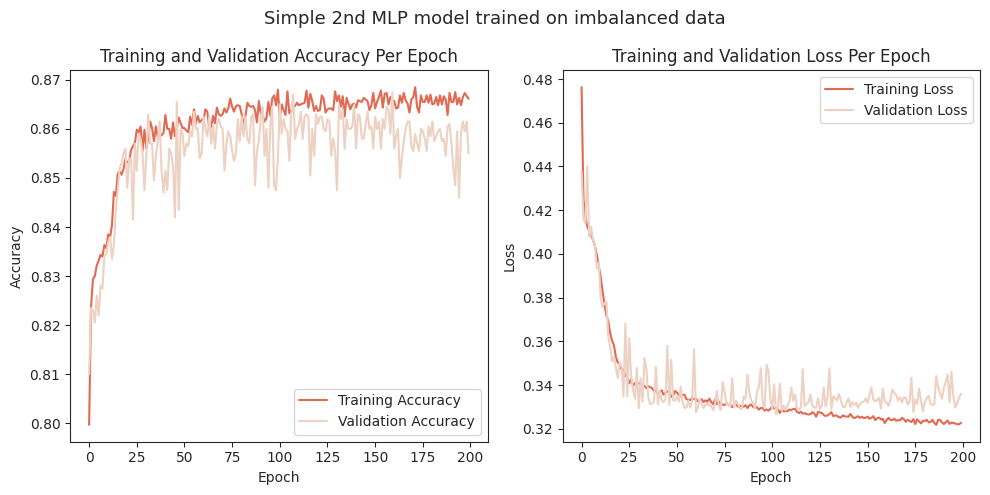

In [968]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_2_imbalanced.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_2_imbalanced.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_2_imbalanced.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_2_imbalanced.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple 2nd MLP model trained on imbalanced data", fontsize = 13)

# Save the figure
save_fig("mlp_2_imbalanced_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [1033]:
# shape of the curve may suggest signs of overfitting (validation loss increasing while training loss decreasing
# both accuracy and loss experience a jump in first 25 epochs and then more-or-less plateu after 50 to 75 epochs

In [970]:
# Make predictions on the validation set to construct confusion matrix
y_pred_mlp_val_2_imbalanced = model_MLP_2_imbalanced.predict(x_val_encoded)
y_pred_mlp_val_classes_2_imbalanced = np.round(y_pred_mlp_val_2_imbalanced).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_2_imbalanced = confusion_matrix(y_val, y_pred_mlp_val_classes_2_imbalanced)

# Print the confusion matrix
print("Confusion Matrix 2nd MLP Imbalanced:")
print(conf_matrix_2_imbalanced)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix 2nd MLP Imbalanced:
[[1481  105]
 [ 185  229]]


In [971]:
# Attempt 2: Same simple MLP but with enough neurons to match the number of features in the dataset

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_2_smote = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_smote.shape[1],)),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_2_smote.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 14)                210       
                                                                 
 dense_64 (Dense)            (None, 14)                210       
                                                                 
 dense_65 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [972]:
# Compile the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_2_smote.compile(optimizer = optimizer,
                        loss = 'binary_crossentropy', # Use 'binary_crossentropy' for binary classification
                         metrics = ['accuracy', Precision(), Recall()]) # Check for additional metrics

In [1032]:
# Fit the model on the training data
history_MLP_2_smote = model_MLP_2_imbalanced.fit(x_train_encoded,
                                                    y_train,
                                                    batch_size = 32, # No. of samples per gradient update
                                                    epochs = 200, # No. of times to iterate over entire dataset
                                                    validation_data = (x_val_encoded, y_val))

Epoch 1/200
188/188 [==============================] - 1s 6ms/step - loss: 0.3103 - accuracy: 0.8703 - precision_16: 0.7668 - recall_16: 0.5288 - val_loss: 0.3440 - val_accuracy: 0.8525 - val_precision_16: 0.7554 - val_recall_16: 0.4251
Epoch 2/200
188/188 [==============================] - 1s 5ms/step - loss: 0.3100 - accuracy: 0.8710 - precision_16: 0.7797 - recall_16: 0.5175 - val_loss: 0.3545 - val_accuracy: 0.8375 - val_precision_16: 0.6174 - val_recall_16: 0.5652
Epoch 3/200
188/188 [==============================] - 1s 4ms/step - loss: 0.3101 - accuracy: 0.8742 - precision_16: 0.7847 - recall_16: 0.5329 - val_loss: 0.3477 - val_accuracy: 0.8490 - val_precision_16: 0.6986 - val_recall_16: 0.4758
Epoch 4/200
188/188 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.8715 - precision_16: 0.7764 - recall_16: 0.5248 - val_loss: 0.3785 - val_accuracy: 0.8560 - val_precision_16: 0.8663 - val_recall_16: 0.3599
Epoch 5/200
188/188 [==============================]

In [1034]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_2_smote = model_MLP_2_smote.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_2_smote = evaluation_results_2_smote[0] # Accessing the loss
val_accuracy_MLP_2_smote = evaluation_results_2_smote[1] # Accessing the accuracy
val_precision_MLP_2_smote = evaluation_results_2_smote[2] # Accessing the precision
val_recall_MLP_2_smote = evaluation_results_2_smote[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_2_smote = 2 * (val_precision_MLP_2_smote * val_recall_MLP_2_smote) / (val_precision_MLP_2_smote + val_recall_MLP_2_smote)

# Print performance metrics
print(f"2nd MLP SMOTE Validation Loss: {val_loss_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Accuracy: {val_accuracy_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Precision: {val_precision_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Recall: {val_recall_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation F1 Score: {val_f1_MLP_2_smote:.4f}")

2nd MLP SMOTE Validation Loss: 0.7002
2nd MLP SMOTE Validation Accuracy: 0.4885
2nd MLP SMOTE Validation Precision: 0.1613
2nd MLP SMOTE Validation Recall: 0.3502
2nd MLP SMOTE Validation F1 Score: 0.2209


Saving figure mlp_2_smote_accuracyloss


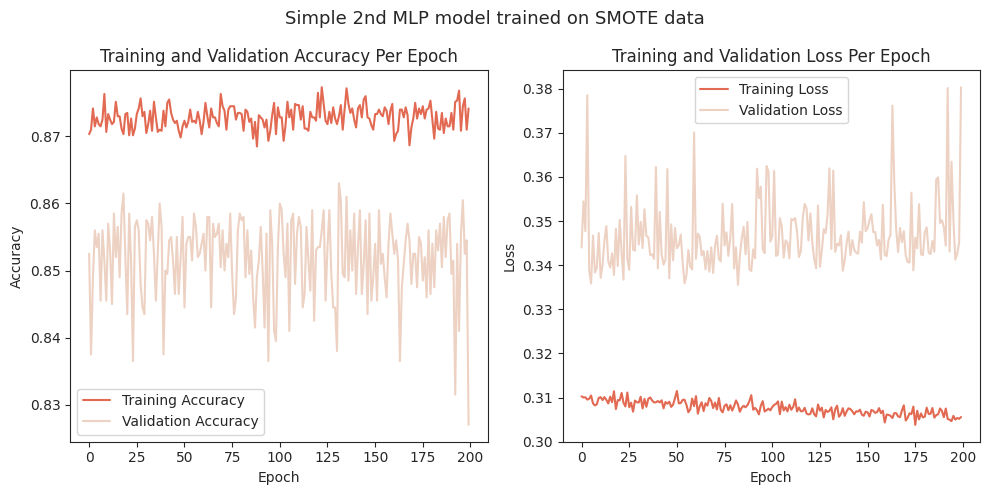

In [1035]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_2_smote.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_2_smote.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_2_smote.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_2_smote.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple 2nd MLP model trained on SMOTE data", fontsize = 13)

# Save the figure
save_fig("mlp_2_smote_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [1036]:
# clear sign of overfitting with training and validation loss going in different directions
# a lot of fluctuations and validation is constantly sittinh behind training

In [1037]:
# Make predictions on the validation set to construct confusion matrix
y_pred_mlp_val_2_smote = model_MLP_2_smote.predict(x_val_encoded)
y_pred_mlp_val_classes_2_smote = np.round(y_pred_mlp_val_2_smote).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_2_smote = confusion_matrix(y_val, y_pred_mlp_val_classes_2_smote)

# Print the confusion matrix
print("Confusion Matrix 2nd MLP SMOTE:")
print(conf_matrix_2_smote)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix 2nd MLP SMOTE:
[[832 754]
 [269 145]]


In [1038]:
# Attempt 2: Same simple MLP but with enough neurons to match the number of features in the dataset

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_2_ros = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_ros.shape[1],)),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_2_ros.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 14)                210       
                                                                 
 dense_79 (Dense)            (None, 14)                210       
                                                                 
 dense_80 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1039]:
# Compile the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_2_ros.compile(optimizer = optimizer,
                        loss = 'binary_crossentropy', # Use 'binary_crossentropy' for binary classification
                         metrics = ['accuracy', Precision(), Recall()]) # Check for additional metrics

In [1040]:
# Fit the model on the training data
history_MLP_2_ros = model_MLP_2_ros.fit(x_train_ros,
                                         y_train_ros,
                                         batch_size = 32, # No. of samples per gradient update
                                          epochs = 200, # No. of times to iterate over entire dataset
                                          validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 2s 5ms/step - loss: 0.6008 - accuracy: 0.6697 - precision_23: 0.6784 - recall_23: 0.6454 - val_loss: 0.5936 - val_accuracy: 0.6940 - val_precision_23: 0.3821 - val_recall_23: 0.7754
Epoch 2/200
299/299 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.7122 - precision_23: 0.7306 - recall_23: 0.6723 - val_loss: 0.4858 - val_accuracy: 0.7880 - val_precision_23: 0.4903 - val_recall_23: 0.6135
Epoch 3/200
299/299 [==============================] - 1s 3ms/step - loss: 0.5499 - accuracy: 0.7195 - precision_23: 0.7396 - recall_23: 0.6777 - val_loss: 0.6144 - val_accuracy: 0.6960 - val_precision_23: 0.3875 - val_recall_23: 0.8068
Epoch 4/200
299/299 [==============================] - 1s 3ms/step - loss: 0.5380 - accuracy: 0.7312 - precision_23: 0.7509 - recall_23: 0.6920 - val_loss: 0.7017 - val_accuracy: 0.6335 - val_precision_23: 0.3468 - val_recall_23: 0.8720
Epoch 5/200
299/299 [==============================]

In [1041]:
# Evaluate the model on the validation set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_2_ros = model_MLP_2_ros.evaluate(x_val_encoded, y_val, verbose = 0)

val_loss_MLP_2_ros = evaluation_results_2_ros[0] # Accessing the loss
val_accuracy_MLP_2_ros = evaluation_results_2_ros[1] # Accessing the accuracy
val_precision_MLP_2_ros = evaluation_results_2_ros[2] # Accessing the precision
val_recall_MLP_2_ros = evaluation_results_2_ros[3] # Accessing the recall

# Calculate the f1 score
val_f1_MLP_2_ros = 2 * (val_precision_MLP_2_ros * val_recall_MLP_2_ros) / (val_precision_MLP_2_ros + val_recall_MLP_2_ros)

# Print performance metrics
print(f"2nd MLP ROS Validation Loss: {val_loss_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Accuracy: {val_accuracy_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Precision: {val_precision_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Recall: {val_recall_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation F1 Score: {val_f1_MLP_2_ros:.4f}")

2nd MLP ROS Validation Loss: 0.4589
2nd MLP ROS Validation Accuracy: 0.7710
2nd MLP ROS Validation Precision: 0.4667
2nd MLP ROS Validation Recall: 0.7440
2nd MLP ROS Validation F1 Score: 0.5736


Saving figure mlp_2_ros_accuracyloss


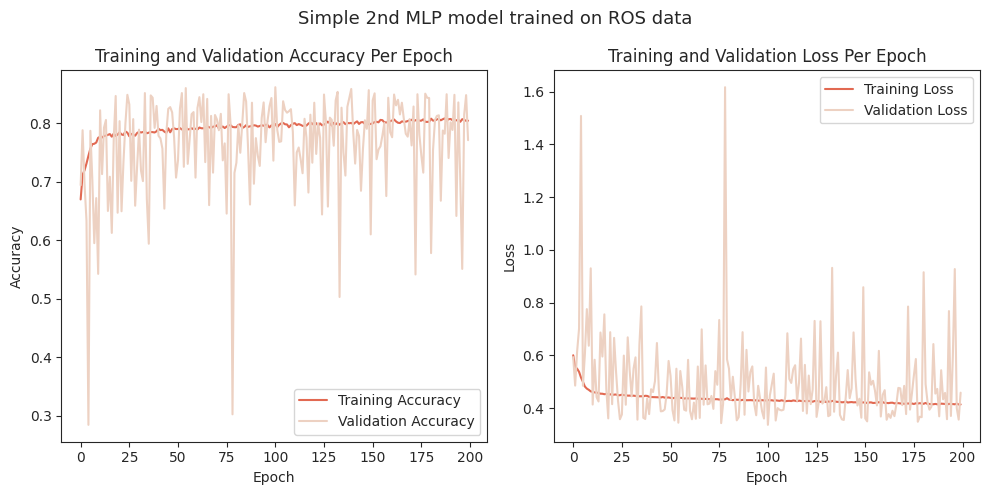

In [1042]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_2_ros.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_2_ros.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_2_ros.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_2_ros.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple 2nd MLP model trained on ROS data", fontsize = 13)

# Save the figure
save_fig("mlp_2_ros_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# a more stable learning but with a spike at epoch 75 and large fluctuations

In [1043]:
# Make predictions on the validation set to construct confusion matrix
y_pred_mlp_val_2_ros = model_MLP_2_ros.predict(x_val_encoded)
y_pred_mlp_val_classes_2_ros = np.round(y_pred_mlp_val_2_ros).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_2_ros = confusion_matrix(y_val, y_pred_mlp_val_classes_2_ros)

# Print the confusion matrix
print("Confusion Matrix 2nd MLP ROS:")
print(conf_matrix_2_ros)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix 2nd MLP ROS:
[[1234  352]
 [ 106  308]]


In [1044]:
print(f"MLP imbalanced Validation Loss: {val_loss_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Accuracy: {val_accuracy_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Precision: {val_precision_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Recall: {val_recall_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation F1 Score: {val_f1_MLP_imbalanced:.4f}")
print()
print(f"2 MLP imbalanced Validation Loss: {val_loss_MLP_2_imbalanced:.4f}")
print(f"2 MLP imbalanced Validation Accuracy: {val_accuracy_MLP_2_imbalanced:.4f}")
print(f"2 MLP imbalanced Validation Precision: {val_precision_MLP_2_imbalanced:.4f}")
print(f"2 MLP imbalanced Validation Recall: {val_recall_MLP_2_imbalanced:.4f}")
print(f"2 MLP imbalanced Validation F1 Score: {val_f1_MLP_2_imbalanced:.4f}")
print()
print(f"MLP SMOTE Validation Loss: {val_loss_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Accuracy: {val_accuracy_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Precision: {val_precision_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Recall: {val_recall_MLP_smote:.4f}")
print(f"MLP SMOTE Validation F1 Score: {val_f1_MLP_smote:.4f}")
print()
print(f"2 MLP SMOTE Validation Loss: {val_loss_MLP_2_smote:.4f}")
print(f"2 MLP SMOTE Validation Accuracy: {val_accuracy_MLP_2_smote:.4f}")
print(f"2 MLP SMOTE Validation Precision: {val_precision_MLP_2_smote:.4f}")
print(f"2 MLP SMOTE Validation Recall: {val_recall_MLP_2_smote:.4f}")
print(f"2 MLP SMOTE Validation F1 Score: {val_f1_MLP_2_smote:.4f}")
print()
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")
print()
print(f"2 MLP ROS Validation Loss: {val_loss_MLP_2_ros:.4f}")
print(f"2 MLP ROS Validation Accuracy: {val_accuracy_MLP_2_ros:.4f}")
print(f"2 MLP ROS Validation Precision: {val_precision_MLP_2_ros:.4f}")
print(f"2 MLP ROS Validation Recall: {val_recall_MLP_2_ros:.4f}")
print(f"2 MLP ROS Validation F1 Score: {val_f1_MLP_2_ros:.4f}")
print()

# Calculate AUC for the three MLP models
fpr_mlp_imbalanced, tpr_mlp_imbalanced, _ = roc_curve(y_val, y_pred_mlp_val_imbalanced)
auc_mlp_imbalanced = auc(fpr_mlp_imbalanced, tpr_mlp_imbalanced)
print(f"MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced:.4f}")
fpr_mlp_imbalanced_2, tpr_mlp_imbalanced_2, _ = roc_curve(y_val, y_pred_mlp_val_2_imbalanced)
auc_mlp_imbalanced_2 = auc(fpr_mlp_imbalanced_2, tpr_mlp_imbalanced_2)
print(f"2 MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced_2:.4f}\n")

fpr_mlp_smote, tpr_mlp_smote, _ = roc_curve(y_val, y_pred_mlp_val_smote)
auc_mlp_smote = auc(fpr_mlp_smote, tpr_mlp_smote)
print(f"MLP SMOTE Validation ROC AUC: {auc_mlp_smote:.4f}")
fpr_mlp_smote_2, tpr_mlp_smote_2, _ = roc_curve(y_val, y_pred_mlp_val_2_smote)
auc_mlp_smote_2 = auc(fpr_mlp_smote_2, tpr_mlp_smote_2)
print(f"2 MLP SMOTE Validation ROC AUC: {auc_mlp_smote_2:.4f}\n")

fpr_mlp_ros, tpr_mlp_ros, _ = roc_curve(y_val, y_pred_mlp_val_ros)
auc_mlp_ros = auc(fpr_mlp_ros, tpr_mlp_ros)
print(f"MLP ROS Validation ROC AUC: {auc_mlp_ros:.4f}")
fpr_mlp_ros_2, tpr_mlp_ros_2, _ = roc_curve(y_val, y_pred_mlp_val_2_ros)
auc_mlp_ros_2 = auc(fpr_mlp_ros_2, tpr_mlp_ros_2)
print(f"2 MLP ROS Validation ROC AUC: {auc_mlp_ros_2:.4f}")
print()

# Confusion Matrix Comparison 
print("Confusion Matrix MLP imbalanced:")
print(conf_matrix_imbalanced)
print("Confusion Matrix MLP 2 imbalanced:")
print(conf_matrix_2_imbalanced)

print("Confusion Matrix MLP SMOTE:")
print(conf_matrix_smote)
print("Confusion Matrix MLP 2 SMOTE:")
print(conf_matrix_2_smote)

print("Confusion Matrix MLP ROS:")
print(conf_matrix_ros)
print("Confusion Matrix MLP 2 ROS:")
print(conf_matrix_2_ros)

MLP imbalanced Validation Loss: 0.3458
MLP imbalanced Validation Accuracy: 0.8540
MLP imbalanced Validation Precision: 0.7075
MLP imbalanced Validation Recall: 0.5024
MLP imbalanced Validation F1 Score: 0.5876

2 MLP imbalanced Validation Loss: 0.3360
2 MLP imbalanced Validation Accuracy: 0.8550
2 MLP imbalanced Validation Precision: 0.6856
2 MLP imbalanced Validation Recall: 0.5531
2 MLP imbalanced Validation F1 Score: 0.6123

MLP SMOTE Validation Loss: 0.4452
MLP SMOTE Validation Accuracy: 0.7950
MLP SMOTE Validation Precision: 0.5033
MLP SMOTE Validation Recall: 0.7343
MLP SMOTE Validation F1 Score: 0.5972

2 MLP SMOTE Validation Loss: 0.7002
2 MLP SMOTE Validation Accuracy: 0.4885
2 MLP SMOTE Validation Precision: 0.1613
2 MLP SMOTE Validation Recall: 0.3502
2 MLP SMOTE Validation F1 Score: 0.2209

MLP ROS Validation Loss: 0.4540
MLP ROS Validation Accuracy: 0.7910
MLP ROS Validation Precision: 0.4969
MLP ROS Validation Recall: 0.7729
MLP ROS Validation F1 Score: 0.6049

2 MLP ROS 

In [ ]:
# Increasing the size of neurons from 6 to 14 increases performance only for the MLP trained on imbalanced data
# while the imbalanced models outperform ROS and SMOTE trained MLPs, imbalanced MLPs lack in recall
# MLP 2 SMOTE and MLP 2 ROS may be overfitting

In [1045]:
# Attempt 3: Simple MLP with as many neurons as attributes and with dropout
from tensorflow.keras.layers import Dense, Dropout

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_3_imbalanced = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_encoded.shape[1],)),
    Dropout(0.5),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dropout(0.5),
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_3_imbalanced.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 14)                210       
                                                                 
 dropout_12 (Dropout)        (None, 14)                0         
                                                                 
 dense_82 (Dense)            (None, 14)                210       
                                                                 
 dropout_13 (Dropout)        (None, 14)                0         
                                                                 
 dense_83 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1046]:
# Complie the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_3_imbalanced.compile(optimizer = optimizer,
                        loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                        metrics = ["accuracy", Precision(), Recall()]) # Check for additional metrics relevant for predicting customer churn

In [1047]:
# Fit the model on the training data
history_MLP_3_imbalanced = model_MLP_3_imbalanced.fit(x_train_encoded,
                                                    y_train,
                                                    epochs = 200, # no. of times to iterate over the entire dataset
                                                    batch_size = 32, # no. of samples per gradient update
                                                    validation_data = (x_val_encoded, y_val))

Epoch 1/200
188/188 [==============================] - 2s 5ms/step - loss: 0.5163 - accuracy: 0.7910 - precision_24: 0.4207 - recall_24: 0.0496 - val_loss: 0.4718 - val_accuracy: 0.7930 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 2/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4849 - accuracy: 0.8000 - precision_24: 0.6281 - recall_24: 0.0617 - val_loss: 0.4602 - val_accuracy: 0.7930 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 3/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4667 - accuracy: 0.8068 - precision_24: 0.6714 - recall_24: 0.1145 - val_loss: 0.4386 - val_accuracy: 0.8060 - val_precision_24: 0.7167 - val_recall_24: 0.1039
Epoch 4/200
188/188 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.8058 - precision_24: 0.6269 - recall_24: 0.1324 - val_loss: 0.4343 - val_accuracy: 0.8020 - val_precision_24: 0.7368 - val_recall_24: 0.0676
Epoch 5/200
188/188 [===============

In [1048]:
# Evaluate the model on the validation set
evaluation_results_3_imbalanced = model_MLP_3_imbalanced.evaluate(x_val_encoded,
                                                                y_val,
                                                                verbose = 0)

val_loss_MLP_3_imbalanced = evaluation_results_3_imbalanced[0] # Accessing the loss
val_accuracy_MLP_3_imbalanced = evaluation_results_3_imbalanced[1] # Accessing the accuracy
val_precision_MLP_3_imbalanced = evaluation_results_3_imbalanced[2] # Accessing the precision
val_recall_MLP_3_imbalanced = evaluation_results_3_imbalanced[3] # Accessing the recall

# Also calculate the f1 score
val_f1_MLP_3_imbalanced = 2 * (val_precision_MLP_3_imbalanced * val_recall_MLP_3_imbalanced) / (val_precision_MLP_3_imbalanced + val_recall_MLP_3_imbalanced)

# Print performance metrics
print(f"3rd MLP Validation Loss (imbalanced): {val_loss_MLP_3_imbalanced:.4f}")
print(f"3rd MLP Validation Accuracy (imbalanced): {val_accuracy_MLP_3_imbalanced:.4f}")
print(f"3rd MLP Validation Precision (imbalanced): {val_precision_MLP_3_imbalanced:.4f}")
print(f"3rd MLP Validation Recall (imbalanced): {val_recall_MLP_3_imbalanced:.4f}")
print(f"3rd MLP Validation F1 score (imbalanced): {val_f1_MLP_3_imbalanced:.4f}")

3rd MLP Validation Loss (imbalanced): 0.3456
3rd MLP Validation Accuracy (imbalanced): 0.8635
3rd MLP Validation Precision (imbalanced): 0.8983
3rd MLP Validation Recall (imbalanced): 0.3841
3rd MLP Validation F1 score (imbalanced): 0.5381


Saving figure mlp_3_imbalanced_accuracyloss


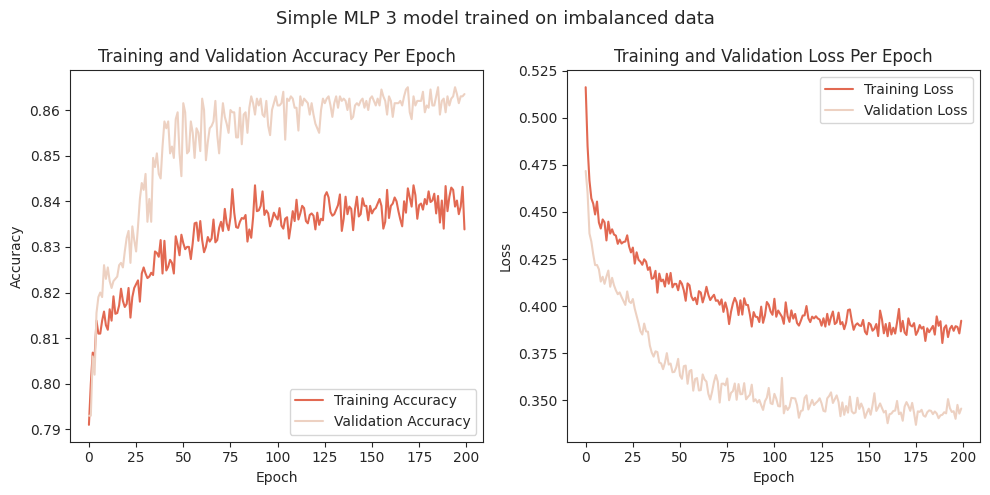

In [1049]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_3_imbalanced.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_3_imbalanced.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_3_imbalanced.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_3_imbalanced.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP 3 model trained on imbalanced data", fontsize = 13)

# Save the figure
save_fig("mlp_3_imbalanced_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# both accuracy and loss start to plateau after about 125 epochs which may indicate unnecesary epochs

In [1050]:
# Make predictions on the validation set
y_pred_mlp_val_3_imbalanced = model_MLP_3_imbalanced.predict(x_val_encoded)
y_pred_mlp_val_classes_3_imbalanced = np.round(y_pred_mlp_val_3_imbalanced).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_3_imbalanced = confusion_matrix(y_val, y_pred_mlp_val_classes_3_imbalanced)

# Print the confusion matrix
print("Confusion Matrix: 3rd MLP (imbalanced")
print(conf_matrix_3_imbalanced)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix: 3rd MLP (imbalanced
[[1568   18]
 [ 255  159]]


In [1051]:
# Attempt 3: Simple MLP with as many neurons as attributes and with dropout
from tensorflow.keras.layers import Dense, Dropout

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_3_smote = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_smote.shape[1],)),
    Dropout(0.5),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dropout(0.5),
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_3_smote.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 14)                210       
                                                                 
 dropout_14 (Dropout)        (None, 14)                0         
                                                                 
 dense_85 (Dense)            (None, 14)                210       
                                                                 
 dropout_15 (Dropout)        (None, 14)                0         
                                                                 
 dense_86 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1052]:
# Complie the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_3_smote.compile(optimizer = optimizer,
                        loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                        metrics = ["accuracy", Precision(), Recall()]) # Check for additional metrics relevant for predicting customer churn

In [1053]:
# Fit the model on the training data
history_MLP_3_smote = model_MLP_3_smote.fit(x_train_smote,
                                             y_train_smote,
                                             epochs = 200, # no. of times to iterate over the entire dataset
                                             batch_size = 32, # no. of samples per gradient update
                                             validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 2s 5ms/step - loss: 0.6635 - accuracy: 0.5926 - precision_25: 0.6213 - recall_25: 0.4741 - val_loss: 0.6374 - val_accuracy: 0.7080 - val_precision_25: 0.3899 - val_recall_25: 0.7271
Epoch 2/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6275 - accuracy: 0.6518 - precision_25: 0.7121 - recall_25: 0.5098 - val_loss: 0.5853 - val_accuracy: 0.7900 - val_precision_25: 0.4936 - val_recall_25: 0.5628
Epoch 3/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.6678 - precision_25: 0.7439 - recall_25: 0.5116 - val_loss: 0.5792 - val_accuracy: 0.7565 - val_precision_25: 0.4382 - val_recall_25: 0.6256
Epoch 4/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6076 - accuracy: 0.6752 - precision_25: 0.7474 - recall_25: 0.5293 - val_loss: 0.5776 - val_accuracy: 0.7365 - val_precision_25: 0.4189 - val_recall_25: 0.7053
Epoch 5/200
299/299 [==============================]

In [1054]:
# Evaluate the model on the validation set
evaluation_results_3_smote = model_MLP_3_smote.evaluate(x_val_encoded,
                                                        y_val,
                                                        verbose = 0)

val_loss_MLP_3_smote = evaluation_results_3_smote[0] # Accessing the loss
val_accuracy_MLP_3_smote = evaluation_results_3_smote[1] # Accessing the accuracy
val_precision_MLP_3_smote = evaluation_results_3_smote[2] # Accessing the precision
val_recall_MLP_3_smote = evaluation_results_3_smote[3] # Accessing the recall

# Also calculate the f1 score
val_f1_MLP_3_smote = 2 * (val_precision_MLP_3_smote * val_recall_MLP_3_smote) / (val_precision_MLP_3_smote + val_recall_MLP_3_smote)

# Print performance metrics
print(f"3rd MLP Validation Loss (smote): {val_loss_MLP_3_smote:.4f}")
print(f"3rd MLP Validation Accuracy (smote): {val_accuracy_MLP_3_smote:.4f}")
print(f"3rd MLP Validation Precision (smoted): {val_precision_MLP_3_smote:.4f}")
print(f"3rd MLP Validation Recall (smote): {val_recall_MLP_3_smote:.4f}")
print(f"3rd MLP Validation F1 score (smote): {val_f1_MLP_3_smote:.4f}")

3rd MLP Validation Loss (smote): 0.4288
3rd MLP Validation Accuracy (smote): 0.8185
3rd MLP Validation Precision (smoted): 0.5482
3rd MLP Validation Recall (smote): 0.7005
3rd MLP Validation F1 score (smote): 0.6151


Saving figure mlp_3_smoted_accuracyloss


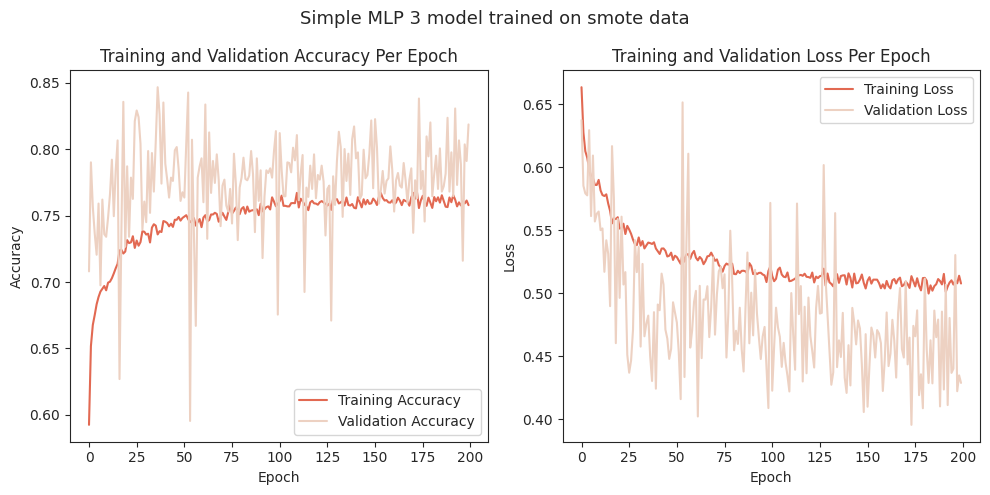

In [1055]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_3_smote.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_3_smote.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_3_smote.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_3_smote.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP 3 model trained on smote data", fontsize = 13)

# Save the figure
save_fig("mlp_3_smoted_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# both accuracy and loss are increasing/decreasing until about epoch 125 when reaching plateau
# loss does not reach a small number which may be a result of the model's complexity or parameter tuning

In [1057]:
# Make predictions on the test set (unseen data that was not used in training or valdiation)
y_pred_mlp_val_3_smote = model_MLP_3_smote.predict(x_val_encoded)
y_pred_mlp_val_classes_3_smote = np.round(y_pred_mlp_val_3_smote).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_3_smote = confusion_matrix(y_val, y_pred_mlp_val_classes_3_smote)

# Print the confusion matrix
print("Confusion Matrix: 3rd MLP (smote) ")
print(conf_matrix_3_smote)

63/63 [==============================] - 0s 1ms/step
Confusion Matrix: 3rd MLP (smote) 
[[1347  239]
 [ 124  290]]


In [1058]:
# Attempt 3: Simple MLP with as many neurons as attributes and with dropout
from tensorflow.keras.layers import Dense, Dropout

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_3_ros = Sequential([ # Use a linear stack of layers
    Dense(14, activation = "relu", input_shape = (x_train_ros.shape[1],)),
    Dropout(0.5),
    Dense(14, activation = "relu"), # introduce non-linearity
    Dropout(0.5),
    Dense(1, activation = "sigmoid")]) # binary classification

# Check model summary
model_MLP_3_ros.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 14)                210       
                                                                 
 dropout_16 (Dropout)        (None, 14)                0         
                                                                 
 dense_88 (Dense)            (None, 14)                210       
                                                                 
 dropout_17 (Dropout)        (None, 14)                0         
                                                                 
 dense_89 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1059]:
# Complie the model
optimizer = SGD(learning_rate = 0.1)
model_MLP_3_ros.compile(optimizer = optimizer,
                        loss = "binary_crossentropy", # Use 'binary_crossentropy' for binary classification
                        metrics = ["accuracy", Precision(), Recall()]) # Check for additional metrics relevant for predicting customer churn

In [1060]:
# Fit the model on the training data
history_MLP_3_ros = model_MLP_3_ros.fit(x_train_ros,
                                        y_train_ros,
                                        epochs = 200, # no. of times to iterate over the entire dataset
                                        batch_size = 32, # no. of samples per gradient update
                                        validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 2s 4ms/step - loss: 0.6663 - accuracy: 0.5902 - precision_26: 0.6208 - recall_26: 0.4634 - val_loss: 0.6398 - val_accuracy: 0.7150 - val_precision_26: 0.3968 - val_recall_26: 0.7246
Epoch 2/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6291 - accuracy: 0.6417 - precision_26: 0.7030 - recall_26: 0.4909 - val_loss: 0.5839 - val_accuracy: 0.7805 - val_precision_26: 0.4763 - val_recall_26: 0.6063
Epoch 3/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6170 - accuracy: 0.6625 - precision_26: 0.7370 - recall_26: 0.5053 - val_loss: 0.5917 - val_accuracy: 0.7540 - val_precision_26: 0.4385 - val_recall_26: 0.6715
Epoch 4/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6097 - accuracy: 0.6726 - precision_26: 0.7406 - recall_26: 0.5311 - val_loss: 0.5897 - val_accuracy: 0.7270 - val_precision_26: 0.4111 - val_recall_26: 0.7367
Epoch 5/200
299/299 [==============================]

In [1061]:
# Evaluate the model on the validation set
evaluation_results_3_ros = model_MLP_3_ros.evaluate(x_val_encoded,
                                                        y_val,
                                                        verbose = 0)

val_loss_MLP_3_ros = evaluation_results_3_ros[0] # Accessing the loss
val_accuracy_MLP_3_ros = evaluation_results_3_ros[1] # Accessing the accuracy
val_precision_MLP_3_ros = evaluation_results_3_ros[2] # Accessing the precision
val_recall_MLP_3_ros = evaluation_results_3_ros[3] # Accessing the recall

# Also calculate the f1 score
val_f1_MLP_3_ros = 2 * (val_precision_MLP_3_ros * val_recall_MLP_3_ros) / (val_precision_MLP_3_ros + val_recall_MLP_3_ros)

# Print performance metrics
print(f"3rd MLP Validation Loss (ros): {val_loss_MLP_3_ros:.4f}")
print(f"3rd MLP Validation Accuracy (ros): {val_accuracy_MLP_3_ros:.4f}")
print(f"3rd MLP Validation Precision (ros): {val_precision_MLP_3_ros:.4f}")
print(f"3rd MLP Validation Recall (ros): {val_recall_MLP_3_ros:.4f}")
print(f"3rd MLP Validation F1 score (ros): {val_f1_MLP_3_ros:.4f}")

3rd MLP Validation Loss (ros): 0.4394
3rd MLP Validation Accuracy (ros): 0.7920
3rd MLP Validation Precision (ros): 0.4984
3rd MLP Validation Recall (ros): 0.7536
3rd MLP Validation F1 score (ros): 0.6000


Saving figure mlp_3_ros_accuracyloss


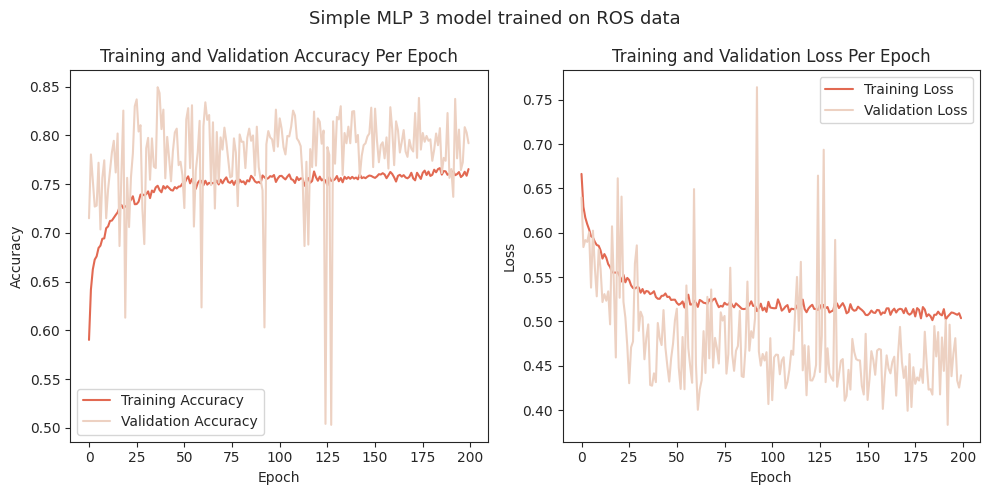

In [1062]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_3_ros.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_3_ros.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_3_ros.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_3_ros.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Simple MLP 3 model trained on ROS data", fontsize = 13)

# Save the figure
save_fig("mlp_3_ros_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [1063]:
# high fluctuation may be a sign of overfitting
# validation loss is fluctuating more than validation accuracy, and spikes at 100 and 125 epochs 
# suggest incosistent performance 

In [1064]:
# Make predictions on the test set (unseen data that was not used in training or valdiation)
y_pred_mlp_val_3_ros = model_MLP_3_ros.predict(x_val_encoded)
y_pred_mlp_val_classes_3_ros = np.round(y_pred_mlp_val_3_ros).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_3_ros = confusion_matrix(y_val, y_pred_mlp_val_classes_3_ros)

# Print the confusion matrix
print("Confusion Matrix: 3rd MLP (ROS)")
print(conf_matrix_3_ros)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix: 3rd MLP (ROS)
[[1272  314]
 [ 102  312]]


In [1065]:
# Compare performance across 3 types of MLPs to observe whether there's a technique that's better
print(f"MLP imbalanced Validation Loss: {val_loss_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Accuracy: {val_accuracy_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Precision: {val_precision_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation Recall: {val_recall_MLP_imbalanced:.4f}")
print(f"MLP imbalanced Validation F1 Score: {val_f1_MLP_imbalanced:.4f}")
print()
print(f"2nd MLP imbalanced Validation Loss: {val_loss_MLP_2_imbalanced:.4f}")
print(f"2nd MLP imbalanced Validation Accuracy: {val_accuracy_MLP_2_imbalanced:.4f}")
print(f"2nd MLP imbalanced Validation Precision: {val_precision_MLP_2_imbalanced:.4f}")
print(f"2nd MLP imbalanced Validation Recall: {val_recall_MLP_2_imbalanced:.4f}")
print(f"2nd MLP imbalanced Validation F1 Score: {val_f1_MLP_2_imbalanced:.4f}")
print()
print(f"3rd MLP imbalanced Validation Loss: {val_loss_MLP_3_imbalanced:.4f}")
print(f"3rd MLP imbalanced Validation Accuracy: {val_accuracy_MLP_3_imbalanced:.4f}")
print(f"3rd MLP imbalanced Validation Precision: {val_precision_MLP_3_imbalanced:.4f}")
print(f"3rd MLP imbalanced Validation Recall: {val_recall_MLP_3_imbalanced:.4f}")
print(f"3rd MLP imbalanced Validation F1 Score: {val_f1_MLP_3_imbalanced:.4f}")
print()
print(f"MLP SMOTE Validation Loss: {val_loss_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Accuracy: {val_accuracy_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Precision: {val_precision_MLP_smote:.4f}")
print(f"MLP SMOTE Validation Recall: {val_recall_MLP_smote:.4f}")
print(f"MLP SMOTE Validation F1 Score: {val_f1_MLP_smote:.4f}")
print()
print(f"2nd MLP SMOTE Validation Loss: {val_loss_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Accuracy: {val_accuracy_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Precision: {val_precision_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation Recall: {val_recall_MLP_2_smote:.4f}")
print(f"2nd MLP SMOTE Validation F1 Score: {val_f1_MLP_2_smote:.4f}")
print()
print(f"3rd MLP SMOTE Validation Loss: {val_loss_MLP_3_smote:.4f}")
print(f"3rd MLP SMOTE Validation Accuracy: {val_accuracy_MLP_3_smote:.4f}")
print(f"3rd MLP SMOTE Validation Precision: {val_precision_MLP_3_smote:.4f}")
print(f"3rd MLP SMOTE Validation Recall: {val_recall_MLP_3_smote:.4f}")
print(f"3rd MLP SMOTE Validation F1 Score: {val_f1_MLP_3_smote:.4f}")
print()
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")
print()
print(f"2nd MLP ROS Validation Loss: {val_loss_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Accuracy: {val_accuracy_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Precision: {val_precision_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation Recall: {val_recall_MLP_2_ros:.4f}")
print(f"2nd MLP ROS Validation F1 Score: {val_f1_MLP_2_ros:.4f}")
print()
print(f"3rd MLP ROS Validation Loss: {val_loss_MLP_3_ros:.4f}")
print(f"3rd MLP ROS Validation Accuracy: {val_accuracy_MLP_3_ros:.4f}")
print(f"3rd MLP ROS Validation Precision: {val_precision_MLP_3_ros:.4f}")
print(f"3rd MLP ROS Validation Recall: {val_recall_MLP_3_ros:.4f}")
print(f"3rd MLP ROS Validation F1 Score: {val_f1_MLP_3_ros:.4f}")
print()

# Calculate AUC for the three MLP models
fpr_mlp_imbalanced, tpr_mlp_imbalanced, _ = roc_curve(y_val, y_pred_mlp_val_imbalanced)
auc_mlp_imbalanced = auc(fpr_mlp_imbalanced, tpr_mlp_imbalanced)
print(f"MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced:.4f}")
fpr_mlp_imbalanced_2, tpr_mlp_imbalanced_2, _ = roc_curve(y_val, y_pred_mlp_val_2_imbalanced)
auc_mlp_imbalanced_2 = auc(fpr_mlp_imbalanced_2, tpr_mlp_imbalanced_2)
print(f"2nd MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced_2:.4f}")
fpr_mlp_imbalanced_3, tpr_mlp_imbalanced_3, _ = roc_curve(y_val, y_pred_mlp_val_3_imbalanced)
auc_mlp_imbalanced_3 = auc(fpr_mlp_imbalanced_3, tpr_mlp_imbalanced_3)
print(f"3rd MLP Imbalanced Validation ROC AUC: {auc_mlp_imbalanced_3:.4f}\n")

fpr_mlp_smote, tpr_mlp_smote, _ = roc_curve(y_val, y_pred_mlp_val_smote)
auc_mlp_smote = auc(fpr_mlp_smote, tpr_mlp_smote)
print(f"MLP SMOTE Validation ROC AUC: {auc_mlp_smote:.4f}")
fpr_mlp_smote_2, tpr_mlp_smote_2, _ = roc_curve(y_val, y_pred_mlp_val_2_smote)
auc_mlp_smote_2 = auc(fpr_mlp_smote_2, tpr_mlp_smote_2)
print(f"2nd MLP SMOTE Validation ROC AUC: {auc_mlp_smote_2:.4f}")
fpr_mlp_smote_3, tpr_mlp_smote_3, _ = roc_curve(y_val, y_pred_mlp_val_3_smote)
auc_mlp_smote_3 = auc(fpr_mlp_smote_3, tpr_mlp_smote_3)
print(f"3rd MLP SMOTE Validation ROC AUC: {auc_mlp_smote_3:.4f}\n")

fpr_mlp_ros, tpr_mlp_ros, _ = roc_curve(y_val, y_pred_mlp_val_ros)
auc_mlp_ros = auc(fpr_mlp_ros, tpr_mlp_ros)
print(f"MLP ROS Validation ROC AUC: {auc_mlp_ros:.4f}")
fpr_mlp_ros_2, tpr_mlp_ros_2, _ = roc_curve(y_val, y_pred_mlp_val_2_ros)
auc_mlp_ros_2 = auc(fpr_mlp_ros_2, tpr_mlp_ros_2)
print(f"2nd MLP ROS Validation ROC AUC: {auc_mlp_ros_2:.4f}")
fpr_mlp_ros_3, tpr_mlp_ros_3, _ = roc_curve(y_val, y_pred_mlp_val_3_ros)
auc_mlp_ros_3 = auc(fpr_mlp_ros_3, tpr_mlp_ros_3)
print(f"3rd MLP ROS Validation ROC AUC: {auc_mlp_ros_3:.4f}")
print()

# Confusion Matrix Comparison 
print("Confusion Matrix MLP imbalanced:")
print(conf_matrix_imbalanced)
print("Confusion Matrix MLP 2 imbalanced:")
print(conf_matrix_2_imbalanced)
print("Confusion Matrix MLP 3 imbalanced:")
print(conf_matrix_3_imbalanced)

print("Confusion Matrix MLP SMOTE:")
print(conf_matrix_smote)
print("Confusion Matrix MLP 2 SMOTE:")
print(conf_matrix_2_smote)
print("Confusion Matrix MLP 3 SMOTE:")
print(conf_matrix_3_smote)

print("Confusion Matrix MLP ROS:")
print(conf_matrix_ros)
print("Confusion Matrix MLP 2 ROS:")
print(conf_matrix_2_ros)
print("Confusion Matrix MLP 3 ROS:")
print(conf_matrix_3_ros)

MLP imbalanced Validation Loss: 0.3458
MLP imbalanced Validation Accuracy: 0.8540
MLP imbalanced Validation Precision: 0.7075
MLP imbalanced Validation Recall: 0.5024
MLP imbalanced Validation F1 Score: 0.5876

2nd MLP imbalanced Validation Loss: 0.3360
2nd MLP imbalanced Validation Accuracy: 0.8550
2nd MLP imbalanced Validation Precision: 0.6856
2nd MLP imbalanced Validation Recall: 0.5531
2nd MLP imbalanced Validation F1 Score: 0.6123

3rd MLP imbalanced Validation Loss: 0.3456
3rd MLP imbalanced Validation Accuracy: 0.8635
3rd MLP imbalanced Validation Precision: 0.8983
3rd MLP imbalanced Validation Recall: 0.3841
3rd MLP imbalanced Validation F1 Score: 0.5381

MLP SMOTE Validation Loss: 0.4452
MLP SMOTE Validation Accuracy: 0.7950
MLP SMOTE Validation Precision: 0.5033
MLP SMOTE Validation Recall: 0.7343
MLP SMOTE Validation F1 Score: 0.5972

2nd MLP SMOTE Validation Loss: 0.7002
2nd MLP SMOTE Validation Accuracy: 0.4885
2nd MLP SMOTE Validation Precision: 0.1613
2nd MLP SMOTE Vali

In [1083]:
# Attempt to do fine-tuning on best MLP for predicting customer churn
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up early stopping to monitor the validation loss
early_stopping_monitor = EarlyStopping(monitor = "val_loss",
                                       patience = 20,  # Number of epochs to wait after loss has stopped improving
                                       restore_best_weights = True)  # Restore model weights from the epoch
model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only = True, monitor = "val_loss")

# Fit the fine-tuned model on the training data
history_MLP_1_ros_ft = model_MLP_1.fit(x_train_ros,
                                        y_train_ros,
                                        batch_size = 32,
                                        epochs = 200,
                                        validation_data = (x_val_encoded, y_val),
                                        callbacks =[early_stopping_monitor, model_checkpoint]) 
# Callbacks allow for efficient training by stopping when the model stops improving

Epoch 1/200
299/299 [==============================] - 2s 5ms/step - loss: 0.4454 - accuracy: 0.7824 - precision_22: 0.7871 - recall_22: 0.7744 - val_loss: 0.4366 - val_accuracy: 0.7865 - val_precision_22: 0.4900 - val_recall_22: 0.7729
Epoch 2/200
 53/299 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.7801 - precision_22: 0.7768 - recall_22: 0.8043

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


299/299 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7840 - precision_22: 0.7879 - recall_22: 0.7773 - val_loss: 0.4396 - val_accuracy: 0.7830 - val_precision_22: 0.4846 - val_recall_22: 0.7609
Epoch 3/200
299/299 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.7824 - precision_22: 0.7870 - recall_22: 0.7746 - val_loss: 0.4750 - val_accuracy: 0.7615 - val_precision_22: 0.4558 - val_recall_22: 0.7850
Epoch 4/200
299/299 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7812 - precision_22: 0.7851 - recall_22: 0.7744 - val_loss: 0.4458 - val_accuracy: 0.7795 - val_precision_22: 0.4796 - val_recall_22: 0.7681
Epoch 5/200
299/299 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.7822 - precision_22: 0.7848 - recall_22: 0.7777 - val_loss: 0.4224 - val_accuracy: 0.8005 - val_precision_22: 0.5124 - val_recall_22: 0.7464
Epoch 6/200
299/299 [==============================] - 1s 4ms/st

Saving figure mlp_1_ros_ft_accuracyloss


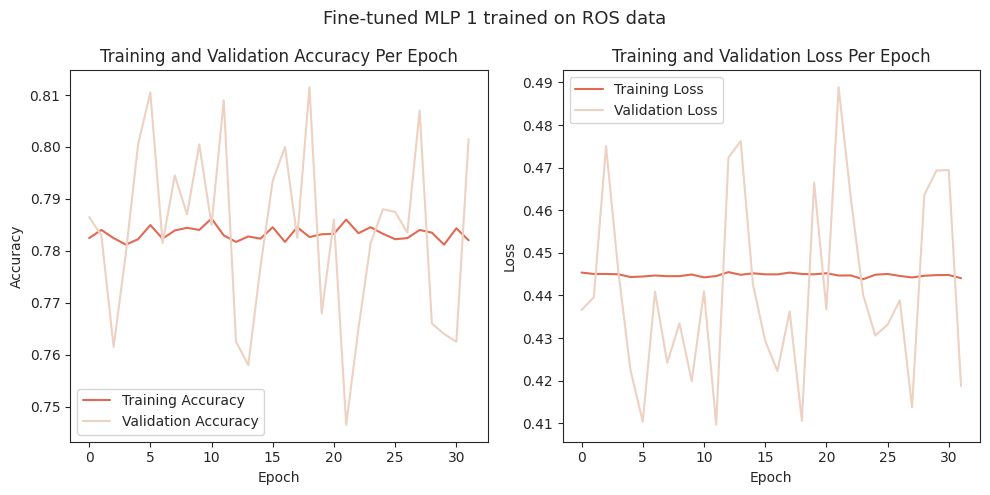

In [1084]:
# Plot the Training and Validation Accuracy/Loss per Epoch to observe model's behaviour

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_1_ros_ft.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_1_ros_ft.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_1_ros_ft.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_1_ros_ft.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("Fine-tuned MLP 1 trained on ROS data", fontsize = 13)

# Save the figure
save_fig("mlp_1_ros_ft_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [1085]:
# Make predictions on the test set (unseen data that was not used in training or valdiation)
y_pred_mlp_val_1_ros_ft = model_MLP_ros.predict(x_val_encoded)
y_pred_mlp_val_classes_1_ros_ft = np.round(y_pred_mlp_val_1_ros_ft).astype(int) # Convert probabilities to binary prediction

# Compute the confusion matrix using true labels and predicted labels
conf_matrix_1_ros_ft = confusion_matrix(y_val, y_pred_mlp_val_classes_1_ros_ft)

# Print the confusion matrix
print("Confusion Matrix: Fine-tuned MLP (ROS)")
print(conf_matrix_1_ros_ft)

63/63 [==============================] - 0s 2ms/step
Confusion Matrix: Fine-tuned MLP (ROS)
[[1134  452]
 [ 265  149]]


In [1075]:
# This attempt at early-stopping has decreased the model's capability of predicting churn

In [1091]:
# Attempt 2: optimise using 'ridge' regularisation (L2)
from keras.regularizers import l2

# Set random seeds for reproducibility
RAND_SEED = 42
random.seed(RAND_SEED)
np.random.seed(RAND_SEED)
tf.random.set_seed(RAND_SEED)

# Define the Ridge regularizer with lambda strenght = 0.01
l2_regularizer = regularizers.l2(0.01) # Determines the weights penalization

# Define and train a simple MLP with 2 fully connected hidden layers
model_MLP_ros_l2 = Sequential([ # Use a linear stack of layers
                    Dense(6, activation = "relu", input_shape = (x_train_ros.shape[1],), kernel_regularizer = l2_regularizer),
                    Dense(6, activation = "relu", kernel_regularizer = l2_regularizer), # introduce non-linearity
                    Dense(1, activation = "sigmoid", kernel_regularizer = l2_regularizer)]) # binary classification

# Check model summary
model_MLP_ros_l2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 6)                 90        
                                                                 
 dense_97 (Dense)            (None, 6)                 42        
                                                                 
 dense_98 (Dense)            (None, 1)                 7         
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1093]:
# Compile the model
optimizer = SGD(learning_rate = 0.01) # Stochastic Gradient Descent optimizer for updating weights
model_MLP_ros_l2.compile(optimizer = optimizer,
                        loss = "binary_crossentropy",
                        metrics = ["accuracy", Recall(), Precision()])

In [1107]:
# Continue training the regularised model
history_MLP_ros_l2 = model_MLP_ros_l2.fit(x_train_ros,
                                         y_train_ros,
                                         epochs = 200,
                                         batch_size = 32,
                                         validation_data = (x_val_encoded, y_val))

Epoch 1/200
299/299 [==============================] - 1s 5ms/step - loss: 0.6124 - accuracy: 0.7152 - recall_30: 0.7016 - precision_30: 0.7213 - val_loss: 0.5998 - val_accuracy: 0.7355 - val_recall_30: 0.7126 - val_precision_30: 0.4184
Epoch 2/200
299/299 [==============================] - 1s 3ms/step - loss: 0.6124 - accuracy: 0.7143 - recall_30: 0.7020 - precision_30: 0.7197 - val_loss: 0.5907 - val_accuracy: 0.7440 - val_recall_30: 0.7029 - val_precision_30: 0.4279
Epoch 3/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6125 - accuracy: 0.7140 - recall_30: 0.6991 - precision_30: 0.7206 - val_loss: 0.6119 - val_accuracy: 0.7200 - val_recall_30: 0.7343 - val_precision_30: 0.4032
Epoch 4/200
299/299 [==============================] - 1s 4ms/step - loss: 0.6125 - accuracy: 0.7144 - recall_30: 0.7020 - precision_30: 0.7198 - val_loss: 0.6213 - val_accuracy: 0.7130 - val_recall_30: 0.7512 - val_precision_30: 0.3977
Epoch 5/200
299/299 [==============================]

Saving figure mlp_1_ros_ft_l2_accuracyloss


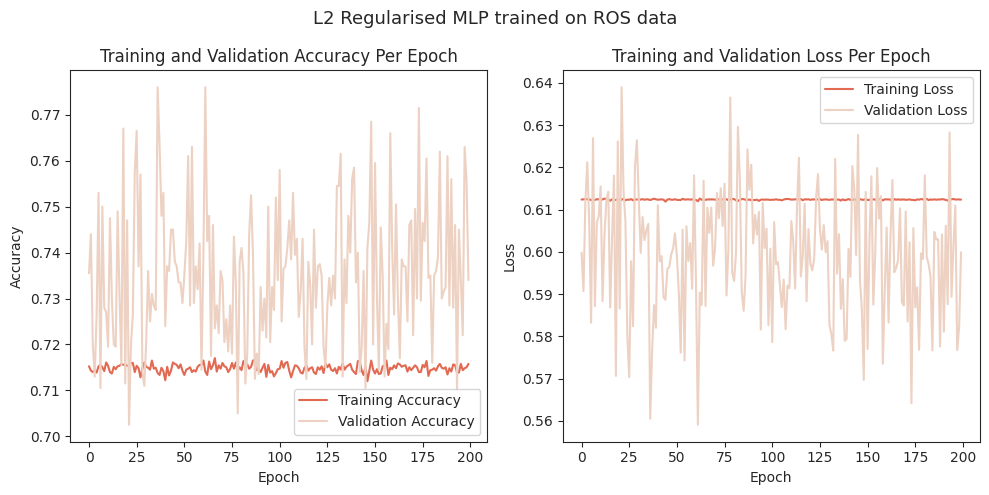

In [1109]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Plotting the training and validation accuracy
axes[0].plot(history_MLP_ros_l2.history["accuracy"], label = "Training Accuracy", color = sns.color_palette("coolwarm_r")[0])
axes[0].plot(history_MLP_ros_l2.history["val_accuracy"], label = "Validation Accuracy", color = sns.color_palette("coolwarm_r")[2])
axes[0].set_title("Training and Validation Accuracy Per Epoch")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_MLP_ros_l2.history["loss"], label = "Training Loss", color = sns.color_palette("coolwarm_r")[0])
axes[1].plot(history_MLP_ros_l2.history["val_loss"], label = "Validation Loss", color = sns.color_palette("coolwarm_r")[2])
axes[1].set_title("Training and Validation Loss Per Epoch")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Add a main title for the figure
fig.suptitle("L2 Regularised MLP trained on ROS data", fontsize = 13)

# Save the figure
save_fig("mlp_1_ros_ft_l2_accuracyloss")

# Display the plots
plt.tight_layout()
plt.show()

In [1110]:
# Evaluate the model on the testing set
# This values may be used to compare the neural network's performance against other benckmark models
evaluation_results_l2 = model_MLP_ros_l2.evaluate(x_test_encoded, y_test, verbose = 0)

test_loss_MLP_l2 = evaluation_results_l2[0] # Accessing the loss
test_accuracy_MLP_l2 = evaluation_results_l2[1] # Accessing the accuracy
test_precision_MLP_l2 = evaluation_results_l2[2] # Accessing the precision
test_recall_MLP_l2 = evaluation_results_l2[3] # Accessing the recall

# Calculate the f1 score
test_f1_MLP_l2 = 2 * (test_precision_MLP_l2 * test_recall_MLP_l2) / (test_precision_MLP_l2 + test_recall_MLP_l2)

# Print performance metrics
print(f"MLP ROS L2 regularised Testing Loss: {test_loss_MLP_l2:.4f}")
print(f"MLP ROS L2 regularised Testing Accuracy: {test_accuracy_MLP_l2:.4f}")
print(f"MLP ROS L2 regularised Testing Precision: {test_precision_MLP_l2:.4f}")
print(f"MLP ROS L2 regularised Testing Recall: {test_recall_MLP_l2:.4f}")
print(f"MLP ROS L2 regularised Testing F1 Score: {test_f1_MLP_l2:.4f}")

MLP ROS L2 regularised Testing Loss: 0.6082
MLP ROS L2 regularised Testing Accuracy: 0.7280
MLP ROS L2 regularised Testing Precision: 0.7125
MLP ROS L2 regularised Testing Recall: 0.3938
MLP ROS L2 regularised Testing F1 Score: 0.5072


In [1111]:
# L2 regularisation did not help improve performance

# 5 Conclusion

### Best models after fitting the three datasets

In [1098]:
# Compare the performance of the best models after training with the imbalanced, SMOTE, and ROS data

# SMOTE-trained Gaussian Naive Bayes outperformed the othet two models
print(f"Accuracy Gaussian Naive Bayes (SMOTE): {accuracy_score_gnb_smote}")
print(f"Precision Gaussian Naive Bayes (SMOTE): {precision_score_gnb_smote}")
print(f"Recal Gaussian Naive Bayes (SMOTE): {recall_score_gnb_smote}")
print(f"F1 score Gaussian Naive Bayes (SMOTE): {f1_score_gnb_smote}")
print()

# ROS-trained Logistic Regression outperformed the othet two models
print(f"Accuracy Logistic Regression (ROS): {accuracy_score_lr_ros}")
print(f"Precision Logistic Regression (ROS): {precision_score_lr_ros}")
print(f"Recal Logistic Regression (ROS): {recall_score_lr_ros}")
print(f"F1 score Logistic Regression (ROS): {f1_score_lr_ros}")
print()

# SMOTE-trained Decision Tree outperformed the othet two models
print(f"Accuracy Decision Tree (SMOTE): {accuracy_score_tree_smote}")
print(f"Precision Decision Tree (SMOTE): {precision_score_tree_smote}")
print(f"Recal Decision Tree (SMOTE): {recall_score_tree_smote}")
print(f"F1 score Decision Tree (SMOTE): {f1_score_tree_smote}")
print()

# SMOTE-trained Random Forest outperformed the othet two models
print(f"Accuracy Random Forest (SMOTE): {accuracy_score_forest_smote}")
print(f"Precision Random Forest (SMOTE): {precision_score_forest_smote}")
print(f"Recal Random Forest (SMOTE): {recall_score_forest_smote}")
print(f"F1 score Random Forest (SMOTE): {f1_score_forest_smote}")
print()

# ROS-trained XGBoost outperformed the othet two models
print(f"Accuracy XGBoost (ROS): {accuracy_score_xgb_ros}")
print(f"Precision XGBoost (ROS): {precision_score_xgb_ros}")
print(f"Recal XGBoost (ROS): {recall_score_xgb_ros}")
print(f"F1 score XGBoost (ROS): {f1_score_xgb_ros}")
print()

# ROS-trained SVC outperformed the othet two models
print(f"Accuracy score SVC (ROS): {accuracy_score_svc_ros}")
print(f"Precision score SVC (ROS): {precision_score_svc_ros}")
print(f"Recall score SVC (ROS): {recall_score_svc_ros}")
print(f"F1 score SVC (ROS): {f1_score_svc_ros}")
print()

# ROS-trained KNN outperformed the othet two models
print(f"Accuracy score KNN (ROS): {accuracy_score_knn_ros}")
print(f"Precision score KNN (ROS): {precision_score_knn_ros}")
print(f"Recall score KNN (ROS): {recall_score_knn_ros}")
print(f"F1 score score KNN (ROS): {f1_score_knn_ros}")
print()

# ROS-trained MLP (or ANN) outperformed the other models explored
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")
print()

Accuracy Gaussian Naive Bayes (SMOTE): 0.7705
Precision Gaussian Naive Bayes (SMOTE): 0.4611
Recal Gaussian Naive Bayes (SMOTE): 0.6449
F1 score Gaussian Naive Bayes (SMOTE): 0.5378

Accuracy Logistic Regression (ROS): 0.7485
Precision Logistic Regression (ROS): 0.4348
Recal Logistic Regression (ROS): 0.7174
F1 score Logistic Regression (ROS): 0.5415

Accuracy Decision Tree (SMOTE): 0.7825
Precision Decision Tree (SMOTE): 0.4782
Recal Decision Tree (SMOTE): 0.5556
F1 score Decision Tree (SMOTE): 0.514

Accuracy Random Forest (SMOTE): 0.826
Precision Random Forest (SMOTE): 0.5753
Recal Random Forest (SMOTE): 0.6087
F1 score Random Forest (SMOTE): 0.5915

Accuracy XGBoost (ROS): 0.827
Precision XGBoost (ROS): 0.5749
Recal XGBoost (ROS): 0.6304
F1 score XGBoost (ROS): 0.6014

Accuracy score SVC (ROS): 0.7845
Precision score SVC (ROS): 0.4854
Recall score SVC (ROS): 0.6836
F1 score SVC (ROS): 0.5677

Accuracy score KNN (ROS): 0.751
Precision score KNN (ROS): 0.4348
Recall score KNN (ROS): 

Saving figure bestperforming_roc_curve


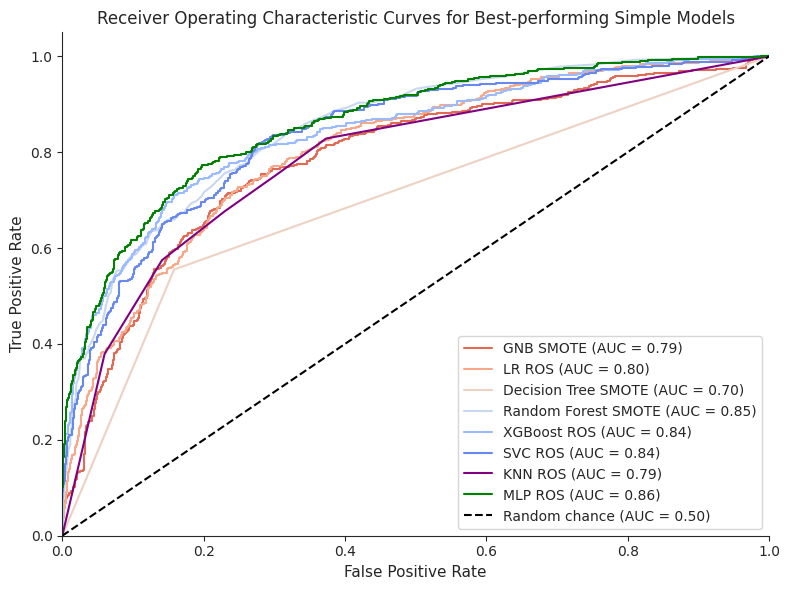

In [1099]:
# Calculate the AUC for each model to then visualise it
auc_gnb_smote = auc(fpr_gnb_smote, tpr_gnb_smote)
auc_lr_ros = auc(fpr_lr_ros, tpr_lr_ros)
auc_tree_smote = auc(fpr_tree_smote, tpr_tree_smote)
auc_forest_smote = auc(fpr_forest_smote, tpr_forest_smote)
auc_xgb_ros = auc(fpr_xgb_ros, tpr_xgb_ros)
auc_svc_ros = auc(fpr_svc_ros, tpr_svc_ros)
auc_knn_ros = auc(fpr_knn_ros, tpr_knn_ros)
auc_mlp_ros = auc(fpr_mlp_ros, tpr_mlp_ros)

# Define plot size 
plt.figure(figsize = (8, 6))

# Plot the ROC curve for each best-performing model
plt.plot(fpr_gnb_smote, tpr_gnb_smote, label = f"GNB SMOTE (AUC = {auc_gnb_smote:.2f})", color = sns.color_palette("coolwarm_r")[0])
plt.plot(fpr_lr_ros, tpr_lr_ros, label = f"LR ROS (AUC = {auc_lr_ros:.2f})", color = sns.color_palette("coolwarm_r")[1])
plt.plot(fpr_tree_smote, tpr_tree_smote, label = f"Decision Tree SMOTE (AUC = {auc_tree_smote:.2f})", color = sns.color_palette("coolwarm_r")[2])
plt.plot(fpr_forest_smote, tpr_forest_smote, label = f"Random Forest SMOTE (AUC = {auc_forest_smote:.2f})", color = sns.color_palette("coolwarm_r")[3])
plt.plot(fpr_xgb_ros, tpr_xgb_ros, label = f"XGBoost ROS (AUC = {auc_xgb_ros:.2f})", color = sns.color_palette("coolwarm_r")[4])
plt.plot(fpr_svc_ros, tpr_svc_ros, label = f"SVC ROS (AUC = {auc_svc_ros:.2f})", color = sns.color_palette("coolwarm_r")[5])
plt.plot(fpr_knn_ros, tpr_knn_ros, label = f"KNN ROS (AUC = {auc_knn_ros:.2f})", color = "purple")
plt.plot(fpr_mlp_ros, tpr_mlp_ros, label = f"MLP ROS (AUC = {auc_mlp_ros:.2f})", color = "green")

# Define the diagonal line used comparison against for random chance
plt.plot([0, 1], [0, 1], "k--", label = "Random chance (AUC = 0.50)")

# Define the title, labels, and legend
plt.title("Receiver Operating Characteristic Curves for Best-performing Simple Models", fontsize = 12)
plt.xlabel("False Positive Rate", fontsize = 11)
plt.ylabel("True Positive Rate", fontsize = 11)
plt.legend(loc = "lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Hide the top and right plot spines
plt.gca().spines[["top", "right",]].set_visible(False)

# Save the figure
save_fig("bestperforming_roc_curve")

# Show the plot
plt.show()

### Best models after feature selection and find tuning

In [1106]:
# Best model performance following feature selection:

# 2nd SMOTE Gaussian Naive Bayes is the best-performing observed model for predicting customer churn.
print(f"Accuracy score 2nd Gaussian Naive Bayes (SMOTE): {accuracy_score_gnb_smote_2}")
print(f"Precision score 2nd Gaussian Naive Bayes (SMOTE): {precision_score_gnb_smote_2}")
print(f"Recall score 2nd Gaussian Naive Bayes (SMOTE): {recall_score_gnb_smote_2}")
print(f"F1 score 2nd Gaussian Naive Bayes (SMOTE): {f1_score_gnb_smote_2}")
print()

# 3rd ROS Logistic Regression model is the best-performing observed model for predicting churn
print(f"Accuracy 3rd Logistic Regression (ROS): {accuracy_score_lr_3}")
print(f"Precision 3rd Logistic Regression (ROS): {precision_score_lr_3}")
print(f"Recal 3rd Logistic Regression (ROS): {recall_score_lr_3}")
print(f"F1 score 3rd Logistic Regression (ROS): {f1_score_lr_3}")
print()

# 2nd Decision Tree model is the best-performing observed model for predicting churn
print(f"Accuracy 2nd Decision Tree (SMOTE): {accuracy_score_tree_2}")
print(f"Precision 2nd Decision Tree (SMOTE): {precision_score_tree_2}")
print(f"Recal 2nd Decision Tree (SMOTE): {recall_score_tree_2}")
print(f"F1 score 2nd Decision Tree (SMOTE): {f1_score_tree_2}")
print()

# Original SMOTE Random Forest remained the best-performing observed model following feature selection
print(f"Accuracy 1st Random Forest (SMOTE): {accuracy_score_forest_smote}")
print(f"Precision 1st Random Forest (SMOTE): {precision_score_forest_smote}")
print(f"Recal 1st Random Forest (SMOTE): {recall_score_forest_smote}")
print(f"F1 score 1st Random Forest (SMOTE): {f1_score_forest_smote}")
print()

# Original ROS trained XGBoost model remained the best-performing observed model following feature selection
print(f"Accuracy 1st XGBoost (ROS): {accuracy_score_xgb_ros}")
print(f"Precision 1st XGBoost (ROS): {precision_score_xgb_ros}")
print(f"Recal 1st XGBoost (ROS): {recall_score_xgb_ros}")
print(f"F1 score 1st XGBoost (ROS): {f1_score_xgb_ros}")
print()

# 3rd ROS SVC is the best-performing observed model for predicting churn
print(f"Accuracy score 3rd SVC (ROS): {accuracy_score_svc_ros_3}")
print(f"Precision score 3rd SVC (ROS): {precision_score_svc_ros_3}")
print(f"Recall score 3rd SVC (ROS): {recall_score_svc_ros_3}")
print(f"F1 score 2nd 3rd (ROS): {f1_score_svc_ros_3}")
print()

# 2nd ROS KNN is the best-performing observed model for predicting churn
print(f"Accuracy score 2nd KNN (ROS): {accuracy_score_knn_ros_2}")
print(f"Precision score 2nd KNN (ROS): {precision_score_knn_ros_2}")
print(f"Recall score 2nd KNN (ROS): {recall_score_knn_ros_2}")
print(f"F1 score 2nd KNN (ROS): {f1_score_knn_ros_2}")
print()

# ROS-trained MLP (or ANN) outperformed the other models explored
print(f"MLP ROS Validation Loss: {val_loss_MLP_ros:.4f}")
print(f"MLP ROS Validation Accuracy: {val_accuracy_MLP_ros:.4f}")
print(f"MLP ROS Validation Precision: {val_precision_MLP_ros:.4f}")
print(f"MLP ROS Validation Recall: {val_recall_MLP_ros:.4f}")
print(f"MLP ROS Validation F1 Score: {val_f1_MLP_ros:.4f}")
print()

Accuracy score 2nd Gaussian Naive Bayes (SMOTE): 0.7635
Precision score 2nd Gaussian Naive Bayes (SMOTE): 0.4511
Recall score 2nd Gaussian Naive Bayes (SMOTE): 0.657
F1 score 2nd Gaussian Naive Bayes (SMOTE): 0.5349

Accuracy 3rd Logistic Regression (ROS): 0.7495
Precision 3rd Logistic Regression (ROS): 0.4363
Recal 3rd Logistic Regression (ROS): 0.7198
F1 score 3rd Logistic Regression (ROS): 0.5433

Accuracy 2nd Decision Tree (SMOTE): 0.7565
Precision 2nd Decision Tree (SMOTE): 0.4354
Recal 2nd Decision Tree (SMOTE): 0.5942
F1 score 2nd Decision Tree (SMOTE): 0.5026

Accuracy 1st Random Forest (SMOTE): 0.826
Precision 1st Random Forest (SMOTE): 0.5753
Recal 1st Random Forest (SMOTE): 0.6087
F1 score 1st Random Forest (SMOTE): 0.5915

Accuracy 1st XGBoost (ROS): 0.827
Precision 1st XGBoost (ROS): 0.5749
Recal 1st XGBoost (ROS): 0.6304
F1 score 1st XGBoost (ROS): 0.6014

Accuracy score 3rd SVC (ROS): 0.7745
Precision score 3rd SVC (ROS): 0.4715
Recall score 3rd SVC (ROS): 0.7391
F1 scor